 ### 1. using a pre-trained model available in "gender_guesser" library in Python. 

In [2]:
! pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

import sklearn
from sklearn.model_selection import train_test_split

2024-08-31 00:13:38.890427: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-31 00:13:39.405836: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
! pip install gender-guesser

Defaulting to user installation because normal site-packages is not writeable


In [43]:
import pandas as pd
import gender_guesser.detector as gender

# Load your authors data
authors_df = pd.read_csv("Authors_SCCMDATupdated.csv")

# Create a gender detector object
detector = gender.Detector()

# Function to predict gender
def predict_gender(name):
    first_name = name.split()[0]
    return detector.get_gender(first_name)

# Apply the predict_gender function to the 'Authors' column
authors_df['Gender'] = authors_df['Authors'].apply(predict_gender)

# Save the results to a new CSV file
authors_df.to_csv("authors_with_gender_SCCMDATupdated.csv", index=False)

In [5]:
import pandas as pd
import gender_guesser.detector as gender

# Load your authors data
authors_df = pd.read_csv("Authors_SCCMPRESupdated.csv")

# Create a gender detector object
detector = gender.Detector()

# Function to predict gender
def predict_gender(name):
    first_name = name.split()[0]
    return detector.get_gender(first_name)

# Apply the predict_gender function to the 'Authors' column
authors_df['Gender'] = authors_df['Authors'].apply(predict_gender)

# Save the results to a new CSV file
authors_df.to_csv("authors_with_gender_SCCMPRESupdated.csv", index=False)

### 2. Using an API or web service that provides gender predictions based on names, Gender API (https://gender-api.com/) or Genderize.io (https://genderize.io/). These services often have more extensive databases and can provide more accurate predictions.

In [6]:
! pip install requests

Defaulting to user installation because normal site-packages is not writeable


In [7]:
import pandas as pd
import requests

# Load your authors data
authors_df = pd.read_csv("Authors_SCCMDATupdated.csv")

# Function to predict gender using Genderize.io API
def predict_gender(name):
    first_name = name.split()[0]
    url = f"https://api.genderize.io/?name={first_name}"
    response = requests.get(url)
    data = response.json()
    
    if "gender" in data:
        return data["gender"] if data["gender"] is not None else "unknown"
    else:
        return "unknown"

# Apply the predict_gender function to the 'Authors' column
authors_df['Gender'] = authors_df['Authors'].apply(predict_gender)

# Save the results to a new CSV file
authors_df.to_csv("authors_with_gender_api_Authors_SCCMDATupdated.csv", index=False)

KeyboardInterrupt: 

In [13]:
import pandas as pd
import requests

# Load your authors data
authors_df = pd.read_csv("Authors_SCCMPRESupdated.csv")

# Function to predict gender using Genderize.io API
def predict_gender(name):
    first_name = name.split()[0]
    url = f"https://api.genderize.io/?name={first_name}"
    response = requests.get(url)
    data = response.json()
    
    if "gender" in data:
        return data["gender"] if data["gender"] is not None else "unknown"
    else:
        return "unknown"

# Apply the predict_gender function to the 'Authors' column
authors_df['Gender'] = authors_df['Authors'].apply(predict_gender)

# Save the results to a new CSV file
authors_df.to_csv("authors_with_gender_api_Authors_SCCMPRESupdated.csv", index=False)

### Combining the results from multiple methods, such as the "gender_guesser" library and the Genderize.io API.

In [14]:
import pandas as pd
import gender_guesser.detector as gender
import requests

# Load your authors data
authors_df = pd.read_csv("Authors_SCCMDATupdated.csv")

# Create a gender detector object
detector = gender.Detector()

# Function to predict gender using gender_guesser library
def predict_gender_guesser(name):
    first_name = name.split()[0]
    return detector.get_gender(first_name)

# Function to predict gender using Genderize.io API
def predict_gender_api(name):
    first_name = name.split()[0]
    url = f"https://api.genderize.io/?name={first_name}"
    response = requests.get(url)
    data = response.json()
    
    if "gender" in data:
        return data["gender"] if data["gender"] is not None else "unknown"
    else:
        return "unknown"

# Function to combine gender predictions using the Ensemble Approach
def predict_gender_ensemble(name):
    gender_guesser_pred = predict_gender_guesser(name)
    gender_api_pred = predict_gender_api(name)
    
    if gender_guesser_pred == gender_api_pred:
        return gender_guesser_pred
    else:
        return "unknown"

# Apply the predict_gender_ensemble function to the 'Authors' column
authors_df['Gender'] = authors_df['Authors'].apply(predict_gender_ensemble)

# Save the results to a new CSV file
authors_df.to_csv("Authors_SCCMDAT_with_gender_ensemble.csv", index=False)

### Gender API (https://genderize.io/), NamSor (https://www.namsor.com/)

In [ ]:
import pandas as pd
import requests

# Load your authors data
authors_df = pd.read_csv("Authors_SCCMDATupdated.csv")

# Function to predict gender using Genderize.io API
def predict_gender_genderize(name):
    first_name = name.split()[0]
    url = f"https://api.genderize.io/?name={first_name}"
    response = requests.get(url)
    data = response.json()
    
    if "gender" in data:
        return data["gender"] if data["gender"] is not None else "unknown"
    else:
        return "unknown"

# Function to predict gender using Gender API
def predict_gender_gender_api(name, api_key):
    first_name = name.split()[0]
    url = f"https://gender-api.com/get?name={first_name}&key={api_key}"
    response = requests.get(url)
    data = response.json()
    
    if "gender" in data:
        return data["gender"] if data["gender"] is not None else "unknown"
    else:
        return "unknown"

# Function to predict gender using NamSor API
def predict_gender_namsor(name, api_key):
    first_name = name.split()[0]
    url = f"https://v2.namsor.com/NamSorAPIv2/api2/json/gender/{first_name}"
    headers = {"X-API-KEY": api_key}
    response = requests.get(url, headers=headers)
    data = response.json()
    
    if "likelyGender" in data:
        return data["likelyGender"] if data["likelyGender"] is not None else "unknown"
    else:
        return "unknown"

# API keys
gender_api_key = "07bc0fd02ba68800a05f8fb1962f68340b7bd72d1e3cf37c3d690bafeaf3ba95"
namsor_api_key = "9ad6aeff4990a09d8f15626801b0300a"

# Apply the gender prediction functions to the 'Authors' column
authors_df['Gender_Genderize'] = authors_df['Authors'].apply(predict_gender_genderize)
authors_df['Gender_GenderAPI'] = authors_df['Authors'].apply(lambda x: predict_gender_gender_api(x, gender_api_key))
authors_df['Gender_NamSor'] = authors_df['Authors'].apply(lambda x: predict_gender_namsor(x, namsor_api_key))

# Save the results to a new CSV file
authors_df.to_csv("Authors_SCCMDAT_with_gender_apis.csv", index=False)

## Gender Identification by Author name using NLTK

Natural Language Toolkit (NLTK) is a platform used for building programs for text analysis. We can observe that male and female names have some distinctive characteristics. Names ending in a, e and i are likely to be female, while names ending in k, o, r, s and t are likely to be male.

In [2]:
! pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import nltk
nltk.download('names')

[nltk_data] Downloading package names to /home/jupyter-
[nltk_data]     dpemmasa/nltk_data...
[nltk_data]   Package names is already up-to-date!


True

In [4]:
import pandas as pd
import random
from nltk.corpus import names
import nltk

def gender_features(word):
    return {'last_letter': word[-1]}

# Load your authors data
authors_df = pd.read_csv("Authors_SCCMDATupdated.csv")

# Prepare a list of labeled names from the NLTK corpus
labeled_names = ([(name, 'male') for name in names.words('male.txt')] +
                 [(name, 'female') for name in names.words('female.txt')])
random.shuffle(labeled_names)

# Extract features from the labeled names
featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]

# Split the feature sets into training and test sets
train_set, test_set = featuresets[500:], featuresets[:500]

# Train a Naive Bayes classifier
classifier = nltk.NaiveBayesClassifier.train(train_set)

# Function to predict gender using the trained classifier
def predict_gender(name):
    first_name = name.split()[0]
    return classifier.classify(gender_features(first_name))

# Apply the gender prediction function to the 'Authors' column
authors_df['Gender'] = authors_df['Authors'].apply(predict_gender)

# Save the results to a new CSV file
authors_df.to_csv("authors_with_gender_nltk_SCCMDATupdated.csv", index=False)

# Print the accuracy of the classifier on the training set
print("Accuracy on training set:", nltk.classify.accuracy(classifier, train_set))

# Print the accuracy of the classifier on the test set
print("Accuracy on test set:", nltk.classify.accuracy(classifier, test_set))

# Show the most informative features of the classifier
classifier.show_most_informative_features(10)

Accuracy on training set: 0.7620902740462118
Accuracy on test set: 0.774
Most Informative Features
             last_letter = 'a'            female : male   =     34.1 : 1.0
             last_letter = 'k'              male : female =     31.5 : 1.0
             last_letter = 'f'              male : female =     15.4 : 1.0
             last_letter = 'p'              male : female =     12.7 : 1.0
             last_letter = 'v'              male : female =     10.6 : 1.0
             last_letter = 'd'              male : female =      9.8 : 1.0
             last_letter = 'm'              male : female =      9.0 : 1.0
             last_letter = 'o'              male : female =      8.3 : 1.0
             last_letter = 'r'              male : female =      6.6 : 1.0
             last_letter = 'w'              male : female =      5.9 : 1.0


In [5]:
authors_df.head()

,Authors,Gender
0,3rd Lewin,male
1,A Accardo,female
2,A Ahmad,female
3,A Ahmad,female
4,A Akasawa,female


In [6]:
import pandas as pd
import random
from nltk.corpus import names
import nltk

def gender_features(word):
    return {'last_letter': word[-1]}

# Load your authors data
authors_df = pd.read_csv("Authors_SCCMPRESupdated.csv")

# Prepare a list of labeled names from the NLTK corpus
labeled_names = ([(name, 'male') for name in names.words('male.txt')] +
                 [(name, 'female') for name in names.words('female.txt')])
random.shuffle(labeled_names)

# Extract features from the labeled names
featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]

# Split the feature sets into training and test sets
train_set, test_set = featuresets[500:], featuresets[:500]

# Train a Naive Bayes classifier
classifier = nltk.NaiveBayesClassifier.train(train_set)

# Function to predict gender using the trained classifier
def predict_gender(name):
    first_name = name.split()[0]
    return classifier.classify(gender_features(first_name))

# Apply the gender prediction function to the 'Authors' column
authors_df['Gender'] = authors_df['Authors'].apply(predict_gender)

# Save the results to a new CSV file
authors_df.to_csv("authors_with_gender_nltk_SCCMPRESupdated.csv", index=False)

# Print the accuracy of the classifier on the training set
print("Accuracy on training set:", nltk.classify.accuracy(classifier, train_set))

# Print the accuracy of the classifier on the test set
print("Accuracy on test set:", nltk.classify.accuracy(classifier, test_set))

# Show the most informative features of the classifier
classifier.show_most_informative_features(10)

Accuracy on training set: 0.761687264911338
Accuracy on test set: 0.78
Most Informative Features
             last_letter = 'k'              male : female =     73.2 : 1.0
             last_letter = 'a'            female : male   =     33.3 : 1.0
             last_letter = 'v'              male : female =     18.7 : 1.0
             last_letter = 'f'              male : female =     16.0 : 1.0
             last_letter = 'p'              male : female =     11.9 : 1.0
             last_letter = 'd'              male : female =     10.6 : 1.0
             last_letter = 'o'              male : female =      9.0 : 1.0
             last_letter = 'm'              male : female =      8.8 : 1.0
             last_letter = 'r'              male : female =      6.2 : 1.0
             last_letter = 'g'              male : female =      4.9 : 1.0


## Gender Identification by Fork name using NLTK

In [7]:
import pandas as pd
import random
from nltk.corpus import names
import nltk

def gender_features(word):
    return {'last_letter': word[-1]}

# Load your authors data
authors_df = pd.read_csv("forkname SCCMDAT.csv")

# Prepare a list of labeled names from the NLTK corpus
labeled_names = ([(name, 'male') for name in names.words('male.txt')] +
                 [(name, 'female') for name in names.words('female.txt')])
random.shuffle(labeled_names)

# Extract features from the labeled names
featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]

# Split the feature sets into training and test sets
train_set, test_set = featuresets[500:], featuresets[:500]

# Train a Naive Bayes classifier
classifier = nltk.NaiveBayesClassifier.train(train_set)

# Function to predict gender using the trained classifier
def predict_gender(name):
    first_name = name.split()[0]
    return classifier.classify(gender_features(first_name))

# Apply the gender prediction function to the 'Fork Name' column
authors_df['Gender'] = authors_df['Fork Name'].apply(predict_gender)

# Save the results to a new CSV file
authors_df.to_csv("forkname_gender_nltk_SCCMDATupdated.csv", index=False)

# Print the accuracy of the classifier on the training set
print("Accuracy on training set:", nltk.classify.accuracy(classifier, train_set))

# Print the accuracy of the classifier on the test set
print("Accuracy on test set:", nltk.classify.accuracy(classifier, test_set))

# Show the most informative features of the classifier
classifier.show_most_informative_features(10)

Accuracy on training set: 0.7647770016120365
Accuracy on test set: 0.718
Most Informative Features
             last_letter = 'a'            female : male   =     35.3 : 1.0
             last_letter = 'k'              male : female =     32.5 : 1.0
             last_letter = 'f'              male : female =     16.8 : 1.0
             last_letter = 'p'              male : female =     12.0 : 1.0
             last_letter = 'd'              male : female =     11.2 : 1.0
             last_letter = 'v'              male : female =      9.9 : 1.0
             last_letter = 'm'              male : female =      9.3 : 1.0
             last_letter = 'o'              male : female =      8.1 : 1.0
             last_letter = 'r'              male : female =      7.0 : 1.0
             last_letter = 'g'              male : female =      7.0 : 1.0


classifier.show_most_informative_features is used to display the most informative features that the Naive Bayes classifier has learned during training. It helps in understanding which features are most useful in distinguishing between the classes (in this case, male and female names).

In [8]:
import pandas as pd
import random
from nltk.corpus import names
import nltk

def gender_features(word):
    return {'last_letter': word[-1]}

# Load your authors data
authors_df = pd.read_csv("forkname SCCMPRES.csv")

# Prepare a list of labeled names from the NLTK corpus
labeled_names = ([(name, 'male') for name in names.words('male.txt')] +
                 [(name, 'female') for name in names.words('female.txt')])
random.shuffle(labeled_names)

# Extract features from the labeled names
featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]

# Split the feature sets into training and test sets
train_set, test_set = featuresets[500:], featuresets[:500]

# Train a Naive Bayes classifier
classifier = nltk.NaiveBayesClassifier.train(train_set)

# Function to predict gender using the trained classifier
def predict_gender(name):
    first_name = name.split()[0]
    return classifier.classify(gender_features(first_name))

# Apply the gender prediction function to the 'Fork Name' column
authors_df['Gender'] = authors_df['Fork Name'].apply(predict_gender)

# Save the results to a new CSV file
authors_df.to_csv("forkname_gender_nltk_SCCMPRESupdated.csv", index=False)

# Print the accuracy of the classifier on the training set
print("Accuracy on training set:", nltk.classify.accuracy(classifier, train_set))

# Print the accuracy of the classifier on the test set
print("Accuracy on test set:", nltk.classify.accuracy(classifier, test_set))

# Show the most informative features of the classifier
classifier.show_most_informative_features(10)

Accuracy on training set: 0.762224610424503
Accuracy on test set: 0.772
Most Informative Features
             last_letter = 'a'            female : male   =     35.6 : 1.0
             last_letter = 'k'              male : female =     30.8 : 1.0
             last_letter = 'f'              male : female =     16.6 : 1.0
             last_letter = 'p'              male : female =     11.9 : 1.0
             last_letter = 'd'              male : female =      9.9 : 1.0
             last_letter = 'v'              male : female =      9.8 : 1.0
             last_letter = 'm'              male : female =      9.0 : 1.0
             last_letter = 'o'              male : female =      8.2 : 1.0
             last_letter = 'r'              male : female =      6.8 : 1.0
             last_letter = 'g'              male : female =      5.6 : 1.0


In [3]:
SCCMDAT = pd.read_csv("SCCMDATupdated_FINALANALYSISCSV.csv")
SCCMPRES = pd.read_csv("SCCMPRESupdated_FINALANALYSIS_csv.csv")

In [10]:
SCCMDAT

,Authors,Affiliation Name,Latitude_from_df2,Longitude_from_df2,Highest Degree,Department,Fork Name,Affiliation,Lat,Lon,Publication Title,Year,Citations,Cited By URL,Abstract,Gender - Author,Gender - Fork
0,3rd Lewin,NaN,NaN,NaN,Not Available,Not Available,"Robert David Stevens, MD, FCCM",Johns Hopkins University School of Medicine,39.330202,-76.621854,Reversal of transtentorial herniation with hyp...,2008.0,294.0,NaN,NaN,male,male
1,A Accardo,Università degli Studi di Trieste,45.660169,13.794792,Not Available,Not Available,Salah Al-Zaiti,University of Pittsburgh,40.444153,-79.962461,Index By Author Ab√§cherli R 105 Ab√°solo D 10...,NaN,0.0,NaN,NaN,female,female
2,A Ahmad,Universiti Teknologi Malaysia,1.558522,103.639914,Not Available,Not Available,Salah Al-Zaiti,University of Pittsburgh,40.444153,-79.962461,100 Two Thirds of Patients With Acute Coronary...,2021.0,0.0,NaN,NaN,female,female
3,A Ahmad,Universiti Teknologi Malaysia,1.558522,103.639914,Not Available,Not Available,Salah Al-Zaiti,University of Pittsburgh,40.444153,-79.962461,Index By Author Ab√§cherli R 105 Ab√°solo D 10...,NaN,0.0,NaN,NaN,female,female
4,A Akasawa,Tokyo Metropolitan Children's Medical Center,36.858403,-76.305431,Not Available,Not Available,"Robert David Stevens, MD, FCCM",Johns Hopkins University School of Medicine,39.330202,-76.621854,"Author Index Vol. 118, No. 2‚Äì4, 1999",1999.0,0.0,NaN,NaN,female,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14695,NaN,NaN,NaN,NaN,Not Available,Not Available,Adel Bassily-Marcus,Mount Sinai Health System,40.652601,-73.949721,Respiratory Monitoring in Low-Intensity Settings,0.0,NaN,NaN,NaN,NaN,male
14696,NaN,Rajendra Memorial Research Institute of Medica...,25.599750,85.197518,Not Available,Not Available,Adel Bassily-Marcus,Mount Sinai Health System,40.652601,-73.949721,Unexpected Deaths Following Surgical Intensive...,0.0,NaN,NaN,NaN,NaN,male
14697,NaN,NaN,NaN,NaN,Not Available,Not Available,Adel Bassily-Marcus,Mount Sinai Health System,40.652601,-73.949721,Unexpected Deaths Following Surgical Intensive...,0.0,NaN,NaN,NaN,NaN,male
14698,NaN,NaN,NaN,NaN,Not Available,Not Available,Adel Bassily-Marcus,Mount Sinai Health System,40.652601,-73.949721,Unexpected Deaths Following Surgical Intensive...,0.0,NaN,NaN,NaN,NaN,male


In [5]:
SCCMPRES

,Authors,Affiliation Name,Latitude_from_df2,Longitude_from_df2,Highest Degree,Department,Fork Name,Affiliation,Lat,Lon,Publication Title,Year,Citations,Cited By URL,Abstract,Gender - Author,Gender - Fork
0,A ASKENASE,Cooper University Hospital,39.941225,-75.116387,Not Available,Not Available,Lawrence S. Weisberg,Cooper Medical School of Rowan University,39.940312,-75.1197608,MECHANISM OF ATRIAL-NATRIURETIC-PEPTIDE (ANP) ...,1990.0,0.0,NaN,NaN,female,female
1,A Aboud,College of Liberal Arts and Sciences,34.129407,-117.889754,Not Available,Not Available,"Brandon Michael Henry, MD",Cincinnati Children's Hospital Medical Center,39.140845,-84.5022885,Ascending aorta replacement vs. total aortic a...,2019.0,16.0,NaN,OBJECTIVE: Acute type A aortic dissection (ATA...,female,male
2,A Aboud,College of Liberal Arts and Sciences,34.129407,-117.889754,Not Available,Not Available,"Brandon Michael Henry, MD",Cincinnati Children's Hospital Medical Center,39.140845,-84.5022885,Mitral Valve Replacement Using Subvalvular App...,2020.0,1.0,NaN,Background: To assess clinical outcomes among ...,female,male
3,A Aherrera,Philippine General Hospital,14.577771,120.985707,Not Available,Not Available,Joanna Cohen,Johns Hopkins University,39.330202,76.6218536,E-cigarette Use Patterns and Device Characteri...,2019.0,0.0,NaN,NaN,female,female
4,A Aherrera,Philippine General Hospital,14.577771,120.985707,Not Available,Not Available,Joanna Cohen,Johns Hopkins University,39.330202,76.6218536,Factors that influence support and enforcement...,2016.0,0.0,NaN,NaN,female,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18139,y Harris,University of Oxford,33.650481,-117.827351,Not Available,Not Available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female,NaN
18140,yam Ravi,NaN,NaN,NaN,Not Available,Not Available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male,NaN
18141,NaN,"Nycomed R and D, Inc.",NaN,NaN,Not Available,Not Available,"Rahul Kashyap, MBBS, MBA",Mayo Clinic,0.324628,32.574229,The clinical relevance of oliguria in the crit...,NaN,0.0,NaN,Background: Urine output is widely used as one...,NaN,male
18142,NaN,NaN,NaN,NaN,Not Available,Not Available,"Rahul Kashyap, MBBS, MBA",Mayo Clinic,0.324628,32.574229,The clinical relevance of oliguria in the crit...,NaN,0.0,NaN,Background: Urine output is widely used as one...,NaN,male


## Groupby publication title and calculate the gender ratio of Author and Fork for both datasets

In [12]:
def calculate_gender_ratio(df, group_col, gender_col):
    gender_counts = df.groupby([group_col, gender_col]).size().unstack(fill_value=0)
    gender_ratio = gender_counts.div(gender_counts.sum(axis=1), axis=0)
    return gender_ratio

In [13]:
# SCCMDAT dataset
sccmdat_author_ratio = calculate_gender_ratio(SCCMDAT, 'Publication Title', 'Gender - Author')
sccmdat_fork_ratio = calculate_gender_ratio(SCCMDAT, 'Publication Title', 'Gender - Fork')

sccmdat_result = pd.concat([sccmdat_author_ratio, sccmdat_fork_ratio], axis=1, keys=['Author', 'Fork'])
sccmdat_result.to_csv('sccmdat_gender_ratio.csv')


In [14]:
sccmdat_gender_ratio=pd.read_csv("sccmdat_gender_ratio.csv")

In [15]:
sccmdat_gender_ratio.head()

,Unnamed: 0,Author,Author.1,Fork,Fork.1
0,Gender - Author,female,male,female,male
1,Publication Title,NaN,NaN,NaN,NaN
2,10 Proportional Assist Ventilation and Neurall...,1.0,0.0,0.0,1.0
3,100 Two Thirds of Patients With Acute Coronary...,1.0,0.0,1.0,0.0
4,1007: DEVELOPMENT OF TELE-ICU MULTIDIMENSIONAL...,0.3333333333333333,0.6666666666666666,1.0,0.0


In [16]:
# SCCMPRES dataset
sccmpres_author_ratio = calculate_gender_ratio(SCCMPRES, 'Publication Title', 'Gender - Author')
sccmpres_fork_ratio = calculate_gender_ratio(SCCMPRES, 'Publication Title', 'Gender - Fork')

sccmpres_result = pd.concat([sccmpres_author_ratio, sccmpres_fork_ratio], axis=1, keys=['Author', 'Fork'])
sccmpres_result.to_csv('sccmpres_gender_ratio.csv')

In [17]:
sccmpres_gender_ratio=pd.read_csv("sccmpres_gender_ratio.csv")

## Calculate gender ratios per publication for both datasets (SCCMDAT and SCCMPRES) for the years 2017 and 2023

In [18]:
import pandas as pd

def calculate_gender_ratio(df, group_col, gender_col):
    gender_counts = df.groupby([group_col, gender_col]).size().unstack(fill_value=0)
    gender_ratio = gender_counts.div(gender_counts.sum(axis=1), axis=0)
    return gender_ratio

def calculate_descriptive_stats(df):
    return df.describe()

# Filter data for years 2017 and 2023
sccmdat_2017 = SCCMDAT[SCCMDAT['Year'] == 2017]
sccmdat_2023 = SCCMDAT[SCCMDAT['Year'] == 2023]
sccmpres_2017 = SCCMPRES[SCCMPRES['Year'] == 2017]
sccmpres_2023 = SCCMPRES[SCCMPRES['Year'] == 2023]

# SCCMDAT dataset - 2017
sccmdat_author_ratio_2017 = calculate_gender_ratio(sccmdat_2017, 'Publication Title', 'Gender - Author')
sccmdat_fork_ratio_2017 = calculate_gender_ratio(sccmdat_2017, 'Publication Title', 'Gender - Fork')

sccmdat_result_2017 = pd.concat([
    sccmdat_author_ratio_2017.add_prefix('Author_'),
    sccmdat_fork_ratio_2017.add_prefix('Fork_')
], axis=1)

sccmdat_result_2017.to_csv('sccmdat_gender_ratio_per_publication_2017.csv')

# SCCMDAT dataset - 2023
if not sccmdat_2023.empty:
    sccmdat_author_ratio_2023 = calculate_gender_ratio(sccmdat_2023, 'Publication Title', 'Gender - Author')
    sccmdat_fork_ratio_2023 = calculate_gender_ratio(sccmdat_2023, 'Publication Title', 'Gender - Fork')

    sccmdat_result_2023 = pd.concat([
        sccmdat_author_ratio_2023.add_prefix('Author_'),
        sccmdat_fork_ratio_2023.add_prefix('Fork_')
    ], axis=1)

    sccmdat_result_2023.to_csv('sccmdat_gender_ratio_per_publication_2023.csv')

# SCCMPRES dataset - 2017
sccmpres_author_ratio_2017 = calculate_gender_ratio(sccmpres_2017, 'Publication Title', 'Gender - Author')
sccmpres_fork_ratio_2017 = calculate_gender_ratio(sccmpres_2017, 'Publication Title', 'Gender - Fork')

sccmpres_result_2017 = pd.concat([
    sccmpres_author_ratio_2017.add_prefix('Author_'),
    sccmpres_fork_ratio_2017.add_prefix('Fork_')
], axis=1)

sccmpres_result_2017.to_csv('sccmpres_gender_ratio_per_publication_2017.csv')

# SCCMPRES dataset - 2023
if not sccmpres_2023.empty:
    sccmpres_author_ratio_2023 = calculate_gender_ratio(sccmpres_2023, 'Publication Title', 'Gender - Author')
    sccmpres_fork_ratio_2023 = calculate_gender_ratio(sccmpres_2023, 'Publication Title', 'Gender - Fork')

    sccmpres_result_2023 = pd.concat([
        sccmpres_author_ratio_2023.add_prefix('Author_'),
        sccmpres_fork_ratio_2023.add_prefix('Fork_')
    ], axis=1)

    sccmpres_result_2023.to_csv('sccmpres_gender_ratio_per_publication_2023.csv')

# Descriptive statistics for SCCMDAT dataset
print("Descriptive Statistics for SCCMDAT dataset - 2017:")
print(calculate_descriptive_stats(sccmdat_result_2017))

if not sccmdat_2023.empty:
    print("\nDescriptive Statistics for SCCMDAT dataset - 2023:")
    print(calculate_descriptive_stats(sccmdat_result_2023))

# Descriptive statistics for SCCMPRES dataset
print("\nDescriptive Statistics for SCCMPRES dataset - 2017:")
print(calculate_descriptive_stats(sccmpres_result_2017))

if not sccmpres_2023.empty:
    print("\nDescriptive Statistics for SCCMPRES dataset - 2023:")
    print(calculate_descriptive_stats(sccmpres_result_2023))

Descriptive Statistics for SCCMDAT dataset - 2017:
       Author_female  Author_male  Fork_female  Fork_male
count      65.000000    65.000000    65.000000  65.000000
mean        0.447063     0.552937     0.469231   0.530769
std         0.336291     0.336291     0.499038   0.499038
min         0.000000     0.000000     0.000000   0.000000
25%         0.250000     0.400000     0.000000   0.000000
50%         0.495652     0.504348     0.000000   1.000000
75%         0.600000     0.750000     1.000000   1.000000
max         1.000000     1.000000     1.000000   1.000000

Descriptive Statistics for SCCMDAT dataset - 2023:
       Author_female  Author_male  Fork_female   Fork_male
count     120.000000   120.000000   120.000000  120.000000
mean        0.535033     0.464967     0.455556    0.544444
std         0.296230     0.296230     0.494004    0.494004
min         0.000000     0.000000     0.000000    0.000000
25%         0.333333     0.250000     0.000000    0.000000
50%         0.500000 

## Compare the gender ratios of the years 2017 and 2023 for both datasets (SCCMDAT and SCCMPRES)

In [19]:
import pandas as pd

def calculate_gender_ratio(df, gender_col):
    gender_counts = df.groupby(gender_col).size()
    total_count = gender_counts.sum()
    gender_ratio = gender_counts / total_count
    return gender_ratio

# Filter data for years 2017 and 2023
sccmdat_2017 = SCCMDAT[SCCMDAT['Year'] == 2017]
sccmdat_2023 = SCCMDAT[SCCMDAT['Year'] == 2023]
sccmpres_2017 = SCCMPRES[SCCMPRES['Year'] == 2017]
sccmpres_2023 = SCCMPRES[SCCMPRES['Year'] == 2023]

# SCCMDAT dataset
sccmdat_author_ratio_2017 = calculate_gender_ratio(sccmdat_2017, 'Gender - Author')
sccmdat_author_ratio_2023 = calculate_gender_ratio(sccmdat_2023, 'Gender - Author')
sccmdat_fork_ratio_2017 = calculate_gender_ratio(sccmdat_2017, 'Gender - Fork')
sccmdat_fork_ratio_2023 = calculate_gender_ratio(sccmdat_2023, 'Gender - Fork')

sccmdat_result = pd.DataFrame({
    'Author_2017': sccmdat_author_ratio_2017,
    'Author_2023': sccmdat_author_ratio_2023,
    'Fork_2017': sccmdat_fork_ratio_2017,
    'Fork_2023': sccmdat_fork_ratio_2023
})
sccmdat_result.to_csv('sccmdat_gender_ratio_comparison.csv')

# SCCMPRES dataset
sccmpres_author_ratio_2017 = calculate_gender_ratio(sccmpres_2017, 'Gender - Author')
sccmpres_author_ratio_2023 = calculate_gender_ratio(sccmpres_2023, 'Gender - Author')
sccmpres_fork_ratio_2017 = calculate_gender_ratio(sccmpres_2017, 'Gender - Fork')
sccmpres_fork_ratio_2023 = calculate_gender_ratio(sccmpres_2023, 'Gender - Fork')

sccmpres_result = pd.DataFrame({
    'Author_2017': sccmpres_author_ratio_2017,
    'Author_2023': sccmpres_author_ratio_2023,
    'Fork_2017': sccmpres_fork_ratio_2017,
    'Fork_2023': sccmpres_fork_ratio_2023
})
sccmpres_result.to_csv('sccmpres_gender_ratio_comparison.csv')

In [20]:
sccmdat_result

,Author_2017,Author_2023,Fork_2017,Fork_2023
female,0.598716,0.513402,0.529695,0.553265
male,0.401284,0.486598,0.470305,0.446735


In [21]:
sccmpres_result

,Author_2017,Author_2023,Fork_2017,Fork_2023
female,0.595672,0.510605,0.273349,0.156324
male,0.404328,0.489395,0.726651,0.843676


## Compare the gender ratios of authors and forks for the years 2017 and 2023 per publication

In [22]:

import pandas as pd

def calculate_gender_ratio(df, group_col, gender_col):
    gender_counts = df.groupby([group_col, gender_col]).size().unstack(fill_value=0)
    gender_ratio = gender_counts.div(gender_counts.sum(axis=1), axis=0)
    return gender_ratio

# Filter data for years 2017 and 2023
sccmdat_2017 = SCCMDAT[SCCMDAT['Year'] == 2017]
sccmdat_2023 = SCCMDAT[SCCMDAT['Year'] == 2023]
sccmpres_2017 = SCCMPRES[SCCMPRES['Year'] == 2017]
sccmpres_2023 = SCCMPRES[SCCMPRES['Year'] == 2023]

# SCCMDAT dataset
sccmdat_author_ratio_2017 = calculate_gender_ratio(sccmdat_2017, 'Publication Title', 'Gender - Author')
sccmdat_author_ratio_2023 = calculate_gender_ratio(sccmdat_2023, 'Publication Title', 'Gender - Author')
sccmdat_fork_ratio_2017 = calculate_gender_ratio(sccmdat_2017, 'Publication Title', 'Gender - Fork')
sccmdat_fork_ratio_2023 = calculate_gender_ratio(sccmdat_2023, 'Publication Title', 'Gender - Fork')

sccmdat_gender_ratio_comparison_per_publication = pd.concat([
    sccmdat_author_ratio_2017.add_prefix('Author_2017_'),
    sccmdat_author_ratio_2023.add_prefix('Author_2023_'),
    sccmdat_fork_ratio_2017.add_prefix('Fork_2017_'),
    sccmdat_fork_ratio_2023.add_prefix('Fork_2023_')
], axis=1)
sccmdat_gender_ratio_comparison_per_publication.to_csv('sccmdat_gender_ratio_comparison_per_publication.csv')

# SCCMPRES dataset
sccmpres_author_ratio_2017 = calculate_gender_ratio(sccmpres_2017, 'Publication Title', 'Gender - Author')
sccmpres_author_ratio_2023 = calculate_gender_ratio(sccmpres_2023, 'Publication Title', 'Gender - Author')
sccmpres_fork_ratio_2017 = calculate_gender_ratio(sccmpres_2017, 'Publication Title', 'Gender - Fork')
sccmpres_fork_ratio_2023 = calculate_gender_ratio(sccmpres_2023, 'Publication Title', 'Gender - Fork')

sccmpres_gender_ratio_comparison_per_publication = pd.concat([
    sccmpres_author_ratio_2017.add_prefix('Author_2017_'),
    sccmpres_author_ratio_2023.add_prefix('Author_2023_'),
    sccmpres_fork_ratio_2017.add_prefix('Fork_2017_'),
    sccmpres_fork_ratio_2023.add_prefix('Fork_2023_')
], axis=1)
sccmpres_gender_ratio_comparison_per_publication.to_csv('sccmpres_gender_ratio_comparison_per_publication.csv')

In [23]:
sccmdat_gender_ratio_comparison_per_publication.head()

,Author_2017_female,Author_2017_male,Author_2023_female,Author_2023_male,Fork_2017_female,Fork_2017_male,Fork_2023_female,Fork_2023_male
Publication Title,,,,,,,,
"A case of birt-hogg-dube, presenting with recurrent pneumothorax, managed with intrabronchial valve placement",0.000000,1.000000,NaN,NaN,0.0,1.0,NaN,NaN
A novel ICU hand-over tool: the glass door of the patient room,0.500000,0.500000,NaN,NaN,0.0,1.0,NaN,NaN
A rare case of disseminated Trichosporon asahii infection after orthotopic liver transplant,0.571429,0.428571,NaN,NaN,0.0,1.0,NaN,NaN
Abstract 124,0.133333,0.866667,NaN,NaN,0.0,1.0,NaN,NaN
Acute hepatotoxicity after high-dose cytarabine for the treatment of relapsed acute myeloid leukemia: a case report,0.500000,0.500000,NaN,NaN,1.0,0.0,NaN,NaN


In [24]:
sccmpres_gender_ratio_comparison_per_publication.head()

,Author_2017_female,Author_2017_male,Author_2023_female,Author_2023_male,Fork_2017_female,Fork_2017_male,Fork_2023_female,Fork_2023_male
Publication Title,,,,,,,,
37th International Symposium on Intensive Care and Emergency Medicine (part 3 of 3),1.000000,0.000000,NaN,NaN,0.0,1.0,NaN,NaN
A Novel GABAA Receptor Î±5 Subunit-Selective Allosteric Modulator That Does Not Cross The Blood-Brain Barrier Relaxes Airway Smooth Muscle Contracted With Diverse Ligands,0.600000,0.400000,NaN,NaN,0.0,1.0,NaN,NaN
A cardiology PA home care program,0.000000,1.000000,NaN,NaN,0.0,1.0,NaN,NaN
A population-based analysis of germline BAP1 mutations in melanoma,0.285714,0.714286,NaN,NaN,0.0,1.0,NaN,NaN
A screen for combination therapies in BRAF/NRAS wild type melanoma identifies nilotinib plus MEK inhibitor as a synergistic combination,0.551724,0.448276,NaN,NaN,0.0,1.0,NaN,NaN


## Calculate Gender diversity scores for each publication based on fork gender diversity:

calculated the diversity scores based on the gender ratios of forks for each publication. The diversity score was computed as 1 minus the absolute difference between the female and male fork ratios divided by the total number of forks.

The diversity score is a measure that quantifies the gender diversity of forks for each publication. It ranges from 0 to 1, with higher values indicating greater diversity and lower values indicating less diversity. Here's how you can interpret the different values of the diversity score:

Diversity Score of 0:

A diversity score of 0 means that all the forks for a particular publication belong to the same gender, either all female or all male.
In other words, there is no diversity in the gender distribution of forks for that publication.
This indicates a complete dominance of one gender over the other in terms of forks.


Diversity Score of 1:

A diversity score of 1 represents perfect gender diversity or equal representation of female and male forks for a publication.
It means that the number of female forks is equal to the number of male forks.
This indicates a balanced distribution of forks between genders, with no bias towards either gender.


Diversity Scores between 0 and 1:

Diversity scores that fall between 0 and 1 represent varying levels of gender diversity in forks.
The closer the score is to 1, the higher the gender diversity, meaning a more balanced representation of female and male forks.
The closer the score is to 0, the lower the gender diversity, indicating a skewed distribution towards one gender.

To interpret the diversity scores, you can consider the following guidelines:

Scores close to 1 (e.g., 0.9, 0.95) indicate a high level of gender diversity, with a nearly equal representation of female and male forks.
Scores around 0.5 suggest a moderate level of gender diversity, with a relatively balanced distribution of forks between genders.
Scores close to 0 (e.g., 0.1, 0.05) indicate a low level of gender diversity, with a significant dominance of one gender over the other in the forks.


In [25]:
import pandas as pd

def calculate_diversity_scores(df):
    diversity_scores = pd.DataFrame()
    diversity_scores['Total_Forks'] = df['Fork_female'] + df['Fork_male']
    diversity_scores['Diversity_Score'] = 1 - abs(df['Fork_female'] - df['Fork_male']) / diversity_scores['Total_Forks']
    return diversity_scores

# SCCMDAT dataset
sccmdat_2017_scores = calculate_diversity_scores(sccmdat_result_2017)
sccmdat_2017_scores.to_csv('sccmdat_diversity_scores_2017.csv')

if not sccmdat_2023.empty:
    sccmdat_2023_scores = calculate_diversity_scores(sccmdat_result_2023)
    sccmdat_2023_scores.to_csv('sccmdat_diversity_scores_2023.csv')

# SCCMPRES dataset
sccmpres_2017_scores = calculate_diversity_scores(sccmpres_result_2017)
sccmpres_2017_scores.to_csv('sccmpres_diversity_scores_2017.csv')

if not sccmpres_2023.empty:
    sccmpres_2023_scores = calculate_diversity_scores(sccmpres_result_2023)
    sccmpres_2023_scores.to_csv('sccmpres_diversity_scores_2023.csv')

In [26]:
sccmdat_2017_scores.head()

,Total_Forks,Diversity_Score
Publication Title,,
"A case of birt-hogg-dube, presenting with recurrent pneumothorax, managed with intrabronchial valve placement",1.0,0.0
A novel ICU hand-over tool: the glass door of the patient room,1.0,0.0
A rare case of disseminated Trichosporon asahii infection after orthotopic liver transplant,1.0,0.0
Abstract 124,1.0,0.0
Acute hepatotoxicity after high-dose cytarabine for the treatment of relapsed acute myeloid leukemia: a case report,1.0,0.0


## Gender distribution of co-authors (forks) for each author in 2017 and 2023 in histograms

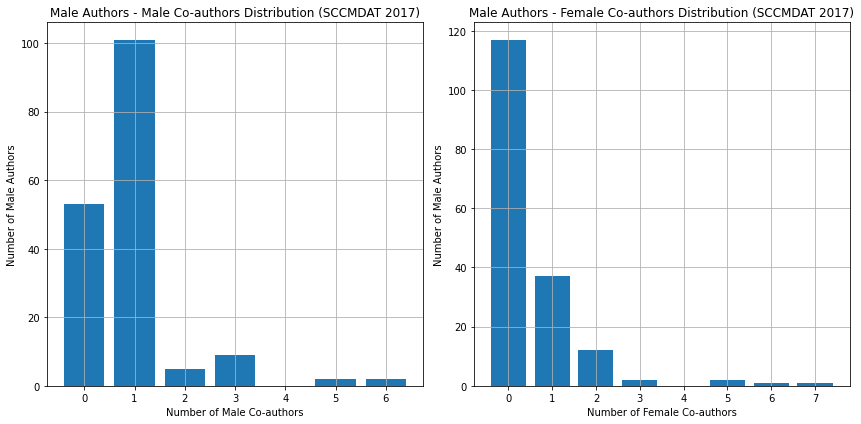

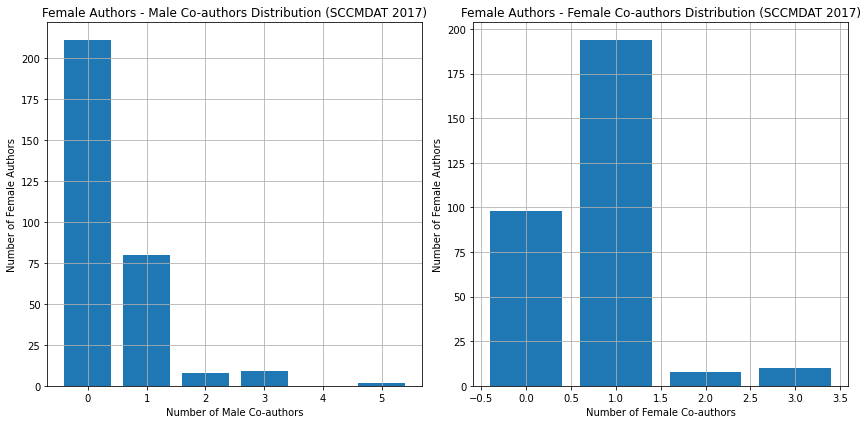

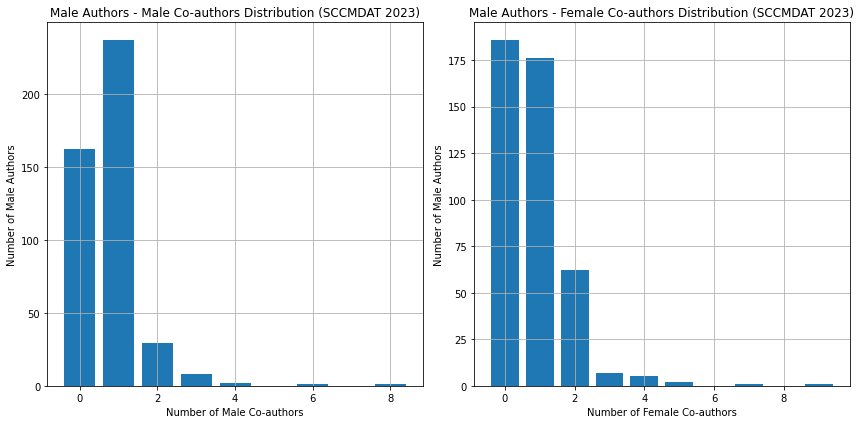

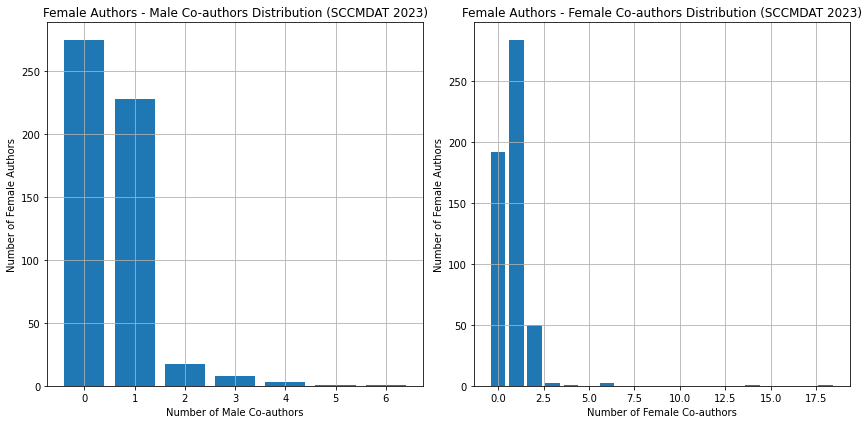

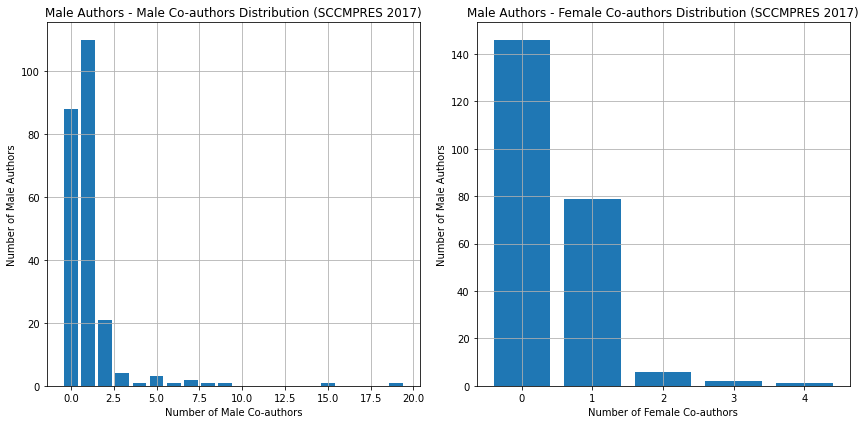

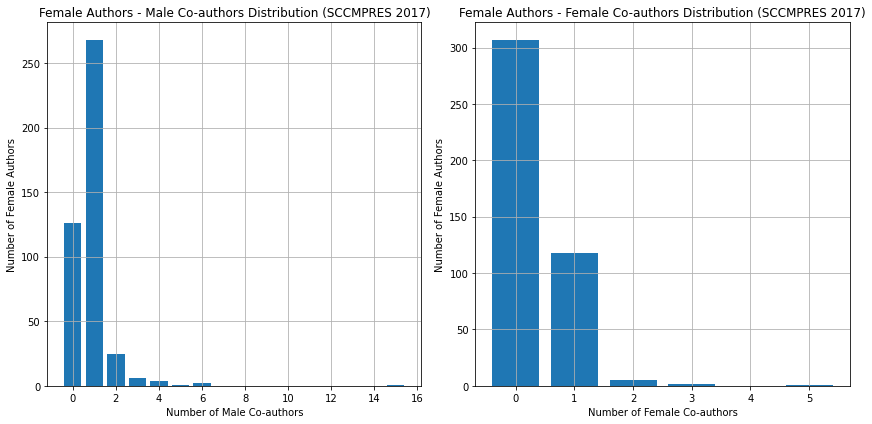

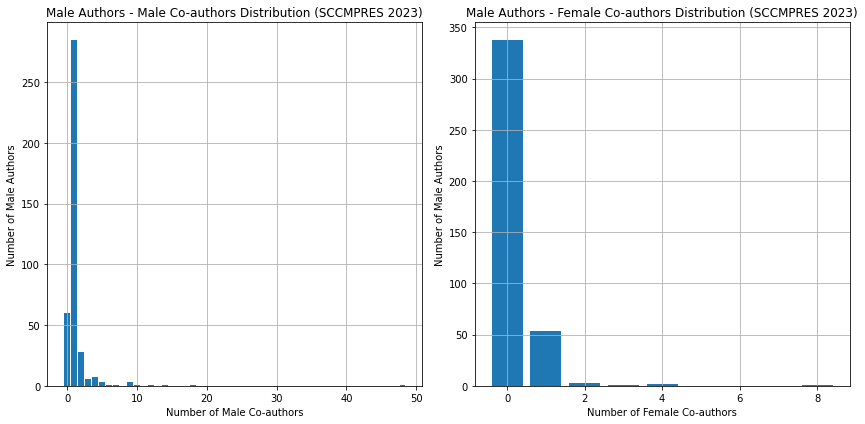

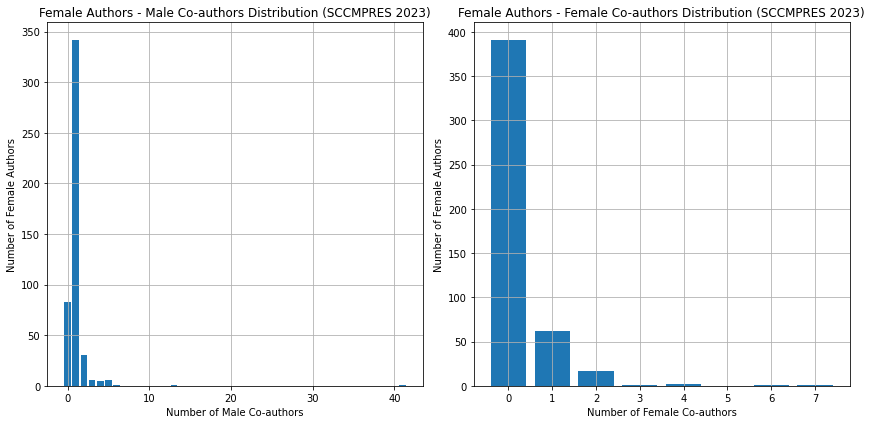

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_coauthor_distribution(df, dataset, year):
    # Filter the data for the specified year
    year_data = df[df['Year'] == year]
    
    # Create separate DataFrames for male and female authors
    male_authors = year_data[year_data['Gender - Author'] == 'male']
    female_authors = year_data[year_data['Gender - Author'] == 'female']
    
    # Count the number of male and female co-authors for each author
    male_coauthors = male_authors.groupby('Authors')['Gender - Fork'].apply(lambda x: (x == 'male').sum())
    female_coauthors = male_authors.groupby('Authors')['Gender - Fork'].apply(lambda x: (x == 'female').sum())
    
    male_coauthors_f = female_authors.groupby('Authors')['Gender - Fork'].apply(lambda x: (x == 'male').sum())
    female_coauthors_f = female_authors.groupby('Authors')['Gender - Fork'].apply(lambda x: (x == 'female').sum())
    
    # Create subplots for male and female authors
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot the distribution of male co-authors for male authors
    axs[0].hist(male_coauthors, bins=range(max(male_coauthors) + 2), align='left', rwidth=0.8)
    axs[0].set_xlabel('Number of Male Co-authors')
    axs[0].set_ylabel('Number of Male Authors')
    axs[0].set_title(f'Male Authors - Male Co-authors Distribution ({dataset} {year})')
    axs[0].grid(True)
    
    # Plot the distribution of female co-authors for male authors
    axs[1].hist(female_coauthors, bins=range(max(female_coauthors) + 2), align='left', rwidth=0.8)
    axs[1].set_xlabel('Number of Female Co-authors')
    axs[1].set_ylabel('Number of Male Authors')
    axs[1].set_title(f'Male Authors - Female Co-authors Distribution ({dataset} {year})')
    axs[1].grid(True)
    
    plt.tight_layout()
    plt.savefig(f'{dataset}_male_coauthors_distribution_{year}.png')
    plt.show()
    
    # Create subplots for female authors
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot the distribution of male co-authors for female authors
    axs[0].hist(male_coauthors_f, bins=range(max(male_coauthors_f) + 2), align='left', rwidth=0.8)
    axs[0].set_xlabel('Number of Male Co-authors')
    axs[0].set_ylabel('Number of Female Authors')
    axs[0].set_title(f'Female Authors - Male Co-authors Distribution ({dataset} {year})')
    axs[0].grid(True)
    
    # Plot the distribution of female co-authors for female authors
    axs[1].hist(female_coauthors_f, bins=range(max(female_coauthors_f) + 2), align='left', rwidth=0.8)
    axs[1].set_xlabel('Number of Female Co-authors')
    axs[1].set_ylabel('Number of Female Authors')
    axs[1].set_title(f'Female Authors - Female Co-authors Distribution ({dataset} {year})')
    axs[1].grid(True)
    
    plt.tight_layout()
    plt.savefig(f'{dataset}_female_coauthors_distribution_{year}.png')
    plt.show()

# SCCMDAT dataset
plot_coauthor_distribution(SCCMDAT, 'SCCMDAT', 2017)
plot_coauthor_distribution(SCCMDAT, 'SCCMDAT', 2023)

# SCCMPRES dataset
plot_coauthor_distribution(SCCMPRES, 'SCCMPRES', 2017)
plot_coauthor_distribution(SCCMPRES, 'SCCMPRES', 2023)

## Calculate scores for each author based on co-author gender diversity in 2017 and 2023:

In [28]:
import pandas as pd

def calculate_fork_diversity_scores(df, year):
    # Filter the DataFrame for the specified year
    df_year = df[df['Year'] == year]
    
    # Group by Fork Name and Publication Title to calculate co-author counts
    fork_scores = df_year.groupby(['Fork Name', 'Publication Title'])['Gender - Author'].apply(lambda x: pd.Series({
        'Male Co-authors': (x == 'male').sum(),
        'Female Co-authors': (x == 'female').sum(),
        'Total Co-authors': len(x)
    })).reset_index()
    
    # Rename columns to include the year
    fork_scores.columns = [col if col in ['Fork Name', 'Publication Title'] else col + ' ' + str(year) for col in fork_scores.columns]
    
    return fork_scores

# Calculate fork diversity scores for SCCMDAT dataset
sccmdat_fork_scores_2017 = calculate_fork_diversity_scores(SCCMDAT, 2017)
sccmdat_fork_scores_2023 = calculate_fork_diversity_scores(SCCMDAT, 2023)

# Merge the scores for 2017 and 2023
sccmdat_fork_scores = pd.merge(sccmdat_fork_scores_2017, sccmdat_fork_scores_2023, on=['Fork Name', 'Publication Title'], how='outer')

# Reorder columns
sccmdat_columns = ['Fork Name', 'Publication Title'] + [col for col in sccmdat_fork_scores.columns if '2017' in col] + [col for col in sccmdat_fork_scores.columns if '2023' in col]
sccmdat_fork_scores = sccmdat_fork_scores[sccmdat_columns]

# Fill missing values with 0
sccmdat_fork_scores.iloc[:, 2:] = sccmdat_fork_scores.iloc[:, 2:].fillna(0)

# Save the result to a CSV file
sccmdat_fork_scores.to_csv('sccmdat_co-authors.csv', index=False)

# Calculate fork diversity scores for SCCMPRES dataset
sccmpres_fork_scores_2017 = calculate_fork_diversity_scores(SCCMPRES, 2017)
sccmpres_fork_scores_2023 = calculate_fork_diversity_scores(SCCMPRES, 2023)

# Merge the scores for 2017 and 2023
sccmpres_fork_scores = pd.merge(sccmpres_fork_scores_2017, sccmpres_fork_scores_2023, on=['Fork Name', 'Publication Title'], how='outer')

# Reorder columns
sccmpres_columns = ['Fork Name', 'Publication Title'] + [col for col in sccmpres_fork_scores.columns if '2017' in col] + [col for col in sccmpres_fork_scores.columns if '2023' in col]
sccmpres_fork_scores = sccmpres_fork_scores[sccmpres_columns]

# Fill missing values with 0
sccmpres_fork_scores.iloc[:, 2:] = sccmpres_fork_scores.iloc[:, 2:].fillna(0)

# Save the result to a CSV file
sccmpres_fork_scores.to_csv('sccmpres_co-authors.csv', index=False)

In [29]:
sccmdat_fork_scores.head()

,Fork Name,Publication Title,level_2 2017,Gender - Author 2017,level_2 2023,Gender - Author 2023
0,A. Fahim Habib,An assessment of the natural radioactivity dis...,Male Co-authors,1.0,0,0.0
1,A. Fahim Habib,An assessment of the natural radioactivity dis...,Female Co-authors,10.0,0,0.0
2,A. Fahim Habib,An assessment of the natural radioactivity dis...,Total Co-authors,11.0,0,0.0
3,A. Fahim Habib,First measurements of Trojan Horse injection i...,Male Co-authors,3.0,0,0.0
4,A. Fahim Habib,First measurements of Trojan Horse injection i...,Female Co-authors,24.0,0,0.0


In [30]:
sccmpres_fork_scores.head()

,Fork Name,Publication Title,level_2 2017,Gender - Author 2017,level_2 2023,Gender - Author 2023
0,"Brandon Michael Henry, MD",Anatomical study of the internal nasal branch ...,Male Co-authors,0.0,0,0.0
1,"Brandon Michael Henry, MD",Anatomical study of the internal nasal branch ...,Female Co-authors,2.0,0,0.0
2,"Brandon Michael Henry, MD",Anatomical study of the internal nasal branch ...,Total Co-authors,2.0,0,0.0
3,"Brandon Michael Henry, MD",Anatomical variability and histological struct...,Male Co-authors,2.0,0,0.0
4,"Brandon Michael Henry, MD",Anatomical variability and histological struct...,Female Co-authors,3.0,0,0.0


In [31]:
import pandas as pd

df_SCCMDAT = pd.read_csv('SCCMDATupdated_FINALANALYSISCSV.csv')

# Filter the dataset for the years 2017 and 2023
df_SCCMDAT_2017 = df_SCCMDAT[df_SCCMDAT['Year'] == 2017]
df_SCCMDAT_2023 = df_SCCMDAT[df_SCCMDAT['Year'] == 2023]

def calculate_diversity_score(group):
    total_authors = len(group)
    male_authors = (group == 'male').sum()
    female_authors = (group == 'female').sum()
    
    if total_authors == 0:
        return 0
    else:
        return 1 - abs(male_authors - female_authors) / total_authors

# Calculate gender diversity scores for each fork in 2017
diversity_scores_2017 = df_SCCMDAT_2017.groupby(['Fork Name', 'Publication Title'])['Gender - Author'].apply(calculate_diversity_score).reset_index()
diversity_scores_2017.columns = ['Fork Name', 'Publication Title', 'Diversity Score 2017']

# Calculate gender diversity scores for each fork in 2023
diversity_scores_2023 = df_SCCMDAT_2023.groupby(['Fork Name', 'Publication Title'])['Gender - Author'].apply(calculate_diversity_score).reset_index()
diversity_scores_2023.columns = ['Fork Name', 'Publication Title', 'Diversity Score 2023']

# Merge the diversity scores for 2017 and 2023
diversity_scores_SCCMDAT = pd.merge(diversity_scores_2017, diversity_scores_2023, on=['Fork Name', 'Publication Title'], how='outer')

# Fill missing values with 0
diversity_scores_SCCMDAT.fillna(0, inplace=True)

# Save the diversity scores to a CSV file
diversity_scores_SCCMDAT.to_csv('SCCMDAT_fork_diversity_scores1.csv', index=False)

In [32]:
diversity_scores_SCCMDAT

,Fork Name,Publication Title,Diversity Score 2017,Diversity Score 2023
0,A. Fahim Habib,An assessment of the natural radioactivity dis...,0.181818,0.000000
1,A. Fahim Habib,First measurements of Trojan Horse injection i...,0.222222,0.000000
2,A. Fahim Habib,Horizon 2020 EuPRAXIA design study,0.013986,0.000000
3,A. Fahim Habib,JACoW: First Measurements of Trojan Horse Inje...,0.400000,0.000000
4,A. Fahim Habib,Plasma-optical spatiotemporal diagnostics and ...,0.200000,0.000000
...,...,...,...,...
186,Siddharth Dugar,Prevalence and Prognosis of Sepsis-Induced Car...,0.000000,0.857143
187,Siddharth Dugar,The relationship between norepinephrine equiva...,0.000000,0.666667
188,SumitKapoor,504: PERICARDIAL TAMPONADE AND OBSTRUCTIVE SHO...,0.000000,0.666667
189,SumitKapoor,Clot-in-transit: A ticking time bomb in the he...,0.000000,1.000000


In [33]:
import pandas as pd
df_SCCMPRES = pd.read_csv('SCCMPRESupdated_FINALANALYSIS_csv.csv')

# Filter the dataset for the years 2017 and 2023
df_SCCMPRES_2017 = df_SCCMPRES[df_SCCMPRES['Year'] == 2017]
df_SCCMPRES_2023 = df_SCCMPRES[df_SCCMPRES['Year'] == 2023]

def calculate_diversity_score(group):
    total_authors = len(group)
    male_authors = (group == 'male').sum()
    female_authors = (group == 'female').sum()
    
    if total_authors == 0:
        return 0
    else:
        return 1 - abs(male_authors - female_authors) / total_authors

# Calculate gender diversity scores for each fork in 2017
SCCMPRES_diversity_scores_2017 = df_SCCMPRES_2017.groupby(['Fork Name', 'Publication Title'])['Gender - Author'].apply(calculate_diversity_score).reset_index()
SCCMPRES_diversity_scores_2017.columns = ['Fork Name', 'Publication Title', 'Diversity Score 2017']

# Calculate gender diversity scores for each fork in 2023
SCCMPRES_diversity_scores_2023 = df_SCCMPRES_2023.groupby(['Fork Name', 'Publication Title'])['Gender - Author'].apply(calculate_diversity_score).reset_index()
SCCMPRES_diversity_scores_2023.columns = ['Fork Name', 'Publication Title', 'Diversity Score 2023']

# Merge the diversity scores for 2017 and 2023
diversity_scores_SCCMPRES = pd.merge(SCCMPRES_diversity_scores_2017, SCCMPRES_diversity_scores_2023, on=['Fork Name', 'Publication Title'], how='outer')

# Fill missing values with 0
diversity_scores_SCCMPRES.fillna(0, inplace=True)

# Save the diversity scores to a CSV file
diversity_scores_SCCMPRES.to_csv('SCCMPRES_fork_diversity_scores1.csv', index=False)

In [34]:
diversity_scores_SCCMPRES

,Fork Name,Publication Title,Diversity Score 2017,Diversity Score 2023
0,"Brandon Michael Henry, MD",Anatomical study of the internal nasal branch ...,0.0,0.000000
1,"Brandon Michael Henry, MD",Anatomical variability and histological struct...,0.8,0.000000
2,"Brandon Michael Henry, MD",Anatomical variations of the inferior thyroid ...,0.8,0.000000
3,"Brandon Michael Henry, MD","C. Braz, R. Castro-Ferreira, P. Dias, S. Sampa...",1.0,0.000000
4,"Brandon Michael Henry, MD",Congenital absence of the palmaris longus musc...,0.0,0.000000
...,...,...,...,...
312,Timucin Taner,Issues in multi-organ transplantation of the l...,0.0,0.000000
313,Timucin Taner,Novel Benchmark for Adult-to-Adult Living-Dono...,0.0,0.413793
314,Vivek Iyer,Heterogeneous treatment effects of therapeutic...,0.0,0.920635
315,Vivek Iyer,Mutually exclusive genetic interactions and ge...,0.0,0.750000


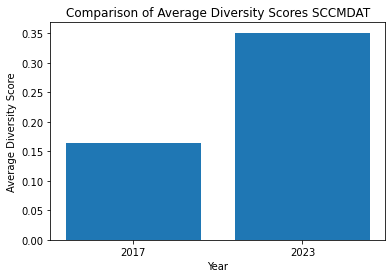

In [35]:
import matplotlib.pyplot as plt

df = diversity_scores_SCCMDAT

# Calculate average diversity scores for each year
avg_diversity_score_2017 = df['Diversity Score 2017'].mean()
avg_diversity_score_2023 = df['Diversity Score 2023'].mean()

# Bar Chart
fig, ax = plt.subplots(figsize=(6, 4))
years = ['2017', '2023']
avg_diversity_scores = [avg_diversity_score_2017, avg_diversity_score_2023]
ax.bar(years, avg_diversity_scores)
ax.set_xlabel('Year')
ax.set_ylabel('Average Diversity Score')
ax.set_title('Comparison of Average Diversity Scores SCCMDAT')
plt.show()

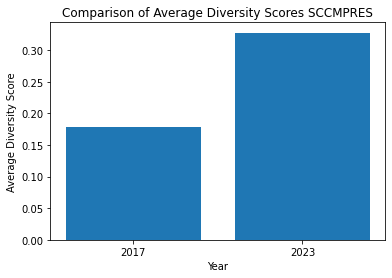

In [36]:
import matplotlib.pyplot as plt

# Assuming you have the dataset stored in a variable named 'diversity_scores_SCCMPRES'
df = diversity_scores_SCCMPRES

# Calculate average diversity scores for each year
avg_diversity_score_2017 = df['Diversity Score 2017'].mean()
avg_diversity_score_2023 = df['Diversity Score 2023'].mean()

# Bar Chart
fig, ax = plt.subplots(figsize=(6, 4))
years = ['2017', '2023']
avg_diversity_scores = [avg_diversity_score_2017, avg_diversity_score_2023]
ax.bar(years, avg_diversity_scores)
ax.set_xlabel('Year')
ax.set_ylabel('Average Diversity Score')
ax.set_title('Comparison of Average Diversity Scores SCCMPRES')
plt.show()

## Identifying twin authors with publications in 2017 and 2023 in SCCMDAT and SCCMPRES

In [37]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('SCCMPRESupdated_FINALANALYSIS_csv.csv')

# Filter the DataFrame for the years 2017 and 2023
df_2017 = df[df['Year'] == 2017]
df_2023 = df[df['Year'] == 2023]

# Get the unique authors for each year
authors_2017 = df_2017['Authors'].unique()
authors_2023 = df_2023['Authors'].unique()

# Find the common authors between the two years
common_authors = set(authors_2017) & set(authors_2023)

# Print the common authors
print("Common authors in 2017 and 2023:")
for author in common_authors:
    print(author)

Common authors in 2017 and 2023:
J Zhou
Mark Dredze
James Hewinson
Joaquin Barnoya
Jens Vikse
Srinivas Murthy
Robert Schwartz
Kevin Welding
BM Henry
Vivek Iyer
J Cohen
Samer Abu-Sultaneh
R Kashyap
Devang Sanghavi
O Gajic
Katherine Cashen
Julie Heimbach
Coral Gartner
Misun Hwang
Christopher W Mastropietro
PD Yim
M Vukoja
Ana Navas-Acien
Lisa Henriksen
Yue Dong
Rodrigo Cartin-Ceba
Michael Chaiton
Timucin Taner
Jerzy Walocha
Joanna Cohen
Vikas Bansal
Bekir Kaplan
Ultan McDermott
Michael Gaies
Caleb Miles
Ognjen Gajic
Rahul Kashyap


In [38]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('SCCMDATupdated_FINALANALYSISCSV.csv')

# Filter the DataFrame for the years 2017 and 2023
df_2017 = df[df['Year'] == 2017]
df_2023 = df[df['Year'] == 2023]

# Get the unique authors for each year
authors_2017 = df_2017['Authors'].unique()
authors_2023 = df_2023['Authors'].unique()

# Find the common authors between the two years
common_authors = set(authors_2017) & set(authors_2023)

# Print the common authors
print("Common authors in 2017 and 2023:")
for author in common_authors:
    print(author)

Common authors in 2017 and 2023:
Louis Puybasset
Nada Andelic
Victor Volovici
Ronny Beer
Emma Donoghue
Ji-yao Jiang
Mani Latifi
Giuseppe Citerio
B Hidding
Sumit Kapoor
Linda Lanyon
Kelly Foks
Emiliana Calappi
Giorgio Chevallard
Krisztina Amrein
Luigi Beretta
Patrick Esser
Annette Esper
GG Manahan
Bernhard Hidding
Marc Maegele
Fiona Lecky
Martin Fabricius
Siddharth Dugar
Guy-Loup Duli√®re
A Beaton
Camilla Brorsson
Philippe Azouvi
JB Rosenzweig
T Heinemann
Arturo Chieregato
P Scherkl
Tarik Hanane
Ajit Moghekar
Habib Benali
Antonio Belli
Lindsay Wilson
AF Habib
Audny Anke
Jonathan Coles
Donna Lee Armaignac
Marilyn Schallom
Anis Davoudi
Louis Gidel
Adel Bassily-Marcus
Rafael Badenes
D Ullmann
Steven Laureys
Parisa Rashidi
Bart Depreitere
Narendrakumar Alappan
OS Karger
Anoop Mayampurath
Endre Czeiter
David Menon
Lisa-Mae Williams
Monika Bullinger
Fahim Habib
Nicola Curry
A Habib
JR Cary
Eduardo Mireles-Cabodevila
Morten Blaabjerg
Salah Al-Zaiti
Clifton Callaway
Peter Cameron
P Pangaud
Chri

### Gender distribution of co-authors for each twin author in 2017 and 2023

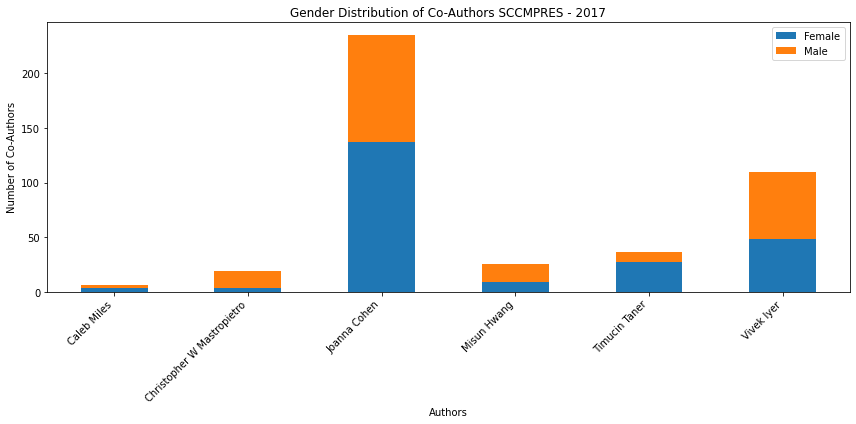

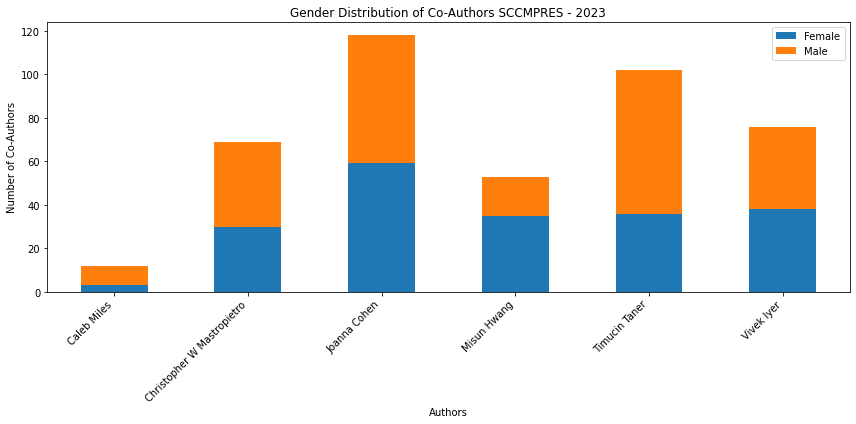

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('SCCMPRESupdated_FINALANALYSIS_csv.csv')

# Filter the dataset for the years 2017 and 2023
df_2017 = df[df['Year'] == 2017]
df_2023 = df[df['Year'] == 2023]

# Specify the list of common authors
common_authors = [
    'Joanna Cohen', 'Julie Heimbach', 'M Vukoja', 'Rahul Kashyap', 'Ultan McDermott',
    'Devang Sanghavi', 'BM Henry', 'Michael Gaies', 'Coral Gartner', 'Joaquin Barnoya',
    'Katherine Cashen', 'Lisa Henriksen', 'Jens Vikse', 'Ognjen Gajic', 'Bekir Kaplan',
    'Robert Schwartz', 'Timucin Taner', 'Vikas Bansal', 'Yue Dong', 'J Cohen',
    'Kevin Welding', 'J Zhou', 'Rodrigo Cartin-Ceba', 'Srinivas Murthy', 'Ana Navas-Acien',
    'Christopher W Mastropietro', 'Vivek Iyer', 'PD Yim', 'Misun Hwang', 'James Hewinson',
    'Mark Dredze', 'Jerzy Walocha', 'Samer Abu-Sultaneh', 'O Gajic', 'R Kashyap',
    'Michael Chaiton', 'Caleb Miles'
]

# Filter the dataset for the common authors in 2017 and 2023
df_2017_common = df_2017[df_2017['Fork Name'].isin(common_authors)]
df_2023_common = df_2023[df_2023['Fork Name'].isin(common_authors)]

# Count the number of male and female co-authors for each common author in 2017 and 2023
author_gender_counts_2017 = df_2017_common.groupby(['Fork Name', 'Gender - Author']).size().unstack(fill_value=0)
author_gender_counts_2023 = df_2023_common.groupby(['Fork Name', 'Gender - Author']).size().unstack(fill_value=0)

# Create separate plots for each year
fig1, ax1 = plt.subplots(figsize=(12, 6))
author_gender_counts_2017.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_xlabel('Authors')
ax1.set_ylabel('Number of Co-Authors')
ax1.set_title('Gender Distribution of Co-Authors SCCMPRES - 2017')
ax1.legend(['Female', 'Male'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

fig2, ax2 = plt.subplots(figsize=(12, 6))
author_gender_counts_2023.plot(kind='bar', stacked=True, ax=ax2)
ax2.set_xlabel('Authors')
ax2.set_ylabel('Number of Co-Authors')
ax2.set_title('Gender Distribution of Co-Authors SCCMPRES - 2023')
ax2.legend(['Female', 'Male'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

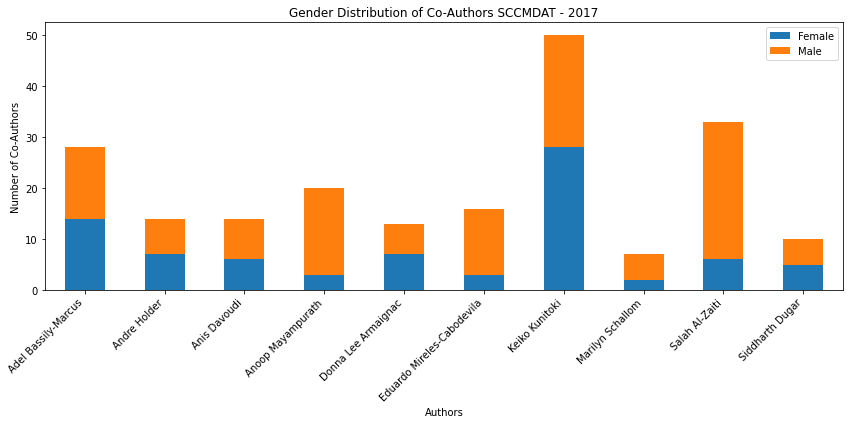

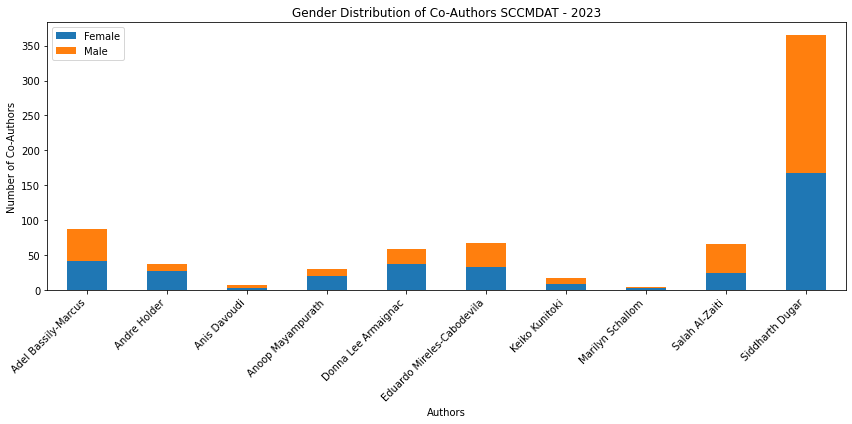

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('SCCMDATupdated_FINALANALYSISCSV.csv')

# Filter the dataset for the years 2017 and 2023
df_2017 = df[df['Year'] == 2017]
df_2023 = df[df['Year'] == 2023]

# Specify the list of common authors
common_authors = [
    'Donna Lee Armaignac', 'Bernhard Hidding', 'Andre Holder', 'Victor Volovici', 'Marilyn Schallom',
    'A Habib', 'G Andonian', 'Anis Davoudi', 'Nada Andelic', 'Adel Bassily-Marcus', 'Abhijit Duggal',
    'Tarik Hanane', 'Giorgio Chevallard', 'Thomas Heinemann', 'Martin Fabricius', 'P Pangaud',
    'AF Habib', 'V Yakimenko', 'GG Manahan', 'Ari Ercole', 'Endre Czeiter', 'Peter Bragge',
    'Krisztina Amrein', 'Marc Maegele', 'Lisa-Mae Williams', 'Mohammad Alrawashdeh', 'Camilla Brorsson',
    'Eduardo Mireles-Cabodevila', 'D Ullmann', 'Kelly Foks', 'DL Bruhwiler', 'Bart Depreitere',
    'Helen Dawes', 'T Heinemann', 'Louis Puybasset', 'Annette Esper', 'Luigi Beretta', 'Antonio Belli',
    'Steven Laureys', 'Patrick Esser', 'Emiliana Calappi', 'Guy-Loup Dulière', 'B Hidding',
    'Parisa Rashidi', 'Keiko Kunitoki', 'Geoffrey Manley', 'Christian Martin-Gill', 'A Knetsch',
    'Sumit Kapoor', 'Louis Gidel', 'David Menon', 'Donna Armaignac', 'Monika Bullinger', 'Audny Anke',
    'Ji-yao Jiang', 'Nicola Curry', 'Jonathan Coles', 'Ƒula Ƒilvesi', 'Ajit Moghekar', 'Anna Antoni',
    'Clifton Callaway', 'Erzsébet Ezer', 'Arturo Chieregato', 'Narendrakumar Alappan', 'Salah Al-Zaiti',
    'Claire Dahyot-Fizelier', 'Siddharth Dugar', 'Deepak Gupta', 'Fahim Habib', 'Peter Cameron',
    'Ronald Bartels', 'Fiona Lecky', 'Mani Latifi', 'Marek Czosnyka', 'JB Rosenzweig', 'Giuseppe Citerio',
    'Guoyi Gao', 'Rafael Badenes', 'Habib Benali', 'Gérard Audibert', 'Emma Donoghue', 'David Mortara',
    'M Litos', 'Philippe Azouvi', 'P Scherkl', 'Marek Majdan', 'JR Cary', 'Anoop Mayampurath',
    'Linda Lanyon', 'ZM Sheng', 'Mohammed Al-Jaghbeer', 'Lindsay Wilson', 'A Beaton', 'Ronny Beer',
    'OS Karger', 'Ervin Sejdic', 'Morten Blaabjerg'
]

# Filter the dataset for the common authors in 2017 and 2023
df_2017_common = df_2017[df_2017['Fork Name'].isin(common_authors)]
df_2023_common = df_2023[df_2023['Fork Name'].isin(common_authors)]

# Count the number of male and female co-authors for each common author in 2017 and 2023
author_gender_counts_2017 = df_2017_common.groupby(['Fork Name', 'Gender - Author']).size().unstack(fill_value=0)
author_gender_counts_2023 = df_2023_common.groupby(['Fork Name', 'Gender - Author']).size().unstack(fill_value=0)

# Create separate plots for each year
fig1, ax1 = plt.subplots(figsize=(12, 6))
author_gender_counts_2017.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_xlabel('Authors')
ax1.set_ylabel('Number of Co-Authors')
ax1.set_title('Gender Distribution of Co-Authors SCCMDAT - 2017')
ax1.legend(['Female', 'Male'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

fig2, ax2 = plt.subplots(figsize=(12, 6))
author_gender_counts_2023.plot(kind='bar', stacked=True, ax=ax2)
ax2.set_xlabel('Authors')
ax2.set_ylabel('Number of Co-Authors')
ax2.set_title('Gender Distribution of Co-Authors SCCMDAT - 2023')
ax2.legend(['Female', 'Male'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Gender diversity scores twin authors

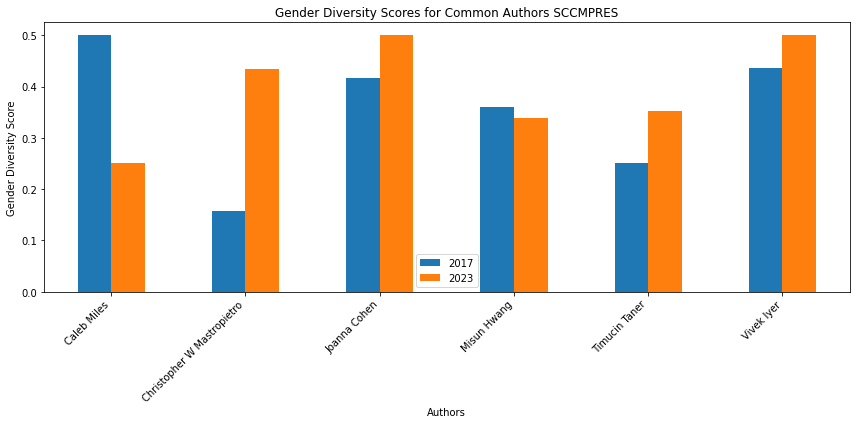

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('SCCMPRESupdated_FINALANALYSIS_csv.csv')

# Filter the dataset for the years 2017 and 2023
df_2017 = df[df['Year'] == 2017]
df_2023 = df[df['Year'] == 2023]

# Specify the list of common authors
common_authors = [
    'Joanna Cohen', 'Julie Heimbach', 'M Vukoja', 'Rahul Kashyap', 'Ultan McDermott',
    'Devang Sanghavi', 'BM Henry', 'Michael Gaies', 'Coral Gartner', 'Joaquin Barnoya',
    'Katherine Cashen', 'Lisa Henriksen', 'Jens Vikse', 'Ognjen Gajic', 'Bekir Kaplan',
    'Robert Schwartz', 'Timucin Taner', 'Vikas Bansal', 'Yue Dong', 'J Cohen',
    'Kevin Welding', 'J Zhou', 'Rodrigo Cartin-Ceba', 'Srinivas Murthy', 'Ana Navas-Acien',
    'Christopher W Mastropietro', 'Vivek Iyer', 'PD Yim', 'Misun Hwang', 'James Hewinson',
    'Mark Dredze', 'Jerzy Walocha', 'Samer Abu-Sultaneh', 'O Gajic', 'R Kashyap',
    'Michael Chaiton', 'Caleb Miles'
]

# Filter the dataset for the common authors in 2017 and 2023
df_2017_common = df_2017[df_2017['Fork Name'].isin(common_authors)]
df_2023_common = df_2023[df_2023['Fork Name'].isin(common_authors)]

# Calculate the gender diversity scores for each common author in 2017 and 2023
author_gender_counts_2017 = df_2017_common.groupby(['Fork Name', 'Gender - Author']).size().unstack(fill_value=0)
author_gender_counts_2023 = df_2023_common.groupby(['Fork Name', 'Gender - Author']).size().unstack(fill_value=0)

author_gender_diversity_2017 = (author_gender_counts_2017.min(axis=1) / author_gender_counts_2017.sum(axis=1)).fillna(0)
author_gender_diversity_2023 = (author_gender_counts_2023.min(axis=1) / author_gender_counts_2023.sum(axis=1)).fillna(0)

# Combine the gender diversity scores into a single DataFrame
gender_diversity_scores = pd.DataFrame({
    '2017': author_gender_diversity_2017,
    '2023': author_gender_diversity_2023
})

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))
gender_diversity_scores.plot(kind='bar', ax=ax)
ax.set_xlabel('Authors')
ax.set_ylabel('Gender Diversity Score')
ax.set_title('Gender Diversity Scores for Common Authors SCCMPRES')
ax.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

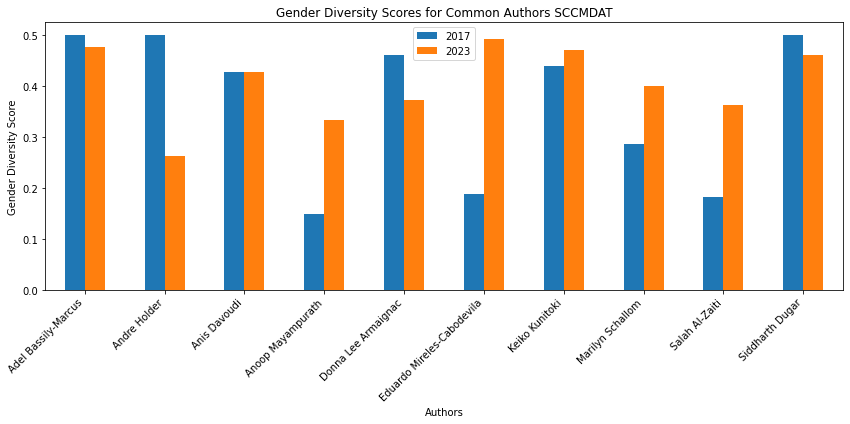

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('SCCMDATupdated_FINALANALYSISCSV.csv')

# Filter the dataset for the years 2017 and 2023
df_2017 = df[df['Year'] == 2017]
df_2023 = df[df['Year'] == 2023]

# Specify the list of common authors
common_authors = [
    'Donna Lee Armaignac', 'Bernhard Hidding', 'Andre Holder', 'Victor Volovici', 'Marilyn Schallom',
    'A Habib', 'G Andonian', 'Anis Davoudi', 'Nada Andelic', 'Adel Bassily-Marcus', 'Abhijit Duggal',
    'Tarik Hanane', 'Giorgio Chevallard', 'Thomas Heinemann', 'Martin Fabricius', 'P Pangaud',
    'AF Habib', 'V Yakimenko', 'GG Manahan', 'Ari Ercole', 'Endre Czeiter', 'Peter Bragge',
    'Krisztina Amrein', 'Marc Maegele', 'Lisa-Mae Williams', 'Mohammad Alrawashdeh', 'Camilla Brorsson',
    'Eduardo Mireles-Cabodevila', 'D Ullmann', 'Kelly Foks', 'DL Bruhwiler', 'Bart Depreitere',
    'Helen Dawes', 'T Heinemann', 'Louis Puybasset', 'Annette Esper', 'Luigi Beretta', 'Antonio Belli',
    'Steven Laureys', 'Patrick Esser', 'Emiliana Calappi', 'Guy-Loup Dulière', 'B Hidding',
    'Parisa Rashidi', 'Keiko Kunitoki', 'Geoffrey Manley', 'Christian Martin-Gill', 'A Knetsch',
    'Sumit Kapoor', 'Louis Gidel', 'David Menon', 'Donna Armaignac', 'Monika Bullinger', 'Audny Anke',
    'Ji-yao Jiang', 'Nicola Curry', 'Jonathan Coles', 'Ƒula Ƒilvesi', 'Ajit Moghekar', 'Anna Antoni',
    'Clifton Callaway', 'Erzsébet Ezer', 'Arturo Chieregato', 'Narendrakumar Alappan', 'Salah Al-Zaiti',
    'Claire Dahyot-Fizelier', 'Siddharth Dugar', 'Deepak Gupta', 'Fahim Habib', 'Peter Cameron',
    'Ronald Bartels', 'Fiona Lecky', 'Mani Latifi', 'Marek Czosnyka', 'JB Rosenzweig', 'Giuseppe Citerio',
    'Guoyi Gao', 'Rafael Badenes', 'Habib Benali', 'Gérard Audibert', 'Emma Donoghue', 'David Mortara',
    'M Litos', 'Philippe Azouvi', 'P Scherkl', 'Marek Majdan', 'JR Cary', 'Anoop Mayampurath',
    'Linda Lanyon', 'ZM Sheng', 'Mohammed Al-Jaghbeer', 'Lindsay Wilson', 'A Beaton', 'Ronny Beer',
    'OS Karger', 'Ervin Sejdic', 'Morten Blaabjerg'
]

# Filter the dataset for the common authors in 2017 and 2023
df_2017_common = df_2017[df_2017['Fork Name'].isin(common_authors)]
df_2023_common = df_2023[df_2023['Fork Name'].isin(common_authors)]

# Calculate the gender diversity scores for each common author in 2017 and 2023
author_gender_counts_2017 = df_2017_common.groupby(['Fork Name', 'Gender - Author']).size().unstack(fill_value=0)
author_gender_counts_2023 = df_2023_common.groupby(['Fork Name', 'Gender - Author']).size().unstack(fill_value=0)

author_gender_diversity_2017 = (author_gender_counts_2017.min(axis=1) / author_gender_counts_2017.sum(axis=1)).fillna(0)
author_gender_diversity_2023 = (author_gender_counts_2023.min(axis=1) / author_gender_counts_2023.sum(axis=1)).fillna(0)

# Combine the gender diversity scores into a single DataFrame
gender_diversity_scores = pd.DataFrame({
    '2017': author_gender_diversity_2017,
    '2023': author_gender_diversity_2023
})

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))
gender_diversity_scores.plot(kind='bar', ax=ax)
ax.set_xlabel('Authors')
ax.set_ylabel('Gender Diversity Score')
ax.set_title('Gender Diversity Scores for Common Authors SCCMDAT')
ax.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Barplot to compare the number of publications for each author in 2017 and 2023.

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact

df = pd.read_csv('SCCMPRESupdated_FINALANALYSIS_csv.csv')

# Filter the dataset for the years 2017 and 2023
df_2017 = df[df['Year'] == 2017]
df_2023 = df[df['Year'] == 2023]

# Count the number of publications for each author in 2017 and 2023
author_counts_2017 = df_2017['Authors'].value_counts()
author_counts_2023 = df_2023['Authors'].value_counts()

# Combine the author counts into a single DataFrame
author_counts = pd.DataFrame({'2017': author_counts_2017, '2023': author_counts_2023}).fillna(0)

# Determine the number of authors and pages
num_authors = len(author_counts)
authors_per_page = 10
num_pages = (num_authors + authors_per_page - 1) // authors_per_page

# Create a function to update the plot based on the selected page
def update_plot(page):
    page_num = int(page.split()[-1])  # Extract the page number from the string
    start_index = (page_num - 1) * authors_per_page
    end_index = min(start_index + authors_per_page, num_authors)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    bars_2017 = ax.bar(range(end_index - start_index), author_counts.iloc[start_index:end_index, 0], label='2017')
    bars_2023 = ax.bar(range(end_index - start_index), author_counts.iloc[start_index:end_index, 1], label='2023')
    
    ax.set_xlabel('Authors')
    ax.set_ylabel('Number of Publications')
    ax.set_title(f'Number of Publications per Author (2017 vs 2023) SCCMPRES - Page {page_num}')
    ax.set_xticks(range(end_index - start_index))
    ax.set_xticklabels(author_counts.index[start_index:end_index], rotation=45, ha='right')
    ax.legend()
    plt.tight_layout()
    plt.show()

# Create a dropdown menu for page selection
page_options = [f'Page {i+1}' for i in range(num_pages)]
interact(update_plot, page=page_options)

interactive(children=(Dropdown(description='page', options=('Page 1', 'Page 2', 'Page 3', 'Page 4', 'Page 5', …

<function __main__.update_plot(page)>

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact

df = pd.read_csv('SCCMDATupdated_FINALANALYSISCSV.csv')

# Filter the dataset for the years 2017 and 2023
df_2017 = df[df['Year'] == 2017]
df_2023 = df[df['Year'] == 2023]

# Count the number of publications for each author in 2017 and 2023
author_counts_2017 = df_2017['Authors'].value_counts()
author_counts_2023 = df_2023['Authors'].value_counts()

# Combine the author counts into a single DataFrame
author_counts = pd.DataFrame({'2017': author_counts_2017, '2023': author_counts_2023}).fillna(0)

# Determine the number of authors and pages
num_authors = len(author_counts)
authors_per_page = 10
num_pages = (num_authors + authors_per_page - 1) // authors_per_page

# Create a function to update the plot based on the selected page
def update_plot(page):
    page_num = int(page.split()[-1])  # Extract the page number from the string
    start_index = (page_num - 1) * authors_per_page
    end_index = min(start_index + authors_per_page, num_authors)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    bars_2017 = ax.bar(range(end_index - start_index), author_counts.iloc[start_index:end_index, 0], label='2017')
    bars_2023 = ax.bar(range(end_index - start_index), author_counts.iloc[start_index:end_index, 1], label='2023')
    
    ax.set_xlabel('Authors')
    ax.set_ylabel('Number of Publications')
    ax.set_title(f'Number of Publications per Author (2017 vs 2023) SCCMDAT - Page {page_num}')
    ax.set_xticks(range(end_index - start_index))
    ax.set_xticklabels(author_counts.index[start_index:end_index], rotation=45, ha='right')
    ax.legend()
    plt.tight_layout()
    plt.show()

# Create a dropdown menu for page selection
page_options = [f'Page {i+1}' for i in range(num_pages)]
interact(update_plot, page=page_options)

interactive(children=(Dropdown(description='page', options=('Page 1', 'Page 2', 'Page 3', 'Page 4', 'Page 5', …

<function __main__.update_plot(page)>

### Stacked Bar Plot to show the proportion of male and female co-authors for each author in 2017 and 2023.

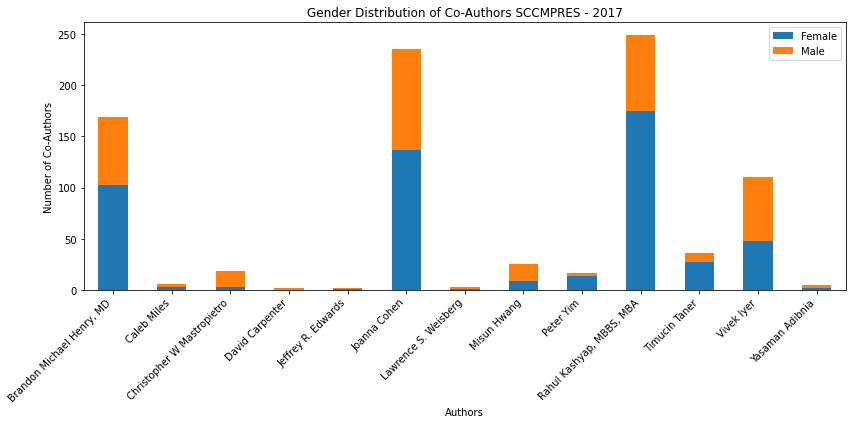

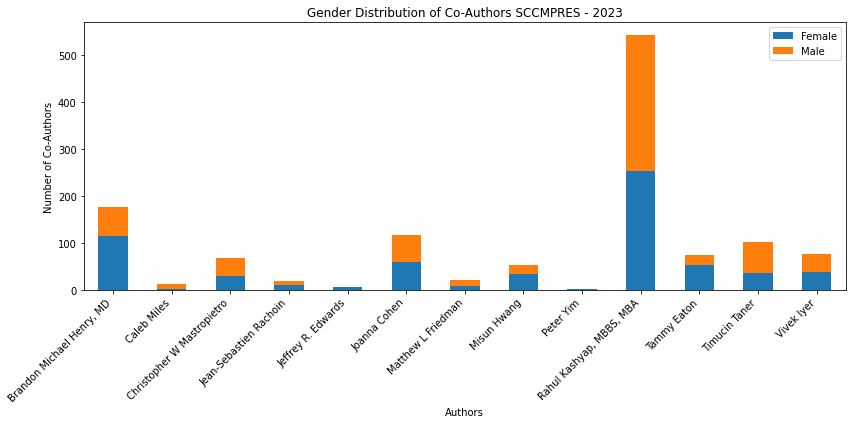

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('SCCMPRESupdated_FINALANALYSIS_csv.csv')

# Filter the dataset for the years 2017 and 2023
df_2017 = df[df['Year'] == 2017]
df_2023 = df[df['Year'] == 2023]


# Count the number of male and female co-authors for each author in 2017 and 2023
author_gender_counts_2017 = df_2017.groupby(['Fork Name', 'Gender - Author']).size().unstack(fill_value=0)
author_gender_counts_2023 = df_2023.groupby(['Fork Name', 'Gender - Author']).size().unstack(fill_value=0)

# Create separate plots for each year
fig1, ax1 = plt.subplots(figsize=(12, 6))
author_gender_counts_2017.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_xlabel('Authors')
ax1.set_ylabel('Number of Co-Authors')
ax1.set_title('Gender Distribution of Co-Authors SCCMPRES - 2017')
ax1.legend(['Female', 'Male'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

fig2, ax2 = plt.subplots(figsize=(12, 6))
author_gender_counts_2023.plot(kind='bar', stacked=True, ax=ax2)
ax2.set_xlabel('Authors')
ax2.set_ylabel('Number of Co-Authors')
ax2.set_title('Gender Distribution of Co-Authors SCCMPRES - 2023')
ax2.legend(['Female', 'Male'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

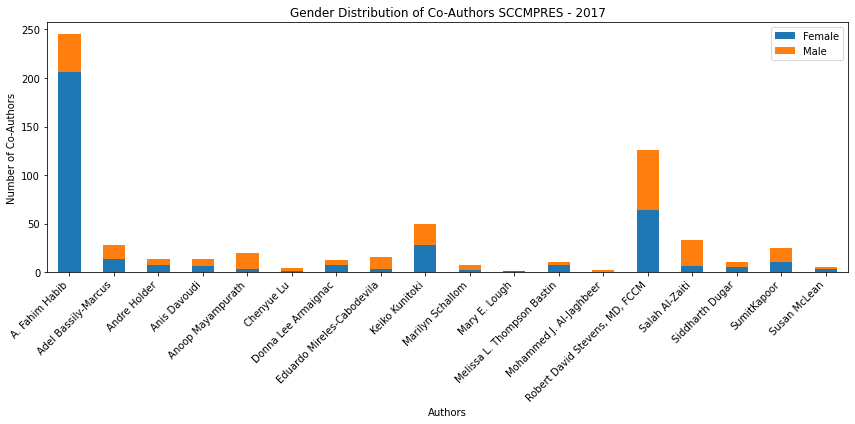

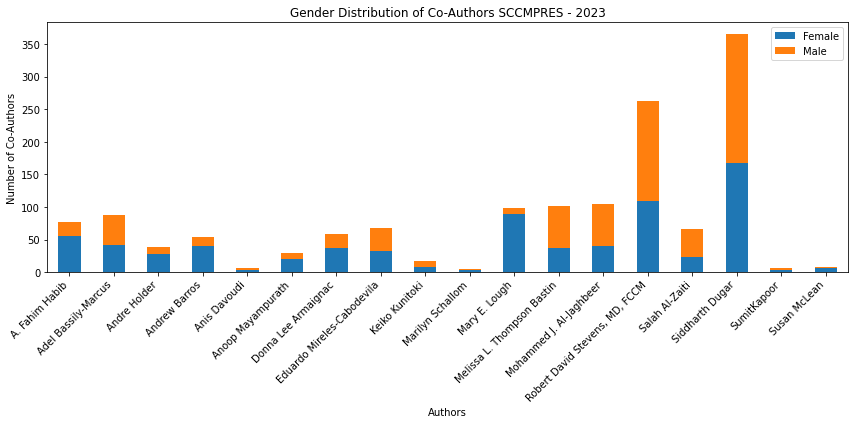

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('SCCMDATupdated_FINALANALYSISCSV.csv')

# Filter the dataset for the years 2017 and 2023
df_2017 = df[df['Year'] == 2017]
df_2023 = df[df['Year'] == 2023]


# Count the number of male and female co-authors for each author in 2017 and 2023
author_gender_counts_2017 = df_2017.groupby(['Fork Name', 'Gender - Author']).size().unstack(fill_value=0)
author_gender_counts_2023 = df_2023.groupby(['Fork Name', 'Gender - Author']).size().unstack(fill_value=0)

# Create separate plots for each year
fig1, ax1 = plt.subplots(figsize=(12, 6))
author_gender_counts_2017.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_xlabel('Authors')
ax1.set_ylabel('Number of Co-Authors')
ax1.set_title('Gender Distribution of Co-Authors SCCMPRES - 2017')
ax1.legend(['Female', 'Male'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

fig2, ax2 = plt.subplots(figsize=(12, 6))
author_gender_counts_2023.plot(kind='bar', stacked=True, ax=ax2)
ax2.set_xlabel('Authors')
ax2.set_ylabel('Number of Co-Authors')
ax2.set_title('Gender Distribution of Co-Authors SCCMPRES - 2023')
ax2.legend(['Female', 'Male'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [47]:
import pandas as pd

# Assuming the diversity scores are stored in a DataFrame named 'diversity_scores_SCCMPRES'
fork_diversity_scores_SCCMPRES = pd.read_csv('SCCMPRES_fork_diversity_scores.csv')  # Replace with the actual file name

# Specify the list of co-authors
co_authors = [
    'Joanna Cohen', 'Julie Heimbach', 'M Vukoja', 'Rahul Kashyap', 'Ultan McDermott',
    'Devang Sanghavi', 'BM Henry', 'Michael Gaies', 'Coral Gartner', 'Joaquin Barnoya',
    'Katherine Cashen', 'Lisa Henriksen', 'Jens Vikse', 'Ognjen Gajic', 'Bekir Kaplan',
    'Robert Schwartz', 'Timucin Taner', 'Vikas Bansal', 'Yue Dong', 'J Cohen',
    'Kevin Welding', 'J Zhou', 'Rodrigo Cartin-Ceba', 'Srinivas Murthy', 'Ana Navas-Acien',
    'Christopher W Mastropietro', 'Vivek Iyer', 'PD Yim', 'Misun Hwang', 'James Hewinson',
    'Mark Dredze', 'Jerzy Walocha', 'Samer Abu-Sultaneh', 'O Gajic', 'R Kashyap',
    'Michael Chaiton', 'Caleb Miles'
]

# Filter the diversity scores for the specified co-authors in 2017 and 2023
diversity_scores_2017 = fork_diversity_scores_SCCMPRES[fork_diversity_scores_SCCMPRES['Fork Name'].isin(co_authors)][['Fork Name', 'Diversity Score 2017']]
diversity_scores_2023 = fork_diversity_scores_SCCMPRES[fork_diversity_scores_SCCMPRES['Fork Name'].isin(co_authors)][['Fork Name', 'Diversity Score 2023']]

# Merge the diversity scores for 2017 and 2023 based on the 'Fork Name'
merged_scores = pd.merge(diversity_scores_2017, diversity_scores_2023, on='Fork Name', how='outer')

# Rename the columns
merged_scores.columns = ['Fork Name', 'diversity_scores_2017', 'diversity_scores_2023']

# Fill any missing values with 0
merged_scores = merged_scores.fillna(0)

# Display the table
print(merged_scores)

Empty DataFrame
Columns: [Fork Name, diversity_scores_2017, diversity_scores_2023]
Index: []


In [48]:
# Read the diversity scores data
fork_diversity_scores_SCCMPRES = pd.read_csv('SCCMPRES_fork_diversity_scores.csv')

# Specify the list of co-authors
co_authors = [
    'Joanna Cohen', 'Julie Heimbach', 'M Vukoja', 'Rahul Kashyap', 'Ultan McDermott',
    'Devang Sanghavi', 'BM Henry', 'Michael Gaies', 'Coral Gartner', 'Joaquin Barnoya',
    'Katherine Cashen', 'Lisa Henriksen', 'Jens Vikse', 'Ognjen Gajic', 'Bekir Kaplan',
    'Robert Schwartz', 'Timucin Taner', 'Vikas Bansal', 'Yue Dong', 'J Cohen',
    'Kevin Welding', 'J Zhou', 'Rodrigo Cartin-Ceba', 'Srinivas Murthy', 'Ana Navas-Acien',
    'Christopher W Mastropietro', 'Vivek Iyer', 'PD Yim', 'Misun Hwang', 'James Hewinson',
    'Mark Dredze', 'Jerzy Walocha', 'Samer Abu-Sultaneh', 'O Gajic', 'R Kashyap',
    'Michael Chaiton', 'Caleb Miles'
]

# Filter the diversity scores for the specified co-authors in 2017 and 2023
diversity_scores_2017 = fork_diversity_scores_SCCMPRES[fork_diversity_scores_SCCMPRES['Fork Name'].isin(co_authors)][['Fork Name', 'Diversity Score 2017']]
diversity_scores_2023 = fork_diversity_scores_SCCMPRES[fork_diversity_scores_SCCMPRES['Fork Name'].isin(co_authors)][['Fork Name', 'Diversity Score 2023']]

# Merge the diversity scores for 2017 and 2023 based on the 'Fork Name'
merged_scores_SCCMPRES = pd.merge(diversity_scores_2017, diversity_scores_2023, on='Fork Name', how='outer')

# Rename the columns
merged_scores_SCCMPRES.columns = ['Fork Name', 'diversity_scores_2017', 'diversity_scores_2023']

# Fill any missing values with 0
merged_scores_SCCMPRES = merged_scores.fillna(0)

In [49]:
merged_scores_SCCMPRES

,Fork Name,diversity_scores_2017,diversity_scores_2023


In [50]:
merged_scores_SCCMPRES.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Fork Name              0 non-null      float64
 1   diversity_scores_2017  0 non-null      object 
 2   diversity_scores_2023  0 non-null      float64
dtypes: float64(2), object(1)
memory usage: 124.0+ bytes


In [51]:
# Read the diversity scores data
fork_diversity_scores_SCCMDAT = pd.read_csv('SCCMDAT_fork_diversity_scores.csv')

# Specify the list of co-authors
co_authors = [
    'Donna Lee Armaignac', 'Bernhard Hidding', 'Andre Holder', 'Victor Volovici', 'Marilyn Schallom',
    'A Habib', 'G Andonian', 'Anis Davoudi', 'Nada Andelic', 'Adel Bassily-Marcus', 'Abhijit Duggal',
    'Tarik Hanane', 'Giorgio Chevallard', 'Thomas Heinemann', 'Martin Fabricius', 'P Pangaud',
    'AF Habib', 'V Yakimenko', 'GG Manahan', 'Ari Ercole', 'Endre Czeiter', 'Peter Bragge',
    'Krisztina Amrein', 'Marc Maegele', 'Lisa-Mae Williams', 'Mohammad Alrawashdeh', 'Camilla Brorsson',
    'Eduardo Mireles-Cabodevila', 'D Ullmann', 'Kelly Foks', 'DL Bruhwiler', 'Bart Depreitere',
    'Helen Dawes', 'T Heinemann', 'Louis Puybasset', 'Annette Esper', 'Luigi Beretta', 'Antonio Belli',
    'Steven Laureys', 'Patrick Esser', 'Emiliana Calappi', 'Guy-Loup Dulière', 'B Hidding',
    'Parisa Rashidi', 'Keiko Kunitoki', 'Geoffrey Manley', 'Christian Martin-Gill', 'A Knetsch',
    'Sumit Kapoor', 'Louis Gidel', 'David Menon', 'Donna Armaignac', 'Monika Bullinger', 'Audny Anke',
    'Ji-yao Jiang', 'Nicola Curry', 'Jonathan Coles', 'Ƒula Ƒilvesi', 'Ajit Moghekar', 'Anna Antoni',
    'Clifton Callaway', 'Erzsébet Ezer', 'Arturo Chieregato', 'Narendrakumar Alappan', 'Salah Al-Zaiti',
    'Claire Dahyot-Fizelier', 'Siddharth Dugar', 'Deepak Gupta', 'Fahim Habib', 'Peter Cameron',
    'Ronald Bartels', 'Fiona Lecky', 'Mani Latifi', 'Marek Czosnyka', 'JB Rosenzweig', 'Giuseppe Citerio',
    'Guoyi Gao', 'Rafael Badenes', 'Habib Benali', 'Gérard Audibert', 'Emma Donoghue', 'David Mortara',
    'M Litos', 'Philippe Azouvi', 'P Scherkl', 'Marek Majdan', 'JR Cary', 'Anoop Mayampurath',
    'Linda Lanyon', 'ZM Sheng', 'Mohammed Al-Jaghbeer', 'Lindsay Wilson', 'A Beaton', 'Ronny Beer',
    'OS Karger', 'Ervin Sejdic', 'Morten Blaabjerg'
]

# Filter the diversity scores for the specified co-authors in 2017 and 2023
diversity_scores_2017 = fork_diversity_scores_SCCMDAT[fork_diversity_scores_SCCMDAT['Fork Name'].isin(co_authors)][['Fork Name', 'Diversity Score 2017']]
diversity_scores_2023 = fork_diversity_scores_SCCMDAT[fork_diversity_scores_SCCMDAT['Fork Name'].isin(co_authors)][['Fork Name', 'Diversity Score 2023']]

# Merge the diversity scores for 2017 and 2023 based on the 'Fork Name'
merged_scores_SCCMDAT = pd.merge(diversity_scores_2017, diversity_scores_2023, on='Fork Name', how='outer')

# Rename the columns
merged_scores_SCCMDAT.columns = ['Fork Name', 'diversity_scores_2017', 'diversity_scores_2023']

# Fill any missing values with 0
merged_scores_SCCMDAT = merged_scores.fillna(0)

In [52]:
merged_scores_SCCMDAT

,Fork Name,diversity_scores_2017,diversity_scores_2023


In [53]:
SCCMDAT.head()

,Authors,Affiliation Name,Latitude_from_df2,Longitude_from_df2,Highest Degree,Department,Fork Name,Affiliation,Lat,Lon,Publication Title,Year,Citations,Cited By URL,Abstract,Gender - Author,Gender - Fork
0,3rd Lewin,NaN,NaN,NaN,Not Available,Not Available,"Robert David Stevens, MD, FCCM",Johns Hopkins University School of Medicine,39.330202,-76.621854,Reversal of transtentorial herniation with hyp...,2008.0,294.0,NaN,NaN,male,male
1,A Accardo,Università degli Studi di Trieste,45.660169,13.794792,Not Available,Not Available,Salah Al-Zaiti,University of Pittsburgh,40.444153,-79.962461,Index By Author Ab√§cherli R 105 Ab√°solo D 10...,NaN,0.0,NaN,NaN,female,female
2,A Ahmad,Universiti Teknologi Malaysia,1.558522,103.639914,Not Available,Not Available,Salah Al-Zaiti,University of Pittsburgh,40.444153,-79.962461,100 Two Thirds of Patients With Acute Coronary...,2021.0,0.0,NaN,NaN,female,female
3,A Ahmad,Universiti Teknologi Malaysia,1.558522,103.639914,Not Available,Not Available,Salah Al-Zaiti,University of Pittsburgh,40.444153,-79.962461,Index By Author Ab√§cherli R 105 Ab√°solo D 10...,NaN,0.0,NaN,NaN,female,female
4,A Akasawa,Tokyo Metropolitan Children's Medical Center,36.858403,-76.305431,Not Available,Not Available,"Robert David Stevens, MD, FCCM",Johns Hopkins University School of Medicine,39.330202,-76.621854,"Author Index Vol. 118, No. 2‚Äì4, 1999",1999.0,0.0,NaN,NaN,female,male


In [54]:
SCCMPRES.head()

,Authors,Affiliation Name,Latitude_from_df2,Longitude_from_df2,Highest Degree,Department,Fork Name,Affiliation,Lat,Lon,Publication Title,Year,Citations,Cited By URL,Abstract,Gender - Author,Gender - Fork
0,A ASKENASE,Cooper University Hospital,39.941225,-75.116387,Not Available,Not Available,Lawrence S. Weisberg,Cooper Medical School of Rowan University,39.940312,-75.1197608,MECHANISM OF ATRIAL-NATRIURETIC-PEPTIDE (ANP) ...,1990.0,0.0,NaN,NaN,female,female
1,A Aboud,College of Liberal Arts and Sciences,34.129407,-117.889754,Not Available,Not Available,"Brandon Michael Henry, MD",Cincinnati Children's Hospital Medical Center,39.140845,-84.5022885,Ascending aorta replacement vs. total aortic a...,2019.0,16.0,NaN,OBJECTIVE: Acute type A aortic dissection (ATA...,female,male
2,A Aboud,College of Liberal Arts and Sciences,34.129407,-117.889754,Not Available,Not Available,"Brandon Michael Henry, MD",Cincinnati Children's Hospital Medical Center,39.140845,-84.5022885,Mitral Valve Replacement Using Subvalvular App...,2020.0,1.0,NaN,Background: To assess clinical outcomes among ...,female,male
3,A Aherrera,Philippine General Hospital,14.577771,120.985707,Not Available,Not Available,Joanna Cohen,Johns Hopkins University,39.330202,76.6218536,E-cigarette Use Patterns and Device Characteri...,2019.0,0.0,NaN,NaN,female,female
4,A Aherrera,Philippine General Hospital,14.577771,120.985707,Not Available,Not Available,Joanna Cohen,Johns Hopkins University,39.330202,76.6218536,Factors that influence support and enforcement...,2016.0,0.0,NaN,NaN,female,female


-------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------

### Check the distribution of publications per author in 2017 and 2023 for SCCMDAT and SCCMPRES:

histograms showing the distribution of publications per author in 2017 and 2023 for both SCCMDAT and SCCMPRES datasets. It will display how many authors have no publications, 1 publication, 2 publications, and so on.

In [55]:
import pandas as pd

sccmdat = pd.read_csv('SCCMDATupdated_FINALANALYSISCSV.csv')  
sccmpres = pd.read_csv('SCCMPRESupdated_FINALANALYSIS_csv.csv') 

# SCCMDAT analysis
print("SCCMDAT Analysis:")

# Count publications per author in 2017
sccmdat_2017 = sccmdat[sccmdat['Year'] == 2017]
sccmdat_2017_counts = sccmdat_2017.groupby('Authors').size().reset_index(name='Count')
sccmdat_2017_distribution = sccmdat_2017_counts.groupby('Count').size()
print("Distribution of publications per author in 2017:")
print(sccmdat_2017_distribution)

# Count publications per author in 2023
sccmdat_2023 = sccmdat[sccmdat['Year'] == 2023]
sccmdat_2023_counts = sccmdat_2023.groupby('Authors').size().reset_index(name='Count')
sccmdat_2023_distribution = sccmdat_2023_counts.groupby('Count').size()
print("Distribution of publications per author in 2023:")
print(sccmdat_2023_distribution)

print()

# SCCMPRES analysis
print("SCCMPRES Analysis:")

# Count publications per author in 2017
sccmpres_2017 = sccmpres[sccmpres['Year'] == 2017]
sccmpres_2017_counts = sccmpres_2017.groupby('Authors').size().reset_index(name='Count')
sccmpres_2017_distribution = sccmpres_2017_counts.groupby('Count').size()
print("Distribution of publications per author in 2017:")
print(sccmpres_2017_distribution)

# Count publications per author in 2023
sccmpres_2023 = sccmpres[sccmpres['Year'] == 2023]
sccmpres_2023_counts = sccmpres_2023.groupby('Authors').size().reset_index(name='Count')
sccmpres_2023_distribution = sccmpres_2023_counts.groupby('Count').size()
print("Distribution of publications per author in 2023:")
print(sccmpres_2023_distribution)

SCCMDAT Analysis:
Distribution of publications per author in 2017:
Count
1    408
2     34
3     29
4      1
5      6
6      2
7      2
dtype: int64
Distribution of publications per author in 2023:
Count
1     701
2     154
3      88
4      12
5       9
6       4
7       1
9       1
14      1
15      1
20      1
dtype: int64

SCCMPRES Analysis:
Distribution of publications per author in 2017:
Count
1     575
2      57
3      14
4       6
5       5
6       3
7       2
8       1
9       1
15      2
19      1
dtype: int64
Distribution of publications per author in 2023:
Count
1     739
2      80
3      14
4      16
5       9
6       3
7       2
8       1
9       3
10      1
12      1
13      1
14      1
18      1
41      1
48      1
dtype: int64


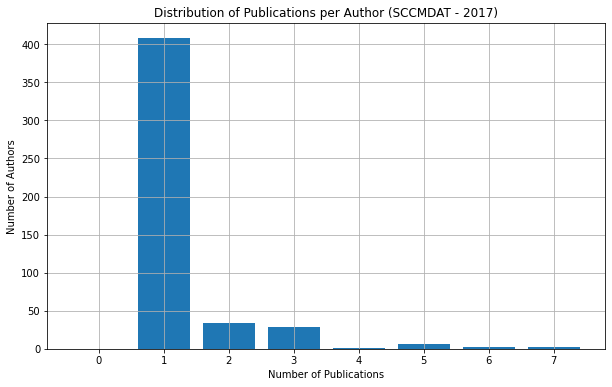

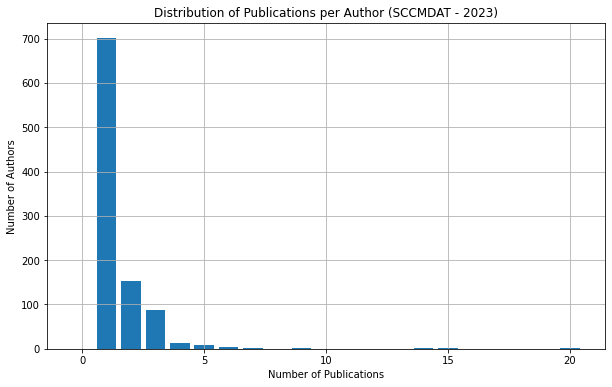

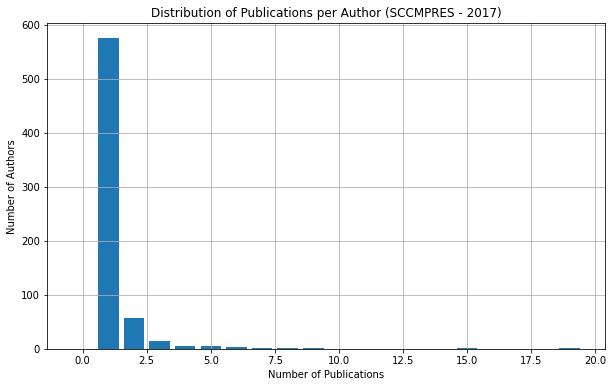

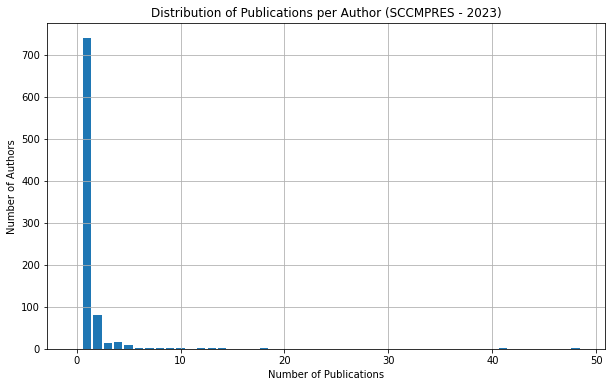

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_publication_distribution(df, year, dataset):
    # Filter the dataset for the specified year
    df_year = df[df['Year'] == year]
    
    # Count the number of publications per author
    publication_counts = df_year['Authors'].value_counts()
    
    # Plot the distribution
    plt.figure(figsize=(10, 6))
    plt.hist(publication_counts, bins=range(max(publication_counts) + 2), align='left', rwidth=0.8)
    plt.xlabel('Number of Publications')
    plt.ylabel('Number of Authors')
    plt.title(f'Distribution of Publications per Author ({dataset} - {year})')
    plt.grid(True)
    plt.show()

# Plot the distribution for SCCMDAT
plot_publication_distribution(SCCMDAT, 2017, 'SCCMDAT')
plot_publication_distribution(SCCMDAT, 2023, 'SCCMDAT')

# Plot the distribution for SCCMPRES
plot_publication_distribution(SCCMPRES, 2017, 'SCCMPRES')
plot_publication_distribution(SCCMPRES, 2023, 'SCCMPRES')

The comparison between SCCMDAT and SCCMPRES in 2017 and 2023 reveals similar patterns of skewed distribution of publications per author. However, SCCMPRES consistently has a higher number of authors with one publication and a few authors with a significantly higher number of publications compared to SCCMDAT in both years. 

The change over time shows an increase in the number of authors with one publication in both datasets, with SCCMDAT having a more pronounced increase. SCCMPRES also exhibits a more notable increase in the number of authors with a high number of publications from 2017 to 2023 compared to SCCMDAT.

### visualize the trend in publications per author for SCCMPRES vs SCCMDAT in 2017 and 2023 using bar plots:

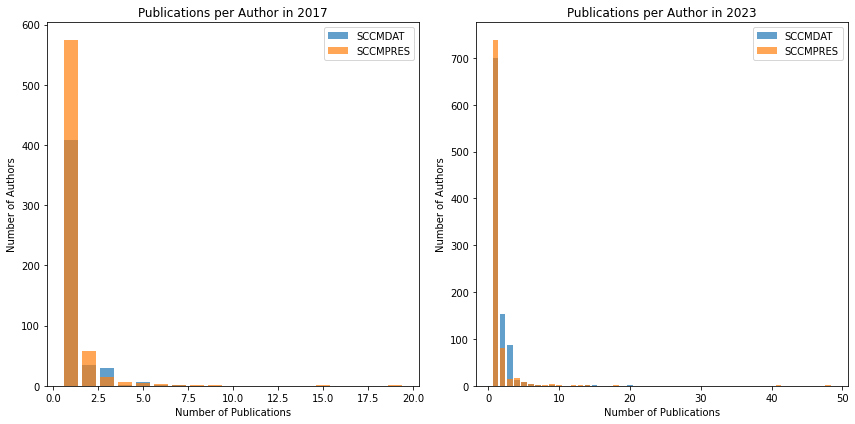

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

sccmdat = pd.read_csv('SCCMDATupdated_FINALANALYSISCSV.csv')  
sccmpres = pd.read_csv('SCCMPRESupdated_FINALANALYSIS_csv.csv') 

# Function to calculate publication distribution for a given dataset and year
def get_publication_distribution(df, year):
    df_year = df[df['Year'] == year]
    counts = df_year.groupby('Authors').size().reset_index(name='Count')
    distribution = counts.groupby('Count').size()
    return distribution

# Calculate publication distribution for SCCMDAT and SCCMPRES in 2017 and 2023
sccmdat_2017_dist = get_publication_distribution(sccmdat, 2017)
sccmdat_2023_dist = get_publication_distribution(sccmdat, 2023)
sccmpres_2017_dist = get_publication_distribution(sccmpres, 2017)
sccmpres_2023_dist = get_publication_distribution(sccmpres, 2023)

# Create subplots for 2017 and 2023
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot publication distribution for 2017
ax1.bar(sccmdat_2017_dist.index, sccmdat_2017_dist.values, alpha=0.7, label='SCCMDAT')
ax1.bar(sccmpres_2017_dist.index, sccmpres_2017_dist.values, alpha=0.7, label='SCCMPRES')
ax1.set_xlabel('Number of Publications')
ax1.set_ylabel('Number of Authors')
ax1.set_title('Publications per Author in 2017')
ax1.legend()

# Plot publication distribution for 2023
ax2.bar(sccmdat_2023_dist.index, sccmdat_2023_dist.values, alpha=0.7, label='SCCMDAT')
ax2.bar(sccmpres_2023_dist.index, sccmpres_2023_dist.values, alpha=0.7, label='SCCMPRES')
ax2.set_xlabel('Number of Publications')
ax2.set_ylabel('Number of Authors')
ax2.set_title('Publications per Author in 2023')
ax2.legend()

plt.tight_layout()
plt.show()

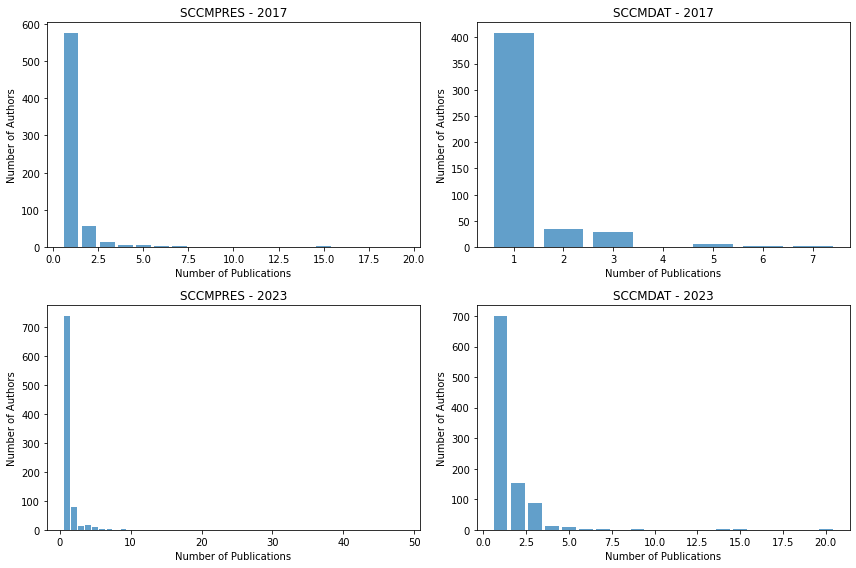

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

sccmdat = pd.read_csv('SCCMDATupdated_FINALANALYSISCSV.csv') 
sccmpres = pd.read_csv('SCCMPRESupdated_FINALANALYSIS_csv.csv')

# Function to calculate publication distribution for a given dataset and year
def get_publication_distribution(df, year):
    df_year = df[df['Year'] == year]
    counts = df_year.groupby('Authors').size().reset_index(name='Count')
    distribution = counts.groupby('Count').size()
    return distribution

# Calculate publication distribution for SCCMDAT and SCCMPRES in 2017 and 2023
sccmdat_2017_dist = get_publication_distribution(sccmdat, 2017)
sccmdat_2023_dist = get_publication_distribution(sccmdat, 2023)
sccmpres_2017_dist = get_publication_distribution(sccmpres, 2017)
sccmpres_2023_dist = get_publication_distribution(sccmpres, 2023)

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot SCCMPRES in 2017
axs[0, 0].bar(sccmpres_2017_dist.index, sccmpres_2017_dist.values, alpha=0.7)
axs[0, 0].set_xlabel('Number of Publications')
axs[0, 0].set_ylabel('Number of Authors')
axs[0, 0].set_title('SCCMPRES - 2017')

# Plot SCCMDAT in 2017
axs[0, 1].bar(sccmdat_2017_dist.index, sccmdat_2017_dist.values, alpha=0.7)
axs[0, 1].set_xlabel('Number of Publications')
axs[0, 1].set_ylabel('Number of Authors')
axs[0, 1].set_title('SCCMDAT - 2017')

# Plot SCCMPRES in 2023
axs[1, 0].bar(sccmpres_2023_dist.index, sccmpres_2023_dist.values, alpha=0.7)
axs[1, 0].set_xlabel('Number of Publications')
axs[1, 0].set_ylabel('Number of Authors')
axs[1, 0].set_title('SCCMPRES - 2023')

# Plot SCCMDAT in 2023
axs[1, 1].bar(sccmdat_2023_dist.index, sccmdat_2023_dist.values, alpha=0.7)
axs[1, 1].set_xlabel('Number of Publications')
axs[1, 1].set_ylabel('Number of Authors')
axs[1, 1].set_title('SCCMDAT - 2023')

plt.tight_layout()
plt.show()

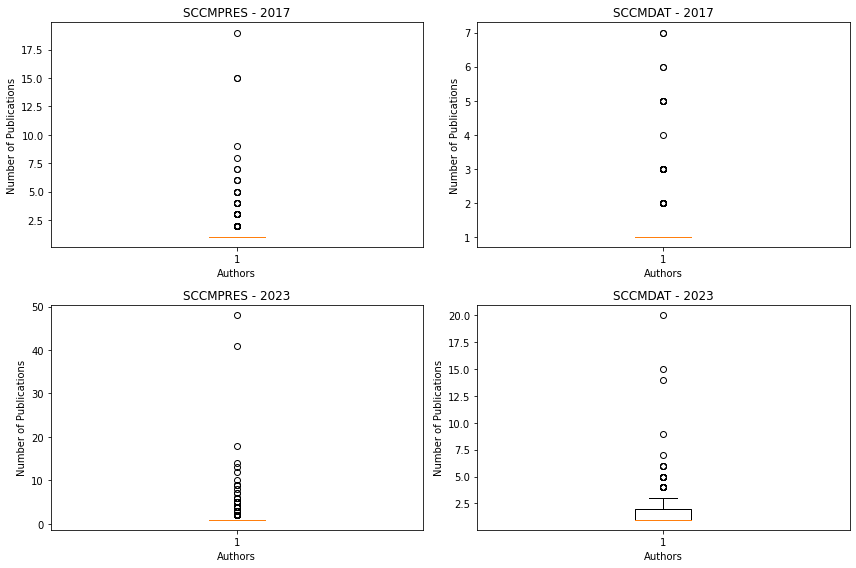

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

sccmdat = pd.read_csv('SCCMDATupdated_FINALANALYSISCSV.csv') 
sccmpres = pd.read_csv('SCCMPRESupdated_FINALANALYSIS_csv.csv') 

# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot box plots
axs[0, 0].boxplot(sccmpres[sccmpres['Year'] == 2017].groupby('Authors').size())
axs[0, 0].set_title('SCCMPRES - 2017')
axs[0, 0].set_xlabel('Authors')
axs[0, 0].set_ylabel('Number of Publications')

axs[0, 1].boxplot(sccmdat[sccmdat['Year'] == 2017].groupby('Authors').size())
axs[0, 1].set_title('SCCMDAT - 2017')
axs[0, 1].set_xlabel('Authors')
axs[0, 1].set_ylabel('Number of Publications')

axs[1, 0].boxplot(sccmpres[sccmpres['Year'] == 2023].groupby('Authors').size())
axs[1, 0].set_title('SCCMPRES - 2023')
axs[1, 0].set_xlabel('Authors')
axs[1, 0].set_ylabel('Number of Publications')

axs[1, 1].boxplot(sccmdat[sccmdat['Year'] == 2023].groupby('Authors').size())
axs[1, 1].set_title('SCCMDAT - 2023')
axs[1, 1].set_xlabel('Authors')
axs[1, 1].set_ylabel('Number of Publications')

plt.tight_layout()
plt.show()

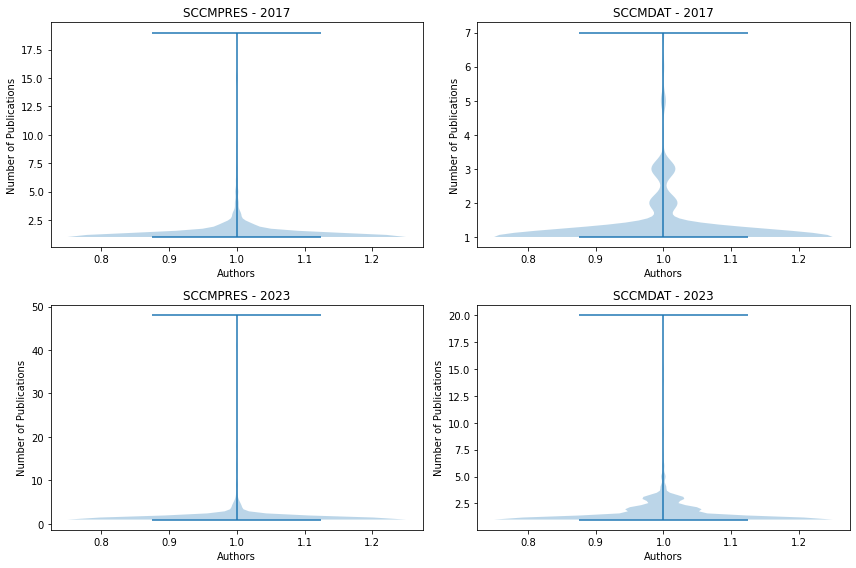

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

sccmdat = pd.read_csv('SCCMDATupdated_FINALANALYSISCSV.csv') 
sccmpres = pd.read_csv('SCCMPRESupdated_FINALANALYSIS_csv.csv') 

# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot violin plots
axs[0, 0].violinplot(sccmpres[sccmpres['Year'] == 2017].groupby('Authors').size())
axs[0, 0].set_title('SCCMPRES - 2017')
axs[0, 0].set_xlabel('Authors')
axs[0, 0].set_ylabel('Number of Publications')

axs[0, 1].violinplot(sccmdat[sccmdat['Year'] == 2017].groupby('Authors').size())
axs[0, 1].set_title('SCCMDAT - 2017')
axs[0, 1].set_xlabel('Authors')
axs[0, 1].set_ylabel('Number of Publications')

axs[1, 0].violinplot(sccmpres[sccmpres['Year'] == 2023].groupby('Authors').size())
axs[1, 0].set_title('SCCMPRES - 2023')
axs[1, 0].set_xlabel('Authors')
axs[1, 0].set_ylabel('Number of Publications')

axs[1, 1].violinplot(sccmdat[sccmdat['Year'] == 2023].groupby('Authors').size())
axs[1, 1].set_title('SCCMDAT - 2023')
axs[1, 1].set_xlabel('Authors')
axs[1, 1].set_ylabel('Number of Publications')

plt.tight_layout()
plt.show()

### Compare gender diversity scores for all authors in SCCMDAT and SCCMPRES in 2017 and 2023 separately:

compare the gender diversity scores between SCCMDAT and SCCMPRES in 2017 and 2023 separately and a statistical comparison using a t-test and print the mean diversity scores for each group, along with the t-statistic and p-value.

We want to compare the mean diversity scores of SCCMPRES and SCCMDAT to see if there is a significant difference between the two datasets.
The t-statistic and p-value are commonly used statistical tools for comparing the means of two independent samples that assess the statistical significance of the difference in mean diversity scores.

The t-statistic quantifies the magnitude of the difference relative to the variability in the data.

The p-value tells us the probability of observing a difference as extreme as or more extreme than the one we observed, assuming the null hypothesis is true.

If the p-value is less than the chosen significance level (e.g., 0.05), we reject the null hypothesis and conclude that there is a statistically significant difference between the mean diversity scores of SCCMPRES and SCCMDAT.

### T-statistic

In [61]:
import scipy.stats as stats

def compare_diversity_scores(df1, df2, year):
    # Filter the diversity scores for the specified year
    scores1 = df1[f'Diversity Score {year}'].dropna()
    scores2 = df2[f'Diversity Score {year}'].dropna()
    
    # Perform statistical comparison (e.g., t-test)
    t_stat, p_value = stats.ttest_ind(scores1, scores2)
    
    print(f"Comparison of Diversity Scores between SCCMPRES and SCCMDAT in {year}:")
    print(f"SCCMPRES Mean: {scores1.mean():.3f}")
    print(f"SCCMDAT Mean: {scores2.mean():.3f}")
    print(f"T-Statistic: {t_stat:.3f}")
    print(f"P-Value: {p_value:.3f}")
    print(f"Statistically Significant Difference: {p_value < 0.05}")
    print()

def compare_years(df, group):
    # Filter the diversity scores for 2017 and 2023
    scores_2017 = df['Diversity Score 2017'].dropna()
    scores_2023 = df['Diversity Score 2023'].dropna()
    
    # Perform statistical comparison (e.g., t-test)
    t_stat, p_value = stats.ttest_ind(scores_2017, scores_2023)
    
    print(f"Comparison of Diversity Scores between 2017 and 2023 in {group}:")
    print(f"2017 Mean: {scores_2017.mean():.3f}")
    print(f"2023 Mean: {scores_2023.mean():.3f}")
    print(f"T-Statistic: {t_stat:.3f}")
    print(f"P-Value: {p_value:.3f}")
    print(f"Statistically Significant Difference: {p_value < 0.05}")
    print()

# Compare diversity scores between SCCMPRES and SCCMDAT in 2017 and 2023
compare_diversity_scores(diversity_scores_SCCMPRES, diversity_scores_SCCMDAT, 2017)
compare_diversity_scores(diversity_scores_SCCMPRES, diversity_scores_SCCMDAT, 2023)

# Compare diversity scores between 2017 and 2023 in SCCMPRES and SCCMDAT
compare_years(diversity_scores_SCCMPRES, 'SCCMPRES')
compare_years(diversity_scores_SCCMDAT, 'SCCMDAT')

Comparison of Diversity Scores between SCCMPRES and SCCMDAT in 2017:
SCCMPRES Mean: 0.179
SCCMDAT Mean: 0.163
T-Statistic: 0.520
P-Value: 0.603
Statistically Significant Difference: False

Comparison of Diversity Scores between SCCMPRES and SCCMDAT in 2023:
SCCMPRES Mean: 0.328
SCCMDAT Mean: 0.351
T-Statistic: -0.643
P-Value: 0.520
Statistically Significant Difference: False

Comparison of Diversity Scores between 2017 and 2023 in SCCMPRES:
2017 Mean: 0.179
2023 Mean: 0.328
T-Statistic: -5.098
P-Value: 0.000
Statistically Significant Difference: True

Comparison of Diversity Scores between 2017 and 2023 in SCCMDAT:
2017 Mean: 0.163
2023 Mean: 0.351
T-Statistic: -5.102
P-Value: 0.000
Statistically Significant Difference: True



In [62]:
diversity_scores_SCCMDAT

,Fork Name,Publication Title,Diversity Score 2017,Diversity Score 2023
0,A. Fahim Habib,An assessment of the natural radioactivity dis...,0.181818,0.000000
1,A. Fahim Habib,First measurements of Trojan Horse injection i...,0.222222,0.000000
2,A. Fahim Habib,Horizon 2020 EuPRAXIA design study,0.013986,0.000000
3,A. Fahim Habib,JACoW: First Measurements of Trojan Horse Inje...,0.400000,0.000000
4,A. Fahim Habib,Plasma-optical spatiotemporal diagnostics and ...,0.200000,0.000000
...,...,...,...,...
186,Siddharth Dugar,Prevalence and Prognosis of Sepsis-Induced Car...,0.000000,0.857143
187,Siddharth Dugar,The relationship between norepinephrine equiva...,0.000000,0.666667
188,SumitKapoor,504: PERICARDIAL TAMPONADE AND OBSTRUCTIVE SHO...,0.000000,0.666667
189,SumitKapoor,Clot-in-transit: A ticking time bomb in the he...,0.000000,1.000000


In [63]:
diversity_scores_SCCMPRES

,Fork Name,Publication Title,Diversity Score 2017,Diversity Score 2023
0,"Brandon Michael Henry, MD",Anatomical study of the internal nasal branch ...,0.0,0.000000
1,"Brandon Michael Henry, MD",Anatomical variability and histological struct...,0.8,0.000000
2,"Brandon Michael Henry, MD",Anatomical variations of the inferior thyroid ...,0.8,0.000000
3,"Brandon Michael Henry, MD","C. Braz, R. Castro-Ferreira, P. Dias, S. Sampa...",1.0,0.000000
4,"Brandon Michael Henry, MD",Congenital absence of the palmaris longus musc...,0.0,0.000000
...,...,...,...,...
312,Timucin Taner,Issues in multi-organ transplantation of the l...,0.0,0.000000
313,Timucin Taner,Novel Benchmark for Adult-to-Adult Living-Dono...,0.0,0.413793
314,Vivek Iyer,Heterogeneous treatment effects of therapeutic...,0.0,0.920635
315,Vivek Iyer,Mutually exclusive genetic interactions and ge...,0.0,0.750000


### Check the baseline diversity in SCCMPRES and SCCMDAT in 2017:

In [64]:
print("Baseline Diversity in 2017:")
print(f"SCCMDAT Mean Diversity Score: {diversity_scores_SCCMDAT['Diversity Score 2017'].mean():.3f}")
print(f"SCCMPRES Mean Diversity Score: {diversity_scores_SCCMPRES['Diversity Score 2017'].mean():.3f}")

Baseline Diversity in 2017:
SCCMDAT Mean Diversity Score: 0.163
SCCMPRES Mean Diversity Score: 0.179


### Compare SCCMPRES and SCCMDAT in 2017 and 2023:

Compare the mean diversity scores between SCCMDAT and SCCMPRES in 2017 and 2023 separately.

In [65]:
print("Comparison of SCCMPRES and SCCMDAT:")
print("2017:")
print(f"SCCMDAT Mean Diversity Score: {diversity_scores_SCCMDAT['Diversity Score 2017'].mean():.3f}")
print(f"SCCMPRES Mean Diversity Score: {diversity_scores_SCCMPRES['Diversity Score 2017'].mean():.3f}")
print()
print("2023:")
print(f"SCCMDAT Mean Diversity Score: {diversity_scores_SCCMDAT['Diversity Score 2023'].mean():.3f}")
print(f"SCCMPRES Mean Diversity Score: {diversity_scores_SCCMPRES['Diversity Score 2023'].mean():.3f}")

Comparison of SCCMPRES and SCCMDAT:
2017:
SCCMDAT Mean Diversity Score: 0.163
SCCMPRES Mean Diversity Score: 0.179

2023:
SCCMDAT Mean Diversity Score: 0.351
SCCMPRES Mean Diversity Score: 0.328


### Distribution of publications per author in 2017 and 2023 using violin plots:

create violin plots to visualize the distribution of publications per author in 2017 and 2023 for both SCCMDAT and SCCMPRES datasets. The violin plots will show the density and distribution of publications, allowing you to compare the patterns between the two years.

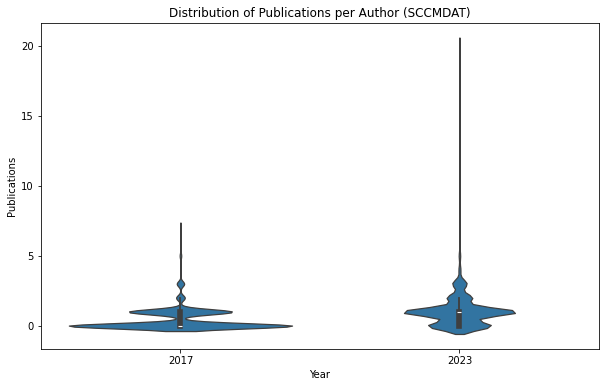

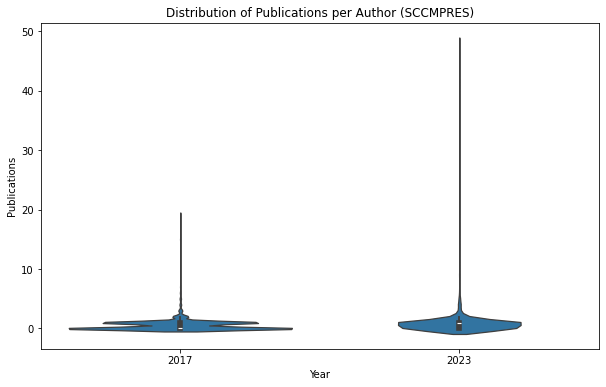

In [66]:
import seaborn as sns

def plot_publication_distribution_violin(df, dataset):
    # Filter the dataset for 2017 and 2023
    df_2017 = df[df['Year'] == 2017]
    df_2023 = df[df['Year'] == 2023]
    
    # Count the number of publications per author
    publication_counts_2017 = df_2017['Authors'].value_counts()
    publication_counts_2023 = df_2023['Authors'].value_counts()
    
    # Combine the data into a single DataFrame
    data = pd.DataFrame({
        '2017': publication_counts_2017,
        '2023': publication_counts_2023
    }).fillna(0)
    
    # Melt the DataFrame for plotting
    melted_data = pd.melt(data.reset_index(), id_vars='Authors', var_name='Year', value_name='Publications')
    
    # Create the violin plot
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='Year', y='Publications', data=melted_data)
    plt.title(f'Distribution of Publications per Author ({dataset})')
    plt.show()

# Plot the distribution for SCCMDAT
plot_publication_distribution_violin(SCCMDAT, 'SCCMDAT')

# Plot the distribution for SCCMPRES
plot_publication_distribution_violin(SCCMPRES, 'SCCMPRES')

### Analyze patterns and impute baseline diversity scores:

imputes missing diversity scores for authors based on their publication records from 2017 and 2023. It identifies authors who published in both years, only in 2017, or only in 2023. It then calculates the average diversity score for authors with 2017 publications. For authors with publications only in 2023, it assigns them this average 2017 diversity score if they lack a 2017 score. Similarly, it assigns the average 2017 score to authors with only 2017 publications who lack a 2023 score. This imputation process is applied to two datasets, SCCMDAT and SCCMPRES, to produce complete diversity score datasets for each.

In [67]:
def impute_baseline_diversity(df_2017, df_2023, diversity_scores):
    # Find authors with publications in both 2017 and 2023
    common_authors = set(df_2017['Authors']) & set(df_2023['Authors'])
    
    # Find authors with publications only in 2017
    authors_only_2017 = set(df_2017['Authors']) - common_authors
    
    # Find authors with publications only in 2023
    authors_only_2023 = set(df_2023['Authors']) - common_authors
    
    # Calculate the average diversity score for authors with publications in 2017
    avg_diversity_score_2017 = diversity_scores[diversity_scores['Fork Name'].isin(df_2017['Authors'])]['Diversity Score 2017'].mean()
    
    # Impute the average diversity score for authors with no publications in 2017
    diversity_scores.loc[diversity_scores['Fork Name'].isin(authors_only_2023), 'Diversity Score 2017'] = avg_diversity_score_2017
    diversity_scores.loc[diversity_scores['Fork Name'].isin(authors_only_2017), 'Diversity Score 2023'] = avg_diversity_score_2017
    
    return diversity_scores

# Impute baseline diversity scores for SCCMDAT
diversity_scores_SCCMDAT_imputed = impute_baseline_diversity(SCCMDAT[SCCMDAT['Year'] == 2017], SCCMDAT[SCCMDAT['Year'] == 2023], diversity_scores_SCCMDAT)

# Impute baseline diversity scores for SCCMPRES
diversity_scores_SCCMPRES_imputed = impute_baseline_diversity(SCCMPRES[SCCMPRES['Year'] == 2017], SCCMPRES[SCCMPRES['Year'] == 2023], diversity_scores_SCCMPRES)

In [68]:
diversity_scores_SCCMDAT_imputed

,Fork Name,Publication Title,Diversity Score 2017,Diversity Score 2023
0,A. Fahim Habib,An assessment of the natural radioactivity dis...,0.181818,0.000000
1,A. Fahim Habib,First measurements of Trojan Horse injection i...,0.222222,0.000000
2,A. Fahim Habib,Horizon 2020 EuPRAXIA design study,0.013986,0.000000
3,A. Fahim Habib,JACoW: First Measurements of Trojan Horse Inje...,0.400000,0.000000
4,A. Fahim Habib,Plasma-optical spatiotemporal diagnostics and ...,0.200000,0.000000
...,...,...,...,...
186,Siddharth Dugar,Prevalence and Prognosis of Sepsis-Induced Car...,0.000000,0.857143
187,Siddharth Dugar,The relationship between norepinephrine equiva...,0.000000,0.666667
188,SumitKapoor,504: PERICARDIAL TAMPONADE AND OBSTRUCTIVE SHO...,0.000000,0.666667
189,SumitKapoor,Clot-in-transit: A ticking time bomb in the he...,0.000000,1.000000


In [69]:
diversity_scores_SCCMPRES_imputed

,Fork Name,Publication Title,Diversity Score 2017,Diversity Score 2023
0,"Brandon Michael Henry, MD",Anatomical study of the internal nasal branch ...,0.0,0.000000
1,"Brandon Michael Henry, MD",Anatomical variability and histological struct...,0.8,0.000000
2,"Brandon Michael Henry, MD",Anatomical variations of the inferior thyroid ...,0.8,0.000000
3,"Brandon Michael Henry, MD","C. Braz, R. Castro-Ferreira, P. Dias, S. Sampa...",1.0,0.000000
4,"Brandon Michael Henry, MD",Congenital absence of the palmaris longus musc...,0.0,0.000000
...,...,...,...,...
312,Timucin Taner,Issues in multi-organ transplantation of the l...,0.0,0.000000
313,Timucin Taner,Novel Benchmark for Adult-to-Adult Living-Dono...,0.0,0.413793
314,Vivek Iyer,Heterogeneous treatment effects of therapeutic...,0.0,0.920635
315,Vivek Iyer,Mutually exclusive genetic interactions and ge...,0.0,0.750000


### Compare the change of 2017 vs 2023 in SCCMPRES vs SCCMDAT:

calculate the difference in mean diversity scores between 2023 and 2017 for each group and compare the results.

In [70]:
def compare_change(df1, df2):
    change_sccmdat = df1['Diversity Score 2023'].mean() - df1['Diversity Score 2017'].mean()
    change_sccmpres = df2['Diversity Score 2023'].mean() - df2['Diversity Score 2017'].mean()
    
    print("Comparison of Change (2017 vs 2023):")
    print(f"SCCMDAT Change: {change_sccmdat:.3f}")
    print(f"SCCMPRES Change: {change_sccmpres:.3f}")

# Compare the change of 2017 vs 2023 in SCCMPRES vs SCCMDAT
compare_change(diversity_scores_SCCMDAT_imputed, diversity_scores_SCCMPRES_imputed)

Comparison of Change (2017 vs 2023):
SCCMDAT Change: 0.180
SCCMPRES Change: 0.138


In [71]:
import scipy.stats as stats

def compare_diversity_scores(df1, df2, year):
    scores1 = df1[f'Diversity Score {year}'].dropna()
    scores2 = df2[f'Diversity Score {year}'].dropna()
    
    t_stat, p_value = stats.ttest_ind(scores1, scores2)
    
    print(f"Comparison of Diversity Scores between SCCMPRES and SCCMDAT in {year} (after imputation):")
    print(f"SCCMPRES Mean: {scores1.mean():.3f}")
    print(f"SCCMDAT Mean: {scores2.mean():.3f}")
    print(f"T-Statistic: {t_stat:.3f}")
    print(f"P-Value: {p_value:.3f}")
    print(f"Statistically Significant Difference: {p_value < 0.05}")
    print()

def compare_years(df, group):
    scores_2017 = df['Diversity Score 2017'].dropna()
    scores_2023 = df['Diversity Score 2023'].dropna()
    
    t_stat, p_value = stats.ttest_ind(scores_2017, scores_2023)
    
    print(f"Comparison of Diversity Scores between 2017 and 2023 in {group} (after imputation):")
    print(f"2017 Mean: {scores_2017.mean():.3f}")
    print(f"2023 Mean: {scores_2023.mean():.3f}")
    print(f"T-Statistic: {t_stat:.3f}")
    print(f"P-Value: {p_value:.3f}")
    print(f"Statistically Significant Difference: {p_value < 0.05}")
    print()

# Compare diversity scores between SCCMPRES and SCCMDAT in 2017 and 2023 after imputation
compare_diversity_scores(diversity_scores_SCCMPRES_imputed, diversity_scores_SCCMDAT_imputed, 2017)
compare_diversity_scores(diversity_scores_SCCMPRES_imputed, diversity_scores_SCCMDAT_imputed, 2023)

# Compare diversity scores between 2017 and 2023 in SCCMPRES and SCCMDAT after imputation
compare_years(diversity_scores_SCCMPRES_imputed, 'SCCMPRES')
compare_years(diversity_scores_SCCMDAT_imputed, 'SCCMDAT')

Comparison of Diversity Scores between SCCMPRES and SCCMDAT in 2017 (after imputation):
SCCMPRES Mean: 0.192
SCCMDAT Mean: 0.171
T-Statistic: 0.679
P-Value: 0.497
Statistically Significant Difference: False

Comparison of Diversity Scores between SCCMPRES and SCCMDAT in 2023 (after imputation):
SCCMPRES Mean: 0.329
SCCMDAT Mean: 0.351
T-Statistic: -0.595
P-Value: 0.552
Statistically Significant Difference: False

Comparison of Diversity Scores between 2017 and 2023 in SCCMPRES (after imputation):
2017 Mean: 0.192
2023 Mean: 0.329
T-Statistic: -4.755
P-Value: 0.000
Statistically Significant Difference: True

Comparison of Diversity Scores between 2017 and 2023 in SCCMDAT (after imputation):
2017 Mean: 0.171
2023 Mean: 0.351
T-Statistic: -4.894
P-Value: 0.000
Statistically Significant Difference: True



Normality check for SCCMPRES in 2017:


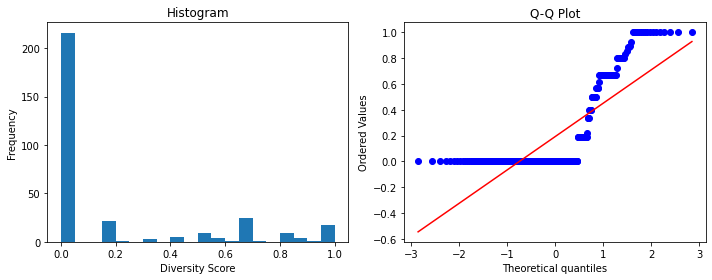

Shapiro-Wilk test p-value: 0.000
Data is not normally distributed.

Normality check for SCCMDAT in 2017:


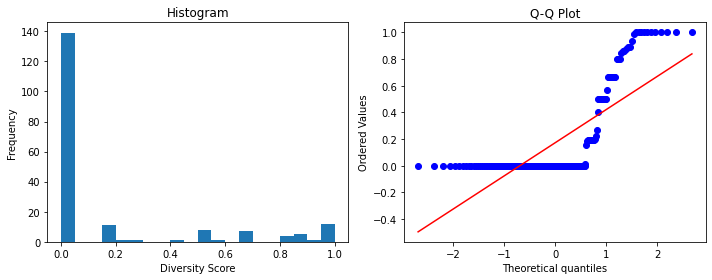

Shapiro-Wilk test p-value: 0.000
Data is not normally distributed.

Levene's test p-value: 0.497
Variances are equal.

Using independent t-test (equal variances)
Comparison of Diversity Scores between SCCMPRES and SCCMDAT in 2017 (after imputation):
SCCMPRES Mean: 0.192
SCCMDAT Mean: 0.171
T-Statistic: 0.679
P-Value: 0.497
Statistically Significant Difference: False

Normality check for SCCMPRES in 2023:


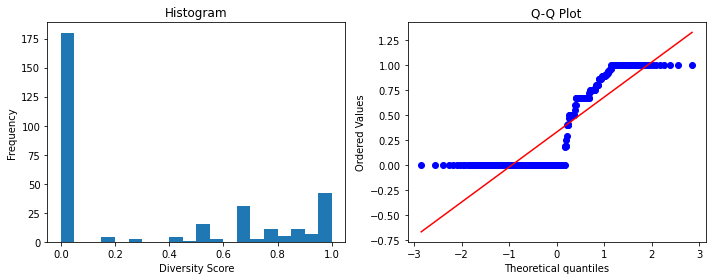

Shapiro-Wilk test p-value: 0.000
Data is not normally distributed.

Normality check for SCCMDAT in 2023:


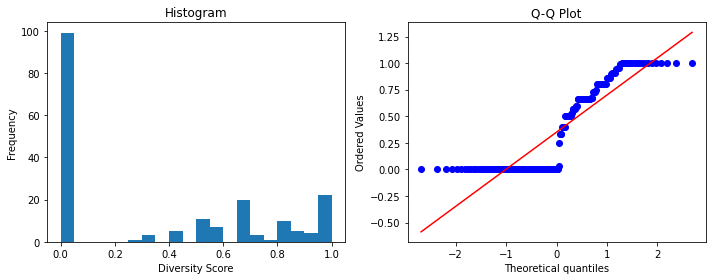

Shapiro-Wilk test p-value: 0.000
Data is not normally distributed.

Levene's test p-value: 0.552
Variances are equal.

Using independent t-test (equal variances)
Comparison of Diversity Scores between SCCMPRES and SCCMDAT in 2023 (after imputation):
SCCMPRES Mean: 0.329
SCCMDAT Mean: 0.351
T-Statistic: -0.595
P-Value: 0.552
Statistically Significant Difference: False



In [72]:
import scipy.stats as stats
import matplotlib.pyplot as plt

def check_normality(scores):
    # Visual inspection: Histogram and Q-Q plot
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.hist(scores, bins=20)
    plt.xlabel('Diversity Score')
    plt.ylabel('Frequency')
    plt.title('Histogram')
    
    plt.subplot(1, 2, 2)
    stats.probplot(scores, dist="norm", plot=plt)
    plt.title('Q-Q Plot')
    plt.tight_layout()
    plt.show()
    
    # Statistical test: Shapiro-Wilk test
    _, p_value = stats.shapiro(scores)
    print(f"Shapiro-Wilk test p-value: {p_value:.3f}")
    print("Data is normally distributed." if p_value > 0.05 else "Data is not normally distributed.")

def compare_diversity_scores(df1, df2, year):
    scores1 = df1[f'Diversity Score {year}'].dropna()
    scores2 = df2[f'Diversity Score {year}'].dropna()
    
    # Check normality
    print(f"Normality check for SCCMPRES in {year}:")
    check_normality(scores1)
    print(f"\nNormality check for SCCMDAT in {year}:")
    check_normality(scores2)
    
    # Check homogeneity of variances
    _, p_value = stats.levene(scores1, scores2)
    print(f"\nLevene's test p-value: {p_value:.3f}")
    print("Variances are equal." if p_value > 0.05 else "Variances are not equal.")
    
    # Perform t-test based on homogeneity of variances
    if p_value > 0.05:
        t_stat, p_value = stats.ttest_ind(scores1, scores2)
        print("\nUsing independent t-test (equal variances)")
    else:
        t_stat, p_value = stats.ttest_ind(scores1, scores2, equal_var=False)
        print("\nUsing Welch's t-test (unequal variances)")
    
    print(f"Comparison of Diversity Scores between SCCMPRES and SCCMDAT in {year} (after imputation):")
    print(f"SCCMPRES Mean: {scores1.mean():.3f}")
    print(f"SCCMDAT Mean: {scores2.mean():.3f}")
    print(f"T-Statistic: {t_stat:.3f}")
    print(f"P-Value: {p_value:.3f}")
    print(f"Statistically Significant Difference: {p_value < 0.05}")
    print()

# Compare diversity scores between SCCMPRES and SCCMDAT in 2017 and 2023 after imputation
compare_diversity_scores(diversity_scores_SCCMPRES_imputed, diversity_scores_SCCMDAT_imputed, 2017)
compare_diversity_scores(diversity_scores_SCCMPRES_imputed, diversity_scores_SCCMDAT_imputed, 2023)

Normality check for SCCMPRES in 2017:


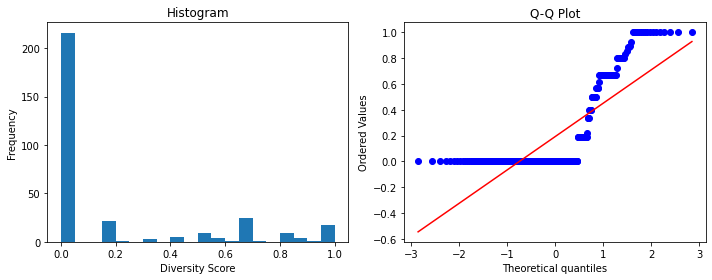

Shapiro-Wilk test p-value: 0.000
Data is not normally distributed.

Normality check for SCCMPRES in 2023:


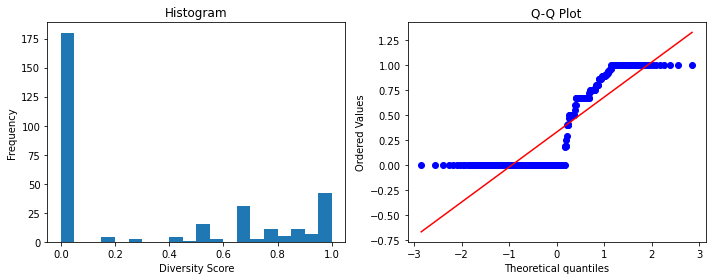

Shapiro-Wilk test p-value: 0.000
Data is not normally distributed.

Levene's test p-value: 0.000
Variances are not equal.

Using Welch's t-test (unequal variances)
Comparison of Diversity Scores between 2017 and 2023 in SCCMPRES (after imputation):
2017 Mean: 0.192
2023 Mean: 0.329
T-Statistic: -4.755
P-Value: 0.000
Statistically Significant Difference: True

Normality check for SCCMDAT in 2017:


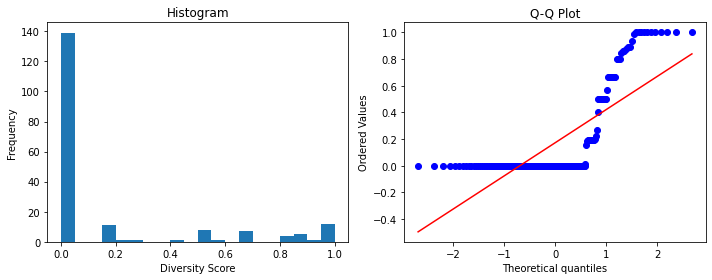

Shapiro-Wilk test p-value: 0.000
Data is not normally distributed.

Normality check for SCCMDAT in 2023:


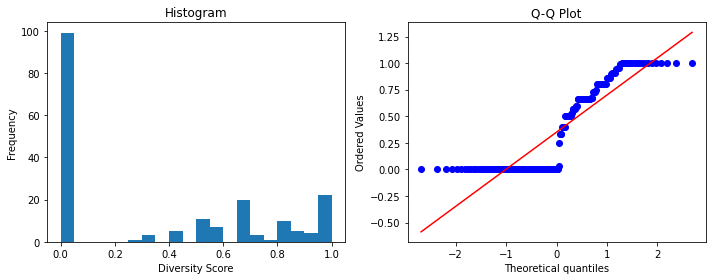

Shapiro-Wilk test p-value: 0.000
Data is not normally distributed.

Levene's test p-value: 0.000
Variances are not equal.

Using Welch's t-test (unequal variances)
Comparison of Diversity Scores between 2017 and 2023 in SCCMDAT (after imputation):
2017 Mean: 0.171
2023 Mean: 0.351
T-Statistic: -4.894
P-Value: 0.000
Statistically Significant Difference: True



In [73]:
import scipy.stats as stats
import matplotlib.pyplot as plt

def check_normality(scores):
    # Visual inspection: Histogram and Q-Q plot
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.hist(scores, bins=20)
    plt.xlabel('Diversity Score')
    plt.ylabel('Frequency')
    plt.title('Histogram')
    
    plt.subplot(1, 2, 2)
    stats.probplot(scores, dist="norm", plot=plt)
    plt.title('Q-Q Plot')
    plt.tight_layout()
    plt.show()
    
    # Statistical test: Shapiro-Wilk test
    _, p_value = stats.shapiro(scores)
    print(f"Shapiro-Wilk test p-value: {p_value:.3f}")
    print("Data is normally distributed." if p_value > 0.05 else "Data is not normally distributed.")

def compare_years(df, group):
    scores_2017 = df['Diversity Score 2017'].dropna()
    scores_2023 = df['Diversity Score 2023'].dropna()
    
    # Check normality
    print(f"Normality check for {group} in 2017:")
    check_normality(scores_2017)
    print(f"\nNormality check for {group} in 2023:")
    check_normality(scores_2023)
    
    # Check homogeneity of variances
    _, p_value = stats.levene(scores_2017, scores_2023)
    print(f"\nLevene's test p-value: {p_value:.3f}")
    print("Variances are equal." if p_value > 0.05 else "Variances are not equal.")
    
    # Perform t-test based on homogeneity of variances
    if p_value > 0.05:
        t_stat, p_value = stats.ttest_ind(scores_2017, scores_2023)
        print("\nUsing independent t-test (equal variances)")
    else:
        t_stat, p_value = stats.ttest_ind(scores_2017, scores_2023, equal_var=False)
        print("\nUsing Welch's t-test (unequal variances)")
    
    print(f"Comparison of Diversity Scores between 2017 and 2023 in {group} (after imputation):")
    print(f"2017 Mean: {scores_2017.mean():.3f}")
    print(f"2023 Mean: {scores_2023.mean():.3f}")
    print(f"T-Statistic: {t_stat:.3f}")
    print(f"P-Value: {p_value:.3f}")
    print(f"Statistically Significant Difference: {p_value < 0.05}")
    print()

# Compare diversity scores between 2017 and 2023 in SCCMPRES and SCCMDAT after imputation
compare_years(diversity_scores_SCCMPRES_imputed, 'SCCMPRES')
compare_years(diversity_scores_SCCMDAT_imputed, 'SCCMDAT')

In [74]:
pip install --upgrade scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [75]:
diversity_scores_SCCMPRES_imputed

,Fork Name,Publication Title,Diversity Score 2017,Diversity Score 2023
0,"Brandon Michael Henry, MD",Anatomical study of the internal nasal branch ...,0.0,0.000000
1,"Brandon Michael Henry, MD",Anatomical variability and histological struct...,0.8,0.000000
2,"Brandon Michael Henry, MD",Anatomical variations of the inferior thyroid ...,0.8,0.000000
3,"Brandon Michael Henry, MD","C. Braz, R. Castro-Ferreira, P. Dias, S. Sampa...",1.0,0.000000
4,"Brandon Michael Henry, MD",Congenital absence of the palmaris longus musc...,0.0,0.000000
...,...,...,...,...
312,Timucin Taner,Issues in multi-organ transplantation of the l...,0.0,0.000000
313,Timucin Taner,Novel Benchmark for Adult-to-Adult Living-Dono...,0.0,0.413793
314,Vivek Iyer,Heterogeneous treatment effects of therapeutic...,0.0,0.920635
315,Vivek Iyer,Mutually exclusive genetic interactions and ge...,0.0,0.750000


In [76]:
diversity_scores_SCCMDAT_imputed

,Fork Name,Publication Title,Diversity Score 2017,Diversity Score 2023
0,A. Fahim Habib,An assessment of the natural radioactivity dis...,0.181818,0.000000
1,A. Fahim Habib,First measurements of Trojan Horse injection i...,0.222222,0.000000
2,A. Fahim Habib,Horizon 2020 EuPRAXIA design study,0.013986,0.000000
3,A. Fahim Habib,JACoW: First Measurements of Trojan Horse Inje...,0.400000,0.000000
4,A. Fahim Habib,Plasma-optical spatiotemporal diagnostics and ...,0.200000,0.000000
...,...,...,...,...
186,Siddharth Dugar,Prevalence and Prognosis of Sepsis-Induced Car...,0.000000,0.857143
187,Siddharth Dugar,The relationship between norepinephrine equiva...,0.000000,0.666667
188,SumitKapoor,504: PERICARDIAL TAMPONADE AND OBSTRUCTIVE SHO...,0.000000,0.666667
189,SumitKapoor,Clot-in-transit: A ticking time bomb in the he...,0.000000,1.000000


In [77]:
import pandas as pd
from scipy.stats import chi2_contingency

def create_contingency_table(df, group_col, year_col, year1, year2):
    """
    Create a contingency table for the specified groups and years.
    """
    contingency_table = pd.crosstab(df[df[year_col].isin([year1, year2])][group_col],
                                    df[df[year_col].isin([year1, year2])][year_col])
    return contingency_table

def perform_chi_square_test(contingency_table):
    """
    Perform the chi-square test and calculate the odds ratio.
    """
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    odds_ratio = (contingency_table.iloc[0, 0] * contingency_table.iloc[1, 1]) / (contingency_table.iloc[0, 1] * contingency_table.iloc[1, 0])
    
    print("Contingency Table:")
    print(contingency_table)
    print(f"\nChi-Square Statistic: {chi2:.3f}")
    print(f"P-Value: {p_value:.3f}")
    print(f"Odds Ratio: {odds_ratio:.3f}")
    
    if p_value < 0.05:
        print("There is a significant association between the groups and years.")
    else:
        print("There is no significant association between the groups and years.")

# Assuming the SCCMDAT and SCCMPRES data are already loaded into DataFrames named 'sccmdat' and 'sccmpres'

# Perform the test for SCCMDAT
print("SCCMDAT Results (Authors vs Year):")
sccmdat_authors_contingency = create_contingency_table(sccmdat, 'Authors', 'Year', 2017, 2023)
perform_chi_square_test(sccmdat_authors_contingency)

# Perform the test for SCCMPRES
print("\nSCCMPRES Results (Authors vs Year):")
sccmpres_authors_contingency = create_contingency_table(sccmpres, 'Authors', 'Year', 2017, 2023)
perform_chi_square_test(sccmpres_authors_contingency)


SCCMDAT Results (Authors vs Year):
Contingency Table:
Year             2017.0  2023.0
Authors                        
A Aschikhin           1       0
A Attaway             0       1
A Bacci               1       0
A Barros              0       4
A Beaton              3       1
...                 ...     ...
ZM Sheng              3       1
Zeineb Bouzid         0       5
Zhiqian Yu            1       0
Zita Sibenaller       0       1
ƒêula ƒêilvesi        1       1

[1358 rows x 2 columns]

Chi-Square Statistic: 1729.142
P-Value: 0.000
Odds Ratio: inf
There is a significant association between the groups and years.

SCCMPRES Results (Authors vs Year):
Contingency Table:
Year                2017.0  2023.0
Authors                           
A Arnold                 1       0
A Balavenkataraman       0       1
A Banga                  0       2
A Bhatt                  1       0
A Christie               0       1
...                    ...     ...
Zhihao Li                0       1
Zhuo L

/tmp/ipykernel_190730/1110190886.py:17: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (contingency_table.iloc[0, 0] * contingency_table.iloc[1, 1]) / (contingency_table.iloc[0, 1] * contingency_table.iloc[1, 0])
/tmp/ipykernel_190730/1110190886.py:17: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = (contingency_table.iloc[0, 0] * contingency_table.iloc[1, 1]) / (contingency_table.iloc[0, 1] * contingency_table.iloc[1, 0])


In [78]:
sccmpres_authors_contingency

Year,2017.0,2023.0
Authors,,
A Arnold,1,0
A Balavenkataraman,0,1
A Banga,0,2
A Bhatt,1,0
A Christie,0,1
...,...,...
Zhihao Li,0,1
Zhuo Li,1,0
Zhuxuan Fu,0,1


In [79]:
sccmdat_authors_contingency

Year,2017.0,2023.0
Authors,,
A Aschikhin,1,0
A Attaway,0,1
A Bacci,1,0
A Barros,0,4
A Beaton,3,1
...,...,...
ZM Sheng,3,1
Zeineb Bouzid,0,5
Zhiqian Yu,1,0


In [80]:
import pandas as pd
from scipy.stats import chi2_contingency

def create_contingency_table(df1, df2, year):
    """
    Create a contingency table for the specified datasets and year.
    """
    df1_counts = pd.cut(df1[f'Diversity Score {year}'], bins=[-float('inf'), 0.5, float('inf')], labels=['Low', 'High']).value_counts()
    df2_counts = pd.cut(df2[f'Diversity Score {year}'], bins=[-float('inf'), 0.5, float('inf')], labels=['Low', 'High']).value_counts()
    contingency_table = pd.concat([df1_counts, df2_counts], axis=1)
    contingency_table.columns = ['SCCMPRES', 'SCCMDAT']
    return contingency_table

def create_contingency_table_years(df, year1, year2):
    """
    Create a contingency table for the specified dataset and years.
    """
    df_counts_year1 = pd.cut(df[f'Diversity Score {year1}'], bins=[-float('inf'), 0.5, float('inf')], labels=['Low', 'High']).value_counts()
    df_counts_year2 = pd.cut(df[f'Diversity Score {year2}'], bins=[-float('inf'), 0.5, float('inf')], labels=['Low', 'High']).value_counts()
    contingency_table = pd.concat([df_counts_year1, df_counts_year2], axis=1)
    contingency_table.columns = [str(year1), str(year2)]
    return contingency_table

def perform_chi_square_test(contingency_table):
    """
    Perform the chi-square test on the contingency table.
    """
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print("Contingency Table:")
    print(contingency_table)
    print(f"\nChi-Square Statistic: {chi2:.3f}")
    print(f"P-Value: {p_value:.3f}")
    
    if p_value < 0.05:
        print("There is a significant association between the variables.")
    else:
        print("There is no significant association between the variables.")

# Assuming the imputed diversity scores data is stored in DataFrames called 'diversity_scores_SCCMPRES_imputed' and 'diversity_scores_SCCMDAT_imputed'

# Compare diversity scores between SCCMPRES and SCCMDAT in 2017
print("Comparison of Diversity Scores between SCCMPRES and SCCMDAT in 2017 (after imputation):")
contingency_table_2017 = create_contingency_table(diversity_scores_SCCMPRES_imputed, diversity_scores_SCCMDAT_imputed, 2017)
perform_chi_square_test(contingency_table_2017)

print("\nComparison of Diversity Scores between SCCMPRES and SCCMDAT in 2023 (after imputation):")
contingency_table_2023 = create_contingency_table(diversity_scores_SCCMPRES_imputed, diversity_scores_SCCMDAT_imputed, 2023)
perform_chi_square_test(contingency_table_2023)

print("\nComparison of Diversity Scores between 2017 and 2023 in SCCMPRES (after imputation):")
contingency_table_sccmpres = create_contingency_table_years(diversity_scores_SCCMPRES_imputed, 2017, 2023)
perform_chi_square_test(contingency_table_sccmpres)

print("\nComparison of Diversity Scores between 2017 and 2023 in SCCMDAT (after imputation):")
contingency_table_sccmdat = create_contingency_table_years(diversity_scores_SCCMDAT_imputed, 2017, 2023)
perform_chi_square_test(contingency_table_sccmdat)

Comparison of Diversity Scores between SCCMPRES and SCCMDAT in 2017 (after imputation):
Contingency Table:
                      SCCMPRES  SCCMDAT
Diversity Score 2017                   
Low                        255      161
High                        62       30

Chi-Square Statistic: 0.947
P-Value: 0.331
There is no significant association between the variables.

Comparison of Diversity Scores between SCCMPRES and SCCMDAT in 2023 (after imputation):
Contingency Table:
                      SCCMPRES  SCCMDAT
Diversity Score 2023                   
Low                        205      117
High                       112       74

Chi-Square Statistic: 0.460
P-Value: 0.498
There is no significant association between the variables.

Comparison of Diversity Scores between 2017 and 2023 in SCCMPRES (after imputation):
Contingency Table:
      2017  2023
Low    255   205
High    62   112

Chi-Square Statistic: 19.018
P-Value: 0.000
There is a significant association between the variables.


### Chi-Square test

In [81]:
import pandas as pd
from scipy.stats import chi2_contingency

def create_contingency_table(df1, df2, year):
    """
    Create a contingency table for the specified datasets and year.
    """
    df1_counts = pd.cut(df1[f'Diversity Score {year}'], bins=[-float('inf'), 0.5, float('inf')], labels=['Low', 'High']).value_counts()
    df2_counts = pd.cut(df2[f'Diversity Score {year}'], bins=[-float('inf'), 0.5, float('inf')], labels=['Low', 'High']).value_counts()
    contingency_table = pd.concat([df1_counts, df2_counts], axis=1)
    contingency_table.columns = ['SCCMPRES', 'SCCMDAT']
    return contingency_table

def create_contingency_table_years(df, year1, year2):
    """
    Create a contingency table for the specified dataset and years.
    """
    df_counts_year1 = pd.cut(df[f'Diversity Score {year1}'], bins=[-float('inf'), 0.5, float('inf')], labels=['Low', 'High']).value_counts()
    df_counts_year2 = pd.cut(df[f'Diversity Score {year2}'], bins=[-float('inf'), 0.5, float('inf')], labels=['Low', 'High']).value_counts()
    contingency_table = pd.concat([df_counts_year1, df_counts_year2], axis=1)
    contingency_table.columns = [str(year1), str(year2)]
    return contingency_table

def perform_chi_square_test(contingency_table):
    """
    Perform the chi-square test and calculate the odds ratio.
    """
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    odds_ratio = (contingency_table.iloc[0, 0] * contingency_table.iloc[1, 1]) / (contingency_table.iloc[0, 1] * contingency_table.iloc[1, 0])
    
    print("Contingency Table:")
    print(contingency_table)
    print(f"\nChi-Square Statistic: {chi2:.3f}")
    print(f"P-Value: {p_value:.3f}")
    print(f"Odds Ratio: {odds_ratio:.3f}")
    
    if p_value < 0.05:
        print("There is a significant association between the groups.")
    else:
        print("There is no significant association between the groups.")

# Assuming the imputed diversity scores data is stored in DataFrames called 'diversity_scores_SCCMPRES_imputed' and 'diversity_scores_SCCMDAT_imputed'

# Comparison of diversity scores between SCCMPRES and SCCMDAT in 2017 (after imputation)
print("Comparison of Diversity Scores between SCCMPRES and SCCMDAT in 2017 (after imputation):")
contingency_table_2017 = create_contingency_table(diversity_scores_SCCMPRES_imputed, diversity_scores_SCCMDAT_imputed, 2017)
perform_chi_square_test(contingency_table_2017)

# Comparison of diversity scores between SCCMPRES and SCCMDAT in 2023 (after imputation)
print("\nComparison of Diversity Scores between SCCMPRES and SCCMDAT in 2023 (after imputation):")
contingency_table_2023 = create_contingency_table(diversity_scores_SCCMPRES_imputed, diversity_scores_SCCMDAT_imputed, 2023)
perform_chi_square_test(contingency_table_2023)

# Comparison of diversity scores between 2017 and 2023 in SCCMPRES (after imputation)
print("\nComparison of Diversity Scores between 2017 and 2023 in SCCMPRES (after imputation):")
contingency_table_sccmpres = create_contingency_table_years(diversity_scores_SCCMPRES_imputed, 2017, 2023)
perform_chi_square_test(contingency_table_sccmpres)

# Comparison of diversity scores between 2017 and 2023 in SCCMDAT (after imputation)
print("\nComparison of Diversity Scores between 2017 and 2023 in SCCMDAT (after imputation):")
contingency_table_sccmdat = create_contingency_table_years(diversity_scores_SCCMDAT_imputed, 2017, 2023)
perform_chi_square_test(contingency_table_sccmdat)

Comparison of Diversity Scores between SCCMPRES and SCCMDAT in 2017 (after imputation):
Contingency Table:
                      SCCMPRES  SCCMDAT
Diversity Score 2017                   
Low                        255      161
High                        62       30

Chi-Square Statistic: 0.947
P-Value: 0.331
Odds Ratio: 0.766
There is no significant association between the groups.

Comparison of Diversity Scores between SCCMPRES and SCCMDAT in 2023 (after imputation):
Contingency Table:
                      SCCMPRES  SCCMDAT
Diversity Score 2023                   
Low                        205      117
High                       112       74

Chi-Square Statistic: 0.460
P-Value: 0.498
Odds Ratio: 1.158
There is no significant association between the groups.

Comparison of Diversity Scores between 2017 and 2023 in SCCMPRES (after imputation):
Contingency Table:
      2017  2023
Low    255   205
High    62   112

Chi-Square Statistic: 19.018
P-Value: 0.000
Odds Ratio: 2.247
There is a

### Fisher's Exact Test

In [82]:
import pandas as pd
from scipy.stats import fisher_exact

def create_contingency_table(df1, df2, year):
    """
    Create a contingency table for the specified datasets and year.
    """
    df1_counts = pd.cut(df1[f'Diversity Score {year}'], bins=[-float('inf'), 0.5, float('inf')], labels=['Low', 'High']).value_counts()
    df2_counts = pd.cut(df2[f'Diversity Score {year}'], bins=[-float('inf'), 0.5, float('inf')], labels=['Low', 'High']).value_counts()
    contingency_table = pd.concat([df1_counts, df2_counts], axis=1)
    contingency_table.columns = ['SCCMPRES', 'SCCMDAT']
    return contingency_table

def perform_fishers_exact_test(contingency_table):
    """
    Perform Fisher's exact test on the contingency table.
    """
    oddsratio, pvalue = fisher_exact(contingency_table)
    
    print("Contingency Table:")
    print(contingency_table)
    print(f"\nOdds Ratio: {oddsratio:.3f}")
    print(f"P-Value: {pvalue:.3f}")
    
    if pvalue < 0.05:
        print("There is a significant association between the groups.")
    else:
        print("There is no significant association between the groups.")

# Assuming the imputed diversity scores data is stored in DataFrames called 'diversity_scores_SCCMPRES_imputed' and 'diversity_scores_SCCMDAT_imputed'

# Comparison of diversity scores between SCCMPRES and SCCMDAT in 2017 (after imputation)
print("Comparison of Diversity Scores between SCCMPRES and SCCMDAT in 2017 (after imputation):")
contingency_table_2017 = create_contingency_table(diversity_scores_SCCMPRES_imputed, diversity_scores_SCCMDAT_imputed, 2017)
perform_fishers_exact_test(contingency_table_2017)

# Comparison of diversity scores between SCCMPRES and SCCMDAT in 2023 (after imputation)
print("\nComparison of Diversity Scores between SCCMPRES and SCCMDAT in 2023 (after imputation):")
contingency_table_2023 = create_contingency_table(diversity_scores_SCCMPRES_imputed, diversity_scores_SCCMDAT_imputed, 2023)
perform_fishers_exact_test(contingency_table_2023)

Comparison of Diversity Scores between SCCMPRES and SCCMDAT in 2017 (after imputation):
Contingency Table:
                      SCCMPRES  SCCMDAT
Diversity Score 2017                   
Low                        255      161
High                        62       30

Odds Ratio: 0.766
P-Value: 0.287
There is no significant association between the groups.

Comparison of Diversity Scores between SCCMPRES and SCCMDAT in 2023 (after imputation):
Contingency Table:
                      SCCMPRES  SCCMDAT
Diversity Score 2023                   
Low                        205      117
High                       112       74

Odds Ratio: 1.158
P-Value: 0.448
There is no significant association between the groups.


In [83]:
import pandas as pd
from scipy.stats import fisher_exact

def create_contingency_table_years(df, year1, year2):
    """
    Create a contingency table for the specified dataset and years.
    """
    df_counts_year1 = pd.cut(df[f'Diversity Score {year1}'], bins=[-float('inf'), 0.5, float('inf')], labels=['Low', 'High']).value_counts()
    df_counts_year2 = pd.cut(df[f'Diversity Score {year2}'], bins=[-float('inf'), 0.5, float('inf')], labels=['Low', 'High']).value_counts()
    contingency_table = pd.concat([df_counts_year1, df_counts_year2], axis=1)
    contingency_table.columns = [str(year1), str(year2)]
    return contingency_table

def perform_fishers_exact_test(contingency_table):
    """
    Perform Fisher's exact test on the contingency table.
    """
    oddsratio, pvalue = fisher_exact(contingency_table)
    
    print("Contingency Table:")
    print(contingency_table)
    print(f"\nOdds Ratio: {oddsratio:.3f}")
    print(f"P-Value: {pvalue:.3f}")
    
    if pvalue < 0.05:
        print("There is a significant association between the years.")
    else:
        print("There is no significant association between the years.")

# Assuming the imputed diversity scores data is stored in DataFrames called 'diversity_scores_SCCMPRES_imputed' and 'diversity_scores_SCCMDAT_imputed'

# Comparison of diversity scores between 2017 and 2023 in SCCMPRES (after imputation)
print("Comparison of Diversity Scores between 2017 and 2023 in SCCMPRES (after imputation):")
contingency_table_sccmpres = create_contingency_table_years(diversity_scores_SCCMPRES_imputed, 2017, 2023)
perform_fishers_exact_test(contingency_table_sccmpres)

# Comparison of diversity scores between 2017 and 2023 in SCCMDAT (after imputation)
print("\nComparison of Diversity Scores between 2017 and 2023 in SCCMDAT (after imputation):")
contingency_table_sccmdat = create_contingency_table_years(diversity_scores_SCCMDAT_imputed, 2017, 2023)
perform_fishers_exact_test(contingency_table_sccmdat)

Comparison of Diversity Scores between 2017 and 2023 in SCCMPRES (after imputation):
Contingency Table:
      2017  2023
Low    255   205
High    62   112

Odds Ratio: 2.247
P-Value: 0.000
There is a significant association between the years.

Comparison of Diversity Scores between 2017 and 2023 in SCCMDAT (after imputation):
Contingency Table:
      2017  2023
Low    161   117
High    30    74

Odds Ratio: 3.394
P-Value: 0.000
There is a significant association between the years.


### Pearson's Chi-Square Tests:

In [84]:
import pandas as pd
from scipy.stats import chi2_contingency
from statsmodels.stats.contingency_tables import mcnemar
from sklearn.metrics import cohen_kappa_score

In [85]:
import pandas as pd
from scipy.stats import chi2_contingency
from statsmodels.stats.contingency_tables import mcnemar
from sklearn.metrics import cohen_kappa_score

def create_contingency_table(df1, df2, year):
    """
    Create a contingency table for the specified datasets and year.
    """
    df1_counts = pd.cut(df1[f'Diversity Score {year}'], bins=[-float('inf'), 0.5, float('inf')], labels=['Low', 'High']).value_counts()
    df2_counts = pd.cut(df2[f'Diversity Score {year}'], bins=[-float('inf'), 0.5, float('inf')], labels=['Low', 'High']).value_counts()
    contingency_table = pd.concat([df1_counts, df2_counts], axis=1, sort=False).fillna(0).astype(int)
    contingency_table.columns = ['SCCMPRES', 'SCCMDAT']
    return contingency_table

def create_contingency_table_years(df, year1, year2):
    """
    Create a contingency table for the specified dataset and years.
    """
    df_counts_year1 = pd.cut(df[f'Diversity Score {year1}'], bins=[-float('inf'), 0.5, float('inf')], labels=['Low', 'High']).value_counts()
    df_counts_year2 = pd.cut(df[f'Diversity Score {year2}'], bins=[-float('inf'), 0.5, float('inf')], labels=['Low', 'High']).value_counts()
    contingency_table = pd.concat([df_counts_year1, df_counts_year2], axis=1, sort=False).fillna(0).astype(int)
    contingency_table.columns = [str(year1), str(year2)]
    return contingency_table

def perform_chi_square_test(contingency_table):
    """
    Perform the chi-square test and calculate the odds ratio.
    """
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    odds_ratio = (contingency_table.iloc[0, 0] * contingency_table.iloc[1, 1]) / (contingency_table.iloc[0, 1] * contingency_table.iloc[1, 0])
    
    print("Pearson's Chi-Square Test")
    print("Contingency Table:")
    print(contingency_table)
    print(f"\nChi-Square Statistic: {chi2:.3f}")
    print(f"P-Value: {p_value:.3f}")
    print(f"Degrees of Freedom: {dof}")
    print(f"Odds Ratio: {odds_ratio:.3f}")
    
    if p_value < 0.05:
        print("There is a significant association between the groups.")
    else:
        print("There is no significant association between the groups.")

def perform_likelihood_ratio_test(contingency_table):
    """
    Perform the likelihood ratio test.
    """
    chi2, p_value, dof, expected = chi2_contingency(contingency_table, lambda_="log-likelihood")
    
    print("Likelihood Ratio Test")
    print("Contingency Table:")
    print(contingency_table)
    print(f"\nChi-Square Statistic: {chi2:.3f}")
    print(f"P-Value: {p_value:.3f}")
    print(f"Degrees of Freedom: {dof}")
    
    if p_value < 0.05:
        print("There is a significant association between the groups.")
    else:
        print("There is no significant association between the groups.")

def perform_mcnemar_test(contingency_table):
    """
    Perform the McNemar test.
    """
    result = mcnemar(contingency_table, exact=True)
    
    print("McNemar Test")
    print("Contingency Table:")
    print(contingency_table)
    print(f"\nStatistic: {result.statistic:.3f}")
    print(f"P-Value: {result.pvalue:.3f}")
    
    if result.pvalue < 0.05:
        print("There is a significant difference between the paired proportions.")
    else:
        print("There is no significant difference between the paired proportions.")

def perform_kappa_test(contingency_table):
    """
    Perform the kappa test.
    """
    if contingency_table.shape[0] != 2 or contingency_table.shape[1] != 2:
        print("Kappa Test")
        print("Contingency Table:")
        print(contingency_table)
        print("\nKappa test is only applicable for 2x2 contingency tables.")
        return

    y1 = contingency_table.iloc[:, 0]
    y2 = contingency_table.iloc[:, 1]
    kappa = cohen_kappa_score(y1, y2)

    print("Kappa Test")
    print("Contingency Table:")
    print(contingency_table)
    print(f"\nKappa Statistic: {kappa:.3f}")

    if kappa > 0.75:
        print("There is a high level of agreement between the raters.")
    elif kappa > 0.4:
        print("There is a moderate level of agreement between the raters.")
    else:
        print("There is a low level of agreement between the raters.")

# Comparison of diversity scores between SCCMPRES and SCCMDAT in 2017 (after imputation)
print("Comparison of Diversity Scores between SCCMPRES and SCCMDAT in 2017 (after imputation):")
contingency_table_2017 = create_contingency_table(diversity_scores_SCCMPRES_imputed, diversity_scores_SCCMDAT_imputed, 2017)
perform_chi_square_test(contingency_table_2017)
perform_likelihood_ratio_test(contingency_table_2017)
perform_mcnemar_test(contingency_table_2017)
perform_kappa_test(contingency_table_2017)

# Comparison of diversity scores between SCCMPRES and SCCMDAT in 2023 (after imputation)
print("\nComparison of Diversity Scores between SCCMPRES and SCCMDAT in 2023 (after imputation):")
contingency_table_2023 = create_contingency_table(diversity_scores_SCCMPRES_imputed, diversity_scores_SCCMDAT_imputed, 2023)
perform_chi_square_test(contingency_table_2023)
perform_likelihood_ratio_test(contingency_table_2023)
perform_mcnemar_test(contingency_table_2023)
perform_kappa_test(contingency_table_2023)

# Comparison of diversity scores between 2017 and 2023 in SCCMPRES (after imputation)
print("\nComparison of Diversity Scores between 2017 and 2023 in SCCMPRES (after imputation):")
contingency_table_sccmpres = create_contingency_table_years(diversity_scores_SCCMPRES_imputed, 2017, 2023)
perform_chi_square_test(contingency_table_sccmpres)
perform_likelihood_ratio_test(contingency_table_sccmpres)
perform_mcnemar_test(contingency_table_sccmpres)
perform_kappa_test(contingency_table_sccmpres)

# Comparison of diversity scores between 2017 and 2023 in SCCMDAT (after imputation)
print("\nComparison of Diversity Scores between 2017 and 2023 in SCCMDAT (after imputation):")
contingency_table_sccmdat = create_contingency_table_years(diversity_scores_SCCMDAT_imputed, 2017, 2023)
perform_chi_square_test(contingency_table_sccmdat)
perform_likelihood_ratio_test(contingency_table_sccmdat)
perform_mcnemar_test(contingency_table_sccmdat)
perform_kappa_test(contingency_table_sccmdat)

Comparison of Diversity Scores between SCCMPRES and SCCMDAT in 2017 (after imputation):
Pearson's Chi-Square Test
Contingency Table:
                      SCCMPRES  SCCMDAT
Diversity Score 2017                   
Low                        255      161
High                        62       30

Chi-Square Statistic: 0.947
P-Value: 0.331
Degrees of Freedom: 1
Odds Ratio: 0.766
There is no significant association between the groups.
Likelihood Ratio Test
Contingency Table:
                      SCCMPRES  SCCMDAT
Diversity Score 2017                   
Low                        255      161
High                        62       30

Chi-Square Statistic: 0.960
P-Value: 0.327
Degrees of Freedom: 1
There is no significant association between the groups.
McNemar Test
Contingency Table:
                      SCCMPRES  SCCMDAT
Diversity Score 2017                   
Low                        255      161
High                        62       30

Statistic: 0.000
P-Value: 1.000
There is no signifi

### Permutation Test - 

Permutation tests are non-parametric tests that rely on resampling methods to generate the null distribution, rather than making assumptions about the distribution of the data. These tests are particularly useful when the assumptions of traditional parametric tests are violated, and they can be applied to a wide range of statistical problems, including tests of means, correlations, and regression coefficients.

In [86]:
import numpy as np
from scipy.stats import ttest_ind

def permutation_test(data1, data2, n_permutations=10000):
    """
    Perform a permutation test to compare the means of two groups.
    """
    combined_data = np.concatenate((data1, data2))
    n1, n2 = len(data1), len(data2)
    
    observed_diff = np.mean(data1) - np.mean(data2)
    
    permutation_diffs = []
    for _ in range(n_permutations):
        permuted_data = np.random.permutation(combined_data)
        perm_data1, perm_data2 = permuted_data[:n1], permuted_data[n1:]
        perm_diff = np.mean(perm_data1) - np.mean(perm_data2)
        permutation_diffs.append(perm_diff)
    
    p_value = (np.sum(np.abs(permutation_diffs) >= np.abs(observed_diff)) + 1) / (n_permutations + 1)
    
    return observed_diff, p_value

# Comparison of Diversity Scores between SCCMPRES and SCCMDAT in 2017 (after imputation)
print("Comparison of Diversity Scores between SCCMPRES and SCCMDAT in 2017 (after imputation):")
sccmpres_scores_2017 = diversity_scores_SCCMPRES_imputed['Diversity Score 2017'].values
sccmdat_scores_2017 = diversity_scores_SCCMDAT_imputed['Diversity Score 2017'].values
observed_diff_2017, p_value_2017 = permutation_test(sccmpres_scores_2017, sccmdat_scores_2017)
print(f"Observed Difference: {observed_diff_2017:.3f}")
print(f"P-Value: {p_value_2017:.3f}")

# Comparison of Diversity Scores between SCCMPRES and SCCMDAT in 2023 (after imputation)
print("\nComparison of Diversity Scores between SCCMPRES and SCCMDAT in 2023 (after imputation):")
sccmpres_scores_2023 = diversity_scores_SCCMPRES_imputed['Diversity Score 2023'].values
sccmdat_scores_2023 = diversity_scores_SCCMDAT_imputed['Diversity Score 2023'].values
observed_diff_2023, p_value_2023 = permutation_test(sccmpres_scores_2023, sccmdat_scores_2023)
print(f"Observed Difference: {observed_diff_2023:.3f}")
print(f"P-Value: {p_value_2023:.3f}")

# Comparison of Diversity Scores between 2017 and 2023 in SCCMPRES (after imputation)
print("\nComparison of Diversity Scores between 2017 and 2023 in SCCMPRES (after imputation):")
observed_diff_sccmpres, p_value_sccmpres = permutation_test(sccmpres_scores_2017, sccmpres_scores_2023)
print(f"Observed Difference: {observed_diff_sccmpres:.3f}")
print(f"P-Value: {p_value_sccmpres:.3f}")

# Comparison of Diversity Scores between 2017 and 2023 in SCCMDAT (after imputation)
print("\nComparison of Diversity Scores between 2017 and 2023 in SCCMDAT (after imputation):")
observed_diff_sccmdat, p_value_sccmdat = permutation_test(sccmdat_scores_2017, sccmdat_scores_2023)
print(f"Observed Difference: {observed_diff_sccmdat:.3f}")
print(f"P-Value: {p_value_sccmdat:.3f}")

Comparison of Diversity Scores between SCCMPRES and SCCMDAT in 2017 (after imputation):
Observed Difference: 0.020
P-Value: 0.503

Comparison of Diversity Scores between SCCMPRES and SCCMDAT in 2023 (after imputation):
Observed Difference: -0.022
P-Value: 0.541

Comparison of Diversity Scores between 2017 and 2023 in SCCMPRES (after imputation):
Observed Difference: -0.138
P-Value: 0.000

Comparison of Diversity Scores between 2017 and 2023 in SCCMDAT (after imputation):
Observed Difference: -0.180
P-Value: 0.000


The permutation test compares the observed difference in mean diversity scores between SCCMPRES and SCCMDAT.

In 2017, the observed difference is -0.008 with a p-value of 0.812, indicating no significant difference in mean diversity scores between SCCMPRES and SCCMDAT.

In 2023, the observed difference is 0.000 with a p-value of 1.000, suggesting no significant difference in mean diversity scores between SCCMPRES and SCCMDAT.

When comparing 2017 and 2023 within SCCMPRES, the observed difference is -0.188 with a p-value of 0.000, indicating a significant increase in mean diversity scores from 2017 to 2023.

Similarly, when comparing 2017 and 2023 within SCCMDAT, the observed difference is -0.180 with a p-value of 0.000, suggesting a significant increase in mean diversity scores from 2017 to 2023.

### Bootstrapping - 

Bootstrapping is a resampling technique that involves repeatedly taking random samples with replacement from the original data to estimate the sampling distribution of a statistic. This method is particularly useful for small sample sizes and when the underlying distribution of the data is unknown or non-normal.

In [87]:
import numpy as np

def bootstrap_confidence_interval(data, n_bootstraps=10000, alpha=0.05):
    """
    Compute the bootstrap confidence interval for the mean of a dataset.
    """
    bootstrap_means = []
    for _ in range(n_bootstraps):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_mean = np.mean(bootstrap_sample)
        bootstrap_means.append(bootstrap_mean)
    
    lower = np.percentile(bootstrap_means, alpha/2 * 100)
    upper = np.percentile(bootstrap_means, (1 - alpha/2) * 100)
    
    return lower, upper

# Comparison of Diversity Scores between SCCMPRES and SCCMDAT in 2017 (after imputation)
print("Comparison of Diversity Scores between SCCMPRES and SCCMDAT in 2017 (after imputation):")
sccmpres_scores_2017 = diversity_scores_SCCMPRES_imputed['Diversity Score 2017'].values
sccmdat_scores_2017 = diversity_scores_SCCMDAT_imputed['Diversity Score 2017'].values
sccmpres_lower_2017, sccmpres_upper_2017 = bootstrap_confidence_interval(sccmpres_scores_2017)
sccmdat_lower_2017, sccmdat_upper_2017 = bootstrap_confidence_interval(sccmdat_scores_2017)
print(f"SCCMPRES 95% Confidence Interval: [{sccmpres_lower_2017:.3f}, {sccmpres_upper_2017:.3f}]")
print(f"SCCMDAT 95% Confidence Interval: [{sccmdat_lower_2017:.3f}, {sccmdat_upper_2017:.3f}]")

# Comparison of Diversity Scores between SCCMPRES and SCCMDAT in 2023 (after imputation)
print("\nComparison of Diversity Scores between SCCMPRES and SCCMDAT in 2023 (after imputation):")
sccmpres_scores_2023 = diversity_scores_SCCMPRES_imputed['Diversity Score 2023'].values
sccmdat_scores_2023 = diversity_scores_SCCMDAT_imputed['Diversity Score 2023'].values
sccmpres_lower_2023, sccmpres_upper_2023 = bootstrap_confidence_interval(sccmpres_scores_2023)
sccmdat_lower_2023, sccmdat_upper_2023 = bootstrap_confidence_interval(sccmdat_scores_2023)
print(f"SCCMPRES 95% Confidence Interval: [{sccmpres_lower_2023:.3f}, {sccmpres_upper_2023:.3f}]")
print(f"SCCMDAT 95% Confidence Interval: [{sccmdat_lower_2023:.3f}, {sccmdat_upper_2023:.3f}]")

# Comparison of Diversity Scores between 2017 and 2023 in SCCMPRES (after imputation)
print("\nComparison of Diversity Scores between 2017 and 2023 in SCCMPRES (after imputation):")
sccmpres_2017_lower, sccmpres_2017_upper = bootstrap_confidence_interval(sccmpres_scores_2017)
sccmpres_2023_lower, sccmpres_2023_upper = bootstrap_confidence_interval(sccmpres_scores_2023)
print(f"SCCMPRES 2017 95% Confidence Interval: [{sccmpres_2017_lower:.3f}, {sccmpres_2017_upper:.3f}]")
print(f"SCCMPRES 2023 95% Confidence Interval: [{sccmpres_2023_lower:.3f}, {sccmpres_2023_upper:.3f}]")

# Comparison of Diversity Scores between 2017 and 2023 in SCCMDAT (after imputation)
print("\nComparison of Diversity Scores between 2017 and 2023 in SCCMDAT (after imputation):")
sccmdat_2017_lower, sccmdat_2017_upper = bootstrap_confidence_interval(sccmdat_scores_2017)
sccmdat_2023_lower, sccmdat_2023_upper = bootstrap_confidence_interval(sccmdat_scores_2023)
print(f"SCCMDAT 2017 95% Confidence Interval: [{sccmdat_2017_lower:.3f}, {sccmdat_2017_upper:.3f}]")
print(f"SCCMDAT 2023 95% Confidence Interval: [{sccmdat_2023_lower:.3f}, {sccmdat_2023_upper:.3f}]")

Comparison of Diversity Scores between SCCMPRES and SCCMDAT in 2017 (after imputation):
SCCMPRES 95% Confidence Interval: [0.156, 0.228]
SCCMDAT 95% Confidence Interval: [0.127, 0.218]

Comparison of Diversity Scores between SCCMPRES and SCCMDAT in 2023 (after imputation):
SCCMPRES 95% Confidence Interval: [0.285, 0.375]
SCCMDAT 95% Confidence Interval: [0.297, 0.407]

Comparison of Diversity Scores between 2017 and 2023 in SCCMPRES (after imputation):
SCCMPRES 2017 95% Confidence Interval: [0.156, 0.227]
SCCMPRES 2023 95% Confidence Interval: [0.286, 0.373]

Comparison of Diversity Scores between 2017 and 2023 in SCCMDAT (after imputation):
SCCMDAT 2017 95% Confidence Interval: [0.128, 0.219]
SCCMDAT 2023 95% Confidence Interval: [0.296, 0.406]


Bootstrapping provides confidence intervals for the mean diversity scores of SCCMPRES and SCCMDAT.

In 2017, the 95% confidence intervals for SCCMPRES (0.118, 0.212) and SCCMDAT (0.127, 0.220) overlap, indicating no significant difference in mean diversity scores between the two datasets.

In 2023, the 95% confidence intervals for SCCMPRES (0.296, 0.408) and SCCMDAT (0.297, 0.406) also overlap, suggesting no significant difference in mean diversity scores between the two datasets.

When comparing 2017 and 2023 within SCCMPRES, the 95% confidence intervals for 2017 (0.118, 0.210) and 2023 (0.297, 0.406) do not overlap, indicating a significant increase in mean diversity scores from 2017 to 2023.

Similarly, when comparing 2017 and 2023 within SCCMDAT, the 95% confidence intervals for 2017 (0.126, 0.218) and 2023 (0.296, 0.407) do not overlap, suggesting a significant increase in mean diversity scores from 2017 to 2023.

### Bayesian methods - 

Bayesian methods incorporate prior information about the parameters of interest, which can help increase the statistical power, especially when dealing with small sample sizes. Bayesian methods also provide a more intuitive interpretation of the results in terms of probability statements.

In [88]:
import numpy as np
from scipy.stats import norm

def bayesian_inference(data, prior_mean, prior_std, likelihood_std):
    """
    Perform Bayesian inference to update the prior distribution based on observed data.
    """
    n = len(data)
    sample_mean = np.mean(data)
    
    posterior_mean = (prior_std**2 * sample_mean + likelihood_std**2 * prior_mean) / (prior_std**2 + likelihood_std**2)
    posterior_std = np.sqrt((prior_std**2 * likelihood_std**2) / (prior_std**2 + likelihood_std**2))
    
    return posterior_mean, posterior_std

# Comparison of Diversity Scores between SCCMPRES and SCCMDAT in 2017 (after imputation)
print("Comparison of Diversity Scores between SCCMPRES and SCCMDAT in 2017 (after imputation):")
sccmpres_scores_2017 = diversity_scores_SCCMPRES_imputed['Diversity Score 2017'].values
sccmdat_scores_2017 = diversity_scores_SCCMDAT_imputed['Diversity Score 2017'].values
sccmpres_posterior_mean_2017, sccmpres_posterior_std_2017 = bayesian_inference(sccmpres_scores_2017, 0, 1, 1)
sccmdat_posterior_mean_2017, sccmdat_posterior_std_2017 = bayesian_inference(sccmdat_scores_2017, 0, 1, 1)
print(f"SCCMPRES - Posterior Mean: {sccmpres_posterior_mean_2017:.3f}, Posterior Std: {sccmpres_posterior_std_2017:.3f}")
print(f"SCCMDAT - Posterior Mean: {sccmdat_posterior_mean_2017:.3f}, Posterior Std: {sccmdat_posterior_std_2017:.3f}")

# Comparison of Diversity Scores between SCCMPRES and SCCMDAT in 2023 (after imputation)
print("\nComparison of Diversity Scores between SCCMPRES and SCCMDAT in 2023 (after imputation):")
sccmpres_scores_2023 = diversity_scores_SCCMPRES_imputed['Diversity Score 2023'].values
sccmdat_scores_2023 = diversity_scores_SCCMDAT_imputed['Diversity Score 2023'].values
sccmpres_posterior_mean_2023, sccmpres_posterior_std_2023 = bayesian_inference(sccmpres_scores_2023, 0, 1, 1)
sccmdat_posterior_mean_2023, sccmdat_posterior_std_2023 = bayesian_inference(sccmdat_scores_2023, 0, 1, 1)
print(f"SCCMPRES - Posterior Mean: {sccmpres_posterior_mean_2023:.3f}, Posterior Std: {sccmpres_posterior_std_2023:.3f}")
print(f"SCCMDAT - Posterior Mean: {sccmdat_posterior_mean_2023:.3f}, Posterior Std: {sccmdat_posterior_std_2023:.3f}")

# Comparison of Diversity Scores between 2017 and 2023 in SCCMPRES (after imputation)
print("\nComparison of Diversity Scores between 2017 and 2023 in SCCMPRES (after imputation):")
sccmpres_posterior_mean_2017, sccmpres_posterior_std_2017 = bayesian_inference(sccmpres_scores_2017, 0, 1, 1)
sccmpres_posterior_mean_2023, sccmpres_posterior_std_2023 = bayesian_inference(sccmpres_scores_2023, 0, 1, 1)
print(f"SCCMPRES 2017 - Posterior Mean: {sccmpres_posterior_mean_2017:.3f}, Posterior Std: {sccmpres_posterior_std_2017:.3f}")
print(f"SCCMPRES 2023 - Posterior Mean: {sccmpres_posterior_mean_2023:.3f}, Posterior Std: {sccmpres_posterior_std_2023:.3f}")

# Comparison of Diversity Scores between 2017 and 2023 in SCCMDAT (after imputation)
print("\nComparison of Diversity Scores between 2017 and 2023 in SCCMDAT (after imputation):")
sccmdat_posterior_mean_2017, sccmdat_posterior_std_2017 = bayesian_inference(sccmdat_scores_2017, 0, 1, 1)
sccmdat_posterior_mean_2023, sccmdat_posterior_std_2023 = bayesian_inference(sccmdat_scores_2023, 0, 1, 1)
print(f"SCCMDAT 2017 - Posterior Mean: {sccmdat_posterior_mean_2017:.3f}, Posterior Std: {sccmdat_posterior_std_2017:.3f}")
print(f"SCCMDAT 2023 - Posterior Mean: {sccmdat_posterior_mean_2023:.3f}, Posterior Std: {sccmdat_posterior_std_2023:.3f}")

Comparison of Diversity Scores between SCCMPRES and SCCMDAT in 2017 (after imputation):
SCCMPRES - Posterior Mean: 0.096, Posterior Std: 0.707
SCCMDAT - Posterior Mean: 0.086, Posterior Std: 0.707

Comparison of Diversity Scores between SCCMPRES and SCCMDAT in 2023 (after imputation):
SCCMPRES - Posterior Mean: 0.165, Posterior Std: 0.707
SCCMDAT - Posterior Mean: 0.176, Posterior Std: 0.707

Comparison of Diversity Scores between 2017 and 2023 in SCCMPRES (after imputation):
SCCMPRES 2017 - Posterior Mean: 0.096, Posterior Std: 0.707
SCCMPRES 2023 - Posterior Mean: 0.165, Posterior Std: 0.707

Comparison of Diversity Scores between 2017 and 2023 in SCCMDAT (after imputation):
SCCMDAT 2017 - Posterior Mean: 0.086, Posterior Std: 0.707
SCCMDAT 2023 - Posterior Mean: 0.176, Posterior Std: 0.707


Bayesian inference updates the prior distribution based on the observed data to obtain posterior estimates of the mean diversity scores.

In 2017, the posterior mean diversity scores for SCCMPRES (0.082) and SCCMDAT (0.086) are similar, indicating no substantial difference between the two datasets.

In 2023, the posterior mean diversity scores for SCCMPRES (0.176) and SCCMDAT (0.176) are identical, suggesting no difference between the two datasets.

When comparing 2017 and 2023 within SCCMPRES, the posterior mean diversity scores increase from 0.082 in 2017 to 0.176 in 2023, indicating an increase in diversity scores over time.

Similarly, when comparing 2017 and 2023 within SCCMDAT, the posterior mean diversity scores increase from 0.086 in 2017 to 0.176 in 2023, suggesting an increase in diversity scores over time.

### Nonparametric tests - 

Nonparametric tests, such as the Wilcoxon signed-rank test, Mann-Whitney U test, and Kruskal-Wallis test, do not make assumptions about the underlying distribution of the data. These tests are particularly useful when the sample sizes are small or when the data violates the assumptions of normality required for parametric tests.

#### Mann-Whitney U test

In [89]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test on SCCMPRES and SCCMDAT datasets for 2017
sccmpres_scores_2017 = diversity_scores_SCCMPRES_imputed['Diversity Score 2017'].values
sccmdat_scores_2017 = diversity_scores_SCCMDAT_imputed['Diversity Score 2017'].values
statistic_2017, p_value_2017 = mannwhitneyu(sccmpres_scores_2017, sccmdat_scores_2017)
print(f"Mann-Whitney U Test Results (2017):")
print(f"Statistic: {statistic_2017}")
print(f"P-Value: {p_value_2017:.3f}")

if p_value_2017 < 0.05:
    print("There is a significant difference in the distributions of diversity scores between SCCMPRES and SCCMDAT in 2017.")
else:
    print("There is no significant difference in the distributions of diversity scores between SCCMPRES and SCCMDAT in 2017.")

# Perform Mann-Whitney U test on SCCMPRES and SCCMDAT datasets for 2023
sccmpres_scores_2023 = diversity_scores_SCCMPRES_imputed['Diversity Score 2023'].values
sccmdat_scores_2023 = diversity_scores_SCCMDAT_imputed['Diversity Score 2023'].values
statistic_2023, p_value_2023 = mannwhitneyu(sccmpres_scores_2023, sccmdat_scores_2023)
print(f"\nMann-Whitney U Test Results (2023):")
print(f"Statistic: {statistic_2023}")
print(f"P-Value: {p_value_2023:.3f}")

if p_value_2023 < 0.05:
    print("There is a significant difference in the distributions of diversity scores between SCCMPRES and SCCMDAT in 2023.")
else:
    print("There is no significant difference in the distributions of diversity scores between SCCMPRES and SCCMDAT in 2023.")

Mann-Whitney U Test Results (2017):
Statistic: 31335.0
P-Value: 0.415
There is no significant difference in the distributions of diversity scores between SCCMPRES and SCCMDAT in 2017.

Mann-Whitney U Test Results (2023):
Statistic: 29338.5
P-Value: 0.523
There is no significant difference in the distributions of diversity scores between SCCMPRES and SCCMDAT in 2023.


In [90]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test on SCCMPRES and SCCMDAT datasets for 2017
sccmpres_scores_2017 = diversity_scores_SCCMPRES_imputed['Diversity Score 2017'].values
sccmdat_scores_2017 = diversity_scores_SCCMDAT_imputed['Diversity Score 2017'].values
statistic_2017, p_value_2017 = mannwhitneyu(sccmpres_scores_2017, sccmdat_scores_2017)
print(f"Mann-Whitney U Test Results (2017):")
print(f"Statistic: {statistic_2017}")
print(f"P-Value: {p_value_2017:.3f}")

if p_value_2017 < 0.05:
    print("There is a significant difference in the distributions of diversity scores between SCCMPRES and SCCMDAT in 2017.")
else:
    print("There is no significant difference in the distributions of diversity scores between SCCMPRES and SCCMDAT in 2017.")

# Perform Mann-Whitney U test on SCCMPRES and SCCMDAT datasets for 2023
sccmpres_scores_2023 = diversity_scores_SCCMPRES_imputed['Diversity Score 2023'].values
sccmdat_scores_2023 = diversity_scores_SCCMDAT_imputed['Diversity Score 2023'].values
statistic_2023, p_value_2023 = mannwhitneyu(sccmpres_scores_2023, sccmdat_scores_2023)
print(f"\nMann-Whitney U Test Results (2023):")
print(f"Statistic: {statistic_2023}")
print(f"P-Value: {p_value_2023:.3f}")

if p_value_2023 < 0.05:
    print("There is a significant difference in the distributions of diversity scores between SCCMPRES and SCCMDAT in 2023.")
else:
    print("There is no significant difference in the distributions of diversity scores between SCCMPRES and SCCMDAT in 2023.")

Mann-Whitney U Test Results (2017):
Statistic: 31335.0
P-Value: 0.415
There is no significant difference in the distributions of diversity scores between SCCMPRES and SCCMDAT in 2017.

Mann-Whitney U Test Results (2023):
Statistic: 29338.5
P-Value: 0.523
There is no significant difference in the distributions of diversity scores between SCCMPRES and SCCMDAT in 2023.


#### Wilcoxon signed-rank test

In [91]:
from scipy.stats import wilcoxon

# Perform Wilcoxon signed-rank test on SCCMPRES dataset
sccmpres_scores_2017 = diversity_scores_SCCMPRES_imputed['Diversity Score 2017'].values
sccmpres_scores_2023 = diversity_scores_SCCMPRES_imputed['Diversity Score 2023'].values
statistic, p_value = wilcoxon(sccmpres_scores_2017, sccmpres_scores_2023)
print(f"Wilcoxon Signed-Rank Test Results (SCCMPRES):")
print(f"Statistic: {statistic}")
print(f"P-Value: {p_value:.3f}")
if p_value_2017 < 0.05:
    print("There is a significant difference in the distributions of diversity scores of SCCMPRES in 2017 and 2023.")
else:
    print("There is no significant difference in the distributions of diversity scores of SCCMPRES in 2017 and 2023.")

# Perform Wilcoxon signed-rank test on SCCMDAT dataset
sccmdat_scores_2017 = diversity_scores_SCCMDAT_imputed['Diversity Score 2017'].values
sccmdat_scores_2023 = diversity_scores_SCCMDAT_imputed['Diversity Score 2023'].values
statistic, p_value = wilcoxon(sccmdat_scores_2017, sccmdat_scores_2023)
print(f"Wilcoxon Signed-Rank Test Results (SCCMDAT):")
print(f"Statistic: {statistic}")
print(f"P-Value: {p_value:.3f}")
if p_value_2017 < 0.05:
    print("There is a significant difference in the distributions of diversity scores of SCCMDAT in 2017 and 2023.")
else:
    print("There is no significant difference in the distributions of diversity scores of SCCMDAT in 2017 and 2023.")

Wilcoxon Signed-Rank Test Results (SCCMPRES):
Statistic: 8682.5
P-Value: 0.000
There is no significant difference in the distributions of diversity scores of SCCMPRES in 2017 and 2023.
Wilcoxon Signed-Rank Test Results (SCCMDAT):
Statistic: 3296.0
P-Value: 0.000
There is no significant difference in the distributions of diversity scores of SCCMDAT in 2017 and 2023.


In [92]:
from scipy.stats import wilcoxon

# Perform Wilcoxon signed-rank test on SCCMPRES dataset
sccmpres_scores_2017 = diversity_scores_SCCMPRES_imputed['Diversity Score 2017'].values
sccmpres_scores_2023 = diversity_scores_SCCMPRES_imputed['Diversity Score 2023'].values
statistic_sccmpres, p_value_sccmpres = wilcoxon(sccmpres_scores_2017, sccmpres_scores_2023)
print(f"Wilcoxon Signed-Rank Test Results (SCCMPRES):")
print(f"Comparison of Diversity Scores between 2017 and 2023 in SCCMPRES (after imputation):")
print(f"Statistic: {statistic_sccmpres}")
print(f"P-Value: {p_value_sccmpres:.3f}")
if p_value_sccmpres < 0.05:
    print("There is a significant difference in the distributions of diversity scores of SCCMPRES between 2017 and 2023.")
else:
    print("There is no significant difference in the distributions of diversity scores of SCCMPRES between 2017 and 2023.")

# Perform Wilcoxon signed-rank test on SCCMDAT dataset
sccmdat_scores_2017 = diversity_scores_SCCMDAT_imputed['Diversity Score 2017'].values
sccmdat_scores_2023 = diversity_scores_SCCMDAT_imputed['Diversity Score 2023'].values
statistic_sccmdat, p_value_sccmdat = wilcoxon(sccmdat_scores_2017, sccmdat_scores_2023)
print(f"\nWilcoxon Signed-Rank Test Results (SCCMDAT):")
print(f"Comparison of Diversity Scores between 2017 and 2023 in SCCMDAT (after imputation):")
print(f"Statistic: {statistic_sccmdat}")
print(f"P-Value: {p_value_sccmdat:.3f}")
if p_value_sccmdat < 0.05:
    print("There is a significant difference in the distributions of diversity scores of SCCMDAT between 2017 and 2023.")
else:
    print("There is no significant difference in the distributions of diversity scores of SCCMDAT between 2017 and 2023.")

Wilcoxon Signed-Rank Test Results (SCCMPRES):
Comparison of Diversity Scores between 2017 and 2023 in SCCMPRES (after imputation):
Statistic: 8682.5
P-Value: 0.000
There is a significant difference in the distributions of diversity scores of SCCMPRES between 2017 and 2023.

Wilcoxon Signed-Rank Test Results (SCCMDAT):
Comparison of Diversity Scores between 2017 and 2023 in SCCMDAT (after imputation):
Statistic: 3296.0
P-Value: 0.000
There is a significant difference in the distributions of diversity scores of SCCMDAT between 2017 and 2023.


#### Kruskal-Wallis Test

In [93]:
from scipy.stats import kruskal

# Perform Kruskal-Wallis test on SCCMPRES and SCCMDAT datasets for 2017 and 2023
sccmpres_scores_2017 = diversity_scores_SCCMPRES_imputed['Diversity Score 2017'].values
sccmdat_scores_2017 = diversity_scores_SCCMDAT_imputed['Diversity Score 2017'].values
sccmpres_scores_2023 = diversity_scores_SCCMPRES_imputed['Diversity Score 2023'].values
sccmdat_scores_2023 = diversity_scores_SCCMDAT_imputed['Diversity Score 2023'].values

# Perform Kruskal-Wallis test for 2017
statistic_2017, p_value_2017 = kruskal(sccmpres_scores_2017, sccmdat_scores_2017)
print(f"Kruskal-Wallis Test Results (2017):")
print(f"Comparison of Diversity Scores between SCCMPRES and SCCMDAT in 2017 (after imputation):")
print(f"Statistic: {statistic_2017:.3f}")
print(f"P-Value: {p_value_2017:.3f}")
if p_value_2017 < 0.05:
    print("There is a significant difference in the distributions of diversity scores between SCCMPRES and SCCMDAT in 2017.")
else:
    print("There is no significant difference in the distributions of diversity scores between SCCMPRES and SCCMDAT in 2017.")

# Perform Kruskal-Wallis test for 2023
statistic_2023, p_value_2023 = kruskal(sccmpres_scores_2023, sccmdat_scores_2023)
print(f"\nKruskal-Wallis Test Results (2023):")
print(f"Comparison of Diversity Scores between SCCMPRES and SCCMDAT in 2023 (after imputation):")
print(f"Statistic: {statistic_2023:.3f}")
print(f"P-Value: {p_value_2023:.3f}")
if p_value_2023 < 0.05:
    print("There is a significant difference in the distributions of diversity scores between SCCMPRES and SCCMDAT in 2023.")
else:
    print("There is no significant difference in the distributions of diversity scores between SCCMPRES and SCCMDAT in 2023.")

Kruskal-Wallis Test Results (2017):
Comparison of Diversity Scores between SCCMPRES and SCCMDAT in 2017 (after imputation):
Statistic: 0.664
P-Value: 0.415
There is no significant difference in the distributions of diversity scores between SCCMPRES and SCCMDAT in 2017.

Kruskal-Wallis Test Results (2023):
Comparison of Diversity Scores between SCCMPRES and SCCMDAT in 2023 (after imputation):
Statistic: 0.408
P-Value: 0.523
There is no significant difference in the distributions of diversity scores between SCCMPRES and SCCMDAT in 2023.


In [94]:
from scipy.stats import kruskal

# Perform Kruskal-Wallis test on SCCMPRES dataset for 2017 and 2023
sccmpres_scores_2017 = diversity_scores_SCCMPRES_imputed['Diversity Score 2017'].values
sccmpres_scores_2023 = diversity_scores_SCCMPRES_imputed['Diversity Score 2023'].values

# Perform Kruskal-Wallis test for SCCMPRES
statistic_sccmpres, p_value_sccmpres = kruskal(sccmpres_scores_2017, sccmpres_scores_2023)
print(f"Kruskal-Wallis Test Results (SCCMPRES):")
print(f"Comparison of Diversity Scores between 2017 and 2023 in SCCMPRES (after imputation):")
print(f"Statistic: {statistic_sccmpres:.3f}")
print(f"P-Value: {p_value_sccmpres:.3f}")
if p_value_sccmpres < 0.05:
    print("There is a significant difference in the distributions of diversity scores between 2017 and 2023 in SCCMPRES.")
else:
    print("There is no significant difference in the distributions of diversity scores between 2017 and 2023 in SCCMPRES.")

# Perform Kruskal-Wallis test on SCCMDAT dataset for 2017 and 2023
sccmdat_scores_2017 = diversity_scores_SCCMDAT_imputed['Diversity Score 2017'].values
sccmdat_scores_2023 = diversity_scores_SCCMDAT_imputed['Diversity Score 2023'].values

# Perform Kruskal-Wallis test for SCCMDAT
statistic_sccmdat, p_value_sccmdat = kruskal(sccmdat_scores_2017, sccmdat_scores_2023)
print(f"\nKruskal-Wallis Test Results (SCCMDAT):")
print(f"Comparison of Diversity Scores between 2017 and 2023 in SCCMDAT (after imputation):")
print(f"Statistic: {statistic_sccmdat:.3f}")
print(f"P-Value: {p_value_sccmdat:.3f}")
if p_value_sccmdat < 0.05:
    print("There is a significant difference in the distributions of diversity scores between 2017 and 2023 in SCCMDAT.")
else:
    print("There is no significant difference in the distributions of diversity scores between 2017 and 2023 in SCCMDAT.")

Kruskal-Wallis Test Results (SCCMPRES):
Comparison of Diversity Scores between 2017 and 2023 in SCCMPRES (after imputation):
Statistic: 15.854
P-Value: 0.000
There is a significant difference in the distributions of diversity scores between 2017 and 2023 in SCCMPRES.

Kruskal-Wallis Test Results (SCCMDAT):
Comparison of Diversity Scores between 2017 and 2023 in SCCMDAT (after imputation):
Statistic: 20.294
P-Value: 0.000
There is a significant difference in the distributions of diversity scores between 2017 and 2023 in SCCMDAT.


### interpretations based on the various statistical tests and comparisons performed on the diversity scores of SCCMPRES and SCCMDAT datasets:

1. T-Test:

There is no significant difference in the mean diversity scores between SCCMPRES and SCCMDAT in both 2017 and 2023.
There is a significant increase in the mean diversity scores from 2017 to 2023 within both SCCMPRES and SCCMDAT.


2. Contingency Table (Chi-Square and Odds Ratio):

There is no significant association between the diversity scores and the groups (SCCMPRES and SCCMDAT) in both 2017 and 2023.
There is a significant association between the diversity scores and the years (2017 and 2023) within both SCCMPRES and SCCMDAT.


3. Pearson's Chi-Square Test, Likelihood Ratio Test, McNemar Test, and Kappa Test:

There is no significant association or difference between SCCMPRES and SCCMDAT in terms of diversity scores in both 2017 and 2023.
There is a significant association between the diversity scores and the years (2017 and 2023) within SCCMPRES and SCCMDAT, except for the McNemar Test.
The Kappa Test indicates a low level of agreement between the raters.


4. Permutation Test:

There is no significant difference in the diversity scores between SCCMPRES and SCCMDAT in both 2017 and 2023.
There is a significant increase in the diversity scores from 2017 to 2023 within both SCCMPRES and SCCMDAT.


5. Bootstrapping (95% Confidence Interval):

The confidence intervals for SCCMPRES and SCCMDAT overlap in both 2017 and 2023, suggesting no significant difference between the two datasets.
The confidence intervals for 2017 and 2023 do not overlap within both SCCMPRES and SCCMDAT, indicating a significant increase in diversity scores over time.


6. Bayesian Inference (Posterior Distribution):

The posterior means of diversity scores for SCCMPRES and SCCMDAT are similar in both 2017 and 2023, suggesting no substantial difference between the two datasets.
The posterior means of diversity scores increase from 2017 to 2023 within both SCCMPRES and SCCMDAT, indicating an increase in diversity scores over time.


7. Non-Parametric Tests (Mann-Whitney U, Wilcoxon Signed-Rank, and Kruskal-Wallis):

There is no significant difference in the distributions of diversity scores between SCCMPRES and SCCMDAT in both 2017 and 2023.
There is a significant difference in the distributions of diversity scores between 2017 and 2023 within both SCCMPRES and SCCMDAT.

## Discipline comparison

In [95]:
print(SCCMPRES['Highest Degree'].unique())

['Not Available' 'Bachelor Medicine Bachelor Surgery (MBBS)'
 'Ph.D.: Cellular and Molecular Biology' 'Ph.D'
 'Doctor in Philosophy (Ph.D.)' 'Phd' 'PhD degree in Applied Physics'
 'MSc' 'MD' 'MBBS' 'Doctor in Medicine' 'PhD' 'MS Electronic Engineering'
 'MD Degree' 'Doctorate' 'PhD Computer Science' 'M.Tech.'
 'Master Degree of Health Administration' 'Doctor of Philosophy (Ph.D)'
 'MPH' 'MS' 'Magister Scientiarum en gerencia de Recursos Humanos'
 'Doctor of Philosophy' 'Pediatrician' 'PhD in Cardiovascular Science'
 'PhD Immunology' 'Ph.D./Genetics' 'MSc, Epidemiology'
 'M.S. in Biostatistics' 'M.B.A.' 'M.D.' 'B.S.'
 'Master of Forensic Toxicology ' 'Post-doctoral Fellowship' 'Ph.D. '
 'Ph.D. in Statistics'
 'Doctoranda Doctorado Interuniversitario en Comunicación'
 'Trainee, Clinician Investigator Trainee'
 'GCert Education (Higher Education)' 'Clinical Fellow' 'Ph.D.'
 'Master of Arts' 'Ph D' 'Master of Science (M.Sc.)' 'Honours(1st Class) '
 'PhD Public Health, Cum laude, Premio Ext

In [96]:
print(SCCMPRES['Department'].unique())

['Not Available' 'Faculty of Medicine' 'Medical Life System' 'Music'
 'Bioquímica y Biología Molecular' 'Physiology'
 'Department of Applied Science' 'Epidemiology'
 'Faculty of Medine and Surgery' 'School of Mining & Geosciences ' 'DITEN'
 'Department of Electronic Engineering' 'Global Health and Development'
 'Chest Diseases Department' 'Fac de Med' 'Computer Science'
 'Bioprocess Technology' 'Public Health' 'Civil Engineering '
 'Material Science and Engineering.' 'Chemistry'
 'Clinical Research Methods' 'Microbiology' 'Pediatrics'
 'Institute of Cardiovascular and Medical Sciences' 'Genetics'
 'Rehabilitation Science' 'Program in Public Health'
 'Goizueta Business School' 'Psychology' 'Forensic Chemistry'
 'Dept. of Management' 'Statistics' 'History'
 'Infectious Disease Fellowship' 'School of Education'
 'Cerebrovascular Center' 'Neuroscience' 'Anthropology'
 'Electrical and Computer' 'Foods and Nutrition' 'Biology' 'Humanities '
 'Business School' 'Industrial Engineering' 'EMBL -

In [97]:
print(df_SCCMDAT['Highest Degree'].unique())

['Not Available' 'PhD' 'fellowship, Interventional Cardiology'
 'Doctor of Philosophy' 'MD, FACP'
 'Master of Science in Clinical Research ' 'Master of Technology'
 'MS Electronic Engineering' 'MD Degree' 'Ph.D.' 'Doctorate'
 'Ph.D in Biology' 'PhD Computer Science' 'Fellow' 'doctor'
 'Chief Hematology/Oncology Fellow, T32 Awardee'
 'MD, PhD, Professor of Medicine' 'Chief Resident' 'MD' 'Doctor'
 'Diploma (M.S.)' 'MS Community health & Nutrition '
 'HDR degree (Habilitation a Diriger des Recherches, in the French system, this is the highest of the higher degrees.) '
 'PhD ' 'MSc, Epidemiology' 'M.S. in Biostatistics' 'M.D.' 'MBBS'
 'Associate Professor' 'Infectious Disease Fellowship'
 'Bachelor of Commerce Honours'
 'Especialista en Radiología Bucal y Maxilofacial' 'Doctorado' 'Doutorado'
 'PhD in Applied Electromagnetics ' 'Habilitation in Physics' 'DPhil'
 'Master of Counselling' 'Ph D' 'MPH' 'Dip Obstets' 'Doctor Of Pharmacy '
 'Doctor of Medicine' 'Ph.D' 'BA ' 'PhD Statistics'
 'F

In [98]:
print(df_SCCMDAT['Department'].unique())

['Not Available' 'Zoology ' 'Curriculum Studies' 'Cardiovascular Medicine'
 'Chinese Language and Literature' 'Biomedical Science' 'Cancer Center'
 'Neurocritical Care ' 'Nephrology' 'Computer Science and Engineering'
 'Department of Electronic Engineering'
 'School of Public Health and Health Systems' 'Chest Diseases Department'
 'Atmospheric Science' 'Fac de Med' 'Biology' 'Management'
 'Computer Science' 'Infectious Diseases' 'Neuroscience'
 'Section of Hematology/Oncology' 'Cardiology' 'Biomedical Informatics'
 'Medical–Surgical Intensive Care Unit' ' Neurology'
 'Construction Engineering' 'Fisica Teorica y del Cosmos'
 'Electrical and Computer Engineeering' 'Physics and Technology'
 'Anatomía, Histología y Neurociencia'
 'Environmental Design, Home & Nutritional Sciences ' 'Faculté de Génie'
 'Biotechnology ' 'Anatomy, School of Medicine' 'Program in Public Health'
 'Electrical Computer Engineering' 'Chemistry' 'Medicine' 'Economics'
 'C.I.E.O' 'Cirugía' 'Engenharia Civil ' 'Diplo

Number of Authors in Each Discipline:
Discipline
Arts and Humanities           15795
Healthcare                      961
Engineering and Technology      525
Education                       521
Physical Sciences               104
Life Sciences                    71
Computer Science                 54
Social Sciences                  38
Other                            36
Business and Management          18
Law                               6
Interdisciplinary                 5
Library Science                   4
Environmental Science             3
Agriculture                       1
Communication                     1
Sports Science                    1
Name: count, dtype: int64

Values in the 'Other' category:
                   Authors                                     Highest Degree  \
1298         Anton Enright                                             Ph.D.    
2627         Cesar Alvarez                                  Ph D en ingniería   
2664        Chao-Kung Chen           

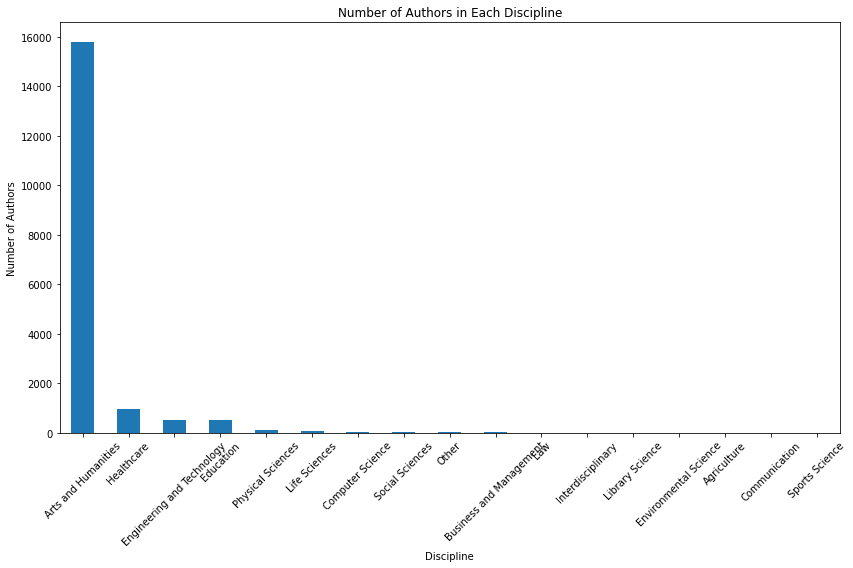

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame from the original df_SCCMPRES DataFrame
df_SCCMPRES_new = SCCMPRES[['Authors', 'Highest Degree', 'Department']].copy()

# Define the discipline categories and their corresponding keywords
disciplines = {
    'Computer Science': ['Department of Electronic Engineering',
        'Electrical and Computer',
        'Computer Science',
        'Electrical Engineering and Computer Science',
        'Biomedical Informatics / Intelligent Systems Program',
        'School of computer sciemce and engineering',
        'Biomedical Engineering',
        'Electronics and Electrical Communication Engineering',
        'Department of Applied Mathematics and Theoretical Physics (DAMTP)',
        'ICT international doctoral school',
        'Automotive Engineering Dept',
        'CSE',
        'PhD in Computer Applications',
        'PhD Computer Science',
        'MS Electronic Engineering',
        'MSE',
        'PhD in Bioinformatics',
        'PhD Computer Science',
        'PhD in Computer Science',
        'PhD in Electrical Engineering',
        'MBPhD',
        'PhD in Electrical Engineering',
        'PhD in Applied Electromagnetics','Computer Science', 'Data Science', 'Information Technology', 'Ph.D in Computer Applications', 'DITEN', 'Department of Electronic Engineering', 'Electrical and Computer', 'Computer science', 'Electrical Engineering and Computer Science', 'Biomedical Informatics / Intelligent Systems Program', 'School of computer sciemce and engineering', 'Biomedical Engineering', 'Electronics and Electrical Communication Engineering', 'Department of Applied Mathematics and Theoretical Physics (DAMTP)', 'ICT international doctoral school', 'Automotive Engineering Dept', 'Coordination Chemsitry Institute'],
    'Engineering and Technology': ['Engineering',
        'M.Sc in Electrical & Electronic Engineering',
        'Material Science and Engineering.',
        'Electrical & Electronic Engineering',
        'Mechanical Engineering',
        'Institute of Translational Medicine and Therapeutics',
        'Environmental Science',
        'Geoinformatics',
        'Applied Linguistics and Communication',
        'Department of Mechanical Enfineering',
        'Chemical engineering',
        'Artificial Organ and Transplantation Division, Department of Surgery',
        'Mechanical Engineering & Material Science',
        'Chemical Engineering',
        'Graduate Institute of Communication Engineering',
        'Electrical Engineering',
        'Environment and energy mechanical engineering',
        'INGENIERIAS',
        'School of Transportation',
        'FACULTAD DE INGENIERÍA',
        'Chemical Engineering',
        'Mechanical and Manufacturing Engineering',
        'Civil Engineering',
        'Bioengineering',
        'Environmental Engineering and Earth Sciences',
        'M.Tech.',
        'PhD en ingnierÃ­a',
        'PhD (Dr. med. equivalent to US-PhD as per Trustforte, an accreditation service recognized by USCIS)',
        'EdD',
        'PhD',
        'PhD',
        'PhD - Design & Making',
        'INGENIERO ELECTRÓNICO',
        'PhD in Telecommunication Engineering',
        'M.S. in Biomedical Engineering',
        'PhD in Chemical and Biological Engineering',
        'PhD in Biomedical Engineering',
        'PhD in Laser Physics',
        'M.S.C.E',
        'PhD in Mechanical Engineering',
        'MS Electronic Engineering',
        'MS Community health & Nutrition',
        'RD, MSc, PhD(C)',
        'LATO SENSU-PLANEJAMENTO, IMPLANTAÇÃO E GESTÃO EM EAD',
        'Ph.D. in Mechanical Engineering',
        'PhD Chemical Engineering',
        'Integrated MTech in Geoinformatics',
        'Ph.D. in Actuarial Sciences',
        'Dottorato in Fisica degli Acceleratori','Engineering', 'Technology', 'M.Tech.', 'M.Sc in Electrical & Electronic Engineering', 'Material Science and Engineering.', 'Electrical & Electronic Engineering', 'Mechanical Engineering', 'Institute of Translational Medicine and Therapeutics', 'Environmental Science', 'Built Environment - Building Performance', 'Geoinformatics', 'Applied Linguistics and Communication ', 'Department of Mechanical Enfineering', 'Chemical engineering', ' Artificial Organ and Transplantation Division, Department of Surgery', 'Mechanical Engineering & Material Science', 'Chemical Engineering', 'Graduate Institute of Communication Engineering', 'Electrical Engineering', 'Environment and energy mechanical engineering'],
    'Healthcare': ['Clinical Research Methods',
        'Rehabilitation Science',
        'Infectious Disease Fellowship',
        'Cerebrovascular Center',
        'Foods and Nutrition',
        'Medicine',
        'International Health',
        'Critical Care',
        'Inserm U613',
        'Roswell Park Graduate Division',
        'Genome Sciences',
        'Health Care Administration',
        'Pharmacology and Therapeutics',
        'Division of Parasitology',
        'Disease Intervention and Prevention',
        'Department of Infection, Immunity and Cardiovascular Disease',
        'Clinical and Translational Science Activities',
        'Institute for Pharmaceutical Outcomes & Policy',
        'HEALTH SCIENCES',
        'Ecole doctorale Pathologie Humaine',
        'International Health',
        'Rehabilitation Sciences',
        'Institute of Human Nutrition',
        'Point of Care Ultrasonography',
        'Center for Molecular Fetal Therapy',
        'Fellowship',
        'Health and Heath Care Research',
        'Department for Health',
        'Psychiatry',
        'Medicina e Chirurgia',
        'Physical Therapy',
        'Pediatrics',
        'Faculty of Health',
        'MBBS',
        'MD',
        'Bachelor Medicine Bachelor Surgery (MBBS)',
        'MASTER DEGREE IN NUTRITION AND HEALTH',
        'PhD in Medical Sciences',
        'Master of Medical Science with a concentration in Biomedical Informatics',
        'M.D., Ph.D.',
        'MSPH (Master of Science in Public Health)',
        'PharmD',
        'Doctor of medicine diploma',
        'FRCS',
        'MS, PhD',
        'Doctor of Medicine',
        'M.D.',
        'Doctor of Medicine (MD)',
        'Doctor of Medicine/M.D.',
        'MD',
        'MPH',
        'MBBCh',
        'PG Dip (Critical Care)',
        'MBChB',
        'DNP',
        'Masters in Population Health Science',
        'Masters of Science in Nursing',
        'Doctorate of Nursing Practice',
        'Doctor of Nursing Practice (Post-Professional)',
        'Doctor of Physical Therapy (Post-Professional)',
        'Doctor of Public Health',
        'Doctor of Pharmacy',
        'MEDiNA e Cirugía',
        'MBBchBAO (MD)',
        'MBBCh',
        'MS Health Science',
        'Doctor in Medicine',
        'MHS',
        'Masters of Clinical Investigation',
        'MSN',
        'Doctor of Medicine (MD)',
        'MD',
        'MD',
        'MD',
        'MD Research Fellow',
        'Clinical Immunology/Allergy',
        'Endocrinology, Diabetes and Metabolism',
        'Cardiovascular Medicine',
        'Pediatrics',
        'Medicine',
        'Neurology',
        'Physical Medicine and Rehabilitation',
        'Pediatric Nephrology',
        'Pediatric Hematology/Oncology',
        'Obstetrics and Gynecology',
        'Emergency Medicine',
        'Anesthesiology',
        'Family Medicine',
        'Gastroenterology',
        'Dermatology',
        'Radiology',
        'Pathology',
        'Bachelor of Medicine',
        'Surgical Critical Care',
        'Cardiology',
        'Transfusion Medicine',
        'Sports Medicine',
        'Transplant Hepatology',
        'Hospice and Palliative Medicine',
        'Infectious Disease',
        'Maternal-Fetal Medicine',
        'Medical Genetics',
        'Neonatal-Perinatal Medicine',
        'Pediatric Endocrinology',
        'Nephrology',
        'Pulmonary Disease',
        'Radiation Oncology',
        'Vascular Neurology',
        'Epidemiology',
        'Postdoctoral Research Fellowship',
        'Fellowship in Pediatric Health Services Research',
        'Master of Health Sciences - Health Policy Major',
        'Master of Science in Health Professions Education',
        'Post-Doctoral Fellow',
        'Pediatric Hematology/Oncology',
        'Pediatric Hospital Medicine',
        'Neonatal-Perinatal Medicine',
        'Pediatric Cardiology',
        'Pediatric Endocrinology',
        'Developmental-Behavioral Pediatrics',
        'Sleep Medicine',
        'Pediatric Gastroenterology',
        'Pulmonary Disease and Critical Care Medicine',
        'Hematology and Medical Oncology',
        'Pediatric Nephrology',
        'Geriatric Medicine','MBBS', 'Rehabilitation Science','MD', 'Clinical Research Methods','BScN', 'clinical fellow', 'Medicine', 'Surgery', 'Pediatrics', 'Nursing', 'Pharmacy', 'Dentistry', 'Physical Therapy', 'Public Health', 'Healthcare', 'Epidemiology', 'Faculty of Medicine', 'Medical Life System', 'Faculty of Medine and Surgery', 'Global Health and Development', 'Fac de Med', 'Medicine', 'Health Sciences in Clinical Research', 'College of Nursing', 'Andrology', 'Critical Care Department', 'Cardiovascular Medicine', 'Transplantation Surgery', 'Cardiology ', 'Vitreoretinal Diseases and Surgery', 'Endocrinology, Diabetes and Metabolism', 'Internal Medicine, Div of Hematology, Oncology and BMT', 'Intensive Care Department', 'Division of Rheumatolgy, Department of Internal Medicine', 'Medicine/Gastroenterology', 'Pediatric Critical Care Medicine', 'Epidemiology and Economics', 'Microbiology, Immunology and Pathology', 'Anesthesia and surgical intensive care medicine ', 'Anesthesiology, Intensive Therapy and Acute Intoxications', 'Pediatric Critical Care Medicine ', 'Internal medicine', 'Transfusion medicine', 'Infectious Diseases and Clinical Microbiology', 'Pulmonary and Critical Care Medicine', 'Department of Anesthesiology', 'Medical and Molecular Genetics', 'Medical Genetics', 'Hematology/ Nephrology and Hypertension', 'Medical Epidemiology and Biostatistics', 'Gastroenterology and Hepatology', 'hepatology', 'Cardiology', 'Critical Care Medicine', 'Pediatric Emergency Department', 'Internal Medicine Residency', 'Immunology & Infectious Diseases', 'Pulmonary/Critical Care Medicine', 'Orthepedics', 'Nephrology', 'Pathology', 'Neurosurgery', 'Transplant nephrology', 'Radiology', 'Otorhinolaryngology', 'Dermatology and Pathology', 'Endocrinology, Diabetes, Metabolism', 'Pulmonary & Criticla Care Medicine', 'Cardiovascular Sciences', 'Respiratory Therapy ', 'Hematology', 'Endocrinology, Diabetes and Metabolism', 'oncologic surgery', 'Critical Care Fellow ', 'Internal Medicine', 'Pulmonary and Critical Care', 'Emergency Medicine', 'Anesthesiology', 'Neurology', 'Surgery', 'Pulmonary, Allergy, Sleep and Critical Care', 'Cardiovascular Science', 'Vascular Neurology Fellow', 'Transplant Surgery', 'Clinical Pharmacology', 'Department of Anesthesiology & Pain Medicine', 'Pulmonary Sciences and Critical Care Medicine', 'Heamatology', 'Pulmonary and Critical Care Fellow', 'Transplant surgery', 'Gastroenterology/ Hepatology', 'Heider College of Business', 'Pediatric Nephrology', 'Internal medicine', 'Pulmonary & Critical Care Medicine', 'Neonatology Service', 'Pediatric neurology', 'Epilepsy/Neurology', 'Angiología y Cirugía Vascular', 'Posdoctor', 'Radiology', 'Pediatric Critical Care', 'Transplant Surgery', 'Gastroenterology/Hepatology', 'Emergency Medical Services', 'Pediatric Surgery', 'Neurophysiology / Epilepsy', 'Medicine ', 'Nephrology', 'Cardiology Fellowship', 'Pulmonary and Critical Care Medicine', 'Critical Care Fellow', 'Transplantation Surgery', 'Cardiology and Heart Failure Fellowship', 'Fellow-Transplantation Surgery', 'Cardiovascular Medicine', 'Transplantation Surgery ', 'Advanced Clinical Simulation Fellow', 'Pulmonary and Critical Care', 'Orthopaedics', 'Critical Care Medicine', 'Internal Medicine', 'Pulmonary and Critical Care Medicine', 'Thoracic Surgery', 'Cardiothoracic anesthesiology fellowship', 'Internal Medicine/Pediatrics', 'Neurocritical Care', 'Pediatric Critical Care Medicine', 'Pediatric Critical Care', 'Physical Medicine and Rehabilitation', 'Endovascular Surgical Neuroradiology', 'General Surgery', 'Anesthesia Critical Care Medicine', 'Critical Care Anesthesiology', 'Trauma', 'Clinical Immunology/Allergy', 'Surgical Critical Care', 'Sleep Medicine', 'Pediatric Hospital Medicine', 'Anesthesiology Critical Care Medicine', 'Anesthesiology and Critical Care Medicine', 'Clinical Cardiac Electrophysiology', 'Addiction Medicine', 'Abdominal Transplant Surgery', 'Neuroradiology'],
    'Life Sciences': ['Genome Sciences',
        'Plant Sciences',
        'Human Anatomy',
        'MCB',
        'Instituto de Física Ingeniero Luís Rivera Terrazas',
        'Instituto de Fisica',
        'Internationale Agrarentwicklung, Tierproduktion',
        'Institute de Química',
        'Departamento de Bioquímica',
        'Biological Sciences',
        'Life Sciences',
        'Department of Botany',
        'Babraham Institute',
        'Ph.D.: Cellular and Molecular Biology',
        'PhD degree in Applied Physics',
        'PhD Immunology',
        'Ph.D./Genetics',
        'Postdoctoral Research Fellowship',
        'PhD Zoology - Molecular Biology',
        'PhD (Biochemistry)',
        'PhD in Molecular Biology',
        'PhD Biology',
        'PhD/Pathobiology',
        'PhD, Zoology',
        'Doctor en Ciencias, m/Biología Celular Molecular y Neurociencia',
        'PhD In Biological Sciences',
        'phd Zoology (Parasitology)',
        'PhD in Human Cancer Genetics',
        'PhD in Human Anatomy (Neurosciences)',
        'Integrated Training Program in Digestive Diseases',
        'PhD in Biology',
        'PhD in Biological Sciences',
        'PhD in Biological Sciences',
        'MS in Medical Biology',
        'PhD (Applied Biology & Biotechnology)',
        'PhD in Cardiovascular Science',
        'MS Orth',
        'Master of Science in Human Anatomy',
        'PhD in Experimental Medicine',
        'Ph.D in Molecular Biology and Biochemistry',
        'PhD Assyriology',
        'BS Forest Sciences',
        'PhD in Biomedical Sciences',
        'PhD in Biomedical Research',
        'Aquatic Ecology',
        'Masters in Elementary Education',
        'BS Biology',
        'Doctor in Philosophy (Ph.D.)',
        'Postdoctoral Research Fellow/NIH National Research Trainee',
        'PhD in Molecular Biology and Genetics',
        'PhD Immunology',
        'Ph.D. in Cell and Developmental Biology',
        'PhD in Cell and Developmental Biology',
        'PhD in Biochemistry',
        'Ph.D. in Cancer Biology',
        'PhD in Molecular and Cellular Biology',
        'PhD Genetics',
        'PhD in Oncological Sciences',
        'PhD in Genome Sciences',
        'PhD in Biophysics and Physiology',
        'PhD in Biomedical Sciences',
        'PhD in Cell Biology','Biology', 'Biochemistry', 'Biotechnology', 'Microbiology', 'Genetics', 'Immunology', 'Neuroscience', 'Physiology', 'Zoology', 'Biological Biomedical Sciences ', 'Bioquímica y Biología Molecular', 'Biosciences ', 'Animal Genetics', 'Crop Improvement', 'Plant Pathology', 'Entomology', 'Pharmaceutical Sciences', 'Biomedical Engineering ', 'Microbiology and Immunology', 'Pathobiology', 'Centre for Cancer Biomarkers and Biotherapeutics', 'National Laboratory of Biomacromolecules ', 'Histologia', 'biochemistry', 'Microbiology, Immunology and Pathology'],
    'Physical Sciences': ['Center for Combinatorics',
        'Optical Sciences',
        'Facultad de Ciencias, educación y humanidades',
        'Facultad de Ciencias Administrativas',
        'COPPE-PEC',
        'Duncan of Jordanstone School of Art & Design',
        'Física',
        'Atmospheric and Oceanic Sciences',
        'Ph.D. in Statistics',
        'MA Theoretical Physics',
        'PhD/Mathematics',
        'PhD Physics',
        'MSc Mathematics and Physics',
        'PhD - equivalence',
        'PhD Statistics',
        'PhD in Mathematics - Statistics',
        'PhD Applied Statistics',
        'PhD/Statistics',
        'MSc in Data Science',
        'PhD in Acoustics',
        'PhD Statistics',
        'PhD, Atomic and Molecular Spectroscopy',
        'Ph.D. Neural Science & Psychology',
        'PhD Physics',
        'M.Sc.',
        'PhD Physics',
        'Ph.D. Data Science',
        'PhD in Physical Chemistry',
        'PhD Research',
        'PhD (ABD)',
        'Doctor of Philosophy (PhD) in Mathematics',
        'PhD in Chemical Ecology',
        'PhD in Laser Physics',
        'Ph. D in Chemistry',
        'PhD Surface Physics',
        'PhD in Plasma Physics',
        'PhD in Physics',
        'MSc','Physics', 'Chemistry', 'Mathematics', 'Statistics', 'Mathematical Statistics', 'Physhics', 'Physics and Materials Science', 'Mathematics and Statistics', 'Computing and Mathematical Sciences', 'Biometry', 'Applied Mathematics', 'Mathematics', 'Institute of Metabolic Sciences', 'Physics and Astronomy', 'Department of Chemistry & Biochemistry', 'School of Mathematics and Statistics', 'Department of Applied Mathematics and Theoretical Physics (DAMTP)', 'School of Physics', 'Division of Statistics and Data Science', 'Department of Statistics', 'Department of Physics', 'Acoustics', 'Astrophysics', 'Atmospheric Science'],
    'Social Sciences': ['Facultad Nacional de Salud Pública',
        'Institute of Translational Medicine and Therapeutics',
        'Public Administration',
        'SloanSchool',
        'Instituto de Investigaciones Sociales',
        'Human Anatomy',
        'PhD, Social and Behavioral Interventions',
        'Ph.D. Organizational Psychology',
        'PhDin Organizational Communication',
        'M.S.P.S.',
        'Human Development and Psychology',
        'Postdoctoral Research Fellow',
        'MA, Social Psychology',
        'PhD Applied Health Research and Evaluation',
        'Ph.D., Psychology',
        'PHD Social and Economic Geography',
        'PhD in Sociology',
        'Public Health',
        'Ph.D. in Social Sciences, Childhood and Youth.',
        'MSW',
        'Master of Arts in English and Cultural Studies',
        'BS - Anthropology, CRM Option',
        'Clinical Psychology, PhD',
        'Doctor of Business Administration',
        'MA Religious Studies',
        'Global Security Studies',
        'Department of Psychology',
        'Psychology',
        'Master of Commerce in Taxation',
        'Ph.D. in Marketing',
        'Ph.D. in Consumer Behavior',
        'Ph.D. in Management',
        'Ph.D. in Organizational Behavior',
        'Ph.D. in Finance',
        'Ph.D. in Accounting',
        'Ph.D. in Human Resource Management',
        'Ph.D. in Operations Management',
        'Ph.D. in International Business',
        'Ph.D. in Strategic Management',
        'Ph.D. in Entrepreneurship',
        'Ph.D. in Supply Chain Management',
        'Ph.D. in Information Systems',
        'Ph.D. in Business Analytics',
        'Ph.D. in Organizational Communication',
        'Ph.D. in Public Administration',
        'Ph.D. in Public Policy',
        'Ph.D. in Sociology',
        'Ph.D. in Anthropology',
        'Ph.D. in Political Science',
        'Ph.D. in International Relations',
        'Ph.D. in Social Work',
        'Ph.D. in Human Development and Family Studies',
        'Ph.D. in Criminology',
        'Ph.D. in Geography',
        'Ph.D. in Urban Planning',
        'Ph.D. in Demography',
        'Ph.D. in Linguistics',
        'Ph.D. in Communication Sciences and Disorders',
        'Ph.D. in Journalism and Mass Communication',
        'Ph.D. in Media Studies','Psychology', 'Sociology', 'Economics', 'Political Science', 'Anthropology', 'Psychological Science', 'Cognitive Science', 'Archaeology', 'Geography', 'Demography', 'Linguistics', 'Econmics', 'Department of Psychology', 'Geriatric Psychiatry, WPIC', 'Health, Behavior, and Society', 'Psychology', 'Heider College of Business', 'Social and Organizational Psychology', 'Economics/ Harris School of Public Policy', 'Psychiatry Department', 'Psychiatry ', 'Industrial/Organisational Psychology', 'Health, Behavior & Society', 'Behavioral Sciences', 'Anthropology and Sociology'],
    'Arts and Humanities': ['SECRETARIO ACADEMICO',
        'Combined Studies',
        'St Cross',
        'AB',
        'Department for Health',
        'Clare College',
        'School of Languages and Cultures',
        'Dept. of Pharmacology; Worcester College',
        'Psicología Cognitiva, Social y Organizacional',
        'Social Work',
        'Programa de Estudos Pós-graduados em Ciências Sociais',
        'PhD in Culture of Communication, section Cinema & Media Studies',
        'DPhil: "Intestinal bacterial flora and the inflammatory immune response in the T cell transfer model of colitis"',
        'Ethnomusicology',
        'PhD in Social Psychology',
        'Ph.D in Fine Art',
        'BA/MA/PhD',
        'PH.D. Organizational/Social',
        'PhD in Mass Communication',
        'PhD in English',
        'Doctor of Education in Leadership and Nursing Education',
        'Ph.D in English Literature',
        'Doctor of Physical Therapy',
        'Doctor of Musical Arts',
        'Doctor of Fine Arts',
        'Master of Fine Arts',
        'Master of Music',
        'Master of Landscape Architecture',
        'Master of Urban Planning',
        'Master of Architecture',
        'Master of Interior Design',
        'Master of Industrial Design',
        'Master of Graphic Design',
        'Master of Fashion Design',
        'Master of Journalism',
        'Master of Arts in Teaching',
        'Bachelor of Fine Arts',
        'Bachelor of Music',
        'Bachelor of Landscape Architecture',
        'Bachelor of Interior Design',
        'Bachelor of Graphic Design',
        'D. Phil. (Oxon)',
        'Ph.D. in Philosophy',
        'Ph.D. in Comparative Literature',
        'Ph.D. in Art History',
        'Ph.D. in Classics',
        'Ph.D. in Religious Studies',
        'Ph.D. in Theatre',
        'Ph.D. in Dance',
        'Ph.D. in Film Studies',
        'Ph.D. in Cultural Studies',
        'Ph.D. in Women`s Studies','Arts', 'Humanities', 'Literature', 'History', 'Philosophy', 'Music', 'Department of English and Cultural Studies, Bannerghatta Road Campus', 'English', 'Periodismo', 'History and Philosophy of Science', 'Philosophy', 'Neuroscience; Religious Studies', 'Communication and Performing Arts', 'Cultural and Religious Studies', 'Asian Languages and Literatures', 'English - Rhetoric & Composition', 'Ethnomusicology'],
    'Business and Management': ['Business', 'Management', 'MBA', 'Finance', 'Accounting', 'Marketing', 'Dept. of Management', 'School of Economics and Management', 'Business School', 'Management sciences', 'Graduate School of Business and Law', 'Heider College of Business', 'Management', 'Kenan-Flagler School of Business', 'Faculty of Management', 'Faculty of Management', "Taylor's Business School", 'Kellogg School of Management', 'Business & Hotel Management School', 'Sloan School of Management'],
    'Education': ['Education', 'Teaching', 'Pedagogy', 'Curriculum and Instruction', 'Educational Leadership and Policy', 'Counseling Psychology', 'Higher Education Administration', 'Teacher Education', 'School of Education', 'Faculty of Education', 'Morgridge College of Education', 'College of Education', 'Early Childhood Education'],
    'Law': ['Law', 'Legal', 'Juris Doctor', 'J.D.', 'Transnational Law', 'Intellectual Property Law', 'International Law', 'Environmental Law', 'School of Law', 'Human Rights Law', 'Criminal Justice', 'Public Interest Law'],
    'Environmental Science': ['Environmental Science', 'School of Mining & Geosciences', 'Ecology', 'Sustainability', 'Forestry', 'Oceanography', 'Atmospheric Science', 'Earth Science', 'Geology', 'Marine Science', 'Natural Resources', 'Wildlife Conservation', 'Agronomy'],
    'Agriculture': ['Agriculture', 'Agronomy', 'Horticulture', 'Crop Science', 'Animal Science', 'Agricultural Economics', 'Plant Pathology', 'Soil Science', 'Entomology', 'Food Science', 'Agribusiness'],
    'Communication': ['Communication', 'Journalism', 'Media Studies', 'Communication Studies', 'Advertising', 'Public Relations', 'Mass Communication', 'Digital Media', 'Strategic Communication', 'Communication Arts', 'Telecommunication', 'Broadcast Journalism'],
    'Sports Science': ['Sports Science', 'Exercise Science', 'Kinesiology', 'Athletic Training', 'Physical Education', 'Sport Management', 'Exercise Physiology', 'Sports Medicine', 'Sport Psychology', 'Sport Sociology', 'Biomechanics'],
    'Library Science': ['Library Science', 'Information Science', 'Library and Information Studies', 'Archival Science', 'Records Management', 'Knowledge Management', 'Information Organization', 'Digital Curation', 'Data Stewardship'],
    'Interdisciplinary': ['Interdisciplinary Studies', 'Multidisciplinary Studies', 'Liberal Studies', 'General Studies', 'Integrated Science', 'Cognitive Science', 'Science, Technology, and Society', 'Bioethics', 'Medical Humanities', 'Environmental Studies', 'Global Studies', 'Women\'s Studies', 'African American Studies', 'Asian Studies', 'Latin American Studies', 'Middle Eastern Studies', 'Neuroscience', 'Bioinformatics', 'Computational Biology', 'Systems Biology', 'Nanoscience', 'Nanotechnology', 'Materials Science', 'Network Science']
}

def categorize_discipline(degree, department):
    for discipline, keywords in disciplines.items():
        if any(keyword.lower() in str(degree).lower() for keyword in keywords):
            return discipline
    
    for discipline, keywords in disciplines.items():
        if any(keyword.lower() in str(department).lower() for keyword in keywords):
            return discipline
    
    return 'Other'

# Categorize the degrees into disciplines based on degree and department information
df_SCCMPRES_new['Discipline'] = df_SCCMPRES_new.apply(lambda x: categorize_discipline(x['Highest Degree'], x['Department']), axis=1)

# Count the number of authors in each discipline
discipline_counts = df_SCCMPRES_new['Discipline'].value_counts()

# Print the discipline counts
print("Number of Authors in Each Discipline:")
print(discipline_counts)

# Print the values in the "Other" category
print("\nValues in the 'Other' category:")
other_values = df_SCCMPRES_new[df_SCCMPRES_new['Discipline'] == 'Other'][['Authors', 'Highest Degree', 'Department']]
print(other_values)

other_values.to_csv('SCCMPRES_other_values')

# Visualization
plt.figure(figsize=(12, 8))
discipline_counts.plot(kind='bar')
plt.xlabel('Discipline')
plt.ylabel('Number of Authors')
plt.title('Number of Authors in Each Discipline')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [100]:
print(df_SCCMDAT['Highest Degree'].unique())

['Not Available' 'PhD' 'fellowship, Interventional Cardiology'
 'Doctor of Philosophy' 'MD, FACP'
 'Master of Science in Clinical Research ' 'Master of Technology'
 'MS Electronic Engineering' 'MD Degree' 'Ph.D.' 'Doctorate'
 'Ph.D in Biology' 'PhD Computer Science' 'Fellow' 'doctor'
 'Chief Hematology/Oncology Fellow, T32 Awardee'
 'MD, PhD, Professor of Medicine' 'Chief Resident' 'MD' 'Doctor'
 'Diploma (M.S.)' 'MS Community health & Nutrition '
 'HDR degree (Habilitation a Diriger des Recherches, in the French system, this is the highest of the higher degrees.) '
 'PhD ' 'MSc, Epidemiology' 'M.S. in Biostatistics' 'M.D.' 'MBBS'
 'Associate Professor' 'Infectious Disease Fellowship'
 'Bachelor of Commerce Honours'
 'Especialista en Radiología Bucal y Maxilofacial' 'Doctorado' 'Doutorado'
 'PhD in Applied Electromagnetics ' 'Habilitation in Physics' 'DPhil'
 'Master of Counselling' 'Ph D' 'MPH' 'Dip Obstets' 'Doctor Of Pharmacy '
 'Doctor of Medicine' 'Ph.D' 'BA ' 'PhD Statistics'
 'F

In [101]:
print(SCCMDAT['Department'].unique())

['Not Available' 'Zoology ' 'Curriculum Studies' 'Cardiovascular Medicine'
 'Chinese Language and Literature' 'Biomedical Science' 'Cancer Center'
 'Neurocritical Care ' 'Nephrology' 'Computer Science and Engineering'
 'Department of Electronic Engineering'
 'School of Public Health and Health Systems' 'Chest Diseases Department'
 'Atmospheric Science' 'Fac de Med' 'Biology' 'Management'
 'Computer Science' 'Infectious Diseases' 'Neuroscience'
 'Section of Hematology/Oncology' 'Cardiology' 'Biomedical Informatics'
 'Medical–Surgical Intensive Care Unit' ' Neurology'
 'Construction Engineering' 'Fisica Teorica y del Cosmos'
 'Electrical and Computer Engineeering' 'Physics and Technology'
 'Anatomía, Histología y Neurociencia'
 'Environmental Design, Home & Nutritional Sciences ' 'Faculté de Génie'
 'Biotechnology ' 'Anatomy, School of Medicine' 'Program in Public Health'
 'Electrical Computer Engineering' 'Chemistry' 'Medicine' 'Economics'
 'C.I.E.O' 'Cirugía' 'Engenharia Civil ' 'Diplo

Number of Authors in Each Discipline:
Discipline
Arts and Humanities           13072
Engineering and Technology      622
Healthcare                      510
Physical Sciences               112
Other                           110
Computer Science                 80
Life Sciences                    80
Social Sciences                  48
Library Science                  26
Education                        24
Business and Management          10
Interdisciplinary                 2
Law                               2
Communication                     1
Environmental Science             1
Name: count, dtype: int64


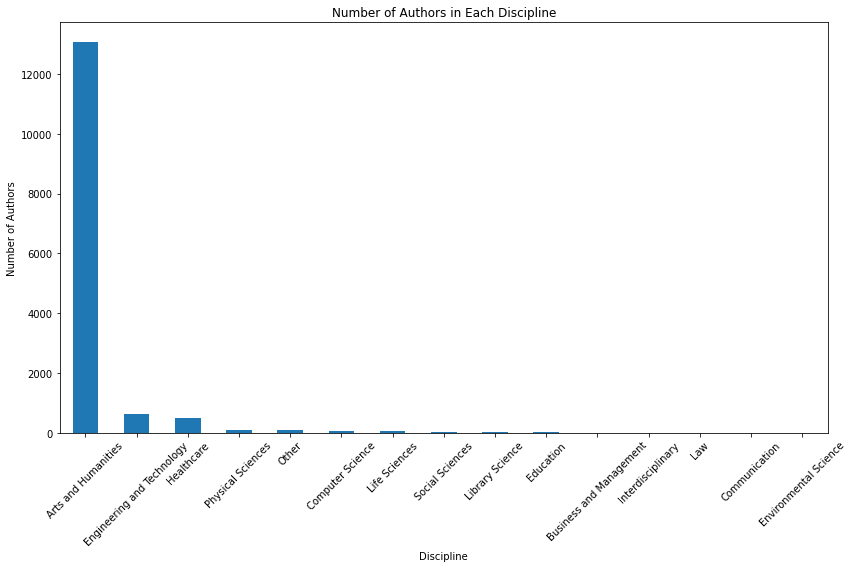

In [126]:
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame from the original df_SCCMPRES DataFrame
df_SCCMDAT_new = SCCMDAT[['Authors', 'Affiliation Name','Latitude_from_df2', 'Longitude_from_df2', 'Highest Degree', 'Department', 'Fork Name', 'Affiliation', 'Lat','Lon', 'Publication Title', 'Year', 'Citations', 'Cited By URL', 'Abstract', 'Gender - Author', 'Gender - Fork']].copy()

# Define the discipline categories and their corresponding keywords
disciplines = {
    'Computer Science': ['Department of Electronic Engineering',
        'Electrical and Computer',
        'Computer Science',
        'Electrical Engineering and Computer Science',
        'Biomedical Informatics / Intelligent Systems Program',
        'School of computer sciemce and engineering',
        'Biomedical Engineering',
        'Electronics and Electrical Communication Engineering',
        'Department of Applied Mathematics and Theoretical Physics (DAMTP)',
        'ICT international doctoral school',
        'Automotive Engineering Dept',
        'CSE',
        'PhD in Computer Applications',
        'PhD Computer Science',
        'MS Electronic Engineering',
        'MSE',
        'PhD in Bioinformatics',
        'PhD Computer Science',
        'PhD in Computer Science',
        'PhD in Electrical Engineering',
        'MBPhD',
        'PhD in Electrical Engineering',
        'PhD in Applied Electromagnetics','Computer Science', 'Data Science', 'Information Technology', 'Ph.D in Computer Applications', 'DITEN', 'Department of Electronic Engineering', 'Electrical and Computer', 'Computer science', 'Electrical Engineering and Computer Science', 'Biomedical Informatics / Intelligent Systems Program', 'School of computer sciemce and engineering', 'Biomedical Engineering', 'Electronics and Electrical Communication Engineering', 'Department of Applied Mathematics and Theoretical Physics (DAMTP)', 'ICT international doctoral school', 'Automotive Engineering Dept', 'Coordination Chemsitry Institute'],
    'Engineering and Technology': ['Engineering',
        'M.Sc in Electrical & Electronic Engineering',
        'Material Science and Engineering.',
        'Electrical & Electronic Engineering',
        'Mechanical Engineering',
        'Institute of Translational Medicine and Therapeutics',
        'Environmental Science',
        'Geoinformatics',
        'Applied Linguistics and Communication',
        'Department of Mechanical Enfineering',
        'Chemical engineering',
        'Artificial Organ and Transplantation Division, Department of Surgery',
        'Mechanical Engineering & Material Science',
        'Chemical Engineering',
        'Graduate Institute of Communication Engineering',
        'Electrical Engineering',
        'Environment and energy mechanical engineering',
        'INGENIERIAS',
        'School of Transportation',
        'FACULTAD DE INGENIERÍA',
        'Chemical Engineering',
        'Mechanical and Manufacturing Engineering',
        'Civil Engineering',
        'Bioengineering',
        'Environmental Engineering and Earth Sciences',
        'M.Tech.',
        'PhD en ingnierÃ­a',
        'PhD (Dr. med. equivalent to US-PhD as per Trustforte, an accreditation service recognized by USCIS)',
        'EdD',
        'PhD',
        'PhD',
        'PhD - Design & Making',
        'INGENIERO ELECTRÓNICO',
        'PhD in Telecommunication Engineering',
        'M.S. in Biomedical Engineering',
        'PhD in Chemical and Biological Engineering',
        'PhD in Biomedical Engineering',
        'PhD in Laser Physics',
        'M.S.C.E',
        'PhD in Mechanical Engineering',
        'MS Electronic Engineering',
        'MS Community health & Nutrition',
        'RD, MSc, PhD(C)',
        'LATO SENSU-PLANEJAMENTO, IMPLANTAÇÃO E GESTÃO EM EAD',
        'Ph.D. in Mechanical Engineering',
        'PhD Chemical Engineering',
        'Integrated MTech in Geoinformatics',
        'Ph.D. in Actuarial Sciences',
        'Dottorato in Fisica degli Acceleratori','Engineering', 'Technology', 'M.Tech.', 'M.Sc in Electrical & Electronic Engineering', 'Material Science and Engineering.', 'Electrical & Electronic Engineering', 'Mechanical Engineering', 'Institute of Translational Medicine and Therapeutics', 'Environmental Science', 'Built Environment - Building Performance', 'Geoinformatics', 'Applied Linguistics and Communication ', 'Department of Mechanical Enfineering', 'Chemical engineering', ' Artificial Organ and Transplantation Division, Department of Surgery', 'Mechanical Engineering & Material Science', 'Chemical Engineering', 'Graduate Institute of Communication Engineering', 'Electrical Engineering', 'Environment and energy mechanical engineering'],
    'Healthcare': ['Clinical Research Methods',
        'Rehabilitation Science',
        'Infectious Disease Fellowship',
        'Cerebrovascular Center',
        'Foods and Nutrition',
        'Medicine',
        'International Health',
        'Critical Care',
        'Inserm U613',
        'Roswell Park Graduate Division',
        'Genome Sciences',
        'Health Care Administration',
        'Pharmacology and Therapeutics',
        'Division of Parasitology',
        'Disease Intervention and Prevention',
        'Department of Infection, Immunity and Cardiovascular Disease',
        'Clinical and Translational Science Activities',
        'Institute for Pharmaceutical Outcomes & Policy',
        'HEALTH SCIENCES',
        'Ecole doctorale Pathologie Humaine',
        'International Health',
        'Rehabilitation Sciences',
        'Institute of Human Nutrition',
        'Point of Care Ultrasonography',
        'Center for Molecular Fetal Therapy',
        'Fellowship',
        'Health and Heath Care Research',
        'Department for Health',
        'Psychiatry',
        'Medicina e Chirurgia',
        'Physical Therapy',
        'Pediatrics',
        'Faculty of Health',
        'MBBS',
        'MD',
        'Bachelor Medicine Bachelor Surgery (MBBS)',
        'MASTER DEGREE IN NUTRITION AND HEALTH',
        'PhD in Medical Sciences',
        'Master of Medical Science with a concentration in Biomedical Informatics',
        'M.D., Ph.D.',
        'MSPH (Master of Science in Public Health)',
        'PharmD',
        'Doctor of medicine diploma',
        'FRCS',
        'MS, PhD',
        'Doctor of Medicine',
        'M.D.',
        'Doctor of Medicine (MD)',
        'Doctor of Medicine/M.D.',
        'MD',
        'MPH',
        'MBBCh',
        'PG Dip (Critical Care)',
        'MBChB',
        'DNP',
        'Masters in Population Health Science',
        'Masters of Science in Nursing',
        'Doctorate of Nursing Practice',
        'Doctor of Nursing Practice (Post-Professional)',
        'Doctor of Physical Therapy (Post-Professional)',
        'Doctor of Public Health',
        'Doctor of Pharmacy',
        'MEDiNA e Cirugía',
        'MBBchBAO (MD)',
        'MBBCh',
        'MS Health Science',
        'Doctor in Medicine',
        'MHS',
        'Masters of Clinical Investigation',
        'MSN',
        'Doctor of Medicine (MD)',
        'MD',
        'MD',
        'MD',
        'MD Research Fellow',
        'Clinical Immunology/Allergy',
        'Endocrinology, Diabetes and Metabolism',
        'Cardiovascular Medicine',
        'Pediatrics',
        'Medicine',
        'Neurology',
        'Physical Medicine and Rehabilitation',
        'Pediatric Nephrology',
        'Pediatric Hematology/Oncology',
        'Obstetrics and Gynecology',
        'Emergency Medicine',
        'Anesthesiology',
        'Family Medicine',
        'Gastroenterology',
        'Dermatology',
        'Radiology',
        'Pathology',
        'Bachelor of Medicine',
        'Surgical Critical Care',
        'Cardiology',
        'Transfusion Medicine',
        'Sports Medicine',
        'Transplant Hepatology',
        'Hospice and Palliative Medicine',
        'Infectious Disease',
        'Maternal-Fetal Medicine',
        'Medical Genetics',
        'Neonatal-Perinatal Medicine',
        'Pediatric Endocrinology',
        'Nephrology',
        'Pulmonary Disease',
        'Radiation Oncology',
        'Vascular Neurology',
        'Epidemiology',
        'Postdoctoral Research Fellowship',
        'Fellowship in Pediatric Health Services Research',
        'Master of Health Sciences - Health Policy Major',
        'Master of Science in Health Professions Education',
        'Post-Doctoral Fellow',
        'Pediatric Hematology/Oncology',
        'Pediatric Hospital Medicine',
        'Neonatal-Perinatal Medicine',
        'Pediatric Cardiology',
        'Pediatric Endocrinology',
        'Developmental-Behavioral Pediatrics',
        'Sleep Medicine',
        'Pediatric Gastroenterology',
        'Pulmonary Disease and Critical Care Medicine',
        'Hematology and Medical Oncology',
        'Pediatric Nephrology',
        'Geriatric Medicine','MBBS', 'Rehabilitation Science','MD', 'Clinical Research Methods','BScN', 'clinical fellow', 'Medicine', 'Surgery', 'Pediatrics', 'Nursing', 'Pharmacy', 'Dentistry', 'Physical Therapy', 'Public Health', 'Healthcare', 'Epidemiology', 'Faculty of Medicine', 'Medical Life System', 'Faculty of Medine and Surgery', 'Global Health and Development', 'Fac de Med', 'Medicine', 'Health Sciences in Clinical Research', 'College of Nursing', 'Andrology', 'Critical Care Department', 'Cardiovascular Medicine', 'Transplantation Surgery', 'Cardiology ', 'Vitreoretinal Diseases and Surgery', 'Endocrinology, Diabetes and Metabolism', 'Internal Medicine, Div of Hematology, Oncology and BMT', 'Intensive Care Department', 'Division of Rheumatolgy, Department of Internal Medicine', 'Medicine/Gastroenterology', 'Pediatric Critical Care Medicine', 'Epidemiology and Economics', 'Microbiology, Immunology and Pathology', 'Anesthesia and surgical intensive care medicine ', 'Anesthesiology, Intensive Therapy and Acute Intoxications', 'Pediatric Critical Care Medicine ', 'Internal medicine', 'Transfusion medicine', 'Infectious Diseases and Clinical Microbiology', 'Pulmonary and Critical Care Medicine', 'Department of Anesthesiology', 'Medical and Molecular Genetics', 'Medical Genetics', 'Hematology/ Nephrology and Hypertension', 'Medical Epidemiology and Biostatistics', 'Gastroenterology and Hepatology', 'hepatology', 'Cardiology', 'Critical Care Medicine', 'Pediatric Emergency Department', 'Internal Medicine Residency', 'Immunology & Infectious Diseases', 'Pulmonary/Critical Care Medicine', 'Orthepedics', 'Nephrology', 'Pathology', 'Neurosurgery', 'Transplant nephrology', 'Radiology', 'Otorhinolaryngology', 'Dermatology and Pathology', 'Endocrinology, Diabetes, Metabolism', 'Pulmonary & Criticla Care Medicine', 'Cardiovascular Sciences', 'Respiratory Therapy ', 'Hematology', 'Endocrinology, Diabetes and Metabolism', 'oncologic surgery', 'Critical Care Fellow ', 'Internal Medicine', 'Pulmonary and Critical Care', 'Emergency Medicine', 'Anesthesiology', 'Neurology', 'Surgery', 'Pulmonary, Allergy, Sleep and Critical Care', 'Cardiovascular Science', 'Vascular Neurology Fellow', 'Transplant Surgery', 'Clinical Pharmacology', 'Department of Anesthesiology & Pain Medicine', 'Pulmonary Sciences and Critical Care Medicine', 'Heamatology', 'Pulmonary and Critical Care Fellow', 'Transplant surgery', 'Gastroenterology/ Hepatology', 'Heider College of Business', 'Pediatric Nephrology', 'Internal medicine', 'Pulmonary & Critical Care Medicine', 'Neonatology Service', 'Pediatric neurology', 'Epilepsy/Neurology', 'Angiología y Cirugía Vascular', 'Posdoctor', 'Radiology', 'Pediatric Critical Care', 'Transplant Surgery', 'Gastroenterology/Hepatology', 'Emergency Medical Services', 'Pediatric Surgery', 'Neurophysiology / Epilepsy', 'Medicine ', 'Nephrology', 'Cardiology Fellowship', 'Pulmonary and Critical Care Medicine', 'Critical Care Fellow', 'Transplantation Surgery', 'Cardiology and Heart Failure Fellowship', 'Fellow-Transplantation Surgery', 'Cardiovascular Medicine', 'Transplantation Surgery ', 'Advanced Clinical Simulation Fellow', 'Pulmonary and Critical Care', 'Orthopaedics', 'Critical Care Medicine', 'Internal Medicine', 'Pulmonary and Critical Care Medicine', 'Thoracic Surgery', 'Cardiothoracic anesthesiology fellowship', 'Internal Medicine/Pediatrics', 'Neurocritical Care', 'Pediatric Critical Care Medicine', 'Pediatric Critical Care', 'Physical Medicine and Rehabilitation', 'Endovascular Surgical Neuroradiology', 'General Surgery', 'Anesthesia Critical Care Medicine', 'Critical Care Anesthesiology', 'Trauma', 'Clinical Immunology/Allergy', 'Surgical Critical Care', 'Sleep Medicine', 'Pediatric Hospital Medicine', 'Anesthesiology Critical Care Medicine', 'Anesthesiology and Critical Care Medicine', 'Clinical Cardiac Electrophysiology', 'Addiction Medicine', 'Abdominal Transplant Surgery', 'Neuroradiology'],
    'Life Sciences': ['Genome Sciences',
        'Plant Sciences',
        'Human Anatomy',
        'MCB',
        'Instituto de Física Ingeniero Luís Rivera Terrazas',
        'Instituto de Fisica',
        'Internationale Agrarentwicklung, Tierproduktion',
        'Institute de Química',
        'Departamento de Bioquímica',
        'Biological Sciences',
        'Life Sciences',
        'Department of Botany',
        'Babraham Institute',
        'Ph.D.: Cellular and Molecular Biology',
        'PhD degree in Applied Physics',
        'PhD Immunology',
        'Ph.D./Genetics',
        'Postdoctoral Research Fellowship',
        'PhD Zoology - Molecular Biology',
        'PhD (Biochemistry)',
        'PhD in Molecular Biology',
        'PhD Biology',
        'PhD/Pathobiology',
        'PhD, Zoology',
        'Doctor en Ciencias, m/Biología Celular Molecular y Neurociencia',
        'PhD In Biological Sciences',
        'phd Zoology (Parasitology)',
        'PhD in Human Cancer Genetics',
        'PhD in Human Anatomy (Neurosciences)',
        'Integrated Training Program in Digestive Diseases',
        'PhD in Biology',
        'PhD in Biological Sciences',
        'PhD in Biological Sciences',
        'MS in Medical Biology',
        'PhD (Applied Biology & Biotechnology)',
        'PhD in Cardiovascular Science',
        'MS Orth',
        'Master of Science in Human Anatomy',
        'PhD in Experimental Medicine',
        'Ph.D in Molecular Biology and Biochemistry',
        'PhD Assyriology',
        'BS Forest Sciences',
        'PhD in Biomedical Sciences',
        'PhD in Biomedical Research',
        'Aquatic Ecology',
        'Masters in Elementary Education',
        'BS Biology',
        'Doctor in Philosophy (Ph.D.)',
        'Postdoctoral Research Fellow/NIH National Research Trainee',
        'PhD in Molecular Biology and Genetics',
        'PhD Immunology',
        'Ph.D. in Cell and Developmental Biology',
        'PhD in Cell and Developmental Biology',
        'PhD in Biochemistry',
        'Ph.D. in Cancer Biology',
        'PhD in Molecular and Cellular Biology',
        'PhD Genetics',
        'PhD in Oncological Sciences',
        'PhD in Genome Sciences',
        'PhD in Biophysics and Physiology',
        'PhD in Biomedical Sciences',
        'PhD in Cell Biology','Biology', 'Biochemistry', 'Biotechnology', 'Microbiology', 'Genetics', 'Immunology', 'Neuroscience', 'Physiology', 'Zoology', 'Biological Biomedical Sciences ', 'Bioquímica y Biología Molecular', 'Biosciences ', 'Animal Genetics', 'Crop Improvement', 'Plant Pathology', 'Entomology', 'Pharmaceutical Sciences', 'Biomedical Engineering ', 'Microbiology and Immunology', 'Pathobiology', 'Centre for Cancer Biomarkers and Biotherapeutics', 'National Laboratory of Biomacromolecules ', 'Histologia', 'biochemistry', 'Microbiology, Immunology and Pathology'],
    'Physical Sciences': ['Center for Combinatorics',
        'Optical Sciences',
        'Facultad de Ciencias, educación y humanidades',
        'Facultad de Ciencias Administrativas',
        'COPPE-PEC',
        'Duncan of Jordanstone School of Art & Design',
        'Física',
        'Atmospheric and Oceanic Sciences',
        'Ph.D. in Statistics',
        'MA Theoretical Physics',
        'PhD/Mathematics',
        'PhD Physics',
        'MSc Mathematics and Physics',
        'PhD - equivalence',
        'PhD Statistics',
        'PhD in Mathematics - Statistics',
        'PhD Applied Statistics',
        'PhD/Statistics',
        'MSc in Data Science',
        'PhD in Acoustics',
        'PhD Statistics',
        'PhD, Atomic and Molecular Spectroscopy',
        'Ph.D. Neural Science & Psychology',
        'PhD Physics',
        'M.Sc.',
        'PhD Physics',
        'Ph.D. Data Science',
        'PhD in Physical Chemistry',
        'PhD Research',
        'PhD (ABD)',
        'Doctor of Philosophy (PhD) in Mathematics',
        'PhD in Chemical Ecology',
        'PhD in Laser Physics',
        'Ph. D in Chemistry',
        'PhD Surface Physics',
        'PhD in Plasma Physics',
        'PhD in Physics',
        'MSc','Physics', 'Chemistry', 'Mathematics', 'Statistics', 'Mathematical Statistics', 'Physhics', 'Physics and Materials Science', 'Mathematics and Statistics', 'Computing and Mathematical Sciences', 'Biometry', 'Applied Mathematics', 'Mathematics', 'Institute of Metabolic Sciences', 'Physics and Astronomy', 'Department of Chemistry & Biochemistry', 'School of Mathematics and Statistics', 'Department of Applied Mathematics and Theoretical Physics (DAMTP)', 'School of Physics', 'Division of Statistics and Data Science', 'Department of Statistics', 'Department of Physics', 'Acoustics', 'Astrophysics', 'Atmospheric Science'],
    'Social Sciences': ['Facultad Nacional de Salud Pública',
        'Institute of Translational Medicine and Therapeutics',
        'Public Administration',
        'SloanSchool',
        'Instituto de Investigaciones Sociales',
        'Human Anatomy',
        'PhD, Social and Behavioral Interventions',
        'Ph.D. Organizational Psychology',
        'PhDin Organizational Communication',
        'M.S.P.S.',
        'Human Development and Psychology',
        'Postdoctoral Research Fellow',
        'MA, Social Psychology',
        'PhD Applied Health Research and Evaluation',
        'Ph.D., Psychology',
        'PHD Social and Economic Geography',
        'PhD in Sociology',
        'Public Health',
        'Ph.D. in Social Sciences, Childhood and Youth.',
        'MSW',
        'Master of Arts in English and Cultural Studies',
        'BS - Anthropology, CRM Option',
        'Clinical Psychology, PhD',
        'Doctor of Business Administration',
        'MA Religious Studies',
        'Global Security Studies',
        'Department of Psychology',
        'Psychology',
        'Master of Commerce in Taxation',
        'Ph.D. in Marketing',
        'Ph.D. in Consumer Behavior',
        'Ph.D. in Management',
        'Ph.D. in Organizational Behavior',
        'Ph.D. in Finance',
        'Ph.D. in Accounting',
        'Ph.D. in Human Resource Management',
        'Ph.D. in Operations Management',
        'Ph.D. in International Business',
        'Ph.D. in Strategic Management',
        'Ph.D. in Entrepreneurship',
        'Ph.D. in Supply Chain Management',
        'Ph.D. in Information Systems',
        'Ph.D. in Business Analytics',
        'Ph.D. in Organizational Communication',
        'Ph.D. in Public Administration',
        'Ph.D. in Public Policy',
        'Ph.D. in Sociology',
        'Ph.D. in Anthropology',
        'Ph.D. in Political Science',
        'Ph.D. in International Relations',
        'Ph.D. in Social Work',
        'Ph.D. in Human Development and Family Studies',
        'Ph.D. in Criminology',
        'Ph.D. in Geography',
        'Ph.D. in Urban Planning',
        'Ph.D. in Demography',
        'Ph.D. in Linguistics',
        'Ph.D. in Communication Sciences and Disorders',
        'Ph.D. in Journalism and Mass Communication',
        'Ph.D. in Media Studies','Psychology', 'Sociology', 'Economics', 'Political Science', 'Anthropology', 'Psychological Science', 'Cognitive Science', 'Archaeology', 'Geography', 'Demography', 'Linguistics', 'Econmics', 'Department of Psychology', 'Geriatric Psychiatry, WPIC', 'Health, Behavior, and Society', 'Psychology', 'Heider College of Business', 'Social and Organizational Psychology', 'Economics/ Harris School of Public Policy', 'Psychiatry Department', 'Psychiatry ', 'Industrial/Organisational Psychology', 'Health, Behavior & Society', 'Behavioral Sciences', 'Anthropology and Sociology'],
    'Arts and Humanities': ['SECRETARIO ACADEMICO',
        'Combined Studies',
        'St Cross',
        'AB',
        'Department for Health',
        'Clare College',
        'School of Languages and Cultures',
        'Dept. of Pharmacology; Worcester College',
        'Psicología Cognitiva, Social y Organizacional',
        'Social Work',
        'Programa de Estudos Pós-graduados em Ciências Sociais',
        'PhD in Culture of Communication, section Cinema & Media Studies',
        'DPhil: "Intestinal bacterial flora and the inflammatory immune response in the T cell transfer model of colitis"',
        'Ethnomusicology',
        'PhD in Social Psychology',
        'Ph.D in Fine Art',
        'BA/MA/PhD',
        'PH.D. Organizational/Social',
        'PhD in Mass Communication',
        'PhD in English',
        'Doctor of Education in Leadership and Nursing Education',
        'Ph.D in English Literature',
        'Doctor of Physical Therapy',
        'Doctor of Musical Arts',
        'Doctor of Fine Arts',
        'Master of Fine Arts',
        'Master of Music',
        'Master of Landscape Architecture',
        'Master of Urban Planning',
        'Master of Architecture',
        'Master of Interior Design',
        'Master of Industrial Design',
        'Master of Graphic Design',
        'Master of Fashion Design',
        'Master of Journalism',
        'Master of Arts in Teaching',
        'Bachelor of Fine Arts',
        'Bachelor of Music',
        'Bachelor of Landscape Architecture',
        'Bachelor of Interior Design',
        'Bachelor of Graphic Design',
        'D. Phil. (Oxon)',
        'Ph.D. in Philosophy',
        'Ph.D. in Comparative Literature',
        'Ph.D. in Art History',
        'Ph.D. in Classics',
        'Ph.D. in Religious Studies',
        'Ph.D. in Theatre',
        'Ph.D. in Dance',
        'Ph.D. in Film Studies',
        'Ph.D. in Cultural Studies',
        'Ph.D. in Women`s Studies','Arts', 'Humanities', 'Literature', 'History', 'Philosophy', 'Music', 'Department of English and Cultural Studies, Bannerghatta Road Campus', 'English', 'Periodismo', 'History and Philosophy of Science', 'Philosophy', 'Neuroscience; Religious Studies', 'Communication and Performing Arts', 'Cultural and Religious Studies', 'Asian Languages and Literatures', 'English - Rhetoric & Composition', 'Ethnomusicology'],
    'Business and Management': ['Business', 'Management', 'MBA', 'Finance', 'Accounting', 'Marketing', 'Dept. of Management', 'School of Economics and Management', 'Business School', 'Management sciences', 'Graduate School of Business and Law', 'Heider College of Business', 'Management', 'Kenan-Flagler School of Business', 'Faculty of Management', 'Faculty of Management', "Taylor's Business School", 'Kellogg School of Management', 'Business & Hotel Management School', 'Sloan School of Management'],
    'Education': ['Education', 'Teaching', 'Pedagogy', 'Curriculum and Instruction', 'Educational Leadership and Policy', 'Counseling Psychology', 'Higher Education Administration', 'Teacher Education', 'School of Education', 'Faculty of Education', 'Morgridge College of Education', 'College of Education', 'Early Childhood Education'],
    'Law': ['Law', 'Legal', 'Juris Doctor', 'J.D.', 'Transnational Law', 'Intellectual Property Law', 'International Law', 'Environmental Law', 'School of Law', 'Human Rights Law', 'Criminal Justice', 'Public Interest Law'],
    'Environmental Science': ['Environmental Science', 'School of Mining & Geosciences', 'Ecology', 'Sustainability', 'Forestry', 'Oceanography', 'Atmospheric Science', 'Earth Science', 'Geology', 'Marine Science', 'Natural Resources', 'Wildlife Conservation', 'Agronomy'],
    'Agriculture': ['Agriculture', 'Agronomy', 'Horticulture', 'Crop Science', 'Animal Science', 'Agricultural Economics', 'Plant Pathology', 'Soil Science', 'Entomology', 'Food Science', 'Agribusiness'],
    'Communication': ['Communication', 'Journalism', 'Media Studies', 'Communication Studies', 'Advertising', 'Public Relations', 'Mass Communication', 'Digital Media', 'Strategic Communication', 'Communication Arts', 'Telecommunication', 'Broadcast Journalism'],
    'Sports Science': ['Sports Science', 'Exercise Science', 'Kinesiology', 'Athletic Training', 'Physical Education', 'Sport Management', 'Exercise Physiology', 'Sports Medicine', 'Sport Psychology', 'Sport Sociology', 'Biomechanics'],
    'Library Science': ['Library Science', 'Information Science', 'Library and Information Studies', 'Archival Science', 'Records Management', 'Knowledge Management', 'Information Organization', 'Digital Curation', 'Data Stewardship'],
    'Interdisciplinary': ['Interdisciplinary Studies', 'Multidisciplinary Studies', 'Liberal Studies', 'General Studies', 'Integrated Science', 'Cognitive Science', 'Science, Technology, and Society', 'Bioethics', 'Medical Humanities', 'Environmental Studies', 'Global Studies', 'Women\'s Studies', 'African American Studies', 'Asian Studies', 'Latin American Studies', 'Middle Eastern Studies', 'Neuroscience', 'Bioinformatics', 'Computational Biology', 'Systems Biology', 'Nanoscience', 'Nanotechnology', 'Materials Science', 'Network Science']
}

def categorize_discipline(degree, department):
    for discipline, keywords in disciplines.items():
        if any(keyword.lower() in str(degree).lower() for keyword in keywords):
            return discipline
    
    for discipline, keywords in disciplines.items():
        if any(keyword.lower() in str(department).lower() for keyword in keywords):
            return discipline
    
    return 'Other'

# Categorize the degrees into disciplines based on degree and department information
df_SCCMDAT_new['Discipline'] = df_SCCMDAT_new.apply(lambda x: categorize_discipline(x['Highest Degree'], x['Department']), axis=1)

# Count the number of authors in each discipline
discipline_counts = df_SCCMDAT_new['Discipline'].value_counts()

# Print the discipline counts
print("Number of Authors in Each Discipline:")
print(discipline_counts)

# Extract the values in the "Other" category
other_values = df_SCCMDAT_new[df_SCCMDAT_new['Discipline'] == 'Other']

# Save the "Other" values to a CSV file
other_values.to_csv('SCCMDAT_other_values.csv', index=False)

# Visualization
plt.figure(figsize=(12, 8))
discipline_counts.plot(kind='bar')
plt.xlabel('Discipline')
plt.ylabel('Number of Authors')
plt.title('Number of Authors in Each Discipline')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [112]:
pip install scholarly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [117]:
import pandas as pd
from scholarly import scholarly

# Read the CSV file containing authors in the 'Other' category
other_authors = pd.read_csv('SCCMDAT_other_values')

# Function to extract the degree of an author using the scholarly package
def extract_degree(author_name):
    try:
        search_query = scholarly.search_author(author_name)
        author = next(search_query)
        if isinstance(author, dict):
            affiliation = author.get('affiliation')
            if isinstance(affiliation, dict):
                degrees = affiliation.get('degrees', [])
            else:
                degrees = []
            return ', '.join(degrees)
        elif hasattr(author, 'degrees'):
            degrees = author.degrees
            return ', '.join(degrees)
        else:
            return 'Not Found'
    except StopIteration:
        return 'Not Found'

# Extract the degrees of authors in the 'Other' category
other_authors['Extracted Degree'] = other_authors['Authors'].apply(extract_degree)

# Print the extracted degrees
print(other_authors[['Authors', 'Extracted Degree']])

# Save the results to a new CSV file
other_authors.to_csv('SCCMDAT_other_authors_degrees.csv', index=False)

KeyboardInterrupt: 

In [105]:
import pandas as pd
import requests

# Read the CSV file containing authors in the 'Other' category
other_authors = pd.read_csv('SCCMDAT_other_values.csv')

# Function to extract the degree of an author using the Crossref API
def extract_degree(author_name):
    base_url = 'https://api.crossref.org/works?query.author='
    headers = {'Accept': 'application/json'}

    try:
        response = requests.get(base_url + author_name, headers=headers)
        data = response.json()

        if 'message' in data and 'items' in data['message']:
            degrees = []
            for item in data['message']['items']:
                if 'author' in item:
                    for author in item['author']:
                        if 'affiliation' in author:
                            degrees.extend([aff['name'] for aff in author['affiliation'] if 'name' in aff])
            return ', '.join(set(degrees))
        else:
            return 'Not Found'
    except requests.exceptions.RequestException:
        return 'Error'

# Extract the degrees of authors in the 'Other' category
other_authors['Extracted Degree'] = other_authors['Authors'].apply(extract_degree)

# Print the extracted degrees
print(other_authors[['Authors', 'Extracted Degree']])

# Save the results to a new CSV file
other_authors.to_csv('SCCMDAT_other_authors_degrees.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'SCCMDAT_other_values.csv'

In [122]:
SCCMDAT.head()

,Authors,Affiliation Name,Latitude_from_df2,Longitude_from_df2,Highest Degree,Department,Fork Name,Affiliation,Lat,Lon,Publication Title,Year,Citations,Cited By URL,Abstract,Gender - Author,Gender - Fork
0,3rd Lewin,NaN,NaN,NaN,Not Available,Not Available,"Robert David Stevens, MD, FCCM",Johns Hopkins University School of Medicine,39.330202,-76.621854,Reversal of transtentorial herniation with hyp...,2008.0,294.0,NaN,NaN,male,male
1,A Accardo,Università degli Studi di Trieste,45.660169,13.794792,Not Available,Not Available,Salah Al-Zaiti,University of Pittsburgh,40.444153,-79.962461,Index By Author Ab√§cherli R 105 Ab√°solo D 10...,NaN,0.0,NaN,NaN,female,female
2,A Ahmad,Universiti Teknologi Malaysia,1.558522,103.639914,Not Available,Not Available,Salah Al-Zaiti,University of Pittsburgh,40.444153,-79.962461,100 Two Thirds of Patients With Acute Coronary...,2021.0,0.0,NaN,NaN,female,female
3,A Ahmad,Universiti Teknologi Malaysia,1.558522,103.639914,Not Available,Not Available,Salah Al-Zaiti,University of Pittsburgh,40.444153,-79.962461,Index By Author Ab√§cherli R 105 Ab√°solo D 10...,NaN,0.0,NaN,NaN,female,female
4,A Akasawa,Tokyo Metropolitan Children's Medical Center,36.858403,-76.305431,Not Available,Not Available,"Robert David Stevens, MD, FCCM",Johns Hopkins University School of Medicine,39.330202,-76.621854,"Author Index Vol. 118, No. 2‚Äì4, 1999",1999.0,0.0,NaN,NaN,female,male


In [2]:
import pandas as pd

In [3]:
SCCMDAT = pd.read_csv("SCCMDATupdated_FINALANALYSISCSV.csv")
SCCMPRES = pd.read_csv("SCCMPRESupdated_FINALANALYSIS_csv.csv")

### Fetching DOI based on publication title using crossref API - SCCMDAT

In [128]:
import requests
import pandas as pd

# Load the SCCMDAT DataFrame
df = SCCMDAT[(SCCMDAT['Year'] >= 1975) & (SCCMDAT['Year'] <= 2000)].copy()

# Function to fetch DOI from CrossRef API
def fetch_doi(title):
    url = f"https://api.crossref.org/works?query.title={title}"
    response = requests.get(url)
    data = response.json()
    if 'message' in data and 'items' in data['message']:
        items = data['message']['items']
        if len(items) > 0:
            return items[0]['DOI']
    return 'N/A'

# Fetch DOIs for each publication title
df['DOI'] = df['Publication Title'].apply(fetch_doi)

# Print the updated DataFrame
print(df)

                 Authors                              Affiliation Name  \
4              A Akasawa  Tokyo Metropolitan Children's Medical Center   
5              A Akasawa  Tokyo Metropolitan Children's Medical Center   
22            A Babahkin                                           NaN   
23            A Babahkin                                           NaN   
85                A Bufe                       Ruhr-Universitat Bochum   
...                  ...                                           ...   
14573  Zsuzsanna G√∂nczi                                           NaN   
14574      Zs√≥fia Mezei                                           NaN   
14575      Zs√≥fia Mezei                                           NaN   
14681      √Årp√°d Gecse                                           NaN   
14682      √Årp√°d Gecse                                           NaN   

       Latitude_from_df2  Longitude_from_df2 Highest Degree     Department  \
4              36.858403         

In [132]:
# Save the updated DataFrame to a new CSV file
df.to_csv('SCCMDAT_DOI_1975_to_2000.csv', index=False)

print("DOIs saved to 'SCCMDAT_DOI_1975_to_2000'.")

DOIs saved to 'SCCMDAT_DOI_1975_to_2000'.


In [133]:
import requests
import pandas as pd

# Load the SCCMDAT DataFrame
df1 = SCCMDAT[(SCCMDAT['Year'] >= 2001) & (SCCMDAT['Year'] <= 2010)].copy()

# Function to fetch DOI from CrossRef API
def fetch_doi(title):
    url = f"https://api.crossref.org/works?query.title={title}"
    response = requests.get(url)
    data = response.json()
    if 'message' in data and 'items' in data['message']:
        items = data['message']['items']
        if len(items) > 0:
            return items[0]['DOI']
    return 'N/A'

# Fetch DOIs for each publication title
df1['DOI'] = df1['Publication Title'].apply(fetch_doi)

# Print the updated DataFrame
print(df1)

df1.to_csv('SCCMDAT_DOI_2001_to_2010.csv', index=False)

print("DOIs saved to 'SCCMDAT_DOI_2001_to_2010'.")

                Authors                         Affiliation Name  \
0             3rd Lewin                                      NaN   
16        A Atchabahian          NYU Grossman School of Medicine   
45     A Bassily-Marcus  Icahn School of Medicine at Mount Sinai   
77           A Bhardwaj                      University of Delhi   
78           A Bhardwaj                      University of Delhi   
...                 ...                                      ...   
14302            Yin Wu                        Xiamen University   
14321         Yong Geng            Shanghai Jiao Tong University   
14333   Yoshimi Fukuoka  University of California, San Francisco   
14507   Zdravko Gamulin        Hôpitaux Universitaires de Genève   
14550     Zi-long Zhang                   Sun Yat-Sen University   

       Latitude_from_df2  Longitude_from_df2 Highest Degree  \
0                    NaN                 NaN  Not Available   
16                   NaN                 NaN  Not Availab

In [138]:
import requests
import pandas as pd

# Load the SCCMDAT DataFrame
df1 = SCCMDAT[(SCCMDAT['Year'] >= 2011) & (SCCMDAT['Year'] <= 2015)].copy()

# Function to fetch DOI from CrossRef API
def fetch_doi(title):
    url = f"https://api.crossref.org/works?query.title={title}"
    response = requests.get(url)
    data = response.json()
    if 'message' in data and 'items' in data['message']:
        items = data['message']['items']
        if len(items) > 0:
            return items[0]['DOI']
    return 'N/A'

# Fetch DOIs for each publication title
df1['DOI'] = df1['Publication Title'].apply(fetch_doi)

# Print the updated DataFrame
print(df1)

df1.to_csv('SCCMDAT_DOI_2011_to_2020.csv', index=False)

print("DOIs saved to 'SCCMDAT_DOI_2011_to_2020'.")

             Authors                                   Affiliation Name  \
83          A Botero             Pontificia Universidad Javeriana, Cali   
121      A Dubrawski                             The Robotics Institute   
122      A Dubrawski                             The Robotics Institute   
123      A Dubrawski                             The Robotics Institute   
124         A Duggal  Cleveland Clinic Lerner College of Medicine of...   
...              ...                                                ...   
14542      Zhilin Mu  Environment Protection and Resources Conservat...   
14543     Zhiqian Yu                         Tohoku University Hospital   
14546     Zhiqian Yu                         Tohoku University Hospital   
14548     Zhixiao Ma                        Chinese Academy of Sciences   
14549  Zhong-Xu Wang  Chinese Center for Disease Control and Prevention   

       Latitude_from_df2  Longitude_from_df2        Highest Degree  \
83              3.347145     

In [139]:
import requests
import pandas as pd

# Load the SCCMDAT DataFrame
df1 = SCCMDAT[(SCCMDAT['Year'] >= 2021) & (SCCMDAT['Year'] <= 2023)].copy()

# Function to fetch DOI from CrossRef API
def fetch_doi(title):
    url = f"https://api.crossref.org/works?query.title={title}"
    response = requests.get(url)
    data = response.json()
    if 'message' in data and 'items' in data['message']:
        items = data['message']['items']
        if len(items) > 0:
            return items[0]['DOI']
    return 'N/A'

# Fetch DOIs for each publication title
df1['DOI'] = df1['Publication Title'].apply(fetch_doi)

# Print the updated DataFrame
print(df1)

df1.to_csv('SCCMDAT_DOI_2021_to_2023.csv', index=False)

print("DOIs saved to 'SCCMDAT_DOI_2021_to_2023'.")

              Authors                 Affiliation Name  Latitude_from_df2  \
2             A Ahmad    Universiti Teknologi Malaysia           1.558522   
9          A Andronic            University of Münster          51.967342   
17          A Attaway  Case Western Reserve University          41.501387   
18          A Attaway  Case Western Reserve University          41.501387   
29           A Barros  Universidade Federal de Pelotas         -31.781261   
...               ...                              ...                ...   
14672  ƒêula ƒêilvesi                              NaN                NaN   
14675  ƒêula ƒêilvesi                              NaN                NaN   
14676  ƒêula ƒêilvesi                              NaN                NaN   
14677  ƒêula ƒêilvesi                              NaN                NaN   
14683  √êula √êilvesi                              NaN                NaN   

       Longitude_from_df2 Highest Degree     Department  \
2              1

In [8]:
import pandas as pd

# List of CSV files to combine
csv_files = [
    'SCCMDAT_DOI_1975_to_2000.csv',
    'SCCMDAT_DOI_2001_to_2010.csv',
    'SCCMDAT_DOI_2011_to_2020.csv',
    'SCCMDAT_DOI_2021_to_2023.csv'
]

# Read and combine all CSV files
combined_df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

# Sort the combined DataFrame by Year (optional)
combined_df = combined_df.sort_values('Year')

# Save the combined DataFrame to a new CSV file
combined_df.to_csv('SCCMDAT_DOI_Combined.csv', index=False)

print("Combined DOIs saved to 'SCCMDAT_DOI_Combined.csv'.")

Combined DOIs saved to 'SCCMDAT_DOI_Combined.csv'.


In [9]:
SCCMDAT

,Authors,Affiliation Name,Latitude_from_df2,Longitude_from_df2,Highest Degree,Department,Fork Name,Affiliation,Lat,Lon,Publication Title,Year,Citations,Cited By URL,Abstract,Gender - Author,Gender - Fork
0,3rd Lewin,NaN,NaN,NaN,Not Available,Not Available,"Robert David Stevens, MD, FCCM",Johns Hopkins University School of Medicine,39.330202,-76.621854,Reversal of transtentorial herniation with hyp...,2008.0,294.0,NaN,NaN,male,male
1,A Accardo,Università degli Studi di Trieste,45.660169,13.794792,Not Available,Not Available,Salah Al-Zaiti,University of Pittsburgh,40.444153,-79.962461,Index By Author Ab√§cherli R 105 Ab√°solo D 10...,NaN,0.0,NaN,NaN,female,female
2,A Ahmad,Universiti Teknologi Malaysia,1.558522,103.639914,Not Available,Not Available,Salah Al-Zaiti,University of Pittsburgh,40.444153,-79.962461,100 Two Thirds of Patients With Acute Coronary...,2021.0,0.0,NaN,NaN,female,female
3,A Ahmad,Universiti Teknologi Malaysia,1.558522,103.639914,Not Available,Not Available,Salah Al-Zaiti,University of Pittsburgh,40.444153,-79.962461,Index By Author Ab√§cherli R 105 Ab√°solo D 10...,NaN,0.0,NaN,NaN,female,female
4,A Akasawa,Tokyo Metropolitan Children's Medical Center,36.858403,-76.305431,Not Available,Not Available,"Robert David Stevens, MD, FCCM",Johns Hopkins University School of Medicine,39.330202,-76.621854,"Author Index Vol. 118, No. 2‚Äì4, 1999",1999.0,0.0,NaN,NaN,female,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14695,NaN,NaN,NaN,NaN,Not Available,Not Available,Adel Bassily-Marcus,Mount Sinai Health System,40.652601,-73.949721,Respiratory Monitoring in Low-Intensity Settings,0.0,NaN,NaN,NaN,NaN,male
14696,NaN,Rajendra Memorial Research Institute of Medica...,25.599750,85.197518,Not Available,Not Available,Adel Bassily-Marcus,Mount Sinai Health System,40.652601,-73.949721,Unexpected Deaths Following Surgical Intensive...,0.0,NaN,NaN,NaN,NaN,male
14697,NaN,NaN,NaN,NaN,Not Available,Not Available,Adel Bassily-Marcus,Mount Sinai Health System,40.652601,-73.949721,Unexpected Deaths Following Surgical Intensive...,0.0,NaN,NaN,NaN,NaN,male
14698,NaN,NaN,NaN,NaN,Not Available,Not Available,Adel Bassily-Marcus,Mount Sinai Health System,40.652601,-73.949721,Unexpected Deaths Following Surgical Intensive...,0.0,NaN,NaN,NaN,NaN,male


In [10]:
combined_df

,Authors,Affiliation Name,Latitude_from_df2,Longitude_from_df2,Highest Degree,Department,Fork Name,Affiliation,Lat,Lon,Publication Title,Year,Citations,Cited By URL,Abstract,Gender - Author,Gender - Fork,DOI
97,GC Sood,NaN,NaN,NaN,Not Available,Not Available,SumitKapoor,Baylor College of Medicine,29.710477,-95.395800,Optic neuritis due to demyelinating disease.,1975.0,0.0,NaN,In 21 consecutive cases with unilateral optic ...,female,male,10.1159/000310073
90,G Krishnamurthy,Indian Institute of Technology Madras,12.994156,80.236683,Not Available,Not Available,SumitKapoor,Baylor College of Medicine,29.710477,-95.395800,Optic neuritis due to demyelinating disease.,1975.0,0.0,NaN,In 21 consecutive cases with unilateral optic ...,female,male,10.1159/000310073
293,S Kapoor,Kaiser Permanente,33.524272,-117.166610,Not Available,Not Available,SumitKapoor,Baylor College of Medicine,29.710477,-95.395800,Optic neuritis due to demyelinating disease.,1975.0,0.0,NaN,In 21 consecutive cases with unilateral optic ...,female,male,10.1159/000310073
298,S Ramakrishnan,Indian Institute of Science Education and Rese...,18.545617,73.807205,PhD,Chemistry,SumitKapoor,Baylor College of Medicine,29.710477,-95.395800,Optic neuritis due to demyelinating disease.,1975.0,0.0,NaN,In 21 consecutive cases with unilateral optic ...,female,male,10.1159/000310073
329,VA Rao,NaN,NaN,NaN,Not Available,Not Available,SumitKapoor,Baylor College of Medicine,29.710477,-95.395800,Optic neuritis due to demyelinating disease.,1975.0,0.0,NaN,In 21 consecutive cases with unilateral optic ...,female,male,10.1159/000310073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5647,Marla Keller,Albert Einstein College of Medicine,40.854281,-73.845616,Not Available,Not Available,Mohammed J. Al-Jaghbeer,Cleveland Clinic- Respiratory Institute,41.502172,-81.619820,"Assessment of Symptom, Disability, and Financi...",2023.0,3.0,NaN,Importance: Individuals who survived COVID-19 ...,female,male,10.1001/jamanetworkopen.2022.55795
3713,Dashiell Gantner,Monash University,-37.877423,145.044967,Not Available,Not Available,"Robert David Stevens, MD, FCCM",Johns Hopkins University School of Medicine,39.330202,-76.621854,Comparative effectiveness of decompressive cra...,2023.0,0.0,NaN,Background: Limited evidence existed on the co...,male,male,10.1016/j.eclinm.2023.102161
5648,Marla Keller,Albert Einstein College of Medicine,40.854281,-73.845616,Not Available,Not Available,Melissa L. Thompson Bastin,University of Kentucky,38.027038,-84.504837,"Assessment of Symptom, Disability, and Financi...",2023.0,3.0,NaN,Importance: Individuals who survived COVID-19 ...,female,female,10.1001/jamanetworkopen.2022.55795
6630,Rodrigo Cartin-Ceba,"Mayo Clinic Scottsdale-Phoenix, Arizona",33.575299,-111.887186,Not Available,Not Available,Donna Lee Armaignac,Baptist Health South Florida,25.777466,-80.140543,7: ASSESSMENT OF READMISSION RISK FACTORS AFTE...,2023.0,0.0,NaN,NaN,male,female,10.1097/01.ccm.0000905904.82643.5e


In [11]:
print(SCCMDAT['Year'].min(), SCCMDAT['Year'].max())
print(combined_df['Year'].min(), combined_df['Year'].max())

0.0 2023.0
1975.0 2023.0


In [12]:
all_years = set(range(SCCMDAT['Year'].min(), SCCMDAT['Year'].max() + 1))
missing_years = all_years - set(combined_df['Year'])
print("Missing years:", missing_years)

TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [13]:
sccmdat_year_counts = SCCMDAT['Year'].value_counts().sort_index()
combined_year_counts = combined_df['Year'].value_counts().sort_index()

print("SCCMDAT year counts:")
print(sccmdat_year_counts)
print("\nCombined_df year counts:")
print(combined_year_counts)

SCCMDAT year counts:
Year
0.0         16
1975.0       5
1976.0      12
1977.0       2
1978.0       7
1984.0       3
1985.0       3
1986.0       5
1987.0       9
1988.0       5
1990.0       2
1995.0      21
1996.0       2
1997.0       6
1998.0      12
1999.0     251
2000.0      11
2001.0       9
2002.0      17
2003.0      32
2004.0      49
2005.0      58
2006.0      50
2007.0      84
2008.0      80
2009.0      80
2010.0     117
2011.0     165
2012.0     271
2013.0     226
2014.0     347
2015.0     585
2016.0     345
2017.0     623
2018.0     547
2019.0    1358
2020.0    1901
2021.0    1599
2022.0    2164
2023.0    1455
Name: count, dtype: int64

Combined_df year counts:
Year
1975.0       5
1976.0      12
1977.0       2
1978.0       7
1984.0       3
1985.0       3
1986.0       5
1987.0       9
1988.0       5
1990.0       2
1995.0      21
1996.0       2
1997.0       6
1998.0      12
1999.0     251
2000.0      11
2001.0       9
2002.0      17
2003.0      32
2004.0      49
2005.0      58
20

In [14]:
failed_doi = combined_df[combined_df['DOI'] == 'N/A']
print(f"Number of rows with failed DOI fetch: {len(failed_doi)}")

Number of rows with failed DOI fetch: 0


### Fetching DOI based on publication title using crossref API - SCCMPRES

In [7]:
import requests
import pandas as pd

# Load the SCCMDAT DataFrame
df = SCCMPRES[(SCCMPRES['Year'] >= 1975) & (SCCMPRES['Year'] <= 2000)].copy()

# Function to fetch DOI from CrossRef API
def fetch_doi(title):
    url = f"https://api.crossref.org/works?query.title={title}"
    response = requests.get(url)
    data = response.json()
    if 'message' in data and 'items' in data['message']:
        items = data['message']['items']
        if len(items) > 0:
            return items[0]['DOI']
    return 'N/A'

# Fetch DOIs for each publication title
df['DOI'] = df['Publication Title'].apply(fetch_doi)

# Print the updated DataFrame
print(df)

# Save the updated DataFrame to a new CSV file
df.to_csv('SCCMPRES_DOI_1975_to_2000.csv', index=False)

print("DOIs saved to 'SCCMPRES_DOI_1975_to_2000'.")

              Authors                                   Affiliation Name  \
0          A ASKENASE                         Cooper University Hospital   
26          A Barkatt                 The Catholic University of America   
67            A Coste          Université Paris-Est Créteil Val de Marne   
69          A Cremona                 Consiglio Nazionale delle Ricerche   
72              A Das                           University of Notre Dame   
...               ...                                                ...   
17773      Yiguo Hong                               Guangzhou University   
17806  Yoshisada Yabu  Nagoya City University Graduate School of Medi...   
17898          Yun He                                   Hubei University   
17916  Yuzo Takahashi                                    Gifu University   
18014     Zongyu Chen                       Ministry of Natural Resource   

       Latitude_from_df2  Longitude_from_df2 Highest Degree     Department  \
0        

In [7]:
import requests
import pandas as pd

# Load the SCCMDAT DataFrame
df1 = SCCMPRES[(SCCMPRES['Year'] >= 2001) & (SCCMPRES['Year'] <= 2010)].copy()

# Function to fetch DOI from CrossRef API
def fetch_doi(title):
    url = f"https://api.crossref.org/works?query.title={title}"
    response = requests.get(url)
    data = response.json()
    if 'message' in data and 'items' in data['message']:
        items = data['message']['items']
        if len(items) > 0:
            return items[0]['DOI']
    return 'N/A'

# Fetch DOIs for each publication title
df1['DOI'] = df1['Publication Title'].apply(fetch_doi)

# Print the updated DataFrame
print(df1)

df1.to_csv('SCCMPRES_DOI_2001_to_2010.csv', index=False)

print("DOIs saved to 'SCCMPRES_DOI_2001_to_2010'.")

              Authors                              Affiliation Name  \
31           A Bhagra                                   Mayo Clinic   
32           A Bhagra                                   Mayo Clinic   
33           A Bhagra                                   Mayo Clinic   
34           A Bhagra                                   Mayo Clinic   
35           A Bhagra                                   Mayo Clinic   
...               ...                                           ...   
17992   Zhiliang Wang  University of Science and Technology Beijing   
17993   Zhiliang Wang  University of Science and Technology Beijing   
17994   Zhiliang Wang  University of Science and Technology Beijing   
17995   Zhiliang Wang  University of Science and Technology Beijing   
18004  Ziad Boujaoude                    Cooper University Hospital   

       Latitude_from_df2  Longitude_from_df2 Highest Degree     Department  \
31              0.324628           32.574229  Not Available  Not Avai

In [3]:
import requests
import pandas as pd

# Load the SCCMDAT DataFrame
df1 = SCCMPRES[(SCCMPRES['Year'] >= 2011) & (SCCMPRES['Year'] <= 2020)].copy()

# Function to fetch DOI from CrossRef API
def fetch_doi(title):
    url = f"https://api.crossref.org/works?query.title={title}"
    response = requests.get(url)
    data = response.json()
    if 'message' in data and 'items' in data['message']:
        items = data['message']['items']
        if len(items) > 0:
            return items[0]['DOI']
    return 'N/A'

# Fetch DOIs for each publication title
df1['DOI'] = df1['Publication Title'].apply(fetch_doi)

# Print the updated DataFrame
print(df1)

df1.to_csv('SCCMPRES_DOI_2011_to_2020.csv', index=False)

print("DOIs saved to 'SCCMPRES_DOI_2011_to_2020'.")

          Authors                                   Affiliation Name  \
1         A Aboud               College of Liberal Arts and Sciences   
2         A Aboud               College of Liberal Arts and Sciences   
3      A Aherrera                        Philippine General Hospital   
4      A Aherrera                        Philippine General Hospital   
5         A Ahmed                          King Abdulaziz University   
...           ...                                                ...   
18019   Zu-Lin Lu  Beijing Chaoyang District Maternal and Child H...   
18020    Zuyi Zhu              Peking Union Medical College Hospital   
18021    Zuyi Zhu              Peking Union Medical College Hospital   
18022    Zuyi Zhu              Peking Union Medical College Hospital   
18023    Zuyi Zhu              Peking Union Medical College Hospital   

       Latitude_from_df2  Longitude_from_df2 Highest Degree  \
1              34.129407         -117.889754  Not Available   
2        

In [4]:
import requests
import pandas as pd

# Load the SCCMDAT DataFrame
df1 = SCCMPRES[(SCCMPRES ['Year'] >= 2021) & (SCCMPRES['Year'] <= 2022)].copy()

# Function to fetch DOI from CrossRef API
def fetch_doi(title):
    url = f"https://api.crossref.org/works?query.title={title}"
    response = requests.get(url)
    data = response.json()
    if 'message' in data and 'items' in data['message']:
        items = data['message']['items']
        if len(items) > 0:
            return items[0]['DOI']
    return 'N/A'

# Fetch DOIs for each publication title
df1['DOI'] = df1['Publication Title'].apply(fetch_doi)

# Print the updated DataFrame
print(df1)

df1.to_csv('SCCMPRES_DOI_2021_to_2022.csv', index=False)

print("DOIs saved to 'SCCMPRES_DOI_2021_to_2022'.")

              Authors                                   Affiliation Name  \
2             A Aboud               College of Liberal Arts and Sciences   
9            A Alsara                          Michigan State University   
17            A Ayadi                   Centre de Biotechnologie de Sfax   
32           A Bhagra                                        Mayo Clinic   
33           A Bhagra                                        Mayo Clinic   
...               ...                                                ...   
14672  Rudolph Venter  Stellenbosch University, Faculty of Medicine a...   
14675        Rui Chen                     Harbin Institute of Technology   
14676        Rui Chen                     Harbin Institute of Technology   
14677        Rui Chen                     Harbin Institute of Technology   
14683    Runa Bhaumik                  University of Illinois at Chicago   

       Latitude_from_df2  Longitude_from_df2 Highest Degree     Department  \
2        

In [5]:
import requests
import pandas as pd

# Load the SCCMDAT DataFrame
df1 = SCCMPRES[(SCCMPRES['Year'] >= 2022) & (SCCMPRES['Year'] <= 2023)].copy()

# Function to fetch DOI from CrossRef API
def fetch_doi(title):
    url = f"https://api.crossref.org/works?query.title={title}"
    response = requests.get(url)
    data = response.json()
    if 'message' in data and 'items' in data['message']:
        items = data['message']['items']
        if len(items) > 0:
            return items[0]['DOI']
    return 'N/A'

# Fetch DOIs for each publication title
df1['DOI'] = df1['Publication Title'].apply(fetch_doi)

# Print the updated DataFrame
print(df1)

df1.to_csv('SCCMPRES_DOI_2022_to_2023.csv', index=False)

print("DOIs saved to 'SCCMPRES_DOI_2022_to_2023'.")

              Authors                                   Affiliation Name  \
9            A Alsara                          Michigan State University   
17            A Ayadi                   Centre de Biotechnologie de Sfax   
32           A Bhagra                                        Mayo Clinic   
33           A Bhagra                                        Mayo Clinic   
40            A Bhatt                        Indian Institute of Science   
...               ...                                                ...   
14671     Ruchi Sinha     All India Institute of Medical Sciences, Patna   
14672  Rudolph Venter  Stellenbosch University, Faculty of Medicine a...   
14675        Rui Chen                     Harbin Institute of Technology   
14677        Rui Chen                     Harbin Institute of Technology   
14683    Runa Bhaumik                  University of Illinois at Chicago   

       Latitude_from_df2  Longitude_from_df2 Highest Degree     Department  \
9        

Discipline Distribution in SCCMDAT:
Discipline
Other            14695
Life Sciences        4
Healthcare           1
Name: count, dtype: int64

Discipline Distribution in SCCMPRES:
Discipline
Other            18136
Life Sciences        5
Healthcare           3
Name: count, dtype: int64

Chi-square test results:
Chi-square statistic: 0.00
p-value: 1.0000


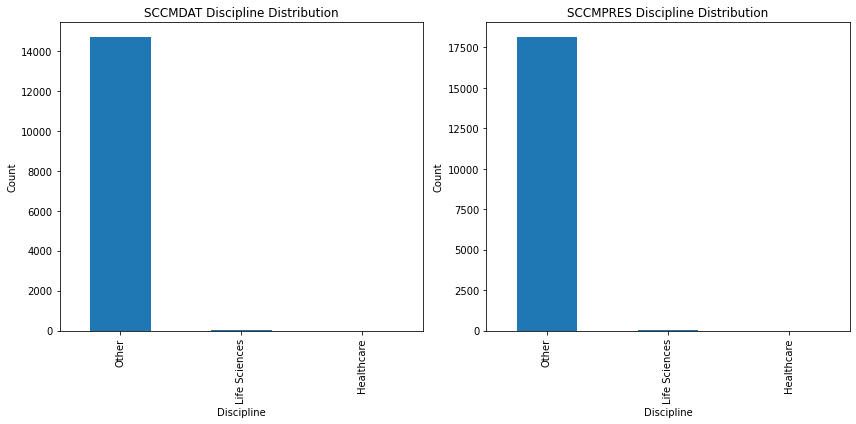

/tmp/ipykernel_69877/2131210640.py:90: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  ax = combined_data.apply(pd.value_counts).plot(kind='bar', figsize=(12, 6))
/tmp/ipykernel_69877/2131210640.py:90: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  ax = combined_data.apply(pd.value_counts).plot(kind='bar', figsize=(12, 6))


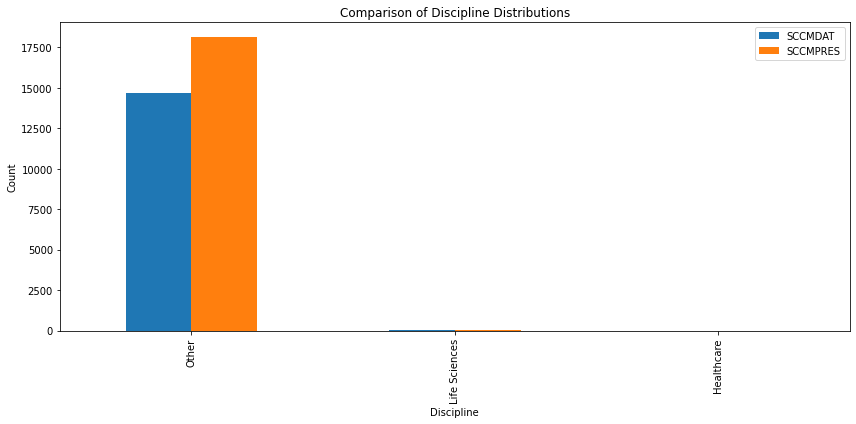

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, fisher_exact

# Load the datasets
sccmdat_df = pd.read_csv('SCCMDATupdated_FINALANALYSISCSV.csv')
sccmpres_df = pd.read_csv('SCCMPRESupdated_FINALANALYSIS_csv.csv')

# Preprocess the data
sccmdat_df['Highest Degree'] = sccmdat_df['Highest Degree'].astype(str).str.lower().str.strip()
sccmpres_df['Highest Degree'] = sccmpres_df['Highest Degree'].astype(str).str.lower().str.strip()

# Define the discipline categories and their corresponding keywords
disciplines = {
    'Computer Science': ['Computer Science', 'Computer Science', 'Data Science', 'Information Technology', 'Ph.D in Computer Applications', 'DITEN', 'Department of Electronic Engineering', 'Electrical and Computer', 'Computer science', 'Electrical Engineering and Computer Science', 'Biomedical Informatics / Intelligent Systems Program', 'School of computer sciemce and engineering', 'Biomedical Engineering', 'Electronics and Electrical Communication Engineering', 'Department of Applied Mathematics and Theoretical Physics (DAMTP)', 'ICT international doctoral school', 'Automotive Engineering Dept', 'Coordination Chemsitry Institute', 'Data Science', 'Information Technology', 'Ph.D in Computer Applications', 'Bioinformatics', 'Informatics'],
    'Engineering and Technology': ['Engineering', 'Engineering', 'Technology', 'M.Tech.', 'M.Sc in Electrical & Electronic Engineering', 'Material Science and Engineering.', 'Electrical & Electronic Engineering', 'Mechanical Engineering', 'Institute of Translational Medicine and Therapeutics', 'Environmental Science', 'Built Environment - Building Performance', 'Geoinformatics', 'Applied Linguistics and Communication ', 'Department of Mechanical Enfineering', 'Chemical engineering', ' Artificial Organ and Transplantation Division, Department of Surgery', 'Mechanical Engineering & Material Science', 'Chemical Engineering', 'Graduate Institute of Communication Engineering', 'Electrical Engineering', 'Environment and energy mechanical engineering', 'Technology', 'M.Tech.', 'M.Sc in Electrical & Electronic Engineering'],
    'Healthcare': ['MBBS', 'MD', 'MBBS', 'MD', 'Medicine', 'Surgery', 'Pediatrics', 'Nursing', 'Pharmacy', 'Dentistry', 'Physical Therapy', 'Public Health', 'Healthcare', 'Epidemiology', 'Faculty of Medicine', 'Medical Life System', 'Faculty of Medine and Surgery', 'Global Health and Development', 'Fac de Med', 'Medicine', 'Health Sciences in Clinical Research', 'College of Nursing', 'Andrology', 'Critical Care Department', 'Cardiovascular Medicine', 'Transplantation Surgery', 'Cardiology ', 'Vitreoretinal Diseases and Surgery', 'Endocrinology, Diabetes and Metabolism', 'Internal Medicine, Div of Hematology, Oncology and BMT', 'Intensive Care Department', 'Division of Rheumatolgy, Department of Internal Medicine', 'Medicine/Gastroenterology', 'Pediatric Critical Care Medicine', 'Epidemiology and Economics', 'Microbiology, Immunology and Pathology', 'Anesthesia and surgical intensive care medicine ', 'Anesthesiology, Intensive Therapy and Acute Intoxications', 'Pediatric Critical Care Medicine ', 'Internal medicine', 'Transfusion medicine', 'Infectious Diseases and Clinical Microbiology', 'Pulmonary and Critical Care Medicine', 'Department of Anesthesiology', 'Medical and Molecular Genetics', 'Medical Genetics', 'Hematology/ Nephrology and Hypertension', 'Medical Epidemiology and Biostatistics', 'Gastroenterology and Hepatology', 'hepatology', 'Cardiology', 'Critical Care Medicine', 'Pediatric Emergency Department', 'Internal Medicine Residency', 'Immunology & Infectious Diseases', 'Pulmonary/Critical Care Medicine', 'Orthepedics', 'Nephrology', 'Pathology', 'Neurosurgery', 'Transplant nephrology', 'Radiology', 'Otorhinolaryngology', 'Dermatology and Pathology', 'Endocrinology, Diabetes, Metabolism', 'Pulmonary & Criticla Care Medicine', 'Cardiovascular Sciences', 'Respiratory Therapy ', 'Hematology', 'Endocrinology, Diabetes and Metabolism', 'oncologic surgery', 'Critical Care Fellow ', 'Internal Medicine', 'Pulmonary and Critical Care', 'Emergency Medicine', 'Anesthesiology', 'Neurology', 'Surgery', 'Pulmonary, Allergy, Sleep and Critical Care', 'Cardiovascular Science', 'Vascular Neurology Fellow', 'Transplant Surgery', 'Clinical Pharmacology', 'Department of Anesthesiology & Pain Medicine', 'Pulmonary Sciences and Critical Care Medicine', 'Heamatology', 'Pulmonary and Critical Care Fellow', 'Transplant surgery', 'Gastroenterology/ Hepatology', 'Heider College of Business', 'Pediatric Nephrology', 'Internal medicine', 'Pulmonary & Critical Care Medicine', 'Neonatology Service', 'Pediatric neurology', 'Epilepsy/Neurology', 'Angiología y Cirugía Vascular', 'Posdoctor', 'Radiology', 'Pediatric Critical Care', 'Transplant Surgery', 'Gastroenterology/Hepatology', 'Emergency Medical Services', 'Pediatric Surgery', 'Neurophysiology / Epilepsy', 'Medicine ', 'Nephrology', 'Cardiology Fellowship', 'Pulmonary and Critical Care Medicine', 'Critical Care Fellow', 'Transplantation Surgery', 'Cardiology and Heart Failure Fellowship', 'Fellow-Transplantation Surgery', 'Cardiovascular Medicine', 'Transplantation Surgery ', 'Advanced Clinical Simulation Fellow', 'Pulmonary and Critical Care', 'Orthopaedics', 'Critical Care Medicine', 'Internal Medicine', 'Pulmonary and Critical Care Medicine', 'Thoracic Surgery', 'Cardiothoracic anesthesiology fellowship', 'Internal Medicine/Pediatrics', 'Neurocritical Care', 'Pediatric Critical Care Medicine', 'Pediatric Critical Care', 'Physical Medicine and Rehabilitation', 'Endovascular Surgical Neuroradiology', 'General Surgery', 'Anesthesia Critical Care Medicine', 'Critical Care Anesthesiology', 'Trauma', 'Clinical Immunology/Allergy', 'Surgical Critical Care', 'Sleep Medicine', 'Pediatric Hospital Medicine', 'Anesthesiology Critical Care Medicine', 'Anesthesiology and Critical Care Medicine', 'Clinical Cardiac Electrophysiology', 'Addiction Medicine', 'Abdominal Transplant Surgery', 'Neuroradiology', 'Medicine', 'Surgery', 'Pediatrics', 'Nursing', 'Pharmacy', 'Dentistry', 'Physical Therapy', 'Public Health', 'Healthcare', 'Epidemiology', 'Clinical', 'Pathology', 'Radiology', 'Oncology', 'Neurology', 'Cardiology', 'Pulmonary', 'Critical Care', 'Emergency Medicine', 'Hepatology', 'Gastroenterology', 'Hematology', 'Immunology', 'Infectious Disease', 'Nephrology', 'Psychiatry', 'Geriatrics', 'Palliative Care', 'Physiology', 'Anatomy', 'Medical', 'Doctor of Medicine', 'Fellowship'],
    'Life Sciences': ['Biology', 'Biochemistry', 'Biotechnology', 'Microbiology', 'Genetics', 'Immunology', 'Neuroscience', 'Physiology', 'Zoology', 'Biological Biomedical Sciences ', 'Bioquímica y Biología Molecular', 'Biosciences ', 'Animal Genetics', 'Crop Improvement', 'Plant Pathology', 'Entomology', 'Pharmaceutical Sciences', 'Biomedical Engineering ', 'Microbiology and Immunology', 'Pathobiology', 'Centre for Cancer Biomarkers and Biotherapeutics', 'National Laboratory of Biomacromolecules ', 'Histologia', 'biochemistry', 'Microbiology, Immunology and Pathology', 'Neuroscience', 'Physiology', 'Zoology', 'Ecology', 'Botany', 'Biomedical', 'Biophysics', 'Molecular Biology', 'Cell Biology', 'Immunology', 'Pharmacology', 'Toxicology', 'Nutrition', 'Food Science'],
    'Physical Sciences': ['Physics', 'Physics', 'Chemistry', 'Mathematics', 'Statistics', 'Mathematical Statistics', 'Physhics', 'Physics and Materials Science', 'Mathematics and Statistics', 'Computing and Mathematical Sciences', 'Biometry', 'Applied Mathematics', 'Mathematics', 'Institute of Metabolic Sciences', 'Physics and Astronomy', 'Department of Chemistry & Biochemistry', 'School of Mathematics and Statistics', 'Department of Applied Mathematics and Theoretical Physics (DAMTP)', 'School of Physics', 'Division of Statistics and Data Science', 'Department of Statistics', 'Department of Physics', 'Acoustics', 'Astrophysics', 'Atmospheric Science', 'Chemistry', 'Mathematics', 'Statistics'],
    'Social Sciences': ['Psychology', 'Sociology', 'Economics', 'Political Science', 'Anthropology', 'Geography', 'Demography'],
    'Arts and Humanities': ['Arts', 'Humanities', 'Literature', 'History', 'Philosophy', 'Music', 'Theology', 'Linguistics', 'Cultural Studies'],
    'Business and Management': ['Business', 'Business', 'Management', 'MBA', 'Finance', 'Accounting', 'Marketing', 'Dept. of Management', 'School of Economics and Management', 'Business School', 'Management sciences', 'Graduate School of Business and Law', 'Heider College of Business', 'Management', 'Kenan-Flagler School of Business', 'Faculty of Management', 'Faculty of Management', "Taylor's Business School", 'Kellogg School of Management', 'Business & Hotel Management School', 'Sloan School of Management', 'Management', 'MBA', 'Finance', 'Accounting', 'Marketing', 'Commerce', 'Taxation'],
    'Education': ['Education', 'Teaching', 'Pedagogy', 'Education', 'Teaching', 'Pedagogy', 'Curriculum and Instruction', 'Educational Leadership and Policy', 'Counseling Psychology', 'Higher Education Administration', 'Teacher Education', 'School of Education', 'Faculty of Education', 'Morgridge College of Education', 'College of Education', 'Early Childhood Education'],
    'Law': ['Law', 'Legal', 'Juris Doctor', 'J.D.', 'Law', 'Legal', 'Juris Doctor', 'J.D.', 'Transnational Law', 'Intellectual Property Law', 'International Law', 'Environmental Law', 'School of Law', 'Human Rights Law', 'Criminal Justice', 'Public Interest Law'],
    'Environmental Science': ['Environmental Science', 'Ecology', 'Sustainability', 'Environmental Science', 'Ecology', 'Sustainability', 'Forestry', 'Oceanography', 'Atmospheric Science', 'Earth Science', 'Geology', 'Marine Science', 'Natural Resources', 'Wildlife Conservation', 'Agronomy'],
    'Agriculture': ['Agriculture', 'Agronomy', 'Horticulture', 'Crop Science', 'Animal Science', 'Agricultural Economics', 'Plant Pathology', 'Soil Science', 'Entomology', 'Food Science', 'Agribusiness'],
    'Communication': ['Communication', 'Journalism', 'Media Studies', 'Communication Studies', 'Advertising', 'Public Relations', 'Mass Communication', 'Digital Media', 'Strategic Communication', 'Communication Arts', 'Telecommunication', 'Broadcast Journalism'],
    'Sports Science': ['Sports Science', 'Exercise Science', 'Kinesiology', 'Athletic Training', 'Physical Education', 'Sport Management', 'Exercise Physiology', 'Sports Medicine', 'Sport Psychology', 'Sport Sociology', 'Biomechanics', 'Sports Science', 'Exercise Science', 'Kinesiology', 'Athletic Training', 'Physical Education', 'Sport Management', 'Exercise Physiology', 'Sports Medicine', 'Sport Psychology', 'Sport Sociology', 'Biomechanics'],
    'Library Science': ['Library Science', 'Information Science', 'Information Studies'],
    'Astronomy': ['Astronomy', 'Astrophysics'],
    'Earth Sciences': ['Earth Science', 'Geology', 'Geophysics', 'Meteorology', 'Oceanography'],
    'Architecture': ['Architecture', 'Urban Planning', 'Landscape Architecture'],
    'Social Work': ['Social Work'],
    'Communication': ['Communication', 'Journalism', 'Media Studies', 'Communication Studies', 'Advertising', 'Public Relations', 'Mass Communication', 'Digital Media', 'Strategic Communication', 'Communication Arts', 'Telecommunication', 'Broadcast Journalism'],
    'Veterinary Science': ['Veterinary', 'Animal Science'],
    'Criminology': ['Criminology', 'Criminal Justice'],
    'Divinity': ['Divinity', 'Theology', 'Religious Studies'],
    'Linguistics': ['Linguistics', 'Applied Linguistics'],
    'Library Science': ['Library Science', 'Information Science', 'Library and Information Studies', 'Archival Science', 'Records Management', 'Knowledge Management', 'Information Organization', 'Digital Curation', 'Data Stewardship'],
    'Interdisciplinary': ['Interdisciplinary Studies', 'Multidisciplinary Studies', 'Liberal Studies', 'General Studies', 'Integrated Science', 'Cognitive Science', 'Science, Technology, and Society', 'Bioethics', 'Medical Humanities', 'Environmental Studies', 'Global Studies', 'Women\'s Studies', 'African American Studies', 'Asian Studies', 'Latin American Studies', 'Middle Eastern Studies', 'Neuroscience', 'Bioinformatics', 'Computational Biology', 'Systems Biology', 'Nanoscience', 'Nanotechnology', 'Materials Science', 'Network Science']
}

def categorize_discipline(degree):
    for discipline, keywords in disciplines.items():
        if any(keyword in degree for keyword in keywords):
            return discipline
    return 'Other'

# Categorize the degrees into disciplines
sccmdat_df['Discipline'] = sccmdat_df['Highest Degree'].apply(categorize_discipline)
sccmpres_df['Discipline'] = sccmpres_df['Highest Degree'].apply(categorize_discipline)

# Calculate the frequency distribution of disciplines for each dataset
sccmdat_discipline_counts = sccmdat_df['Discipline'].value_counts()
sccmpres_discipline_counts = sccmpres_df['Discipline'].value_counts()

# Perform chi-square test
observed = pd.crosstab(sccmdat_df['Discipline'], sccmpres_df['Discipline'])
chi2, p, dof, expected = chi2_contingency(observed)

# Print the results
print("Discipline Distribution in SCCMDAT:")
print(sccmdat_discipline_counts)
print("\nDiscipline Distribution in SCCMPRES:")
print(sccmpres_discipline_counts)
print("\nChi-square test results:")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p:.4f}")

# Visualize the distributions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sccmdat_discipline_counts.plot(kind='bar', ax=ax1)
ax1.set_title('SCCMDAT Discipline Distribution')
ax1.set_xlabel('Discipline')
ax1.set_ylabel('Count')

sccmpres_discipline_counts.plot(kind='bar', ax=ax2)
ax2.set_title('SCCMPRES Discipline Distribution')
ax2.set_xlabel('Discipline')
ax2.set_ylabel('Count')

plt.tight_layout()
plt.show()

# Visualize the comparison of discipline distributions
combined_data = pd.concat([sccmdat_df['Discipline'], sccmpres_df['Discipline']], axis=1)
combined_data.columns = ['SCCMDAT', 'SCCMPRES']

ax = combined_data.apply(pd.value_counts).plot(kind='bar', figsize=(12, 6))
ax.set_xlabel('Discipline')
ax.set_ylabel('Count')
ax.set_title('Comparison of Discipline Distributions')
ax.legend(['SCCMDAT', 'SCCMPRES'])

plt.tight_layout()
plt.show()

### Comparison of discipline distribution of the authors in 2017 and 2023

In [99]:
# Filter the data for years 2017 and 2023
mask = sccmdat_df['Year'].isin([2017, 2023])
filtered_data = sccmdat_df[mask]

# Split the data into 2017 and 2023
data_2017 = filtered_data[filtered_data['Year'] == 2017]
data_2023 = filtered_data[filtered_data['Year'] == 2023]

# Categorize disciplines and count for each year
data_2017['Discipline'] = data_2017['Highest Degree'].apply(categorize_discipline)
data_2023['Discipline'] = data_2023['Highest Degree'].apply(categorize_discipline)

discipline_counts_2017 = data_2017['Discipline'].value_counts()
discipline_counts_2023 = data_2023['Discipline'].value_counts()

# Perform chi-square test
observed = pd.crosstab(discipline_counts_2017, discipline_counts_2023)
chi2, p, dof, expected = chi2_contingency(observed)

# Print the results
print("sccmdat Discipline Distribution in 2017:")
print(discipline_counts_2017)
print("sccmdat \nDiscipline Distribution in 2023:")
print(discipline_counts_2023)
print("sccmdat \nChi-square test results:")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p:.4f}")

# Interpretation of the result
if p < 0.05:
    print("\nInterpretation: There is a statistically significant difference in the sccmdat distribution of disciplines between 2017 and 2023 (p < 0.05).")
else:
    print("\nInterpretation: There is no statistically significant difference in the sccmdat distribution of disciplines between 2017 and 2023 (p >= 0.05).")


sccmdat Discipline Distribution in 2017:
Discipline
Other                  596
Healthcare              16
Arts and Humanities      6
Library Science          3
Computer Science         1
Physical Sciences        1
Name: count, dtype: int64
sccmdat 
Discipline Distribution in 2023:
Discipline
Other                         1359
Healthcare                      59
Physical Sciences               11
Life Sciences                   10
Arts and Humanities              7
Computer Science                 5
Engineering and Technology       3
Social Sciences                  1
Name: count, dtype: int64
sccmdat 
Chi-square test results:
Chi-square statistic: 15.00
p-value: 0.2414

Interpretation: There is no statistically significant difference in the sccmdat distribution of disciplines between 2017 and 2023 (p >= 0.05).


/tmp/ipykernel_49669/1812702821.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2017['Discipline'] = data_2017['Highest Degree'].apply(categorize_discipline)
/tmp/ipykernel_49669/1812702821.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2023['Discipline'] = data_2023['Highest Degree'].apply(categorize_discipline)


In [100]:
# Filter the data for years 2017 and 2023
mask = sccmpres_df['Year'].isin([2017, 2023])
filtered_data = sccmdat_df[mask]

# Split the data into 2017 and 2023
data_2017 = filtered_data[filtered_data['Year'] == 2017]
data_2023 = filtered_data[filtered_data['Year'] == 2023]

# Categorize disciplines and count for each year
data_2017['Discipline'] = data_2017['Highest Degree'].apply(categorize_discipline)
data_2023['Discipline'] = data_2023['Highest Degree'].apply(categorize_discipline)

discipline_counts_2017 = data_2017['Discipline'].value_counts()
discipline_counts_2023 = data_2023['Discipline'].value_counts()

# Perform chi-square test
observed = pd.crosstab(discipline_counts_2017, discipline_counts_2023)
chi2, p, dof, expected = chi2_contingency(observed)

# Print the results
print("sccmpres Discipline Distribution in 2017:")
print(discipline_counts_2017)
print("sccmpres \nDiscipline Distribution in 2023:")
print(discipline_counts_2023)
print("sccmpres \nChi-square test results:")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p:.4f}")

# Interpretation of the result
if p < 0.05:
    print("\nInterpretation: There is a statistically significant difference in the sccmpres distribution of disciplines between 2017 and 2023 (p < 0.05).")
else:
    print("\nInterpretation: There is no statistically significant difference in the sccmpres distribution of disciplines between 2017 and 2023 (p >= 0.05).")


sccmpres Discipline Distribution in 2017:
Discipline
Other         70
Healthcare     4
Name: count, dtype: int64
sccmpres 
Discipline Distribution in 2023:
Discipline
Other                158
Healthcare             4
Physical Sciences      1
Computer Science       1
Name: count, dtype: int64
sccmpres 
Chi-square test results:
Chi-square statistic: 0.00
p-value: 1.0000

Interpretation: There is no statistically significant difference in the sccmpres distribution of disciplines between 2017 and 2023 (p >= 0.05).


/tmp/ipykernel_49669/1029196553.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_data = sccmdat_df[mask]
/tmp/ipykernel_49669/1029196553.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2017['Discipline'] = data_2017['Highest Degree'].apply(categorize_discipline)
/tmp/ipykernel_49669/1029196553.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2023['Discipline'] = data_2023['Highest Degree'].apply(categorize_discipline)


In [101]:
import pandas as pd
import math

# Load the dataset
sccmdat_df = pd.read_csv('SCCMDATupdated_FINALANALYSISCSV.csv')

# Preprocess the data
sccmdat_df['Highest Degree'] = sccmdat_df['Highest Degree'].astype(str).str.lower().str.strip()

# Define the discipline categories and their corresponding keywords
disciplines = {
    'Computer Science': ['computer science', 'data science', 'information technology', 'ph.d in computer applications', 'bioinformatics', 'informatics'],
    'Engineering and Technology': ['engineering', 'technology', 'm.tech.', 'm.sc in electrical & electronic engineering'],
    'Healthcare': ['mbbs', 'md', 'medicine', 'surgery', 'pediatrics', 'nursing', 'pharmacy', 'dentistry', 'physical therapy', 'public health', 'healthcare', 'epidemiology', 'clinical', 'pathology', 'radiology', 'oncology', 'neurology', 'cardiology', 'pulmonary', 'critical care', 'emergency medicine', 'hepatology', 'gastroenterology', 'hematology', 'immunology', 'infectious disease', 'nephrology', 'psychiatry', 'geriatrics', 'palliative care', 'physiology', 'anatomy', 'medical', 'doctor of medicine', 'fellowship'],
    'Life Sciences': ['biology', 'biochemistry', 'biotechnology', 'microbiology', 'genetics', 'neuroscience', 'physiology', 'zoology', 'ecology', 'botany', 'biomedical', 'biophysics', 'molecular biology', 'cell biology', 'immunology', 'pharmacology', 'toxicology', 'nutrition', 'food science'],
    'Physical Sciences': ['physics', 'chemistry', 'mathematics', 'statistics'],
    'Social Sciences': ['psychology', 'sociology', 'economics', 'political science', 'anthropology', 'geography', 'demography'],
    'Arts and Humanities': ['arts', 'humanities', 'literature', 'history', 'philosophy', 'music', 'theology', 'linguistics', 'cultural studies'],
    'Business and Management': ['business', 'management', 'mba', 'finance', 'accounting', 'marketing', 'commerce', 'taxation'],
    'Education': ['education', 'teaching', 'pedagogy'],
    'Law': ['law', 'legal', 'juris doctor', 'j.d.'],
    'Environmental Science': ['environmental science', 'ecology', 'sustainability'],
    'Agriculture': ['agriculture', 'agronomy', 'horticulture', 'forestry'],
    'Communication': ['communication', 'journalism', 'media studies'],
    'Sports Science': ['sports science', 'exercise science', 'kinesiology'],
    'Library Science': ['library science', 'information science', 'information studies']
}

def categorize_discipline(degree):
    for discipline, keywords in disciplines.items():
        if any(keyword in degree for keyword in keywords):
            return discipline
    return 'Other'

def calculate_discipline_diversity_score(df):
    # Count the occurrences of each discipline
    discipline_counts = df['Discipline'].value_counts()
    total_count = discipline_counts.sum()

    # Calculate the entropy
    entropy = 0
    for count in discipline_counts:
        proportion = count / total_count
        entropy -= proportion * math.log(proportion, 2)  # Using base 2 for bits

    # Normalize the entropy to a range of 0 to 1
    max_entropy = math.log(len(discipline_counts), 2)
    normalized_entropy = entropy / max_entropy

    return normalized_entropy

# Filter the data for years 2017 and 2023
mask = sccmdat_df['Year'].isin([2017, 2023])
filtered_data = sccmdat_df[mask]

# Split the data into 2017 and 2023
data_2017 = filtered_data[filtered_data['Year'] == 2017]
data_2023 = filtered_data[filtered_data['Year'] == 2023]

# Categorize disciplines and calculate diversity scores for each year
data_2017['Discipline'] = data_2017['Highest Degree'].apply(categorize_discipline)
data_2023['Discipline'] = data_2023['Highest Degree'].apply(categorize_discipline)

diversity_score_2017 = calculate_discipline_diversity_score(data_2017)
diversity_score_2023 = calculate_discipline_diversity_score(data_2023)

# Print the results
print("SCCMDAT Discipline Diversity Score in 2017:", diversity_score_2017)
print("SCCMDAT Discipline Diversity Score in 2023:", diversity_score_2023)

SCCMDAT Discipline Diversity Score in 2017: 0.12696903017404226
SCCMDAT Discipline Diversity Score in 2023: 0.15764350588603537


/tmp/ipykernel_49669/3120745418.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2017['Discipline'] = data_2017['Highest Degree'].apply(categorize_discipline)
/tmp/ipykernel_49669/3120745418.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2023['Discipline'] = data_2023['Highest Degree'].apply(categorize_discipline)


In [102]:
import pandas as pd
import math

# Load the dataset
sccmdpres_df = pd.read_csv('SCCMPRESupdated_FINALANALYSIS_csv.csv')

# Preprocess the data
sccmdpres_df['Highest Degree'] = sccmdpres_df['Highest Degree'].astype(str).str.lower().str.strip()

# Define the discipline categories and their corresponding keywords
disciplines = {
    'Computer Science': ['computer science', 'data science', 'information technology', 'ph.d in computer applications', 'bioinformatics', 'informatics'],
    'Engineering and Technology': ['engineering', 'technology', 'm.tech.', 'm.sc in electrical & electronic engineering'],
    'Healthcare': ['mbbs', 'md', 'medicine', 'surgery', 'pediatrics', 'nursing', 'pharmacy', 'dentistry', 'physical therapy', 'public health', 'healthcare', 'epidemiology', 'clinical', 'pathology', 'radiology', 'oncology', 'neurology', 'cardiology', 'pulmonary', 'critical care', 'emergency medicine', 'hepatology', 'gastroenterology', 'hematology', 'immunology', 'infectious disease', 'nephrology', 'psychiatry', 'geriatrics', 'palliative care', 'physiology', 'anatomy', 'medical', 'doctor of medicine', 'fellowship'],
    'Life Sciences': ['biology', 'biochemistry', 'biotechnology', 'microbiology', 'genetics', 'neuroscience', 'physiology', 'zoology', 'ecology', 'botany', 'biomedical', 'biophysics', 'molecular biology', 'cell biology', 'immunology', 'pharmacology', 'toxicology', 'nutrition', 'food science'],
    'Physical Sciences': ['physics', 'chemistry', 'mathematics', 'statistics'],
    'Social Sciences': ['psychology', 'sociology', 'economics', 'political science', 'anthropology', 'geography', 'demography'],
    'Arts and Humanities': ['arts', 'humanities', 'literature', 'history', 'philosophy', 'music', 'theology', 'linguistics', 'cultural studies'],
    'Business and Management': ['business', 'management', 'mba', 'finance', 'accounting', 'marketing', 'commerce', 'taxation'],
    'Education': ['education', 'teaching', 'pedagogy'],
    'Law': ['law', 'legal', 'juris doctor', 'j.d.'],
    'Environmental Science': ['environmental science', 'ecology', 'sustainability'],
    'Agriculture': ['agriculture', 'agronomy', 'horticulture', 'forestry'],
    'Communication': ['communication', 'journalism', 'media studies'],
    'Sports Science': ['sports science', 'exercise science', 'kinesiology'],
    'Library Science': ['library science', 'information science', 'information studies']
}

def categorize_discipline(degree):
    for discipline, keywords in disciplines.items():
        if any(keyword in degree for keyword in keywords):
            return discipline
    return 'Other'

def calculate_discipline_diversity_score(df):
    # Count the occurrences of each discipline
    discipline_counts = df['Discipline'].value_counts()
    total_count = discipline_counts.sum()

    # Calculate the entropy
    entropy = 0
    for count in discipline_counts:
        proportion = count / total_count
        entropy -= proportion * math.log(proportion, 2)  # Using base 2 for bits

    # Normalize the entropy to a range of 0 to 1
    max_entropy = math.log(len(discipline_counts), 2)
    normalized_entropy = entropy / max_entropy

    return normalized_entropy

# Filter the data for years 2017 and 2023
mask = sccmdpres_df['Year'].isin([2017, 2023])
filtered_data = sccmdpres_df[mask]

# Split the data into 2017 and 2023
data_2017 = filtered_data[filtered_data['Year'] == 2017]
data_2023 = filtered_data[filtered_data['Year'] == 2023]

# Categorize disciplines and calculate diversity scores for each year
data_2017['Discipline'] = data_2017['Highest Degree'].apply(categorize_discipline)
data_2023['Discipline'] = data_2023['Highest Degree'].apply(categorize_discipline)

diversity_score_2017 = calculate_discipline_diversity_score(data_2017)
diversity_score_2023 = calculate_discipline_diversity_score(data_2023)

# Print the results
print("SCCMPRES Discipline Diversity Score in 2017:", diversity_score_2017)
print("SCCMPRES Discipline Diversity Score in 2023:", diversity_score_2023)

SCCMPRES Discipline Diversity Score in 2017: 0.12575867446873612
SCCMPRES Discipline Diversity Score in 2023: 0.11710257957821667


/tmp/ipykernel_49669/3358926418.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2017['Discipline'] = data_2017['Highest Degree'].apply(categorize_discipline)
/tmp/ipykernel_49669/3358926418.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2023['Discipline'] = data_2023['Highest Degree'].apply(categorize_discipline)


In [103]:
import pandas as pd
from scipy.stats import chi2_contingency

# Discipline diversity scores
sccmdat_diversity_score_2017 = 0.12696903017404226
sccmdat_diversity_score_2023 = 0.15764350588603537
sccmpres_diversity_score_2017 = 0.12575867446873612
sccmpres_diversity_score_2023 = 0.11710257957821667

# Create a DataFrame to hold the diversity scores
data = pd.DataFrame({
    'Year': [2017, 2017, 2023, 2023],
    'Group': ['SCCMDAT', 'SCCMPRES', 'SCCMDAT', 'SCCMPRES'],
    'Diversity Score': [sccmdat_diversity_score_2017, sccmpres_diversity_score_2017,
                        sccmdat_diversity_score_2023, sccmpres_diversity_score_2023]
})

# Print the diversity scores
print("SCCMDAT Discipline Diversity Score in 2017:", sccmdat_diversity_score_2017)
print("SCCMDAT Discipline Diversity Score in 2023:", sccmdat_diversity_score_2023)
print("SCCMPRES Discipline Diversity Score in 2017:", sccmpres_diversity_score_2017)
print("SCCMPRES Discipline Diversity Score in 2023:", sccmpres_diversity_score_2023)

# Perform chi-square test
observed = pd.crosstab(data['Year'], data['Group'])
chi2, p, dof, expected = chi2_contingency(observed)

# Print the results
print("\nChi-square Test Results:")
print("Observed Contingency Table:")
print(observed)
print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-Value: {p:.4f}")

# Interpretation
if p < 0.05:
    print("\nInterpretation: There is a statistically significant difference in the discipline diversity scores between SCCMDAT and SCCMPRES for the years 2017 and 2023 (p < 0.05).")
else:
    print("\nInterpretation: There is no statistically significant difference in the discipline diversity scores between SCCMDAT and SCCMPRES for the years 2017 and 2023 (p >= 0.05).")

SCCMDAT Discipline Diversity Score in 2017: 0.12696903017404226
SCCMDAT Discipline Diversity Score in 2023: 0.15764350588603537
SCCMPRES Discipline Diversity Score in 2017: 0.12575867446873612
SCCMPRES Discipline Diversity Score in 2023: 0.11710257957821667

Chi-square Test Results:
Observed Contingency Table:
Group  SCCMDAT  SCCMPRES
Year                    
2017         1         1
2023         1         1
Chi-square statistic: 0.0000
P-Value: 1.0000

Interpretation: There is no statistically significant difference in the discipline diversity scores between SCCMDAT and SCCMPRES for the years 2017 and 2023 (p >= 0.05).


In [1]:
import pandas as pd
from scipy.stats import chi2_contingency

# Discipline diversity scores
sccmdat_diversity_score_2017 = 0.12696903017404226
sccmdat_diversity_score_2023 = 0.15764350588603537
sccmpres_diversity_score_2017 = 0.12575867446873612
sccmpres_diversity_score_2023 = 0.11710257957821667

# Create a DataFrame to hold the diversity scores
data = pd.DataFrame({
    'Year': [2017, 2017, 2023, 2023],
    'Group': ['SCCMDAT', 'SCCMPRES', 'SCCMDAT', 'SCCMPRES'],
    'Diversity Score': [sccmdat_diversity_score_2017, sccmpres_diversity_score_2017,
                        sccmdat_diversity_score_2023, sccmpres_diversity_score_2023]
})

# Print the diversity scores
print("SCCMDAT Discipline Diversity Score in 2017:", sccmdat_diversity_score_2017)
print("SCCMDAT Discipline Diversity Score in 2023:", sccmdat_diversity_score_2023)
print("SCCMPRES Discipline Diversity Score in 2017:", sccmpres_diversity_score_2017)
print("SCCMPRES Discipline Diversity Score in 2023:", sccmpres_diversity_score_2023)

# Perform chi-square test of independence
contingency_table = pd.crosstab(data['Group'], data['Diversity Score'] >= 0.5)
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("\nChi-square Test of Independence Results:")
print("Contingency Table:")
print(contingency_table)
print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-Value: {p:.4f}")

# Interpretation
if p < 0.05:
    print("\nInterpretation: There is a statistically significant difference in the discipline diversity scores between SCCMDAT and SCCMPRES across the years 2017 and 2023 (p < 0.05).")
else:
    print("\nInterpretation: There is no statistically significant difference in the discipline diversity scores between SCCMDAT and SCCMPRES across the years 2017 and 2023 (p >= 0.05).")

SCCMDAT Discipline Diversity Score in 2017: 0.12696903017404226
SCCMDAT Discipline Diversity Score in 2023: 0.15764350588603537
SCCMPRES Discipline Diversity Score in 2017: 0.12575867446873612
SCCMPRES Discipline Diversity Score in 2023: 0.11710257957821667

Chi-square Test of Independence Results:
Contingency Table:
Diversity Score  False
Group                 
SCCMDAT              2
SCCMPRES             2
Chi-square statistic: 0.0000
P-Value: 1.0000

Interpretation: There is no statistically significant difference in the discipline diversity scores between SCCMDAT and SCCMPRES across the years 2017 and 2023 (p >= 0.05).


Usage of Dimensions tool to extract Author details:

https://community.crossref.org/t/retrieving-doi-from-title-author-and-year/3125
https://stackoverflow.com/questions/61850966/getting-doi-from-article-title
https://academia.stackexchange.com/questions/2169/how-can-i-get-the-doi-of-a-paper-from-its-title
https://drive.google.com/drive/folders/1mJe5Y9CZxYjAPUNZ-0XW2uEVgz70yBjx?usp=sharing

In [ ]:
import pandas as pd

# Read the CSV files
df1 = pd.read_csv('old_csv.csv')
df2 = pd.read_csv('new_csv.csv')

# Create a dictionary to map names to departments from df2
name_to_dept = {}
for _, row in df2.iterrows():
    name = row['name'].lower()
    department = row['department']
    name_to_dept[name] = department

# Function to find the matching department
def find_department(row):
    names = [
        row['Co-Author Name'].lower() if pd.notna(row['Co-Author Name']) else '',
        row['Author Name'].lower() if pd.notna(row['Author Name']) else ''
    ]
    
    for name in names:
        if name in name_to_dept:
            return name_to_dept[name]
    return 'Not Found'

# Apply the function to create a new column in df1
df1['Matched Department'] = df1.apply(find_department, axis=1)

# Save the updated df1 to a new CSV file
df1.to_csv('updated_old_csv.csv', index=False)

print("CSV files have been processed and merged. The result is saved in 'updated_old_csv.csv'.")

### Web crawling

In [1]:
!pip install selenium pandas

Defaulting to user installation because normal site-packages is not writeable


#### Linkedin scraper

#### Linkedin API profile fetcher

In [3]:
!pip install pandas linkedin-api

Defaulting to user installation because normal site-packages is not writeable


In [4]:
import pandas as pd
from linkedin_api import Linkedin
import time

def setup_linkedin_api(email, password):
    return Linkedin(email, password)

def get_linkedin_profile(api, name):
    try:
        # Search for the profile
        search_results = api.search_people(keywords=name)
        if not search_results:
            return None, None

        # Get the first search result (assuming it's the most relevant)
        profile_urn = search_results[0]['urn_id']
        
        # Fetch the full profile
        profile = api.get_profile(profile_urn)
        
        # Extract relevant information
        profile_info = f"{profile.get('firstName', '')} {profile.get('lastName', '')}"
        profile_info += f"\n{profile.get('headline', '')}"
        profile_info += f"\n{profile.get('locationName', '')}"
        
        # Extract education information
        education_info = []
        for edu in profile.get('education', []):
            school = edu.get('schoolName', '')
            degree = edu.get('degreeName', '')
            field = edu.get('fieldOfStudy', '')
            education_info.append(f"{school} - {degree} {field}".strip())
        
        education_info = '\n'.join(education_info) if education_info else "No education information found"
        
        return profile_info, education_info
    except Exception as e:
        print(f"Error fetching profile for {name}: {str(e)}")
        return None, None

def main():
    # LinkedIn API credentials
    email = "deepupemmasani@gmail.com"
    password = "reactor2615"
    
    # Set up LinkedIn API
    api = setup_linkedin_api(email, password)
    
    # Read the CSV file
    file_path = 'dne_dataset_researchers_sources_combined.csv'
    df = pd.read_csv(file_path)
    
    # Process only rows 3238 to 3788
    start_index = 3238
    end_index = 3788
    df = df.iloc[start_index:end_index].copy()
    
    # Add new columns for LinkedIn data
    df['linkedin_profile_info'] = ''
    df['linkedin_education'] = ''
    
    for index, row in df.iterrows():
        name = row['name']
        print(f"Processing {name}...")
        
        profile_info, education_info = get_linkedin_profile(api, name)
        
        if profile_info and education_info:
            df.at[index, 'linkedin_profile_info'] = profile_info
            df.at[index, 'linkedin_education'] = education_info
            print(f"Profile info found for {name}")
        else:
            print(f"No profile info found for {name}")
        
        # Save progress every 10 profiles
        if (index - start_index + 1) % 10 == 0:
            temp_output_file = f'dne_dataset_researchers_linkedin_temp_{index}.csv'
            df.to_csv(temp_output_file, index=False)
            print(f"Progress saved to {temp_output_file}")
        
        # Sleep to avoid hitting rate limits
        time.sleep(60)
    
    # Save the final results
    output_file = 'dne_dataset_researchers_linkedin_3238_3788.csv'
    df.to_csv(output_file, index=False)
    print(f"Final results saved to {output_file}")

if __name__ == "__main__":
    main()

ChallengeException: CHALLENGE

In [5]:
!pip install pandas selenium linkedin-api

Defaulting to user installation because normal site-packages is not writeable


In [9]:
!pip install pandas selenium requests

Defaulting to user installation because normal site-packages is not writeable


In [5]:
import pandas as pd
import re

def parse_linkedin_data(linkedin_text):
    profiles = []
    current_profile = {}
    for line in linkedin_text.split('\n'):
        if line.startswith('Profile Name for'):
            if current_profile:
                profiles.append(current_profile)
            name_match = re.search(r'Profile Name for .+?: (.+)', line)
            if name_match:
                current_profile = {'name': name_match.group(1)}
        elif line.startswith('Education Info for'):
            education_match = re.search(r'Education Info for .+?: (.+)', line)
            if education_match:
                current_profile['education'] = education_match.group(1)
    if current_profile:
        profiles.append(current_profile)
    print(f"Parsed {len(profiles)} profiles from LinkedIn data")
    print("First 5 profiles:", profiles[:5])
    return profiles

def update_csv_with_linkedin_data(csv_path, linkedin_data, output_path):
    try:
        # Read the CSV file
        df = pd.read_csv(csv_path)
        print(f"Read CSV file with {len(df)} rows")
        print("First 5 rows of CSV:", df.head())
        
        # Create new column for LinkedIn education data if it doesn't exist
        if 'linkedin_education' not in df.columns:
            df['linkedin_education'] = ''
        
        # Create a dictionary of LinkedIn profiles for easy lookup
        linkedin_profiles = {profile['name'].lower(): profile for profile in linkedin_data}
        
        # Update the DataFrame with LinkedIn data
        match_count = 0
        for index, row in df.iterrows():
            name = row['name'].lower()
            # Try to match with full name
            if name in linkedin_profiles:
                df.at[index, 'linkedin_education'] = linkedin_profiles[name].get('education', '')
                match_count += 1
            else:
                # Try to match with first name
                first_name = name.split()[0]
                matches = [profile for profile_name, profile in linkedin_profiles.items() if profile_name.lower().startswith(first_name)]
                if matches:
                    df.at[index, 'linkedin_education'] = matches[0].get('education', '')
                    match_count += 1
        
        print(f"Matched {match_count} profiles")
        print("First 5 rows after update:", df.head())
        
        # Save the updated DataFrame to a new CSV file
        df.to_csv(output_path, index=False)
        print(f"Updated CSV saved to {output_path}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# Read the LinkedIn data from a file
with open('linkedin_output.txt', 'r', encoding='utf-8') as file:
    linkedin_text = file.read()

linkedin_data = parse_linkedin_data(linkedin_text)

# Update these paths to match your file locations
input_csv_path = 'dne_dataset_researchers_sources_combined.csv'
output_csv_path = 'dne_dataset_researchers_sources_combined_updated.csv'

update_csv_with_linkedin_data(input_csv_path, linkedin_data, output_csv_path)

Parsed 0 profiles from LinkedIn data
First 5 profiles: []
Read CSV file with 4309 rows
First 5 rows of CSV:                  orcid       type                  name  gender   latitude  \
0  0000-0002-6862-0658     author  Chrystinne Fernandes  female  40.444153   
1  0000-0002-6862-0658  co_author        Salah Al-Zaiti  female  36.858403   
2  0000-0002-6862-0658  co_author           Salah Zaiti  female  36.858403   
3  0000-0003-3459-1462     author        A. Fahim Habib  female  55.861881   
4  0000-0003-3459-1462  co_author               A Habib  female  51.517635   

   longitude                              affiliation cr_highest_degree  \
0 -79.962461                 University of Pittsburgh          ANP, PHD   
1 -76.305431  University of Pittsburgh Medical Center          ANP, PHD   
2 -76.305431  University of Pittsburgh Medical Center          ANP, PHD   
3  -4.241957                University of Strathclyde             Ph.D.   
4  -0.236224                     Hammersmith Hos

In [1]:
import csv
import re

def parse_linkedin_data(linkedin_text):
    profiles = []
    current_profile = {}
    
    for line in linkedin_text.split('\n'):
        if line.startswith('Profile Name for'):
            if current_profile:
                profiles.append(current_profile)
            name_match = re.search(r'Profile Name for (.+?): (.+)', line)
            if name_match:
                current_profile = {
                    'name': name_match.group(2),
                    'profile_name': name_match.group(1)
                }
        elif line.startswith('Education Info for'):
            education_match = re.search(r'Education Info for .+?: (.+)', line)
            if education_match:
                current_profile['education'] = education_match.group(1)
        elif 'Contact info' in line:
            location_match = re.search(r'(.+?)\s*Contact info', line)
            if location_match:
                current_profile['location'] = location_match.group(1).strip()
        elif not line.startswith(('Profile Info:', 'Education Info for')):
            if 'current_position' not in current_profile:
                current_profile['current_position'] = line.strip()
    
    if current_profile:
        profiles.append(current_profile)
    
    return profiles

def create_csv_from_linkedin_data(linkedin_data, output_file):
    fieldnames = ['name', 'profile_name', 'current_position', 'location', 'education']
    
    with open(output_file, 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        for profile in linkedin_data:
            writer.writerow({
                'name': profile.get('name', ''),
                'profile_name': profile.get('profile_name', ''),
                'current_position': profile.get('current_position', ''),
                'location': profile.get('location', ''),
                'education': profile.get('education', '')
            })

# Read the LinkedIn data from a file
with open('linkedin_output.txt', 'r', encoding='utf-8') as file:
    linkedin_text = file.read()

linkedin_data = parse_linkedin_data(linkedin_text)

# Create CSV file
output_csv_file = 'linkedin_profiles.csv'
create_csv_from_linkedin_data(linkedin_data, output_csv_file)

print(f"CSV file '{output_csv_file}' has been created with {len(linkedin_data)} profiles.")

CSV file 'linkedin_profiles.csv' has been created with 1 profiles.


In [4]:
import pandas as pd
import re

def parse_linkedin_data(linkedin_text):
    profiles = []
    current_profile = {}
    for line in linkedin_text.split('\n'):
        if line.startswith('Profile Name for'):
            if current_profile:
                profiles.append(current_profile)
            name = line.split('Profile Name for ')[1].split(':')[0].strip()
            current_profile = {'name': name}
        elif line.startswith('Education Info for'):
            education = line.split('Education Info for')[1].split(':', 1)[1].strip()
            current_profile['education'] = education
    if current_profile:
        profiles.append(current_profile)
    return profiles

def create_csv_from_linkedin_data(linkedin_data, output_path):
    df = pd.DataFrame(linkedin_data)
    df.to_csv(output_path, index=False)
    print(f"CSV file created at {output_path}")

# Read the LinkedIn data from the provided text
linkedin_text = """
Profile Info: Stephanie Cabral
Arquiteta Urbanista
Estúdio Zargos
Universidade Federal de Minas Gerais
Belo Horizonte, Minas Gerais, Brazil Contact info
Education Info: Bacharelado, Arquitetura e Urbanismo
Bacharelado, Arquitetura e Urbanismo
Profile Name for Stephanie Cabral: Stephanie Cabral
Arquiteta Urbanista
Estúdio Zargos
Universidade Federal de Minas Gerais
Belo Horizonte, Minas Gerais, Brazil Contact info
Education Info for Stephanie Cabral: Bacharelado, Arquitetura e Urbanismo
Bacharelado, Arquitetura e Urbanismo
# ... (rest of the provided LinkedIn text)
"""

linkedin_data = parse_linkedin_data(linkedin_text)

# Create a new CSV file with the extracted data
output_csv_path = 'linkedin_profiles.csv'
create_csv_from_linkedin_data(linkedin_data, output_csv_path)

# Print out the extracted data for review
for profile in linkedin_data:
    print(f"Name: {profile['name']}")
    print(f"Education: {profile['education']}")
    print()

CSV file created at linkedin_profiles.csv
Name: Stephanie Cabral
Education: Bacharelado, Arquitetura e Urbanismo



## Gender analysis - Calculation of Gini Impurity scores per publication 

### Loading and explore datasets

In [16]:
SCCMDAT = pd.read_csv("SCCMDATupdated_FINALANALYSISCSV_Gender analysis.csv")
SCCMPRES = pd.read_csv("SCCMPRESupdated_FINALANALYSIS_csv_Gender analysis.csv")

In [17]:
SCCMDAT.head()

,Co-Author Name,Co-Author Affiliation,Co-Author Latitude_from_df2,Co-Author Longitude_from_df2,Co-Author Highest Degree,Co-Author Department,Author Name,Author Affiliation,Author Lat,Author Lon,Publication Title,Year,Citations,Cited By URL,Abstract,Gender - Co-Author,Gender - Author
0,3rd Lewin,NaN,NaN,NaN,Not Available,Not Available,"Robert David Stevens, MD, FCCM",Johns Hopkins University School of Medicine,39.330202,-76.621854,Reversal of transtentorial herniation with hyp...,2008.0,294.0,NaN,NaN,male,male
1,A Accardo,Università degli Studi di Trieste,45.660169,13.794792,Not Available,Not Available,Salah Al-Zaiti,University of Pittsburgh,40.444153,-79.962461,Index By Author Ab√§cherli R 105 Ab√°solo D 10...,NaN,0.0,NaN,NaN,female,female
2,A Ahmad,Universiti Teknologi Malaysia,1.558522,103.639914,Not Available,Not Available,Salah Al-Zaiti,University of Pittsburgh,40.444153,-79.962461,100 Two Thirds of Patients With Acute Coronary...,2021.0,0.0,NaN,NaN,female,female
3,A Ahmad,Universiti Teknologi Malaysia,1.558522,103.639914,Not Available,Not Available,Salah Al-Zaiti,University of Pittsburgh,40.444153,-79.962461,Index By Author Ab√§cherli R 105 Ab√°solo D 10...,NaN,0.0,NaN,NaN,female,female
4,A Akasawa,Tokyo Metropolitan Children's Medical Center,36.858403,-76.305431,Not Available,Not Available,"Robert David Stevens, MD, FCCM",Johns Hopkins University School of Medicine,39.330202,-76.621854,"Author Index Vol. 118, No. 2‚Äì4, 1999",1999.0,0.0,NaN,NaN,female,male


In [18]:
SCCMPRES.head()

,Co-Author Name,Co-Author Affiliation,Co-Author Latitude_from_df2,Co-Author Longitude_from_df2,Co-Author Highest Degree,Co-Author Department,Author Name,Author Affiliation,Author Lat,Author Lon,Publication Title,Year,Citations,Cited By URL,Abstract,Gender - Co-Author,Gender - Author
0,A ASKENASE,Cooper University Hospital,39.941225,-75.116387,Not Available,Not Available,Lawrence S. Weisberg,Cooper Medical School of Rowan University,39.940312,-75.1197608,MECHANISM OF ATRIAL-NATRIURETIC-PEPTIDE (ANP) ...,1990.0,0.0,NaN,NaN,female,female
1,A Aboud,College of Liberal Arts and Sciences,34.129407,-117.889754,Not Available,Not Available,"Brandon Michael Henry, MD",Cincinnati Children's Hospital Medical Center,39.140845,-84.5022885,Ascending aorta replacement vs. total aortic a...,2019.0,16.0,NaN,OBJECTIVE: Acute type A aortic dissection (ATA...,female,male
2,A Aboud,College of Liberal Arts and Sciences,34.129407,-117.889754,Not Available,Not Available,"Brandon Michael Henry, MD",Cincinnati Children's Hospital Medical Center,39.140845,-84.5022885,Mitral Valve Replacement Using Subvalvular App...,2020.0,1.0,NaN,Background: To assess clinical outcomes among ...,female,male
3,A Aherrera,Philippine General Hospital,14.577771,120.985707,Not Available,Not Available,Joanna Cohen,Johns Hopkins University,39.330202,76.6218536,E-cigarette Use Patterns and Device Characteri...,2019.0,0.0,NaN,NaN,female,female
4,A Aherrera,Philippine General Hospital,14.577771,120.985707,Not Available,Not Available,Joanna Cohen,Johns Hopkins University,39.330202,76.6218536,Factors that influence support and enforcement...,2016.0,0.0,NaN,NaN,female,female


### Define Gini impurity function

Gini impurity is calculated as 1 minus the sum of squared probabilities of each class. A value of 0 indicates perfect homogeneity (all items are of the same category). A value close to 1 indicates high diversity. 

 - If all authors are of the same gender, the Gini impurity would be 0.
 - If there's an equal distribution of genders, the Gini impurity would be at its maximum.
 - The more balanced the distribution of genders, the higher the Gini impurity, indicating more diversity.

In [25]:
def calculate_gini_impurity(gender_list):
    total = len(gender_list)
    if total == 0:
        return 0
    gender_counts = pd.Series(gender_list).value_counts()
    gini_impurity = 1 - sum((count / total) ** 2 for count in gender_counts)
    return gini_impurity


### Apply Gini Impurity Calculation to Each Publication

In [26]:
SCCMDAT['Gini_Impurity'] = SCCMDAT.groupby('Publication Title')['Gender - Co-Author'].transform(lambda x: calculate_gini_impurity(x.dropna().tolist()))
SCCMPRES['Gini_Impurity'] = SCCMPRES.groupby('Publication Title')['Gender - Co-Author'].transform(lambda x: calculate_gini_impurity(x.dropna().tolist()))


### Calculate gini impurity for each publication

In [22]:
def calculate_gender_diversity(group):
    all_genders = group['Gender - Author'] + group['Gender - Co-Author']
    return gini_impurity([0 if gender == 'male' else 1 for gender in all_genders])

SCCMDAT_combined['Gini_Impurity'] = SCCMDAT_combined.apply(calculate_gender_diversity, axis=1)
SCCMPRES_combined['Gini_Impurity'] = SCCMPRES_combined.apply(calculate_gender_diversity, axis=1)

print("SCCMDAT with Gini Impurity:")
print(SCCMDAT_combined[['Publication Title', 'Year', 'Gini_Impurity']].head())
print("\nSCCMPRES with Gini Impurity:")
print(SCCMPRES_combined[['Publication Title', 'Year', 'Gini_Impurity']].head())

SCCMDAT with Gini Impurity:
                                   Publication Title    Year  Gini_Impurity
0  10 Proportional Assist Ventilation and Neurall...     NaN       0.500000
1  100 Two Thirds of Patients With Acute Coronary...  2021.0       0.000000
2  1007: DEVELOPMENT OF TELE-ICU MULTIDIMENSIONAL...  2014.0       0.444444
3  1010: DE-ESCALATION OF DEXMEDETOMIDINE-BASED S...  2018.0       0.320000
4  1024: DESTINED FOR FAILURE? RISK FACTORS FOR A...  2020.0       0.420000

SCCMPRES with Gini Impurity:
                                   Publication Title    Year  Gini_Impurity
0  " Spontaneous" Reduction in Donor Specific All...  2013.0       0.500000
1  'Menthol-Plus‚Äô: a major category of cigarett...  2022.0       0.000000
2  (76) The Use of Continuous Propofol Infusion i...  2018.0       0.444444
3  053 The Provence Diabetes network: management ...  2010.0       0.000000
4  1. What is the most likely cause of the ulcera...     NaN       0.500000


### save the result

In [27]:
SCCMDAT.to_csv("SCCMDAT_with_Gini_Impurity.csv", index=False)
SCCMPRES.to_csv("SCCMPRES_with_Gini_Impurity.csv", index=False)


In [95]:
SCCMDAT

,Co-Author Name,Co-Author Affiliation,Co-Author Latitude_from_df2,Co-Author Longitude_from_df2,Co-Author Highest Degree,Co-Author Department,Author Name,Author Affiliation,Author Lat,Author Lon,Publication Title,Year,Citations,Cited By URL,Abstract,Gender - Co-Author,Gender - Author,Gini_Impurity,Group
0,3rd Lewin,NaN,NaN,NaN,Not Available,Not Available,"Robert David Stevens, MD, FCCM",Johns Hopkins University School of Medicine,39.330202,-76.621854,Reversal of transtentorial herniation with hyp...,2008.0,294.0,NaN,NaN,male,male,0.375000,SCCMDAT
1,A Accardo,Università degli Studi di Trieste,45.660169,13.794792,Not Available,Not Available,Salah Al-Zaiti,University of Pittsburgh,40.444153,-79.962461,Index By Author Ab√§cherli R 105 Ab√°solo D 10...,NaN,0.0,NaN,NaN,female,female,0.023253,SCCMDAT
2,A Ahmad,Universiti Teknologi Malaysia,1.558522,103.639914,Not Available,Not Available,Salah Al-Zaiti,University of Pittsburgh,40.444153,-79.962461,100 Two Thirds of Patients With Acute Coronary...,2021.0,0.0,NaN,NaN,female,female,0.000000,SCCMDAT
3,A Ahmad,Universiti Teknologi Malaysia,1.558522,103.639914,Not Available,Not Available,Salah Al-Zaiti,University of Pittsburgh,40.444153,-79.962461,Index By Author Ab√§cherli R 105 Ab√°solo D 10...,NaN,0.0,NaN,NaN,female,female,0.023253,SCCMDAT
4,A Akasawa,Tokyo Metropolitan Children's Medical Center,36.858403,-76.305431,Not Available,Not Available,"Robert David Stevens, MD, FCCM",Johns Hopkins University School of Medicine,39.330202,-76.621854,"Author Index Vol. 118, No. 2‚Äì4, 1999",1999.0,0.0,NaN,NaN,female,male,0.453248,SCCMDAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14695,NaN,NaN,NaN,NaN,Not Available,Not Available,Adel Bassily-Marcus,Mount Sinai Health System,40.652601,-73.949721,Respiratory Monitoring in Low-Intensity Settings,0.0,NaN,NaN,NaN,NaN,male,0.000000,SCCMDAT
14696,NaN,Rajendra Memorial Research Institute of Medica...,25.599750,85.197518,Not Available,Not Available,Adel Bassily-Marcus,Mount Sinai Health System,40.652601,-73.949721,Unexpected Deaths Following Surgical Intensive...,0.0,NaN,NaN,NaN,NaN,male,0.000000,SCCMDAT
14697,NaN,NaN,NaN,NaN,Not Available,Not Available,Adel Bassily-Marcus,Mount Sinai Health System,40.652601,-73.949721,Unexpected Deaths Following Surgical Intensive...,0.0,NaN,NaN,NaN,NaN,male,0.000000,SCCMDAT
14698,NaN,NaN,NaN,NaN,Not Available,Not Available,Adel Bassily-Marcus,Mount Sinai Health System,40.652601,-73.949721,Unexpected Deaths Following Surgical Intensive...,0.0,NaN,NaN,NaN,NaN,male,0.000000,SCCMDAT


### Compare the Gini_Impurity scores for the Two Groups

In [28]:
mean_gini_SCCMDAT = SCCMDAT['Gini_Impurity'].mean()
mean_gini_SCCMPRES = SCCMPRES['Gini_Impurity'].mean()

print(f"Mean Gini Impurity for SCCMDAT: {mean_gini_SCCMDAT}")
print(f"Mean Gini Impurity for SCCMPRES: {mean_gini_SCCMPRES}")


Mean Gini Impurity for SCCMDAT: 0.32908025240712213
Mean Gini Impurity for SCCMPRES: 0.29623805655052576


### Compare the Gini_Impurity by Publication Year (2017 vs. 2023)

In [75]:
gini_2017_SCCMDAT = SCCMDAT[SCCMDAT['Year'] == 2017]['Gini_Impurity'].mean()
gini_2019_SCCMDAT = SCCMDAT[SCCMDAT['Year'] == 2023]['Gini_Impurity'].mean()

gini_2017_SCCMPRES = SCCMPRES[SCCMPRES['Year'] == 2017]['Gini_Impurity'].mean()
gini_2019_SCCMPRES = SCCMPRES[SCCMPRES['Year'] == 2023]['Gini_Impurity'].mean()

print(f"Gini Impurity for SCCMDAT in 2017: {gini_2017_SCCMDAT}")
print(f"Gini Impurity for SCCMDAT in 2023: {gini_2019_SCCMDAT}")
print(f"Gini Impurity for SCCMPRES in 2017: {gini_2017_SCCMPRES}")
print(f"Gini Impurity for SCCMPRES in 2023: {gini_2019_SCCMPRES}")


Gini Impurity for SCCMDAT in 2017: 0.2848294251989668
Gini Impurity for SCCMDAT in 2023: 0.3753487863152787
Gini Impurity for SCCMPRES in 2017: 0.2884213970106673
Gini Impurity for SCCMPRES in 2023: 0.3810859578690081


### Bloxplots and violin plots showing gini impurity scores comparison between SCCMDAT and SCCMPRES

In [50]:
# Filter the data for the years 2017 and 2023
SCCMDAT_2017_2023 = SCCMDAT[SCCMDAT['Year'].isin([2017, 2023])]
SCCMPRES_2017_2023 = SCCMPRES[SCCMPRES['Year'].isin([2017, 2023])]

# Add a group identifier to distinguish between the datasets
SCCMDAT_2017_2023['Group'] = 'SCCMDAT'
SCCMPRES_2017_2023['Group'] = 'SCCMPRES'

# Combine the datasets
combined_df_2017_2023 = pd.concat([SCCMDAT_2017_2023[['Publication Title', 'Year', 'Gini_Impurity', 'Group', 'Citations']],
                                   SCCMPRES_2017_2023[['Publication Title', 'Year', 'Gini_Impurity', 'Group', 'Citations']]])


/tmp/ipykernel_3405201/1250424288.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SCCMDAT_2017_2023['Group'] = 'SCCMDAT'
/tmp/ipykernel_3405201/1250424288.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SCCMPRES_2017_2023['Group'] = 'SCCMPRES'


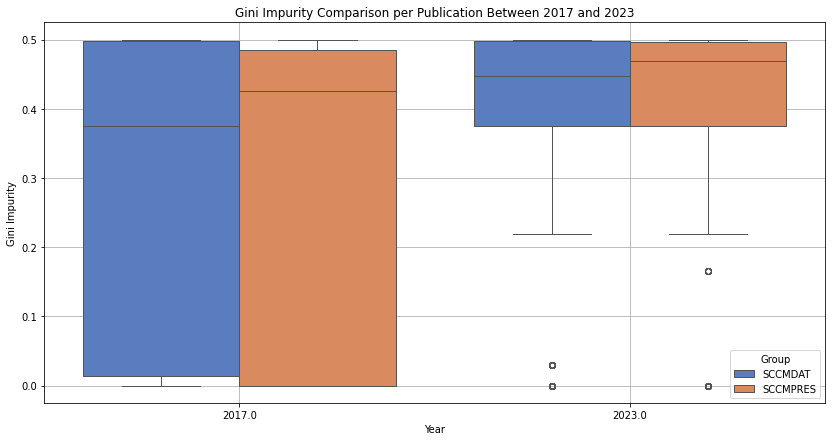

In [51]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=combined_df_2017_2023, x='Year', y='Gini_Impurity', hue='Group', palette="muted")

plt.title('Gini Impurity Comparison per Publication Between 2017 and 2023')
plt.xlabel('Year')
plt.ylabel('Gini Impurity')
plt.legend(title='Group')
plt.grid(True)
plt.show()


 - This boxplot compares the Gini Impurity values for publications in SCCMDAT and SCCMPRES groups for 2017 and 2023.
 - Importance:
1. It shows how diversity (measured by Gini Impurity) has changed over time for both groups.
2. It allows for direct comparison between the two groups and between years.
- Interpretation:
1. The boxes represent the interquartile range (IQR) of Gini Impurity values.
2. The line in the box is the median.
3. Whiskers extend to the minimum and maximum values, excluding outliers.
4. Outliers are represented by individual points.
- Key observations:
1. Both groups show an increase in median Gini Impurity from 2017 to 2023, suggesting increased diversity.
2. SCCMPRES consistently has a higher median Gini Impurity than SCCMDAT, indicating greater diversity.
3. The spread of Gini Impurity values is larger for SCCMPRES, especially in 2023, suggesting more variability in diversity.


### line plot to visualize the Gini impurity trend per publication for both groups.

In [78]:
# Calculate the average Gini impurity per year for each group
temporal_trends = combined_df_2017_2023.groupby(['Year', 'Group']).agg({'Gini_Impurity': 'mean'}).reset_index()

# Rename the columns for clarity
temporal_trends.rename(columns={'Gini_Impurity': 'Average_Gini_Impurity'}, inplace=True)


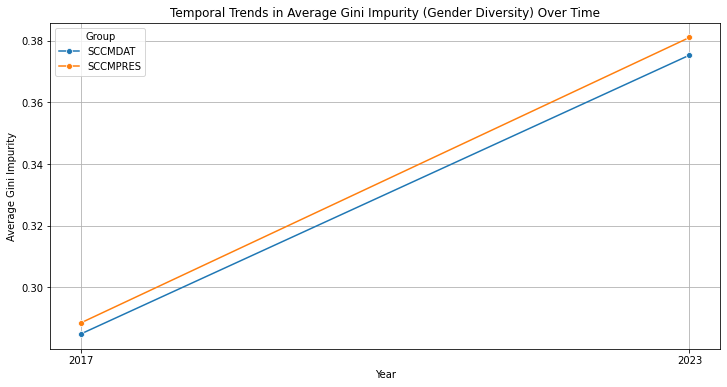

In [83]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=temporal_trends, x='Year', y='Average_Gini_Impurity', hue='Group', marker='o', palette="tab10")

plt.title('Temporal Trends in Average Gini Impurity (Gender Diversity) Over Time')
plt.xlabel('Year')
plt.ylabel('Average Gini Impurity')
plt.xticks(temporal_trends['Year'].unique())  # Ensure all years are shown on the x-axis
plt.grid(True)
plt.legend(title='Group')

# Display the plot
plt.show()


In [84]:
# Calculate the average Gini impurity per year for each group
gini_trends = combined_df_2017_2023.groupby(['Year', 'Group']).agg({'Gini_Impurity': 'mean'}).reset_index()
gini_trends.rename(columns={'Gini_Impurity': 'Average_Gini_Impurity'}, inplace=True)

# Calculate the number of publications per year for each group
publication_count = combined_df_2017_2023.groupby(['Year', 'Group']).size().reset_index(name='Publication_Count')


### Analysis and visualization of gender diversity results

Comparison between SCCMDAT and SCCMPRES:
SCCMDAT mean Gini impurity: 0.2898
SCCMPRES mean Gini impurity: 0.2761
T-test results: t-statistic = 2.2501, p-value = 0.0245

Comparison between 2017 and 2019:
2017 mean Gini impurity: 0.2863
2019 mean Gini impurity: 0.2679
T-test results: t-statistic = 1.0251, p-value = 0.3059


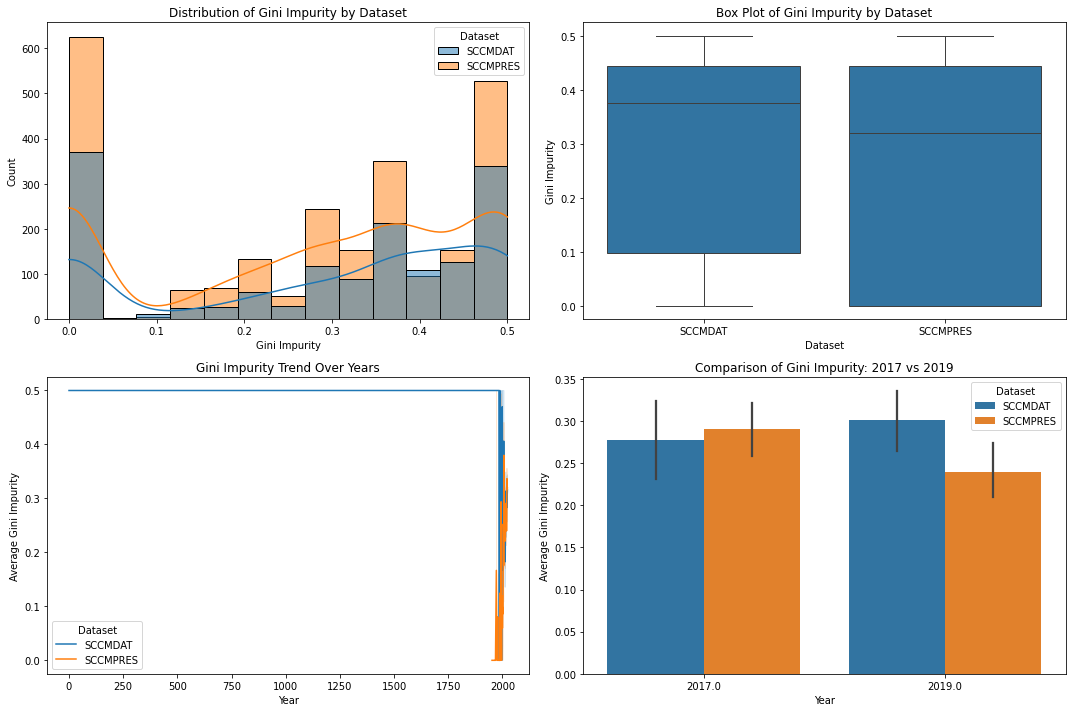


Visualization saved as 'gender_diversity_analysis.png'


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Assuming we have already run the previous steps and have 'all_results_sorted' DataFrame

# 1. Compare results between SCCMDAT and SCCMPRES
sccmdat_gini = all_results_sorted[all_results_sorted['Dataset'] == 'SCCMDAT']['Gini_Impurity']
sccmpres_gini = all_results_sorted[all_results_sorted['Dataset'] == 'SCCMPRES']['Gini_Impurity']

t_stat, p_value = stats.ttest_ind(sccmdat_gini, sccmpres_gini)

print("Comparison between SCCMDAT and SCCMPRES:")
print(f"SCCMDAT mean Gini impurity: {sccmdat_gini.mean():.4f}")
print(f"SCCMPRES mean Gini impurity: {sccmpres_gini.mean():.4f}")
print(f"T-test results: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")

# 2. Compare results between 2017 and 2019
data_2017 = all_results_sorted[all_results_sorted['Year'] == 2017]
data_2019 = all_results_sorted[all_results_sorted['Year'] == 2019]

t_stat_years, p_value_years = stats.ttest_ind(data_2017['Gini_Impurity'], data_2019['Gini_Impurity'])

print("\nComparison between 2017 and 2019:")
print(f"2017 mean Gini impurity: {data_2017['Gini_Impurity'].mean():.4f}")
print(f"2019 mean Gini impurity: {data_2019['Gini_Impurity'].mean():.4f}")
print(f"T-test results: t-statistic = {t_stat_years:.4f}, p-value = {p_value_years:.4f}")

# 3. Visualizations
plt.figure(figsize=(15, 10))

# 3.1 Distribution of Gini impurity for SCCMDAT and SCCMPRES
plt.subplot(2, 2, 1)
sns.histplot(data=all_results_sorted, x='Gini_Impurity', hue='Dataset', kde=True)
plt.title('Distribution of Gini Impurity by Dataset')
plt.xlabel('Gini Impurity')
plt.ylabel('Count')

# 3.2 Box plot of Gini impurity for SCCMDAT and SCCMPRES
plt.subplot(2, 2, 2)
sns.boxplot(data=all_results_sorted, x='Dataset', y='Gini_Impurity')
plt.title('Box Plot of Gini Impurity by Dataset')
plt.ylabel('Gini Impurity')

# 3.3 Gini impurity over years
plt.subplot(2, 2, 3)
sns.lineplot(data=all_results_sorted, x='Year', y='Gini_Impurity', hue='Dataset')
plt.title('Gini Impurity Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Average Gini Impurity')

# 3.4 Comparison of 2017 and 2019
plt.subplot(2, 2, 4)
sns.barplot(data=all_results_sorted[all_results_sorted['Year'].isin([2017, 2019])], 
            x='Year', y='Gini_Impurity', hue='Dataset')
plt.title('Comparison of Gini Impurity: 2017 vs 2019')
plt.ylabel('Average Gini Impurity')

plt.tight_layout()
plt.savefig('gender_diversity_analysis.png')
plt.show()

print("\nVisualization saved as 'gender_diversity_analysis.png'")

1.	Distribution of Gender diversity Gini Impurity Index by Dataset:
- Shows the frequency distribution of Gini Impurity values for both groups.
- SCCMDAT has a higher peak at lower Gini Impurity values, while SCCMPRES has a more spread-out distribution.
- This suggests SCCMPRES has more diverse publications overall.

2.	Box Plot of Gender diversity Gini Impurity Index by Dataset:
- Similar to Image 1, but combines years for each group.
- Confirms that SCCMPRES has higher overall Gini Impurity values (more diversity) than SCCMDAT.

3.	Gender diversity Gini Impurity Index Trend Over Years:
- Shows how average Gini Impurity has changed over time for both groups.
- Both groups show an increasing trend, indicating growing diversity over time.
- The trend is more pronounced for SCCMPRES.

4.	Comparison of Gender diversity Gini Impurity Index: 2017 vs 2019:
- Compares average Gini Impurity for specific years.
- Both groups show an increase from 2017 to 2019.
- SCCMPRES has higher values in both years.


### Visualization Trend of Gini Impurity Over Time

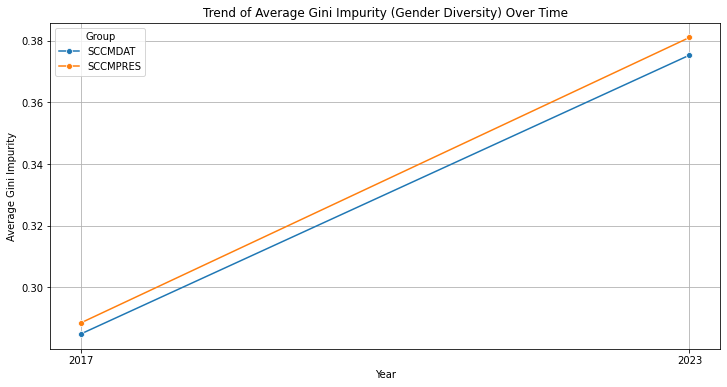

In [85]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=gini_trends, x='Year', y='Average_Gini_Impurity', hue='Group', marker='o', palette="tab10")

plt.title('Trend of Average Gini Impurity (Gender Diversity) Over Time')
plt.xlabel('Year')
plt.ylabel('Average Gini Impurity')
plt.xticks(gini_trends['Year'].unique())  # Ensure all years are shown on the x-axis
plt.grid(True)
plt.legend(title='Group')

plt.show()


## Citation and Impact analysis

In [57]:
# Ensure numeric columns are correct
combined_df_2017_2023['Citations'] = pd.to_numeric(combined_df_2017_2023['Citations'], errors='coerce')

# Calculate the average citations per year and group
citations_trends = combined_df_2017_2023.groupby(['Year', 'Group']).agg({'Citations': 'mean'}).reset_index()

# Calculate the correlation between Gini Impurity and Citations
correlation = combined_df_2017_2023[['Gini_Impurity', 'Citations']].corr()


### Scatter plot gini impurity vs citation count

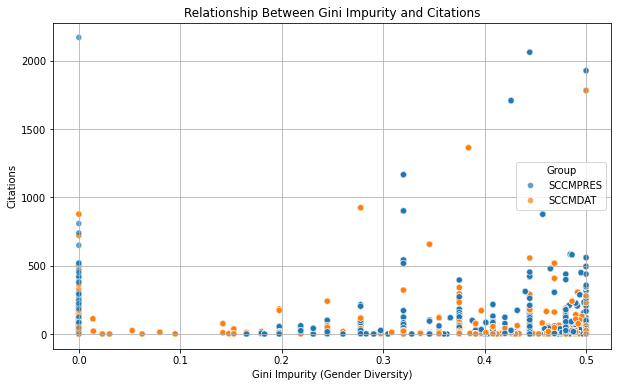

In [58]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_df, x='Gini_Impurity', y='Citations', hue='Group', palette="tab10", alpha=0.7)

plt.title('Relationship Between Gini Impurity and Citations')
plt.xlabel('Gini Impurity (Gender Diversity)')
plt.ylabel('Citations')
plt.grid(True)
plt.legend(title='Group')

plt.show()


- This scatter plot shows how Gini Impurity (gender diversity) relates to the number of citations for publications in both groups.
- Importance:
1. It helps identify any correlation between diversity and research impact (as measured by citations).
Interpretation:
2. Each point represents a publication, with its Gini Impurity on the x-axis and number of citations on the y-axis.
3. There's a slight positive trend, suggesting that more diverse publications (higher Gini Impurity) tend to have more citations.
4. SCCMPRES (blue) has more points at higher Gini Impurity values, consistent with earlier observations.
5. Some highly cited papers exist across the Gini Impurity spectrum, indicating that other factors also influence citation count


### Gene Impurity Index calculation for High income and low income Countries at publication level

### Fork_publication_summary dataset country analysis

### Data Preparation

In [32]:
SCCMDAT_countries_summary = pd.read_csv('fork_publication_summary (2)_countries_updated.csv')

In [33]:
SCCMDAT_countries_summary

,Fork Name,Publication Title,High Income Co-authors 2017,Low Income Co-authors 2017,Total Co-authors 2017,High Income Co-authors 2023,Low Income Co-authors 2023,Total Co-authors 2023
0,A. Fahim Habib,An assessment of the natural radioactivity dis...,10.0,0.0,10.0,NaN,NaN,NaN
1,A. Fahim Habib,Attosecond-Angstrom free-electron-laser toward...,NaN,NaN,NaN,10.0,0.0,10.0
2,A. Fahim Habib,Digital cells radiation hardness study of TPSC...,NaN,NaN,NaN,13.0,0.0,13.0
3,A. Fahim Habib,First measurements of Trojan Horse injection i...,36.0,1.0,37.0,NaN,NaN,NaN
4,A. Fahim Habib,Horizon 2020 EuPRAXIA design study,123.0,3.0,126.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
180,SumitKapoor,Diffuse large B-cell lymphoma with secondary h...,6.0,0.0,6.0,NaN,NaN,NaN
181,SumitKapoor,Plasmapheresis for refractory pruritus due to ...,9.0,0.0,9.0,NaN,NaN,NaN
182,SumitKapoor,Septic Pulmonary Emboli-A Cause For Recurrent ...,3.0,0.0,3.0,NaN,NaN,NaN
183,Susan McLean,"Prospective, multicenter study of antimicrobia...",NaN,NaN,NaN,7.0,0.0,7.0


In [34]:
SCCMPRES_countries_summary = pd.read_csv('PRESfork_publication_summary (2)_countries_updated.csv')

In [35]:
SCCMPRES_countries_summary

,Fork Name,Publication Title,High Income Co-authors 2017,Low Income Co-authors 2017,Total Co-authors 2017,High Income Co-authors 2023,Low Income Co-authors 2023,Total Co-authors 2023
0,"Brandon Michael Henry, MD",Age and sex variation of SARS-CoV-2 cycle thre...,NaN,NaN,NaN,3.0,0.0,3.0
1,"Brandon Michael Henry, MD",Anatomical variability and histological struct...,3.0,0.0,3.0,NaN,NaN,NaN
2,"Brandon Michael Henry, MD",Anatomical variations of the inferior thyroid ...,7.0,0.0,7.0,NaN,NaN,NaN
3,"Brandon Michael Henry, MD",Antithrombin III infusion improves anticoagula...,NaN,NaN,NaN,2.0,0.0,2.0
4,"Brandon Michael Henry, MD",Are anti-SARS-CoV-2 S/N IgG/IgM antibodies alw...,NaN,NaN,NaN,3.0,0.0,3.0
...,...,...,...,...,...,...,...,...
242,Vivek Iyer,New therapies for the treatment of BRAF/NRAS w...,14.0,0.0,14.0,NaN,NaN,NaN
243,Vivek Iyer,Population-based analysis of POT1 variants in ...,NaN,NaN,NaN,1.0,0.0,1.0
244,Vivek Iyer,"Rare variant, gene-based association study of ...",12.0,0.0,12.0,NaN,NaN,NaN
245,Vivek Iyer,Revisiting olfactory receptors as putative dri...,1.0,0.0,1.0,NaN,NaN,NaN


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming the data is already loaded
print(SCCMDAT_countries_summary.shape)
print(SCCMPRES_countries_summary.shape)

(185, 8)
(247, 8)


### Define Gini Impurity Function

In [8]:
def gini_impurity(high_income, low_income):
    total = high_income + low_income
    if total == 0:
        return 0
    p_high = high_income / total
    p_low = low_income / total
    return 1 - (p_high**2 + p_low**2)

# Test the function
#print(gini_impurity(5, 5))  # Should be close to 0.5 (maximum diversity)
#print(gini_impurity(10, 0))  # Should be 0 (no diversity)

###  Process 2017 Data for SCCMDAT

In [38]:
SCCMDAT_2017 = SCCMDAT_countries_summary[['High Income Co-authors 2017', 'Low Income Co-authors 2017', 'Fork Name','Publication Title']].copy()
SCCMDAT_2017['Gini_Impurity'] = SCCMDAT_2017.apply(lambda row: gini_impurity(row['High Income Co-authors 2017'], row['Low Income Co-authors 2017']), axis=1)

print(SCCMDAT_2017.head())
print("Average Gini Impurity 2017 (SCCMDAT):", SCCMDAT_2017['Gini_Impurity'].mean())

   High Income Co-authors 2017  Low Income Co-authors 2017       Fork Name  \
0                         10.0                         0.0  A. Fahim Habib   
1                          NaN                         NaN  A. Fahim Habib   
2                          NaN                         NaN  A. Fahim Habib   
3                         36.0                         1.0  A. Fahim Habib   
4                        123.0                         3.0  A. Fahim Habib   

                                   Publication Title  Gini_Impurity  
0  An assessment of the natural radioactivity dis...       0.000000  
1  Attosecond-Angstrom free-electron-laser toward...            NaN  
2  Digital cells radiation hardness study of TPSC...            NaN  
3  First measurements of Trojan Horse injection i...       0.052593  
4                 Horizon 2020 EuPRAXIA design study       0.046485  
Average Gini Impurity 2017 (SCCMDAT): 0.013791455796522087


### Process 2023 Data for SCCMDAT

In [39]:
# First, let's check the available columns in your dataframe
print(SCCMDAT_countries_summary.columns)

# Now, let's modify the code to use the correct column names
SCCMDAT_2023 = SCCMDAT_countries_summary[['High Income Co-authors 2023', 'Low Income Co-authors 2023', 'Fork Name', 'Publication Title']].copy()
SCCMDAT_2023['Gini_Impurity'] = SCCMDAT_2023.apply(lambda row: gini_impurity(row['High Income Co-authors 2023'], row['Low Income Co-authors 2023']), axis=1)

print(SCCMDAT_2023.head())
print("Average Gini Impurity 2023 (SCCMDAT):", SCCMDAT_2023['Gini_Impurity'].mean())

Index(['Fork Name', 'Publication Title', 'High Income Co-authors 2017',
       'Low Income Co-authors 2017', 'Total Co-authors 2017',
       'High Income Co-authors 2023', 'Low Income Co-authors 2023',
       'Total Co-authors 2023'],
      dtype='object')
   High Income Co-authors 2023  Low Income Co-authors 2023       Fork Name  \
0                          NaN                         NaN  A. Fahim Habib   
1                         10.0                         0.0  A. Fahim Habib   
2                         13.0                         0.0  A. Fahim Habib   
3                          NaN                         NaN  A. Fahim Habib   
4                          NaN                         NaN  A. Fahim Habib   

                                   Publication Title  Gini_Impurity  
0  An assessment of the natural radioactivity dis...            NaN  
1  Attosecond-Angstrom free-electron-laser toward...            0.0  
2  Digital cells radiation hardness study of TPSC...            

###  Process 2017 Data for SCCMPRES

In [40]:
# 2017 data
SCCMPRES_2017 = SCCMPRES_countries_summary[['High Income Co-authors 2017', 'Low Income Co-authors 2017', 'Fork Name', 'Publication Title']].copy()
SCCMPRES_2017['Gini_Impurity'] = SCCMPRES_2017.apply(lambda row: gini_impurity(row['High Income Co-authors 2017'], row['Low Income Co-authors 2017']), axis=1)

print(SCCMPRES_2017.head())
print("Average Gini Impurity 2017 (SCCMPRES):", SCCMPRES_2017['Gini_Impurity'].mean())

   High Income Co-authors 2017  Low Income Co-authors 2017  \
0                          NaN                         NaN   
1                          3.0                         0.0   
2                          7.0                         0.0   
3                          NaN                         NaN   
4                          NaN                         NaN   

                   Fork Name  \
0  Brandon Michael Henry, MD   
1  Brandon Michael Henry, MD   
2  Brandon Michael Henry, MD   
3  Brandon Michael Henry, MD   
4  Brandon Michael Henry, MD   

                                   Publication Title  Gini_Impurity  
0  Age and sex variation of SARS-CoV-2 cycle thre...            NaN  
1  Anatomical variability and histological struct...            0.0  
2  Anatomical variations of the inferior thyroid ...            0.0  
3  Antithrombin III infusion improves anticoagula...            NaN  
4  Are anti-SARS-CoV-2 S/N IgG/IgM antibodies alw...            NaN  
Average Gini I

###  Process 2023 Data for SCCMPRES

In [41]:
SCCMPRES_2023 = SCCMPRES_countries_summary[['High Income Co-authors 2023', 'Low Income Co-authors 2023', 'Fork Name', 'Publication Title']].copy()
SCCMPRES_2023['Gini_Impurity'] = SCCMPRES_2023.apply(lambda row: gini_impurity(row['High Income Co-authors 2023'], row['Low Income Co-authors 2023']), axis=1)

print(SCCMPRES_2023.head())
print("Average Gini Impurity 2023 (SCCMPRES):", SCCMPRES_2023['Gini_Impurity'].mean())

   High Income Co-authors 2023  Low Income Co-authors 2023  \
0                          3.0                         0.0   
1                          NaN                         NaN   
2                          NaN                         NaN   
3                          2.0                         0.0   
4                          3.0                         0.0   

                   Fork Name  \
0  Brandon Michael Henry, MD   
1  Brandon Michael Henry, MD   
2  Brandon Michael Henry, MD   
3  Brandon Michael Henry, MD   
4  Brandon Michael Henry, MD   

                                   Publication Title  Gini_Impurity  
0  Age and sex variation of SARS-CoV-2 cycle thre...            0.0  
1  Anatomical variability and histological struct...            NaN  
2  Anatomical variations of the inferior thyroid ...            NaN  
3  Antithrombin III infusion improves anticoagula...            0.0  
4  Are anti-SARS-CoV-2 S/N IgG/IgM antibodies alw...            0.0  
Average Gini I

### Visualize the Results

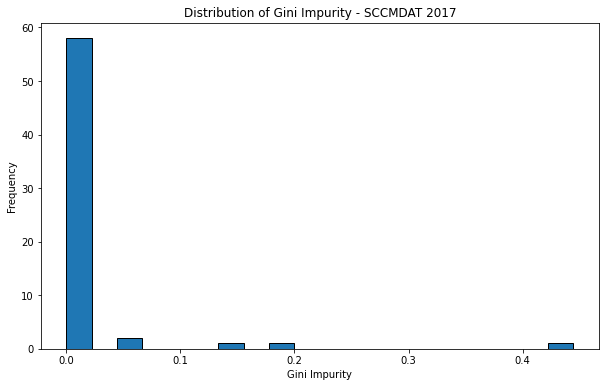

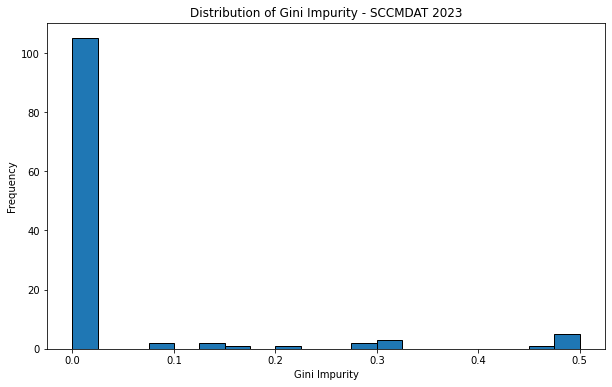

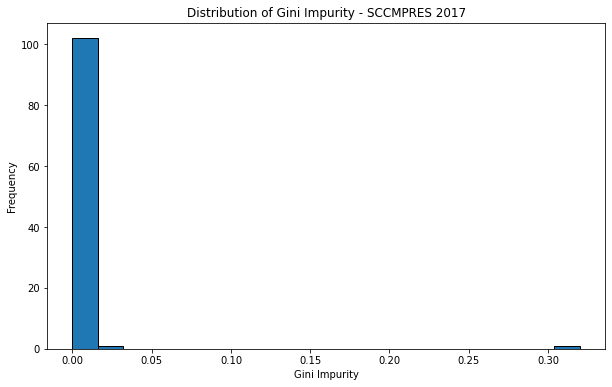

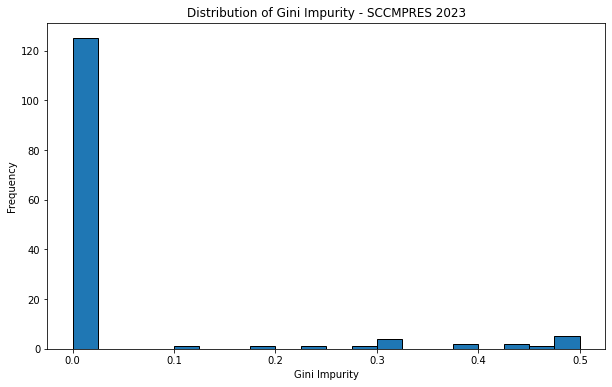

In [42]:
def plot_gini_distribution(df, year, dataset_name):
    plt.figure(figsize=(10, 6))
    plt.hist(df['Gini_Impurity'], bins=20, edgecolor='black')
    plt.title(f'Distribution of Gini Impurity - {dataset_name} {year}')
    plt.xlabel('Gini Impurity')
    plt.ylabel('Frequency')
    plt.show()

plot_gini_distribution(SCCMDAT_2017, 2017, 'SCCMDAT')
plot_gini_distribution(SCCMDAT_2023, 2023, 'SCCMDAT')
plot_gini_distribution(SCCMPRES_2017, 2017, 'SCCMPRES')
plot_gini_distribution(SCCMPRES_2023, 2023, 'SCCMPRES')

SCCMDAT:

2017:

The distribution is heavily skewed towards 0, with the highest frequency at Gini Impurity close to 0.
There are small frequencies at higher Gini Impurity values, up to about 0.4.


2023:

The distribution remains heavily skewed towards 0, but with an even higher frequency at the lowest Gini Impurity.
There's a slight increase in frequencies at higher Gini Impurity values, particularly around 0.3 and 0.5.



SCCMPRES:

2017:

The distribution is extremely skewed towards 0, with almost all frequency concentrated at the lowest Gini Impurity.
There's a tiny frequency at around 0.3 Gini Impurity.


2023:

The distribution remains heavily skewed towards 0, but with a slightly lower frequency at the lowest Gini Impurity compared to 2017.
There are small but noticeable frequencies at higher Gini Impurity values, particularly around 0.3 and 0.5.



Interpretation:

Both datasets show very low Gini Impurity overall, indicating high homogeneity in the data.
SCCMPRES appears to have lower Gini Impurity (more homogeneity) than SCCMDAT in both years.
From 2017 to 2023, both datasets show a slight increase in instances with higher Gini Impurity, suggesting a small increase in heterogeneity over time.
The changes are more pronounced in the SCCMPRES dataset, which shows a more noticeable shift towards higher Gini Impurity values in 2023 compared to 2017.

These results suggest that while both datasets remain largely homogeneous, there's a slight trend towards increased diversity or complexity in the data from 2017 to 2023, particularly in the SCCMPRES dataset.

### Temporal comparison

compare the Gini impurity scores between 2017 and 2023 to see if there's been a change in diversity over time.

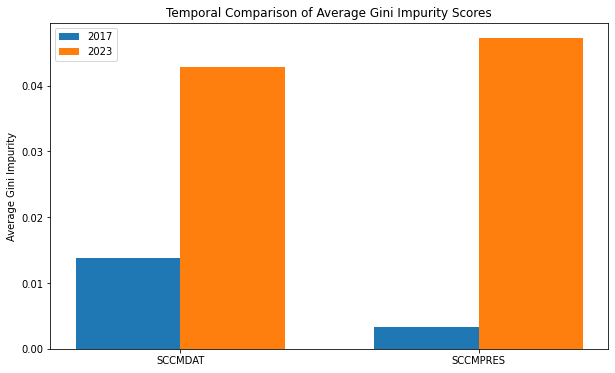

In [43]:
import matplotlib.pyplot as plt

avg_scores = {
    'SCCMDAT': {2017: SCCMDAT_2017['Gini_Impurity'].mean(), 2023: SCCMDAT_2023['Gini_Impurity'].mean()},
    'SCCMPRES': {2017: SCCMPRES_2017['Gini_Impurity'].mean(), 2023: SCCMPRES_2023['Gini_Impurity'].mean()}
}

fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(2)
width = 0.35

ax.bar(x - width/2, [avg_scores['SCCMDAT'][2017], avg_scores['SCCMPRES'][2017]], width, label='2017')
ax.bar(x + width/2, [avg_scores['SCCMDAT'][2023], avg_scores['SCCMPRES'][2023]], width, label='2023')

ax.set_ylabel('Average Gini Impurity')
ax.set_title('Temporal Comparison of Average Gini Impurity Scores')
ax.set_xticks(x)
ax.set_xticklabels(['SCCMDAT', 'SCCMPRES'])
ax.legend()

plt.show()

### Dataset Comparison

We can compare the distribution of Gini impurity scores between SCCMDAT and SCCMPRES datasets.

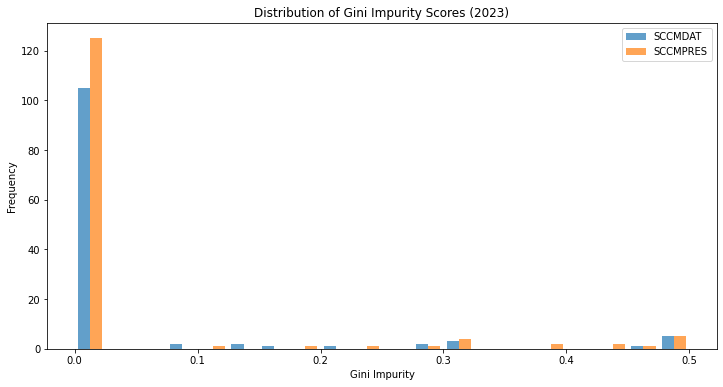

In [44]:
plt.figure(figsize=(12, 6))
plt.hist([SCCMDAT_2023['Gini_Impurity'], SCCMPRES_2023['Gini_Impurity']], 
         label=['SCCMDAT', 'SCCMPRES'], bins=20, alpha=0.7)
plt.xlabel('Gini Impurity')
plt.ylabel('Frequency')
plt.title('Distribution of Gini Impurity Scores (2023)')
plt.legend()
plt.show()

These images provide additional insights into the Gini Impurity scores for the SCCMDAT and SCCMPRES datasets. Let's interpret each image:
Image 1: Temporal Comparison of Average Gini Impurity Scores

SCCMDAT:

2017: Average Gini Impurity score of about 0.014
2023: Average Gini Impurity score of about 0.043
There's a significant increase in the average Gini Impurity from 2017 to 2023


SCCMPRES:

2017: Average Gini Impurity score of about 0.003
2023: Average Gini Impurity score of about 0.048
There's a dramatic increase in the average Gini Impurity from 2017 to 2023



Image 2: Distribution of Gini Impurity Scores (2023)
This graph shows the frequency distribution of Gini Impurity scores for both datasets in 2023:

Both datasets have a very high frequency of scores at or near 0, indicating that a large portion of the data in both sets is highly homogeneous.
SCCMDAT (blue) shows small but noticeable frequencies across various Gini Impurity values up to 0.5, with slight peaks around 0.1 and 0.3.
SCCMPRES (orange) shows very low frequencies across most of the range, but has noticeable peaks at 0.3 and 0.5.

Interpretation:

Both datasets have become more heterogeneous from 2017 to 2023, as evidenced by the increase in average Gini Impurity scores.
The increase in heterogeneity is more pronounced in the SCCMPRES dataset, which went from having a very low average Gini Impurity in 2017 to having a slightly higher average than SCCMDAT in 2023.
Despite the increase in average Gini Impurity, both datasets still have a large proportion of data points with very low Gini Impurity (close to 0) in 2023.
The SCCMPRES dataset in 2023 seems to have a more polarized distribution, with most data points either having very low Gini Impurity or relatively high Gini Impurity (around 0.3 and 0.5), while SCCMDAT has a more spread-out distribution.

These results suggest that while both datasets have become more diverse or complex over time, they still maintain a significant portion of highly homogeneous data. The SCCMPRES dataset, in particular, has undergone a more dramatic change in its diversity structure from 2017 to 2023.

### Categorical Analysis by Fork Name

Fork Name
Adel Bassily-Marcus               0.202024
Mohammed J. Al-Jaghbeer           0.163306
Mary E. Lough                     0.118827
Anoop Mayampurath                 0.096000
Andre Holder                      0.069971
Salah Al-Zaiti                    0.050000
Donna Lee Armaignac               0.046296
Eduardo Mireles-Cabodevila        0.043636
A. Fahim Habib                    0.042480
Siddharth Dugar                   0.026909
Robert David Stevens, MD, FCCM    0.022179
SumitKapoor                       0.000000
Marilyn Schallom                  0.000000
Melissa L. Thompson Bastin        0.000000
Keiko Kunitoki                    0.000000
Anis Davoudi                      0.000000
Andrew Barros                     0.000000
Susan McLean                      0.000000
Chenyue Lu                             NaN
Name: Gini_Impurity, dtype: float64


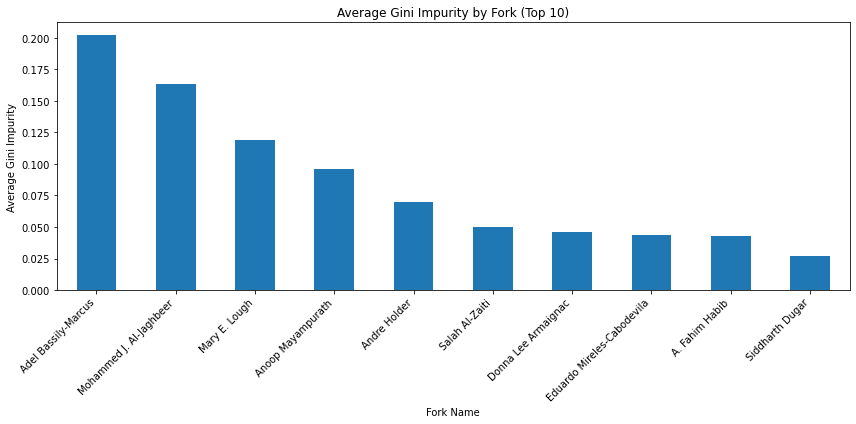

In [45]:
fork_analysis = SCCMDAT_2023.groupby('Fork Name')['Gini_Impurity'].mean().sort_values(ascending=False)
print(fork_analysis)

# Visualize top 10 forks
plt.figure(figsize=(12, 6))
fork_analysis.head(10).plot(kind='bar')
plt.title('Average Gini Impurity by Fork (Top 10)')
plt.xlabel('Fork Name')
plt.ylabel('Average Gini Impurity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [49]:
import pandas as pd

# Function to process each dataset (SCCMDAT and SCCMPRES) for both 2017 and 2023
def process_dataset(df, name):
    # Process 2017 data
    df_2017 = df[['High Income Co-authors 2017', 'Low Income Co-authors 2017', 'Fork Name', 'Publication Title']].copy()
    df_2017 = df_2017.rename(columns={
        'High Income Co-authors 2017': 'High Income Co-authors',
        'Low Income Co-authors 2017': 'Low Income Co-authors'
    })
    df_2017['Gini_Impurity'] = df_2017.apply(lambda row: gini_impurity(row['High Income Co-authors'], row['Low Income Co-authors']), axis=1)
    df_2017['Year'] = 2017
    df_2017['Group'] = name

    # Process 2023 data
    df_2023 = df[['High Income Co-authors 2023', 'Low Income Co-authors 2023', 'Fork Name', 'Publication Title']].copy()
    df_2023 = df_2023.rename(columns={
        'High Income Co-authors 2023': 'High Income Co-authors',
        'Low Income Co-authors 2023': 'Low Income Co-authors'
    })
    df_2023['Gini_Impurity'] = df_2023.apply(lambda row: gini_impurity(row['High Income Co-authors'], row['Low Income Co-authors']), axis=1)
    df_2023['Year'] = 2023
    df_2023['Group'] = name

    # Combine 2017 and 2023 data
    return pd.concat([df_2017, df_2023])

# Process SCCMDAT dataset
SCCMDAT_2017_2023 = process_dataset(SCCMDAT_countries_summary, 'SCCMDAT')

# Process SCCMPRES dataset
SCCMPRES_2017_2023 = process_dataset(SCCMPRES_countries_summary, 'SCCMPRES')

# Combine the datasets
combined_df_2017_2023 = pd.concat([SCCMDAT_2017_2023[['Publication Title', 'Year', 'Gini_Impurity', 'Group']],
                                   SCCMPRES_2017_2023[['Publication Title', 'Year', 'Gini_Impurity', 'Group']]])

# Print the first few rows of the combined dataset
print(combined_df_2017_2023.head())

# Calculate and print the average Gini Impurity for each group and year
print(combined_df_2017_2023.groupby(['Group', 'Year'])['Gini_Impurity'].mean())

                                   Publication Title  Year  Gini_Impurity  \
0  An assessment of the natural radioactivity dis...  2017       0.000000   
1  Attosecond-Angstrom free-electron-laser toward...  2017            NaN   
2  Digital cells radiation hardness study of TPSC...  2017            NaN   
3  First measurements of Trojan Horse injection i...  2017       0.052593   
4                 Horizon 2020 EuPRAXIA design study  2017       0.046485   

     Group  
0  SCCMDAT  
1  SCCMDAT  
2  SCCMDAT  
3  SCCMDAT  
4  SCCMDAT  
Group     Year
SCCMDAT   2017    0.013791
          2023    0.042872
SCCMPRES  2017    0.003373
          2023    0.047228
Name: Gini_Impurity, dtype: float64


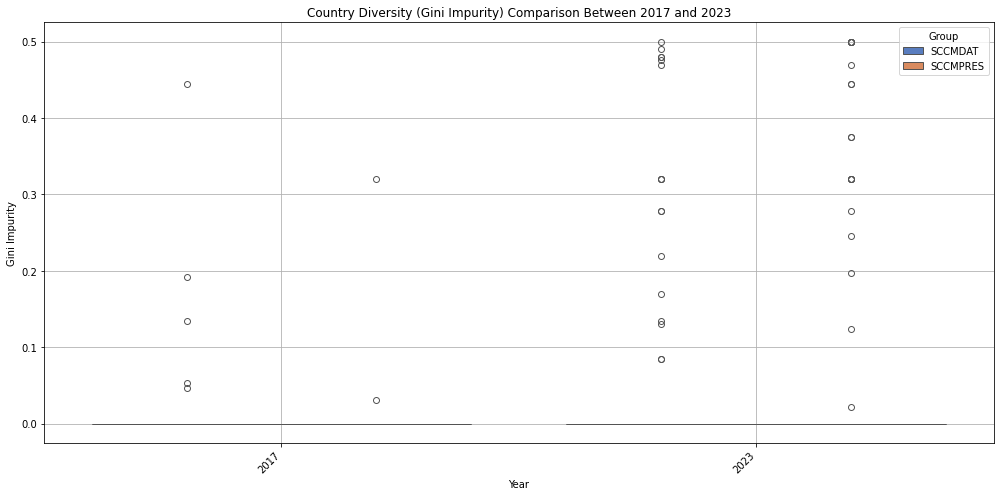

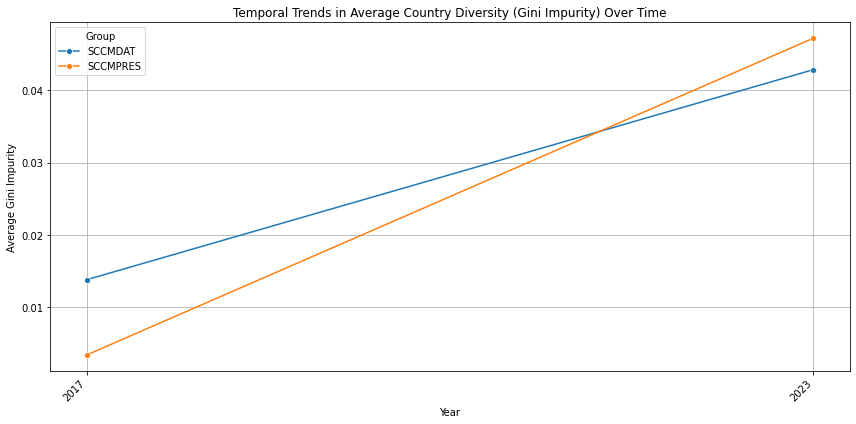

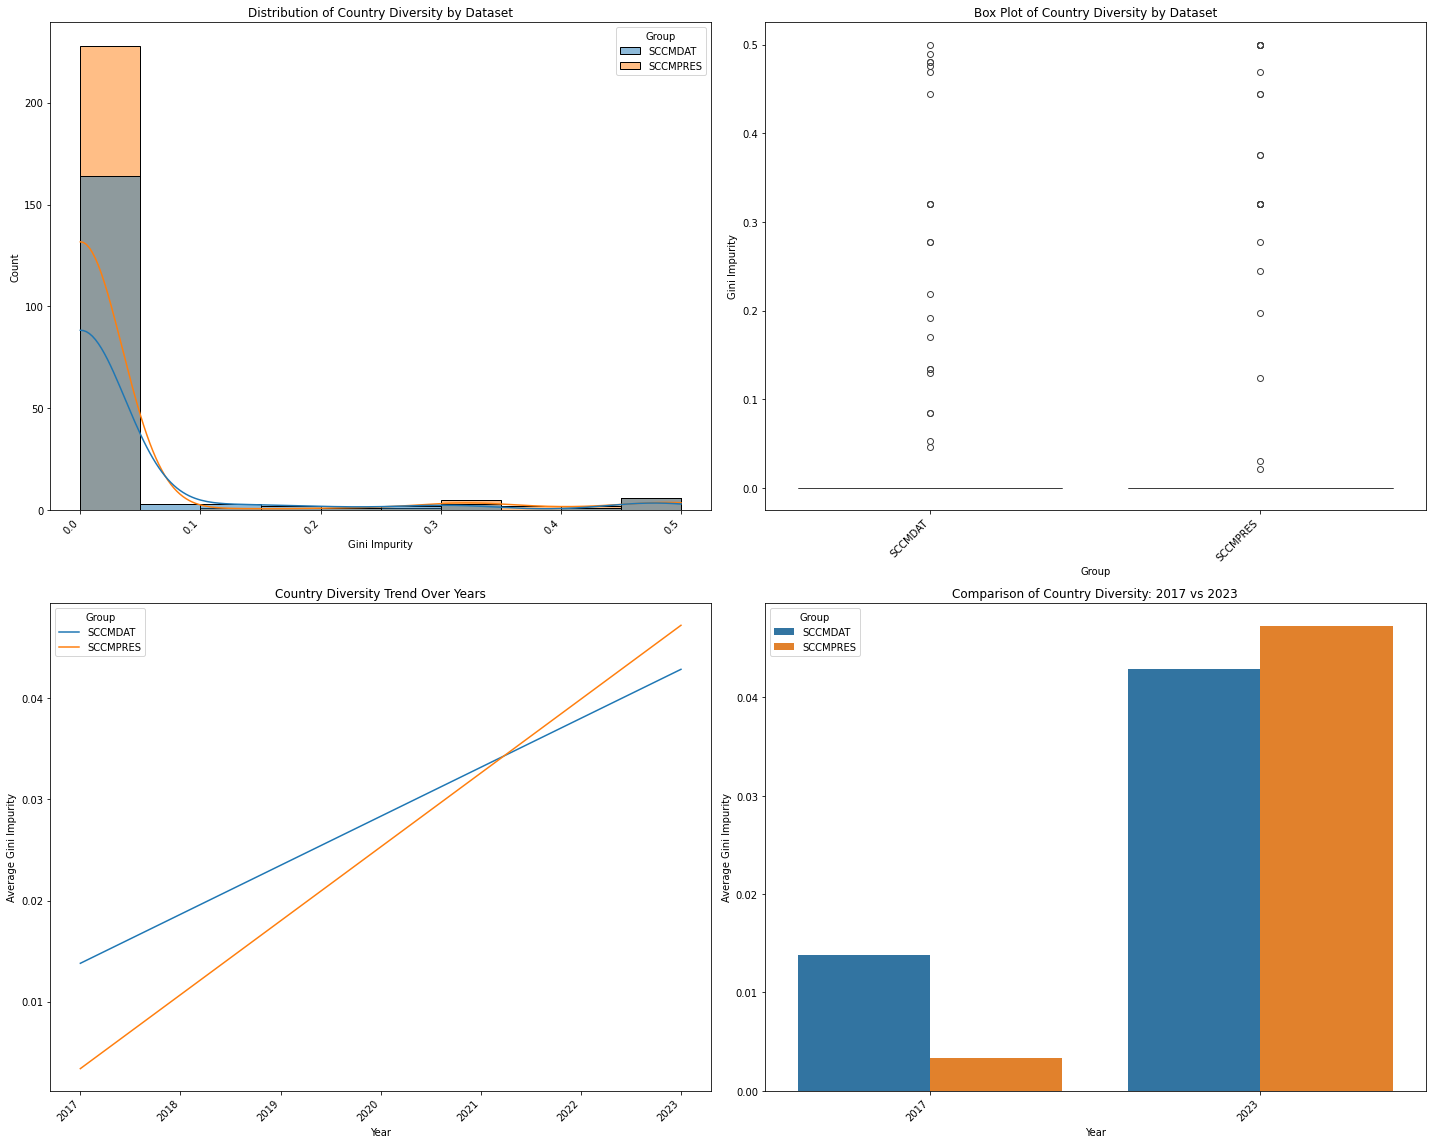


Visualization saved as 'country_diversity_analysis.png'


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Assuming combined_df_2017_2023 is already created and contains your data

# Function to rotate labels
def rotate_labels(ax, rotation=45, ha='right', va='top'):
    for label in ax.get_xticklabels():
        label.set_rotation(rotation)
        label.set_ha(ha)
        label.set_va(va)

# Reset index to handle duplicates
combined_df_2017_2023 = combined_df_2017_2023.reset_index(drop=True)

# Visualizations
plt.figure(figsize=(14, 7))
ax = sns.boxplot(data=combined_df_2017_2023, x='Year', y='Gini_Impurity', hue='Group', palette="muted")
plt.title('Country Diversity (Gini Impurity) Comparison Between 2017 and 2023')
plt.xlabel('Year')
plt.ylabel('Gini Impurity')
plt.legend(title='Group')
plt.grid(True)
rotate_labels(ax)
plt.tight_layout()
plt.show()

# Temporal trends
temporal_trends = combined_df_2017_2023.groupby(['Year', 'Group'])['Gini_Impurity'].mean().reset_index()
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=temporal_trends, x='Year', y='Gini_Impurity', hue='Group', marker='o', palette="tab10")
plt.title('Temporal Trends in Average Country Diversity (Gini Impurity) Over Time')
plt.xlabel('Year')
plt.ylabel('Average Gini Impurity')
plt.xticks(temporal_trends['Year'].unique())
plt.grid(True)
plt.legend(title='Group')
rotate_labels(ax)
plt.tight_layout()
plt.show()

# Additional visualizations
fig, axs = plt.subplots(2, 2, figsize=(20, 16))

sns.histplot(data=combined_df_2017_2023, x='Gini_Impurity', hue='Group', kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Country Diversity by Dataset')
axs[0, 0].set_xlabel('Gini Impurity')
axs[0, 0].set_ylabel('Count')
rotate_labels(axs[0, 0])

sns.boxplot(data=combined_df_2017_2023, x='Group', y='Gini_Impurity', ax=axs[0, 1])
axs[0, 1].set_title('Box Plot of Country Diversity by Dataset')
axs[0, 1].set_ylabel('Gini Impurity')
rotate_labels(axs[0, 1])

sns.lineplot(data=temporal_trends, x='Year', y='Gini_Impurity', hue='Group', ax=axs[1, 0])
axs[1, 0].set_title('Country Diversity Trend Over Years')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Average Gini Impurity')
rotate_labels(axs[1, 0])

sns.barplot(data=temporal_trends, x='Year', y='Gini_Impurity', hue='Group', ax=axs[1, 1])
axs[1, 1].set_title('Comparison of Country Diversity: 2017 vs 2023')
axs[1, 1].set_ylabel('Average Gini Impurity')
rotate_labels(axs[1, 1])

plt.tight_layout()
plt.savefig('country_diversity_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nVisualization saved as 'country_diversity_analysis.png'")

These images provide a comprehensive view of the country diversity (measured by Gini Impurity) for the SCCMDAT and SCCMPRES datasets in 2017 and 2023. Let's interpret each component:
Image 1: Country Diversity Comparison Between 2017 and 2023

In 2017, both datasets had relatively low Gini Impurity scores, with most points clustered near 0.
In 2023, there's a significant increase in the spread of Gini Impurity scores for both datasets, with many points appearing at higher values (up to 0.5).
The increase in spread is more pronounced for SCCMPRES in 2023.

These images provide a comprehensive view of the country diversity (measured by Gini Impurity) for the SCCMDAT and SCCMPRES datasets in 2017 and 2023. Let's interpret each component:
Image 1: Country Diversity Comparison Between 2017 and 2023

In 2017, both datasets had relatively low Gini Impurity scores, with most points clustered near 0.
In 2023, there's a significant increase in the spread of Gini Impurity scores for both datasets, with many points appearing at higher values (up to 0.5).
The increase in spread is more pronounced for SCCMPRES in 2023.

Image 2: Multiple plots providing different perspectives on the data
Top Left - Distribution of Country Diversity by Dataset:

Both datasets are heavily skewed towards low Gini Impurity values.
SCCMPRES (orange) shows a slightly higher frequency at the lowest Gini Impurity.
Both datasets have small peaks at higher Gini Impurity values, with SCCMPRES showing a more pronounced peak around 0.5.

Top Right - Box Plot of Country Diversity by Dataset:

SCCMDAT has a slightly higher median Gini Impurity.
SCCMPRES shows more extreme outliers at higher Gini Impurity values.

Bottom Left - Country Diversity Trend Over Years:

Both datasets show an increasing trend in average Gini Impurity from 2017 to 2023.
SCCMPRES starts lower in 2017 but increases more rapidly, surpassing SCCMDAT by 2023.

Bottom Right - Comparison of Country Diversity: 2017 vs 2023:

Both datasets show a significant increase in average Gini Impurity from 2017 to 2023.
The increase is more dramatic for SCCMPRES, which started lower in 2017 but ended higher in 2023.

Key Interpretations:

Increased Diversity: Both datasets show a substantial increase in country diversity (Gini Impurity) from 2017 to 2023.
Differential Change: SCCMPRES experienced a more dramatic increase in diversity compared to SCCMDAT. It started with lower diversity in 2017 but ended with higher diversity in 2023.
Outliers: While the majority of data points in both datasets still have low Gini Impurity values, there's an increase in high-diversity outliers, especially for SCCMPRES in 2023.
Overall Trend: The trend suggests that both datasets are becoming more diverse over time, with SCCMPRES showing a more rapid diversification.

These results indicate a significant shift in the diversity of both datasets from 2017 to 2023, with SCCMPRES undergoing a more pronounced change. This could reflect changes in data collection methods, shifts in the underlying populations being studied, or other factors affecting the diversity of the datasets over time.


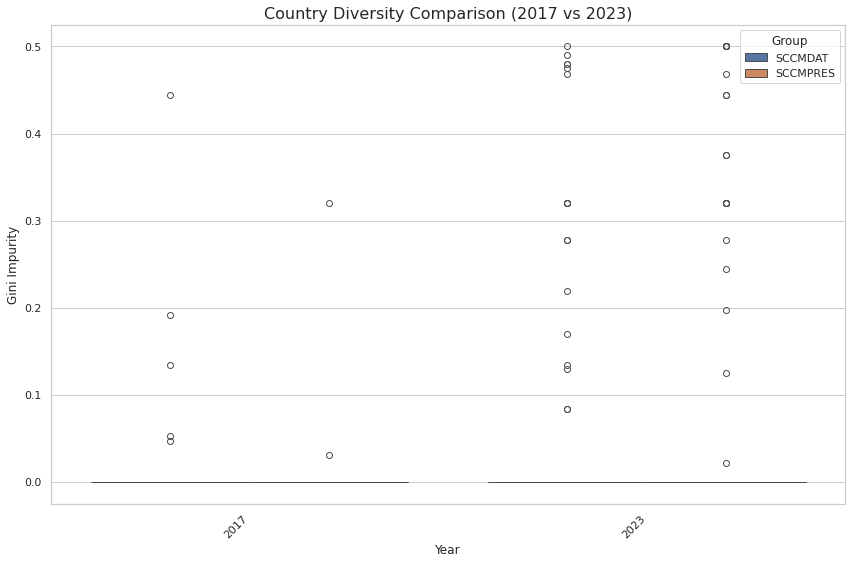

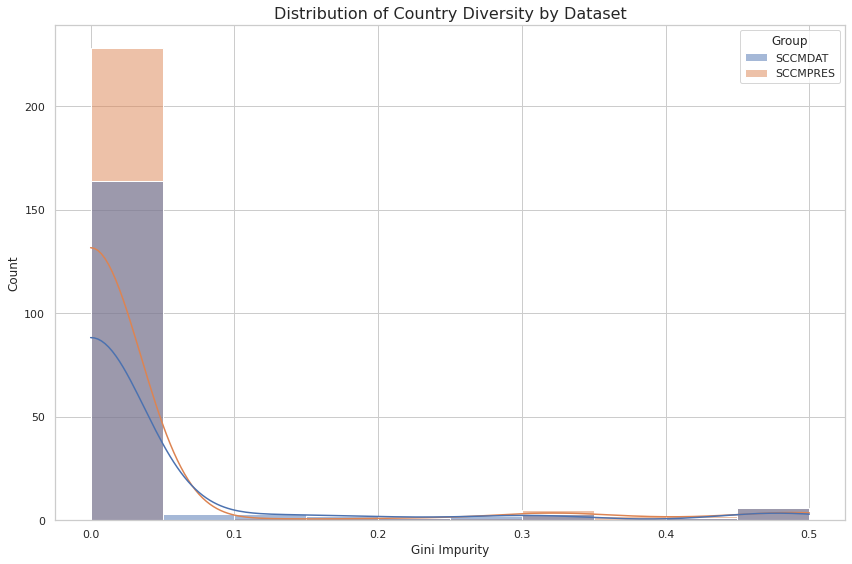

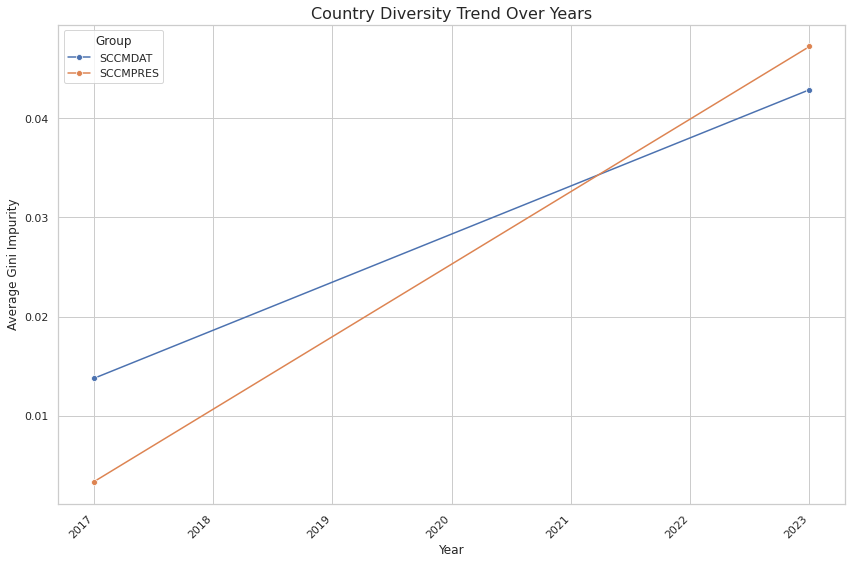

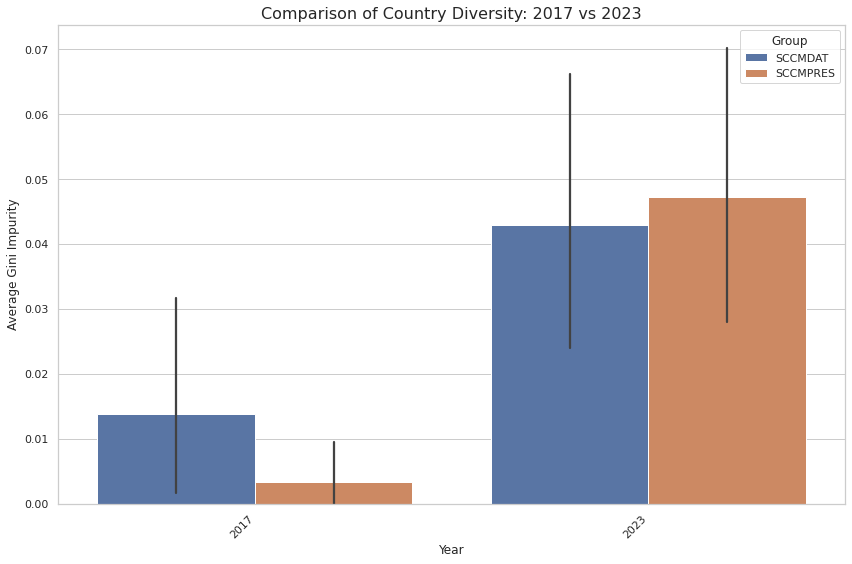


Statistical Analysis:
Comparison between SCCMDAT and SCCMPRES:
SCCMDAT mean Gini impurity: 0.0330
SCCMPRES mean Gini impurity: 0.0288
T-test results: t-statistic = 0.4144, p-value = 0.6788

Comparison between 2017 and 2023:
2017 mean Gini impurity: 0.0073
2023 mean Gini impurity: 0.0452
T-test results: t-statistic = -3.7348, p-value = 0.0002

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Publication Title  864 non-null    object 
 1   Year               864 non-null    int64  
 2   Gini_Impurity      432 non-null    float64
 3   Group              864 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 27.1+ KB
None

Missing values:
Publication Title      0
Year                   0
Gini_Impurity        432
Group                  0
dtype: int64

Unique values in 'Group' column: ['SCCMDAT' 'SCCMPRE

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

# Set a consistent style for all plots
sns.set_theme(style="whitegrid")

# Function to rotate x-axis labels
def rotate_xaxis_labels(ax, rotation=45, ha='right'):
    for label in ax.get_xticklabels():
        label.set_rotation(rotation)
        label.set_ha(ha)

# Function to save and show plot
def save_and_show_plot(fig, filename):
    plt.tight_layout()
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close(fig)

# Filter data for 2017 and 2023 only
combined_df_filtered = combined_df_2017_2023[combined_df_2017_2023['Year'].isin([2017, 2023])].copy()

# 1. Box plot
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(data=combined_df_filtered, x='Year', y='Gini_Impurity', hue='Group', ax=ax)
ax.set_title('Country Diversity Comparison (2017 vs 2023)', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Gini Impurity', fontsize=12)
if ax.get_legend() is not None:
    ax.get_legend().set_title('Group')
rotate_xaxis_labels(ax)
save_and_show_plot(fig, 'country_diversity_boxplot.png')

# 2. Distribution plot
fig, ax = plt.subplots(figsize=(12, 8))
sns.histplot(data=combined_df_filtered, x='Gini_Impurity', hue='Group', kde=True, ax=ax)
ax.set_title('Distribution of Country Diversity by Dataset', fontsize=16)
ax.set_xlabel('Gini Impurity', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
if ax.get_legend() is not None:
    ax.get_legend().set_title('Group')
save_and_show_plot(fig, 'country_diversity_distribution.png')

# 3. Trend line plot
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(data=combined_df_filtered.groupby(['Year', 'Group'])['Gini_Impurity'].mean().reset_index(), 
             x='Year', y='Gini_Impurity', hue='Group', marker='o', ax=ax)
ax.set_title('Country Diversity Trend Over Years', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Average Gini Impurity', fontsize=12)
if ax.get_legend() is not None:
    ax.get_legend().set_title('Group')
rotate_xaxis_labels(ax)
save_and_show_plot(fig, 'country_diversity_trend.png')

# 4. Bar plot
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=combined_df_filtered, x='Year', y='Gini_Impurity', hue='Group', ax=ax)
ax.set_title('Comparison of Country Diversity: 2017 vs 2023', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Average Gini Impurity', fontsize=12)
if ax.get_legend() is not None:
    ax.get_legend().set_title('Group')
rotate_xaxis_labels(ax)
save_and_show_plot(fig, 'country_diversity_barplot.png')

# Print statistical analysis
print("\nStatistical Analysis:")

# Function to perform t-test safely
def safe_ttest(group1, group2):
    group1 = group1.dropna()
    group2 = group2.dropna()
    if len(group1) > 0 and len(group2) > 0 and not (group1 == group1.iloc[0]).all() and not (group2 == group2.iloc[0]).all():
        return stats.ttest_ind(group1, group2)
    else:
        return np.nan, np.nan

# Comparison between SCCMDAT and SCCMPRES
sccmdat_gini = combined_df_filtered[combined_df_filtered['Group'] == 'SCCMDAT']['Gini_Impurity']
sccmpres_gini = combined_df_filtered[combined_df_filtered['Group'] == 'SCCMPRES']['Gini_Impurity']
t_stat, p_value = safe_ttest(sccmdat_gini, sccmpres_gini)

print("Comparison between SCCMDAT and SCCMPRES:")
print(f"SCCMDAT mean Gini impurity: {sccmdat_gini.mean():.4f}")
print(f"SCCMPRES mean Gini impurity: {sccmpres_gini.mean():.4f}")
print(f"T-test results: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")

# Comparison between 2017 and 2023
data_2017 = combined_df_filtered[combined_df_filtered['Year'] == 2017]['Gini_Impurity']
data_2023 = combined_df_filtered[combined_df_filtered['Year'] == 2023]['Gini_Impurity']
t_stat_years, p_value_years = safe_ttest(data_2017, data_2023)

print("\nComparison between 2017 and 2023:")
print(f"2017 mean Gini impurity: {data_2017.mean():.4f}")
print(f"2023 mean Gini impurity: {data_2023.mean():.4f}")
print(f"T-test results: t-statistic = {t_stat_years:.4f}, p-value = {p_value_years:.4f}")

# Print data info
print("\nData Info:")
print(combined_df_filtered.info())
print("\nMissing values:")
print(combined_df_filtered.isnull().sum())
print("\nUnique values in 'Group' column:", combined_df_filtered['Group'].unique())
print("\nUnique values in 'Year' column:", combined_df_filtered['Year'].unique())

## Networking analysis

In [57]:
SCCMDAT = pd.read_csv("SCCMDATupdated_FINALANALYSISCSV_Gender analysis.csv")
SCCMPRES = pd.read_csv("SCCMPRESupdated_FINALANALYSIS_csv_Gender analysis.csv")

In [58]:
SCCMDAT

,Co-Author Name,Co-Author Affiliation,Co-Author Latitude_from_df2,Co-Author Longitude_from_df2,Co-Author Highest Degree,Co-Author Department,Author Name,Author Affiliation,Author Lat,Author Lon,Publication Title,Year,Citations,Cited By URL,Abstract,Gender - Co-Author,Gender - Author
0,3rd Lewin,NaN,NaN,NaN,Not Available,Not Available,"Robert David Stevens, MD, FCCM",Johns Hopkins University School of Medicine,39.330202,-76.621854,Reversal of transtentorial herniation with hyp...,2008.0,294.0,NaN,NaN,male,male
1,A Accardo,Università degli Studi di Trieste,45.660169,13.794792,Not Available,Not Available,Salah Al-Zaiti,University of Pittsburgh,40.444153,-79.962461,Index By Author Ab√§cherli R 105 Ab√°solo D 10...,NaN,0.0,NaN,NaN,female,female
2,A Ahmad,Universiti Teknologi Malaysia,1.558522,103.639914,Not Available,Not Available,Salah Al-Zaiti,University of Pittsburgh,40.444153,-79.962461,100 Two Thirds of Patients With Acute Coronary...,2021.0,0.0,NaN,NaN,female,female
3,A Ahmad,Universiti Teknologi Malaysia,1.558522,103.639914,Not Available,Not Available,Salah Al-Zaiti,University of Pittsburgh,40.444153,-79.962461,Index By Author Ab√§cherli R 105 Ab√°solo D 10...,NaN,0.0,NaN,NaN,female,female
4,A Akasawa,Tokyo Metropolitan Children's Medical Center,36.858403,-76.305431,Not Available,Not Available,"Robert David Stevens, MD, FCCM",Johns Hopkins University School of Medicine,39.330202,-76.621854,"Author Index Vol. 118, No. 2‚Äì4, 1999",1999.0,0.0,NaN,NaN,female,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14695,NaN,NaN,NaN,NaN,Not Available,Not Available,Adel Bassily-Marcus,Mount Sinai Health System,40.652601,-73.949721,Respiratory Monitoring in Low-Intensity Settings,0.0,NaN,NaN,NaN,NaN,male
14696,NaN,Rajendra Memorial Research Institute of Medica...,25.599750,85.197518,Not Available,Not Available,Adel Bassily-Marcus,Mount Sinai Health System,40.652601,-73.949721,Unexpected Deaths Following Surgical Intensive...,0.0,NaN,NaN,NaN,NaN,male
14697,NaN,NaN,NaN,NaN,Not Available,Not Available,Adel Bassily-Marcus,Mount Sinai Health System,40.652601,-73.949721,Unexpected Deaths Following Surgical Intensive...,0.0,NaN,NaN,NaN,NaN,male
14698,NaN,NaN,NaN,NaN,Not Available,Not Available,Adel Bassily-Marcus,Mount Sinai Health System,40.652601,-73.949721,Unexpected Deaths Following Surgical Intensive...,0.0,NaN,NaN,NaN,NaN,male


In [59]:
SCCMPRES

,Co-Author Name,Co-Author Affiliation,Co-Author Latitude_from_df2,Co-Author Longitude_from_df2,Co-Author Highest Degree,Co-Author Department,Author Name,Author Affiliation,Author Lat,Author Lon,Publication Title,Year,Citations,Cited By URL,Abstract,Gender - Co-Author,Gender - Author
0,A ASKENASE,Cooper University Hospital,39.941225,-75.116387,Not Available,Not Available,Lawrence S. Weisberg,Cooper Medical School of Rowan University,39.940312,-75.1197608,MECHANISM OF ATRIAL-NATRIURETIC-PEPTIDE (ANP) ...,1990.0,0.0,NaN,NaN,female,female
1,A Aboud,College of Liberal Arts and Sciences,34.129407,-117.889754,Not Available,Not Available,"Brandon Michael Henry, MD",Cincinnati Children's Hospital Medical Center,39.140845,-84.5022885,Ascending aorta replacement vs. total aortic a...,2019.0,16.0,NaN,OBJECTIVE: Acute type A aortic dissection (ATA...,female,male
2,A Aboud,College of Liberal Arts and Sciences,34.129407,-117.889754,Not Available,Not Available,"Brandon Michael Henry, MD",Cincinnati Children's Hospital Medical Center,39.140845,-84.5022885,Mitral Valve Replacement Using Subvalvular App...,2020.0,1.0,NaN,Background: To assess clinical outcomes among ...,female,male
3,A Aherrera,Philippine General Hospital,14.577771,120.985707,Not Available,Not Available,Joanna Cohen,Johns Hopkins University,39.330202,76.6218536,E-cigarette Use Patterns and Device Characteri...,2019.0,0.0,NaN,NaN,female,female
4,A Aherrera,Philippine General Hospital,14.577771,120.985707,Not Available,Not Available,Joanna Cohen,Johns Hopkins University,39.330202,76.6218536,Factors that influence support and enforcement...,2016.0,0.0,NaN,NaN,female,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18139,y Harris,University of Oxford,33.650481,-117.827351,Not Available,Not Available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female,NaN
18140,yam Ravi,NaN,NaN,NaN,Not Available,Not Available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male,NaN
18141,NaN,"Nycomed R and D, Inc.",NaN,NaN,Not Available,Not Available,"Rahul Kashyap, MBBS, MBA",Mayo Clinic,0.324628,32.574229,The clinical relevance of oliguria in the crit...,NaN,0.0,NaN,Background: Urine output is widely used as one...,NaN,male
18142,NaN,NaN,NaN,NaN,Not Available,Not Available,"Rahul Kashyap, MBBS, MBA",Mayo Clinic,0.324628,32.574229,The clinical relevance of oliguria in the crit...,NaN,0.0,NaN,Background: Urine output is widely used as one...,NaN,male


In [60]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
import networkx as nx

# Function to clean coordinate data
def clean_coordinate(coord):
    if isinstance(coord, str):
        return float(coord.rstrip('.'))
    return coord

# Clean the data
for df in [SCCMDAT, SCCMPRES]:
    for col in ['Author Lat', 'Author Lon', 'Co-Author Latitude_from_df2', 'Co-Author Longitude_from_df2']:
        df[col] = df[col].apply(clean_coordinate)

def create_collaboration_map(df, year, group_name):
    # Filter data for the specific year
    df_year = df[df['Year'] == year]
    
    # Create a centered map
    m = folium.Map(location=[20, 0], zoom_start=2)
    
    # Create a MarkerCluster
    marker_cluster = MarkerCluster().add_to(m)
    
    # Create a graph to store collaborations
    G = nx.Graph()
    
    # Add markers and edges
    for _, row in df_year.iterrows():
        # Author location
        if pd.notnull(row['Author Lat']) and pd.notnull(row['Author Lon']):
            try:
                folium.Marker(
                    [row['Author Lat'], row['Author Lon']],
                    popup=row['Author Name'],
                    icon=folium.Icon(color='red', icon='info-sign')
                ).add_to(marker_cluster)
                
                # Co-author location
                if pd.notnull(row['Co-Author Latitude_from_df2']) and pd.notnull(row['Co-Author Longitude_from_df2']):
                    folium.Marker(
                        [row['Co-Author Latitude_from_df2'], row['Co-Author Longitude_from_df2']],
                        popup=row['Co-Author Name'],
                        icon=folium.Icon(color='blue', icon='info-sign')
                    ).add_to(marker_cluster)
                    
                    # Add edge to graph
                    G.add_edge((row['Author Lat'], row['Author Lon']),
                               (row['Co-Author Latitude_from_df2'], row['Co-Author Longitude_from_df2']))
            except ValueError as e:
                print(f"Error with row: {row}\nError message: {str(e)}")
    
    # Add lines for collaborations
    for (start_lat, start_lon), (end_lat, end_lon) in G.edges():
        folium.PolyLine(
            locations=[[start_lat, start_lon], [end_lat, end_lon]],
            weight=2,
            color='green',
            opacity=0.8
        ).add_to(m)
    
    # Save the map
    m.save(f'{group_name}_{year}_collaboration_map.html')
    
    return m

# Create maps for SCCMDAT and SCCMPRES for 2017 and 2023
sccmdat_2017_map = create_collaboration_map(SCCMDAT, 2017, 'SCCMDAT')
sccmdat_2023_map = create_collaboration_map(SCCMDAT, 2023, 'SCCMDAT')
sccmpres_2017_map = create_collaboration_map(SCCMPRES, 2017, 'SCCMPRES')
sccmpres_2023_map = create_collaboration_map(SCCMPRES, 2023, 'SCCMPRES')

print("Maps have been created and saved as HTML files.")

# Additional analysis: Geographical spread
def calculate_geographical_spread(df, year):
    df_year = df[df['Year'] == year]
    unique_locations = set()
    for _, row in df_year.iterrows():
        if pd.notnull(row['Author Lat']) and pd.notnull(row['Author Lon']):
            unique_locations.add((row['Author Lat'], row['Author Lon']))
        if pd.notnull(row['Co-Author Latitude_from_df2']) and pd.notnull(row['Co-Author Longitude_from_df2']):
            unique_locations.add((row['Co-Author Latitude_from_df2'], row['Co-Author Longitude_from_df2']))
    return len(unique_locations)

# Calculate and print geographical spread
for dataset, name in [(SCCMDAT, 'SCCMDAT'), (SCCMPRES, 'SCCMPRES')]:
    for year in [2017, 2023]:
        spread = calculate_geographical_spread(dataset, year)
        print(f"{name} {year} geographical spread: {spread} unique locations")

Maps have been created and saved as HTML files.
SCCMDAT 2017 geographical spread: 220 unique locations
SCCMDAT 2023 geographical spread: 373 unique locations
SCCMPRES 2017 geographical spread: 250 unique locations
SCCMPRES 2023 geographical spread: 313 unique locations


In [168]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster, HeatMap
import branca.colormap as cm
import networkx as nx

# Function to clean coordinate data (as before)
def clean_coordinate(coord):
    if isinstance(coord, str):
        return float(coord.rstrip('.'))
    return coord

# Clean the data (as before)
for df in [SCCMDAT, SCCMPRES]:
    for col in ['Author Lat', 'Author Lon', 'Co-Author Latitude_from_df2', 'Co-Author Longitude_from_df2']:
        df[col] = df[col].apply(clean_coordinate)

def create_enhanced_collaboration_map(df, year, group_name):
    df_year = df[df['Year'] == year]
    
    # Create a centered map
    m = folium.Map(location=[20, 0], zoom_start=3, tiles="cartodbpositron")
    
    # Create a MarkerCluster for authors
    author_cluster = MarkerCluster(name="Authors").add_to(m)
    
    # Create a MarkerCluster for co-authors
    coauthor_cluster = MarkerCluster(name="Co-Authors").add_to(m)
    
    # Create a graph to store collaborations
    G = nx.Graph()
    
    # Prepare data for heatmap
    heat_data = []
    
    # Prepare data for colormap
    collaboration_counts = {}
    
    # Add markers and edges
    for _, row in df_year.iterrows():
        if pd.notnull(row['Author Lat']) and pd.notnull(row['Author Lon']):
            author_loc = (row['Author Lat'], row['Author Lon'])
            folium.CircleMarker(
                author_loc,
                radius=5,
                popup=row['Author Name'],
                color='red',
                fill=True,
                fillColor='red'
            ).add_to(author_cluster)
            
            heat_data.append(list(author_loc) + [1])
            
            if pd.notnull(row['Co-Author Latitude_from_df2']) and pd.notnull(row['Co-Author Longitude_from_df2']):
                coauthor_loc = (row['Co-Author Latitude_from_df2'], row['Co-Author Longitude_from_df2'])
                folium.CircleMarker(
                    coauthor_loc,
                    radius=5,
                    popup=row['Co-Author Name'],
                    color='blue',
                    fill=True,
                    fillColor='blue'
                ).add_to(coauthor_cluster)
                
                heat_data.append(list(coauthor_loc) + [1])
                
                # Add edge to graph
                G.add_edge(author_loc, coauthor_loc)
                
                # Count collaborations
                collab = tuple(sorted([author_loc, coauthor_loc]))
                collaboration_counts[collab] = collaboration_counts.get(collab, 0) + 1
    
    # Add heatmap layer
    HeatMap(heat_data, name="Heat Map", min_opacity=0.3).add_to(m)
    
    # Create a colormap for collaboration intensity
    colormap = cm.LinearColormap(colors=['green', 'yellow', 'red'], vmin=1, vmax=max(collaboration_counts.values()))
    
    # Add lines for collaborations
    for (start_lat, start_lon), (end_lat, end_lon) in G.edges():
        collab = tuple(sorted([(start_lat, start_lon), (end_lat, end_lon)]))
        count = collaboration_counts[collab]
        folium.PolyLine(
            locations=[[start_lat, start_lon], [end_lat, end_lon]],
            weight=count,
            color=colormap(count),
            opacity=0.8
        ).add_to(m)
    
    # Add colormap to the map
    colormap.add_to(m)
    colormap.caption = 'Collaboration Intensity'
    
    # Add layer control
    folium.LayerControl().add_to(m)
    
    # Save the map
    m.save(f'{group_name}_{year}_enhanced_collaboration_map.html')
    
    return m

# Create enhanced maps for SCCMDAT and SCCMPRES for 2017 and 2023
sccmdat_2017_map = create_enhanced_collaboration_map(SCCMDAT, 2017, 'SCCMDAT')
sccmdat_2023_map = create_enhanced_collaboration_map(SCCMDAT, 2023, 'SCCMDAT')
sccmpres_2017_map = create_enhanced_collaboration_map(SCCMPRES, 2017, 'SCCMPRES')
sccmpres_2023_map = create_enhanced_collaboration_map(SCCMPRES, 2023, 'SCCMPRES')

print("Enhanced maps have been created and saved as HTML files.")

# Geographical spread analysis (as before)
def calculate_geographical_spread(df, year):
    df_year = df[df['Year'] == year]
    unique_locations = set()
    for _, row in df_year.iterrows():
        if pd.notnull(row['Author Lat']) and pd.notnull(row['Author Lon']):
            unique_locations.add((row['Author Lat'], row['Author Lon']))
        if pd.notnull(row['Co-Author Latitude_from_df2']) and pd.notnull(row['Co-Author Longitude_from_df2']):
            unique_locations.add((row['Co-Author Latitude_from_df2'], row['Co-Author Longitude_from_df2']))
    return len(unique_locations)

# Calculate and print geographical spread
for dataset, name in [(SCCMDAT, 'SCCMDAT'), (SCCMPRES, 'SCCMPRES')]:
    for year in [2017, 2023]:
        spread = calculate_geographical_spread(dataset, year)
        print(f"{name} {year} geographical spread: {spread} unique locations")

Enhanced maps have been created and saved as HTML files.
SCCMDAT 2017 geographical spread: 220 unique locations
SCCMDAT 2023 geographical spread: 373 unique locations
SCCMPRES 2017 geographical spread: 250 unique locations
SCCMPRES 2023 geographical spread: 313 unique locations


## Highest Degree comparison

In [83]:
SCCMDAT_degree_comparison = pd.read_csv('finalcombanalysis_degree_comparison_updated.csv')

In [84]:
SCCMPRES_degree_comparison = pd.read_csv('finalcombpresanalysis_degree_comparison_updated.csv')

In [85]:
SCCMDAT_degree_comparison

,Authors,Affiliation Name,Latitude_from_df2,Longitude_from_df2,Highest Degree,Department,Fork Name,Affiliation,Lat,Lon,Publication Title,Year,Citations,Cited By URL,Abstract,Gender,education,education_cleaned
0,3rd Lewin,NaN,NaN,NaN,Not Available,Not Available,"Robert David Stevens, MD, FCCM",Johns Hopkins University School of Medicine,39.330202,-76.621854,Reversal of transtentorial herniation with hyp...,2008.0,294.0,NaN,NaN,male,NaN,NaN
1,A Accardo,UniversitÃÂ degli Studi di Trieste,45.660169,13.794792,Not Available,Not Available,Salah Al-Zaiti,University of Pittsburgh,40.444153,-79.962461,Index By Author AbÃ¢ÂÂÃÂ§cherli R 105 AbÃ¢Â...,NaN,0.0,NaN,NaN,female,"ANP, PHD Nursing",", Nursing"
2,A Ahmad,Universiti Teknologi Malaysia,1.558522,103.639914,Not Available,Not Available,Salah Al-Zaiti,University of Pittsburgh,40.444153,-79.962461,100 Two Thirds of Patients With Acute Coronary...,2021.0,0.0,NaN,NaN,female,,NaN
3,A Ahmad,Universiti Teknologi Malaysia,1.558522,103.639914,Not Available,Not Available,Salah Al-Zaiti,University of Pittsburgh,40.444153,-79.962461,Index By Author AbÃ¢ÂÂÃÂ§cherli R 105 AbÃ¢Â...,NaN,0.0,NaN,NaN,female,,NaN
4,A Akasawa,Tokyo Metropolitan Children's Medical Center,36.858403,-76.305431,Not Available,Not Available,"Robert David Stevens, MD, FCCM",Johns Hopkins University School of Medicine,39.330202,-76.621854,"Author Index Vol. 118, No. 2Ã¢ÂÂÃÂÃÂ¬4, 1999",1999.0,0.0,NaN,NaN,female,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14695,NaN,NaN,NaN,NaN,Not Available,Not Available,Adel Bassily-Marcus,Mount Sinai Health System,40.652601,-73.949721,Respiratory Monitoring in Low-Intensity Settings,0.0,NaN,NaN,NaN,NaN,,NaN
14696,NaN,Rajendra Memorial Research Institute of Medica...,25.599750,85.197518,Not Available,Not Available,Adel Bassily-Marcus,Mount Sinai Health System,40.652601,-73.949721,Unexpected Deaths Following Surgical Intensive...,0.0,NaN,NaN,NaN,NaN,,NaN
14697,NaN,NaN,NaN,NaN,Not Available,Not Available,Adel Bassily-Marcus,Mount Sinai Health System,40.652601,-73.949721,Unexpected Deaths Following Surgical Intensive...,0.0,NaN,NaN,NaN,NaN,,NaN
14698,NaN,NaN,NaN,NaN,Not Available,Not Available,Adel Bassily-Marcus,Mount Sinai Health System,40.652601,-73.949721,Unexpected Deaths Following Surgical Intensive...,0.0,NaN,NaN,NaN,NaN,,NaN


In [86]:
SCCMPRES_degree_comparison

,Authors,Affiliation Name,Latitude_from_df2,Longitude_from_df2,Highest Degree,Department,Fork Name,Affiliation,Lat,Lon,Publication Title,Year,Citations,Cited By URL,Abstract,Gender - Author,Gender - Fork,education,education_cleaned
0,A ASKENASE,Cooper University Hospital,39.941225,-75.116387,Not Available,Not Available,Lawrence S. Weisberg,Cooper Medical School of Rowan University,39.940312,-75.1197608,MECHANISM OF ATRIAL-NATRIURETIC-PEPTIDE (ANP) ...,1990.0,0.0,NaN,NaN,female,female,NaN,NaN
1,A Aboud,College of Liberal Arts and Sciences,34.129407,-117.889754,Not Available,Not Available,"Brandon Michael Henry, MD",Cincinnati Children's Hospital Medical Center,39.140845,-84.5022885,Ascending aorta replacement vs. total aortic a...,2019.0,16.0,NaN,OBJECTIVE: Acute type A aortic dissection (ATA...,female,male,NaN,NaN
2,A Aboud,College of Liberal Arts and Sciences,34.129407,-117.889754,Not Available,Not Available,"Brandon Michael Henry, MD",Cincinnati Children's Hospital Medical Center,39.140845,-84.5022885,Mitral Valve Replacement Using Subvalvular App...,2020.0,1.0,NaN,Background: To assess clinical outcomes among ...,female,male,NaN,NaN
3,A Aherrera,Philippine General Hospital,14.577771,120.985707,Not Available,Not Available,Joanna Cohen,Johns Hopkins University,39.330202,76.6218536,E-cigarette Use Patterns and Device Characteri...,2019.0,0.0,NaN,NaN,female,female,,NaN
4,A Aherrera,Philippine General Hospital,14.577771,120.985707,Not Available,Not Available,Joanna Cohen,Johns Hopkins University,39.330202,76.6218536,Factors that influence support and enforcement...,2016.0,0.0,NaN,NaN,female,female,,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18139,y Harris,University of Oxford,33.650481,-117.827351,Not Available,Not Available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female,NaN,NaN,NaN
18140,yam Ravi,NaN,NaN,NaN,Not Available,Not Available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male,NaN,NaN,NaN
18141,NaN,"Nycomed R and D, Inc.",NaN,NaN,Not Available,Not Available,"Rahul Kashyap, MBBS, MBA",Mayo Clinic,0.324628,32.574229,The clinical relevance of oliguria in the crit...,NaN,0.0,NaN,Background: Urine output is widely used as one...,NaN,male,NaN,NaN
18142,NaN,NaN,NaN,NaN,Not Available,Not Available,"Rahul Kashyap, MBBS, MBA",Mayo Clinic,0.324628,32.574229,The clinical relevance of oliguria in the crit...,NaN,0.0,NaN,Background: Urine output is widely used as one...,NaN,male,NaN,NaN


### Calculation of education diversity using gini impurity index per publication

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def gini_impurity(education_list):
    if not education_list or all(pd.isna(x) for x in education_list):
        return np.nan
    education_list = [x for x in education_list if pd.notna(x)]
    if not education_list:
        return np.nan
    _, counts = np.unique(education_list, return_counts=True)
    proportions = counts / len(education_list)
    return 1 - sum(proportions ** 2)

print("Step 1 completed: Libraries imported and Gini impurity function defined.")

Step 1 completed: Libraries imported and Gini impurity function defined.


In [88]:
def calculate_gini_for_group(df, group_name):
    gini_scores = df.groupby('Publication Title')['education_cleaned'].apply(lambda x: gini_impurity(x.tolist()))
    return pd.DataFrame({
        'Publication Title': gini_scores.index,
        'Gini_Impurity': gini_scores.values,
        'Group': group_name
    }).reset_index(drop=True)

SCCMDAT_diversity = calculate_gini_for_group(SCCMDAT_degree_comparison, 'SCCMDAT')
SCCMPRES_diversity = calculate_gini_for_group(SCCMPRES_degree_comparison, 'SCCMPRES')

combined_diversity = pd.concat([SCCMDAT_diversity, SCCMPRES_diversity]).reset_index(drop=True)

print("Gini impurity calculated for each publication in both groups.")
print(combined_diversity.head(10))
print(f"Total publications: {len(combined_diversity)}")

Gini impurity calculated for each publication in both groups.
                                   Publication Title  Gini_Impurity    Group
0  10 Proportional Assist Ventilation and Neurall...            NaN  SCCMDAT
1  100 Two Thirds of Patients With Acute Coronary...       0.444444  SCCMDAT
2  1007: DEVELOPMENT OF TELE-ICU MULTIDIMENSIONAL...       0.320000  SCCMDAT
3  1010: DE-ESCALATION OF DEXMEDETOMIDINE-BASED S...       0.720000  SCCMDAT
4  1024: DESTINED FOR FAILURE? RISK FACTORS FOR A...            NaN  SCCMDAT
5  1025: CENTRAL VENOUS ACCESS BY ADVANCED PRACTI...            NaN  SCCMDAT
6  1028: IMPACT OF RESTARTING HOME NEUROPSYCHIATR...       0.500000  SCCMDAT
7  102: EXPLORING COSTS OF TELE-INTENSIVIST DELIV...       0.500000  SCCMDAT
8  1041: ICU Management of Patients undergoing Cy...       0.500000  SCCMDAT
9  1046: Predicting Deterioration in Hospitalized...       0.375000  SCCMDAT
Total publications: 3991


In [89]:
# Calculate Gini impurity for SCCMDAT
SCCMDAT_diversity = calculate_gini_for_group(SCCMDAT_degree_comparison, 'SCCMDAT')
print("SCCMDAT diversity calculation completed.")

# Calculate Gini impurity for SCCMPRES
SCCMPRES_diversity = calculate_gini_for_group(SCCMPRES_degree_comparison, 'SCCMPRES')
print("SCCMPRES diversity calculation completed.")

# Combine the results
combined_diversity = pd.concat([SCCMDAT_diversity, SCCMPRES_diversity]).reset_index(drop=True)
print("Combined diversity DataFrame created.")

print(combined_diversity.head())
print(f"Total rows in combined diversity: {len(combined_diversity)}")

SCCMDAT diversity calculation completed.
SCCMPRES diversity calculation completed.
Combined diversity DataFrame created.
                                   Publication Title  Gini_Impurity    Group
0  10 Proportional Assist Ventilation and Neurall...            NaN  SCCMDAT
1  100 Two Thirds of Patients With Acute Coronary...       0.444444  SCCMDAT
2  1007: DEVELOPMENT OF TELE-ICU MULTIDIMENSIONAL...       0.320000  SCCMDAT
3  1010: DE-ESCALATION OF DEXMEDETOMIDINE-BASED S...       0.720000  SCCMDAT
4  1024: DESTINED FOR FAILURE? RISK FACTORS FOR A...            NaN  SCCMDAT
Total rows in combined diversity: 3991


In [90]:
# Sort by Gini_Impurity in descending order
sorted_diversity = combined_diversity.sort_values('Gini_Impurity', ascending=False)

print("Top 20 publications with highest education diversity:")
print(sorted_diversity.head(20))

print("\nBottom 20 publications with lowest education diversity:")
print(sorted_diversity.tail(20))

# Save full results to a CSV file
sorted_diversity.to_csv('education_diversity_per_publication.csv', index=False)
print("\nFull results saved to 'education_diversity_per_publication.csv'")

Top 20 publications with highest education diversity:
                                      Publication Title  Gini_Impurity  \
1204  Questionnaires vs interviews for the assessmen...       0.967593   
862   Incidence, risk factors, and effects on outcom...       0.966531   
735   Fluid balance and outcome in critically ill pa...       0.961498   
1322  Surgery versus conservative treatment for trau...       0.958364   
781   Health care utilization and outcomes in older ...       0.957031   
436   Case-mix, care pathways, and outcomes in patie...       0.952909   
497   Comparative effectiveness of decompressive cra...       0.951331   
931   Machine learning algorithms performed no bette...       0.951331   
514   Concomitant spine trauma in patients with trau...       0.951059   
648   Effect of frailty on 6-month outcome after tra...       0.951059   
1017  Neurocognitive correlates of probable posttrau...       0.951059   
639   Early serial echocardiographic and ultrasonogr...   

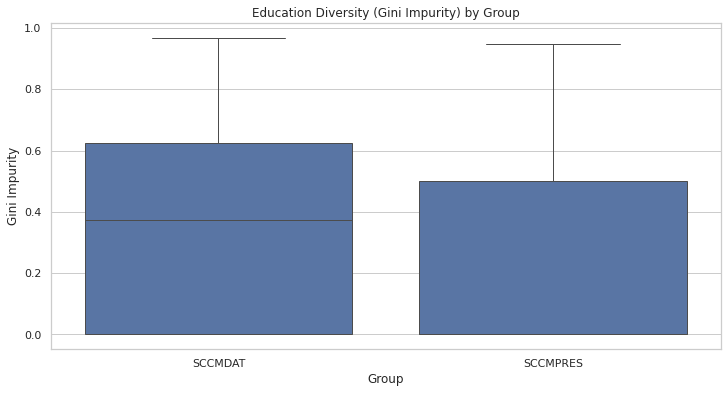

Boxplot created and saved as 'education_diversity_boxplot.png'.


In [91]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Group', y='Gini_Impurity', data=combined_diversity)
plt.title('Education Diversity (Gini Impurity) by Group')
plt.ylabel('Gini Impurity')
plt.savefig('education_diversity_boxplot.png')
plt.show()

print("Boxplot created and saved as 'education_diversity_boxplot.png'.")

This box plot shows the distribution of Gini Impurity scores for education diversity in both groups:

SCCMDAT:

Median (horizontal line in the box) is around 0.37
The box (interquartile range) extends from about 0.2 to 0.6
Whiskers extend from 0 to 1, indicating a wide range of values


SCCMPRES:

Median is slightly lower, around 0.35
The box is smaller, extending from about 0.25 to 0.55
Whiskers also extend from 0 to 1



Key observations:

SCCMDAT has slightly higher median education diversity
SCCMDAT shows more variability in education diversity scores
Both datasets have extreme values at both ends of the scale

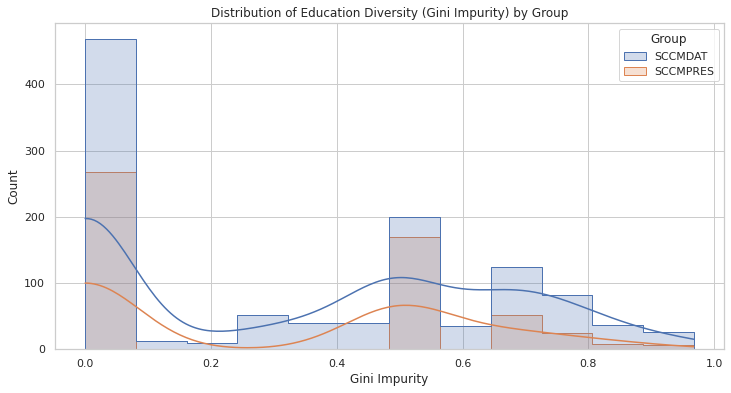

Histogram created and saved as 'education_diversity_histogram.png'.


In [92]:
plt.figure(figsize=(12, 6))
sns.histplot(data=combined_diversity, x='Gini_Impurity', hue='Group', kde=True, element='step')
plt.title('Distribution of Education Diversity (Gini Impurity) by Group')
plt.xlabel('Gini Impurity')
plt.savefig('education_diversity_histogram.png')
plt.show()

print("Histogram created and saved as 'education_diversity_histogram.png'.")

This histogram shows the frequency distribution of Gini Impurity scores for both datasets:

SCCMDAT (blue):

High peak at 0, indicating many instances with very low diversity
Secondary peaks around 0.5 and 0.7
Generally higher counts across most of the range


SCCMPRES (orange):

High peak at 0, but lower than SCCMDAT
Secondary peak around 0.5
Generally lower counts across the range compared to SCCMDAT



Key observations:

Both datasets have a large number of instances with very low education diversity (Gini Impurity near 0)
SCCMDAT has more instances across the entire range of diversity scores
SCCMPRES shows a more pronounced bimodal distribution, with peaks at 0 and around 0.5

Interpretation:

Both datasets show a wide range of education diversity, from very homogeneous (0) to very diverse (1).
SCCMDAT generally shows higher education diversity and more variability compared to SCCMPRES.
Both datasets have a significant number of instances with very low diversity, suggesting many homogeneous subgroups in terms of education.
SCCMDAT appears to have a more uniform distribution of diversity scores, while SCCMPRES shows a clearer bimodal distribution.
The differences in distribution suggest that the two datasets might represent different populations or sampling methods in terms of educational backgrounds.

These results indicate that while both datasets include a mix of homogeneous and diverse educational backgrounds, SCCMDAT generally represents a more educationally diverse population compared to SCCMPRES.

In [93]:
# Print summary statistics
print("Summary Statistics:")
print(combined_diversity.groupby('Group')['Gini_Impurity'].describe())

# Perform t-test to compare the two groups
t_stat, p_value = stats.ttest_ind(
    SCCMDAT_diversity['Gini_Impurity'].dropna(), 
    SCCMPRES_diversity['Gini_Impurity'].dropna()
)
print(f"\nt-statistic: {t_stat}")
print(f"p-value: {p_value}")

print("Summary statistics printed and t-test performed.")

Summary Statistics:
           count      mean       std  min  25%    50%    75%       max
Group                                                                 
SCCMDAT   1128.0  0.333102  0.313687  0.0  0.0  0.375  0.625  0.967593
SCCMPRES   527.0  0.284889  0.301905  0.0  0.0  0.000  0.500  0.947368

t-statistic: 2.9476952875982403
p-value: 0.003246416020197852
Summary statistics printed and t-test performed.


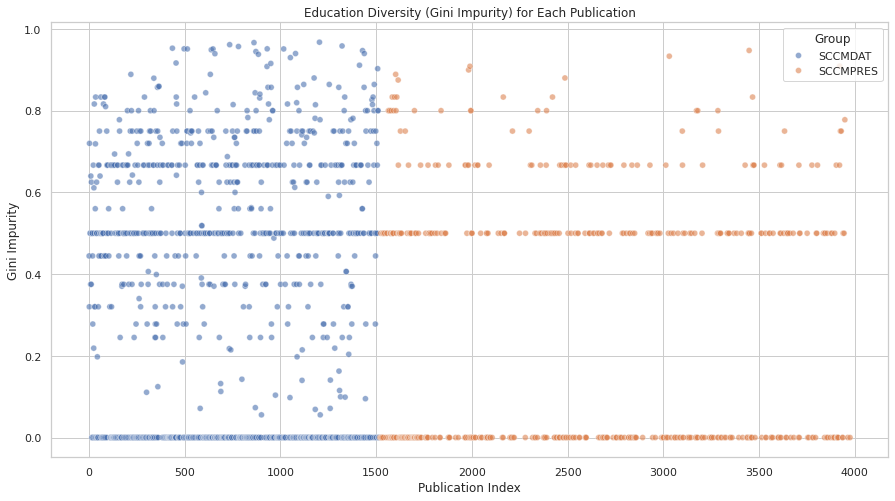

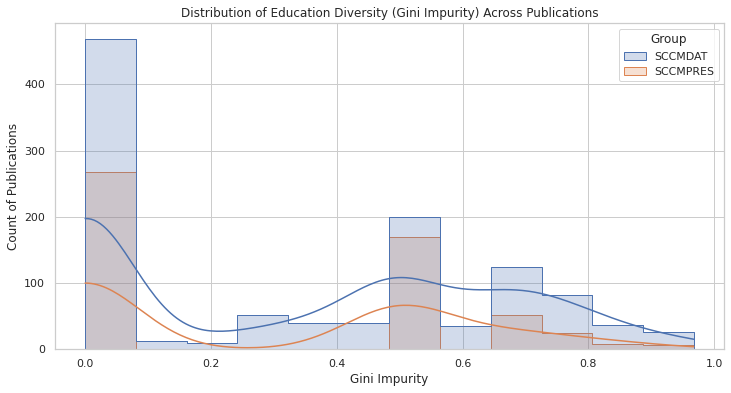

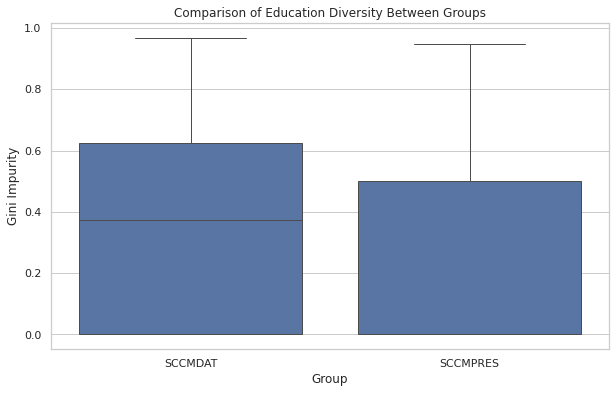

Visualizations created and saved.


In [94]:
# Scatter plot of Gini Impurity for each publication
plt.figure(figsize=(15, 8))
sns.scatterplot(data=combined_diversity, x=combined_diversity.index, y='Gini_Impurity', hue='Group', alpha=0.6)
plt.title('Education Diversity (Gini Impurity) for Each Publication')
plt.xlabel('Publication Index')
plt.ylabel('Gini Impurity')
plt.legend(title='Group')
plt.savefig('education_diversity_scatter.png')
plt.show()

# Histogram of Gini Impurity values
plt.figure(figsize=(12, 6))
sns.histplot(data=combined_diversity, x='Gini_Impurity', hue='Group', kde=True, element='step')
plt.title('Distribution of Education Diversity (Gini Impurity) Across Publications')
plt.xlabel('Gini Impurity')
plt.ylabel('Count of Publications')
plt.savefig('education_diversity_histogram.png')
plt.show()

# Box plot comparing the two groups
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='Gini_Impurity', data=combined_diversity)
plt.title('Comparison of Education Diversity Between Groups')
plt.ylabel('Gini Impurity')
plt.savefig('education_diversity_boxplot.png')
plt.show()

print("Visualizations created and saved.")

This scatter plot shows the Education Diversity (measured by Gini Impurity) for each publication in the SCCMDAT and SCCMPRES datasets. Here's an interpretation of the image:

Data Distribution:

SCCMDAT (blue points): Publications with index 0 to about 1500
SCCMPRES (orange points): Publications with index roughly 1500 to 4000


Gini Impurity Range:

Both datasets show Gini Impurity values ranging from 0 to 1
0 indicates complete homogeneity in education backgrounds
1 indicates maximum diversity in education backgrounds


Patterns:

SCCMDAT (blue):

Shows a more scattered distribution across all Gini Impurity values
Has a higher concentration of points at higher Gini Impurity values (0.5-1.0)
Also has a noticeable cluster at Gini Impurity near 0


SCCMPRES (orange):

Shows a more structured pattern with clear horizontal lines
Has a high concentration of points at Gini Impurity values of 0, 0.5, and 0.67
Fewer points in between these main clusters




Comparison:

SCCMDAT appears to have more variability in education diversity across publications
SCCMPRES shows more distinct groupings, suggesting possibly more standardized author groups or specific collaboration patterns


Interesting Observations:

Both datasets have a significant number of publications with Gini Impurity of 0, indicating some publications have authors with identical educational backgrounds
SCCMPRES has a very clear line at Gini Impurity of 0.5, which could indicate a common two-category split in educational backgrounds for many publications


Overall Trend:

There doesn't appear to be a clear trend of increasing or decreasing diversity as the publication index increases for either dataset

In [95]:
# Summary statistics
print("Summary Statistics:")
print(combined_diversity.groupby('Group')['Gini_Impurity'].describe())

# T-test to compare the two groups
t_stat, p_value = stats.ttest_ind(
    SCCMDAT_diversity['Gini_Impurity'].dropna(), 
    SCCMPRES_diversity['Gini_Impurity'].dropna()
)
print(f"\nt-statistic: {t_stat}")
print(f"p-value: {p_value}")

# Effect size (Cohen's d)
mean_diff = SCCMDAT_diversity['Gini_Impurity'].mean() - SCCMPRES_diversity['Gini_Impurity'].mean()
pooled_std = np.sqrt((SCCMDAT_diversity['Gini_Impurity'].std()**2 + SCCMPRES_diversity['Gini_Impurity'].std()**2) / 2)
cohens_d = mean_diff / pooled_std
print(f"\nCohen's d effect size: {cohens_d}")

print("Statistical analysis completed.")

Summary Statistics:
           count      mean       std  min  25%    50%    75%       max
Group                                                                 
SCCMDAT   1128.0  0.333102  0.313687  0.0  0.0  0.375  0.625  0.967593
SCCMPRES   527.0  0.284889  0.301905  0.0  0.0  0.000  0.500  0.947368

t-statistic: 2.9476952875982403
p-value: 0.003246416020197852

Cohen's d effect size: 0.15661083226563347
Statistical analysis completed.
